# Binary classification based on Logistic Regression with a quadratic regularization

## import library

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors

## load data

In [38]:
fname_data_train    = 'assignment_10_data_train.csv'
fname_data_test     = 'assignment_10_data_test.csv'

data_train  = np.genfromtxt(fname_data_train, delimiter=',')
data_test   = np.genfromtxt(fname_data_test, delimiter=',')

## plot the data

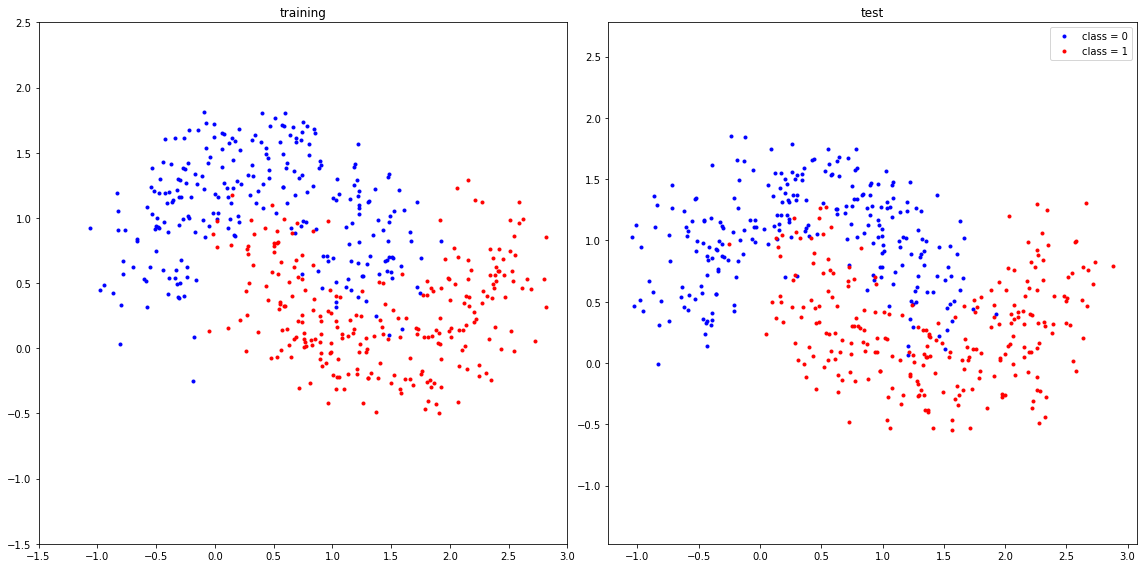

In [356]:
plot_data(data_train, data_test)

## define feature function

In [280]:
def feature_function(x, y):
    
    num_data = x.shape[0]
    feature = np.zeros((num_data, 9))
    
    for i in range(num_data):
        feature[i,0] = 1
        feature[i,1] = x[i]
        feature[i,2] = x[i]**2
        feature[i,3] = x[i]**3
        feature[i,4] = x[i]**4
        feature[i,5] = x[i]**5
        feature[i,6] = x[i]**6
        feature[i,7] = x[i]**7
        feature[i,8] = y[i]
    
    return feature

## define regression function based on the feature function

In [268]:
def regression_function(theta, feature):
    
    value = theta@feature.T
    
    return value

## define regularization function on the model parameters

In [269]:
def regularization_function(theta):
    
    value = theta.T@theta
    
    return value

## define sigmoid function

In [270]:
def logistic_function(x):
    
    z = 1 / (1 + np.exp(-x))
    
    return z

## define loss function where $\alpha$ is a weight for the quadratic regularization term (Note that you need to add a small number (np.finfo(float).eps) inside logarithm function in order to avoid $\log( 0 )$)

In [293]:
def compute_loss_feature(theta, feature, label, alpha):

    value = regression_function(theta, feature)
    logistic = logistic_function(value)
    loss = (-label*np.log(logistic+np.finfo(float).eps)) - (1-label)*np.log(1-logistic+np.finfo(float).eps)
    loss = loss.sum(axis=0)
    
    #loss = (1/label.shape[0])*loss + (alpha/2)*(1/theta.shape[0])*regularization_function(theta)
    loss = loss + (alpha/2)*regularization_function(theta)
    loss = (1/label.shape[0])*loss
    
    return loss

In [294]:
x = np.array((1,2,3,4,5))
y = np.array((1,2,1,0,1))
l = np.array((1,0,1,0,0))
x = (x-np.mean(x))/np.std(x)
y = (y-np.mean(y))/np.std(y)
f = feature_function(x/x.max(),y/y.max())

print(f)

t = np.array((0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0))
print(compute_loss_feature(t,f,l,1))

[[ 1.        -1.         1.        -1.         1.        -1.
   1.        -1.         0.       ]
 [ 1.        -0.5        0.25      -0.125      0.0625    -0.03125
   0.015625  -0.0078125  1.       ]
 [ 1.         0.         0.         0.         0.         0.
   0.         0.         0.       ]
 [ 1.         0.5        0.25       0.125      0.0625     0.03125
   0.015625   0.0078125 -1.       ]
 [ 1.         1.         1.         1.         1.         1.
   1.         1.         0.       ]]


ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 9 is different from 16)

## define gradient vector for the model parameters with the quadratic regularization term whose weight is $\alpha$

In [295]:
def compute_gradient_feature(theta, feature, label, alpha):
    
    value = regression_function(theta, feature)
    
    logistic = logistic_function(value)
        
    
    gradient = np.zeros((label.shape[0],feature.shape[1]))
    
    r = logistic-label
    gradient = (r * feature.T).sum(axis = 1)
    #gradient = (1/label.shape[0]) * gradient
    
    gradient = gradient + (alpha*theta)
    
    return gradient

## compute the accuracy

In [296]:
def compute_accuracy(theta, feature, label):
    
    value = regression_function(theta, feature)
    
    logistic = logistic_function(value)
    
    for i in range(value.shape[0]):
        t = logistic_function(value[i])
        if(t >= 0.5): logistic[i] = 1
        else: logistic[i] = 0
        
        
    accuracy = (1/label.shape[0])*(1-abs(logistic-label)).sum()
    
    return accuracy

## gradient descent for the model parameters $\theta$

In [310]:
num_iteration   = 29000         
learning_rate   = 0.03          
alpha = 0.0001

#theta           = np.array((0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0))
theta           = np.array((0,0,0,0,0,0,0,0,0))

#x_train = (data_train[:,0]-np.mean(data_train[:,0]))/np.std(data_train[:,0])
#y_train = (data_train[:,1]-np.mean(data_train[:,1]))/np.std(data_train[:,1])
x_train = data_train[:,0]
y_train = data_train[:,1]
feature_train = feature_function(x_train/x_train.max(), y_train/y_train.max())
label_train = data_train[:,2]

#x_test = (data_test[:,0]-np.mean(data_test[:,0]))/np.std(data_test[:,0])
#y_test = (data_test[:,1]-np.mean(data_test[:,1]))/np.std(data_test[:,1])
x_test = data_test[:,0]
y_test = data_test[:,1]
feature_test = feature_function(x_test/x_test.max(), y_test/y_test.max())
label_test = data_test[:,2]
dim_feature = 16
print(feature_test.shape)

(500, 9)


In [311]:
theta_iteration             = np.zeros((num_iteration, 9))
loss_iteration_train        = np.zeros(num_iteration)
loss_iteration_test         = np.zeros(num_iteration)
accuracy_iteration_train    = np.zeros(num_iteration)
accuracy_iteration_test     = np.zeros(num_iteration)

In [312]:
for i in range(num_iteration):
    
    theta = theta - learning_rate*compute_gradient_feature(theta, feature_train, label_train, alpha)
    
    loss_train = compute_loss_feature(theta, feature_train, label_train, alpha)
    accuracy_train = compute_accuracy(theta, feature_train, label_train)
    
    loss_test = compute_loss_feature(theta, feature_test, label_test, alpha)
    accuracy_test = compute_accuracy(theta, feature_test, label_test)
    
    theta_iteration[i] = theta
    loss_iteration_train[i] = loss_train
    accuracy_iteration_train[i] = accuracy_train
    loss_iteration_test[i] = loss_test
    accuracy_iteration_test[i] = accuracy_test

    print("[%4d] loss(train) = %5.5f, accuracy(train) = %5.5f, loss(test) = %5.5f, accuracy(test) = %5.5f" % (i, loss_train, accuracy_train, loss_test, accuracy_test))
    print(theta)


[   0] loss(train) = 0.42801, accuracy(train) = 0.81400, loss(test) = 0.43777, accuracy(test) = 0.81800
[ 0.          1.36701961  0.88621064  0.74926727  0.60364258  0.5036009
  0.4229977   0.3605778  -1.61397826]
[   1] loss(train) = 0.41159, accuracy(train) = 0.81400, loss(test) = 0.42530, accuracy(test) = 0.80600
[-0.52725968  1.50203563  0.90497018  0.80722623  0.65942496  0.55773557
  0.47058891  0.40162912 -2.59347373]
[   2] loss(train) = 0.47284, accuracy(train) = 0.80000, loss(test) = 0.48512, accuracy(test) = 0.76800
[ 1.02362555  2.17198893  1.21607917  1.02113613  0.81526178  0.67921306
  0.56681017  0.47915336 -2.64395621]
[   3] loss(train) = 0.65711, accuracy(train) = 0.68400, loss(test) = 0.68058, accuracy(test) = 0.66400
[-1.58992739  1.602053    0.86090922  0.87045856  0.73812531  0.6436376
  0.55007865  0.47223565 -4.22886194]
[   4] loss(train) = 0.85593, accuracy(train) = 0.59800, loss(test) = 0.87594, accuracy(test) = 0.56400
[ 2.59460509  3.33655976  1.81736096  

[  66] loss(train) = 0.28886, accuracy(train) = 0.86600, loss(test) = 0.31183, accuracy(test) = 0.86600
[ 1.74653863  2.57645492 -1.93495541  0.89232938  1.62426693  1.99530398
  1.93954477  1.76667488 -7.42591689]
[  67] loss(train) = 0.28863, accuracy(train) = 0.86400, loss(test) = 0.31159, accuracy(test) = 0.86600
[ 1.74943305  2.58749467 -1.9793225   0.89224827  1.63699549  2.01476941
  1.95929875  1.78481957 -7.42926423]
[  68] loss(train) = 0.28841, accuracy(train) = 0.86400, loss(test) = 0.31134, accuracy(test) = 0.86600
[ 1.75227261  2.59854159 -2.02358626  0.89217392  1.64970103  2.03418742
  1.97899707  1.80290588 -7.4324916 ]
[  69] loss(train) = 0.28819, accuracy(train) = 0.86400, loss(test) = 0.31110, accuracy(test) = 0.86600
[ 1.75505949  2.60959448 -2.0677472   0.89210628  1.66238384  2.0535585
  1.9986403   1.82093443 -7.43560524]
[  70] loss(train) = 0.28796, accuracy(train) = 0.86400, loss(test) = 0.31087, accuracy(test) = 0.86600
[ 1.75779626  2.62065238 -2.11180574 

[ 109] loss(train) = 0.28009, accuracy(train) = 0.86600, loss(test) = 0.30219, accuracy(test) = 0.87000
[ 1.84087951  3.04824659 -3.75411984  0.89568293  2.15467595  2.79526954
  2.74532015  2.50112264 -7.51020715]
[ 110] loss(train) = 0.27990, accuracy(train) = 0.86600, loss(test) = 0.30198, accuracy(test) = 0.87000
[ 1.84264856  3.05898021 -3.79437835  0.89594963  2.16668511  2.81309935
  2.76314209  2.51724041 -7.51146706]
[ 111] loss(train) = 0.27972, accuracy(train) = 0.86600, loss(test) = 0.30178, accuracy(test) = 0.87000
[ 1.84440694  3.06969761 -3.83454909  0.89622564  2.1786827   2.83089903
  2.78092811  2.53332048 -7.51271519]
[ 112] loss(train) = 0.27953, accuracy(train) = 0.86600, loss(test) = 0.30157, accuracy(test) = 0.87000
[ 1.84615497  3.08039856 -3.87463241  0.89651098  2.19066887  2.84866883
  2.79867854  2.5493632  -7.51395222]
[ 113] loss(train) = 0.27935, accuracy(train) = 0.86600, loss(test) = 0.30137, accuracy(test) = 0.87000
[ 1.84789295  3.09108286 -3.91462868

[ 153] loss(train) = 0.27258, accuracy(train) = 0.87400, loss(test) = 0.29377, accuracy(test) = 0.87400
[ 1.91151863  3.50325427 -5.44714652  0.91620278  2.67370469  3.55419799
  3.49898905  3.17836669 -7.56016309]
[ 154] loss(train) = 0.27243, accuracy(train) = 0.87600, loss(test) = 0.29359, accuracy(test) = 0.87400
[ 1.91300107  3.51315791 -5.48387518  0.91687167  2.68530634  3.57089764
  3.51546497  3.19307738 -7.56125259]
[ 155] loss(train) = 0.27227, accuracy(train) = 0.87600, loss(test) = 0.29341, accuracy(test) = 0.87400
[ 1.91447949  3.52304167 -5.52053123  0.91754904  2.69690025  3.58757515
  3.53191466  3.20776085 -7.56234219]
[ 156] loss(train) = 0.27211, accuracy(train) = 0.87600, loss(test) = 0.29324, accuracy(test) = 0.87400
[ 1.91595396  3.53290557 -5.557115    0.91823485  2.70848647  3.60423063
  3.54833827  3.22241728 -7.56343195]
[ 157] loss(train) = 0.27196, accuracy(train) = 0.87600, loss(test) = 0.29306, accuracy(test) = 0.87400
[ 1.91742453  3.54274961 -5.59362681

[ 198] loss(train) = 0.26603, accuracy(train) = 0.87800, loss(test) = 0.28634, accuracy(test) = 0.88000
[ 1.97488355  3.92968789 -7.03240002  0.95401946  3.18847605  4.28518115
  4.21629467  3.81548551 -7.60981082]
[ 199] loss(train) = 0.26590, accuracy(train) = 0.87800, loss(test) = 0.28619, accuracy(test) = 0.88000
[ 1.97622528  3.93873363 -7.06615886  0.9550216   3.19975112  4.30097818
  4.23171365  3.82911023 -7.61093456]
[ 200] loss(train) = 0.26576, accuracy(train) = 0.87800, loss(test) = 0.28604, accuracy(test) = 0.88000
[ 1.9775645   3.94776157 -7.09985811  0.95602996  3.21101916  4.3167569
  4.2471115   3.8427135  -7.61205926]
[ 201] loss(train) = 0.26563, accuracy(train) = 0.87800, loss(test) = 0.28588, accuracy(test) = 0.88000
[ 1.97890124  3.95677176 -7.13349802  0.95704449  3.22228019  4.33251736
  4.26248831  3.85629542 -7.61318492]
[ 202] loss(train) = 0.26550, accuracy(train) = 0.87800, loss(test) = 0.28573, accuracy(test) = 0.88200
[ 1.9802355   3.96576427 -7.16707884 

[ 245] loss(train) = 0.26011, accuracy(train) = 0.88200, loss(test) = 0.27959, accuracy(test) = 0.88600
[ 2.03546712  4.33667636 -8.55853083  1.0070449   3.71081717  5.00872144
  4.9193736   4.43407262 -7.66356106]
[ 246] loss(train) = 0.25999, accuracy(train) = 0.88200, loss(test) = 0.27945, accuracy(test) = 0.88600
[ 2.03670552  4.34495796 -8.58974204  1.00828696  3.72176173  5.02371394
  4.93387837  4.44677999 -7.66472239]
[ 247] loss(train) = 0.25987, accuracy(train) = 0.88200, loss(test) = 0.27932, accuracy(test) = 0.88600
[ 2.03794196  4.35322492 -8.62090417  1.00953305  3.73269919  5.03869039
  4.94836521  4.45946958 -7.66588431]
[ 248] loss(train) = 0.25976, accuracy(train) = 0.88200, loss(test) = 0.27918, accuracy(test) = 0.88600
[ 2.03917646  4.3614773  -8.65201742  1.01078311  3.74362957  5.05365084
  4.96283416  4.47214146 -7.66704682]
[ 249] loss(train) = 0.25964, accuracy(train) = 0.88200, loss(test) = 0.27905, accuracy(test) = 0.88600
[ 2.04040902  4.36971516 -8.68308199

[ 314] loss(train) = 0.25269, accuracy(train) = 0.88400, loss(test) = 0.27109, accuracy(test) = 0.89200
[  2.11666766   4.87695069 -10.60619186   1.10027085   4.44922784
   6.00738744   5.88068302   5.27210495  -7.7446229 ]
[ 315] loss(train) = 0.25259, accuracy(train) = 0.88400, loss(test) = 0.27098, accuracy(test) = 0.89200
[  2.11778537   4.88436139 -10.6344163    1.10170829   4.45967807
   6.02135213   5.89406082   5.28371188  -7.74580511]
[ 316] loss(train) = 0.25250, accuracy(train) = 0.88400, loss(test) = 0.27087, accuracy(test) = 0.89200
[  2.11890149   4.89176132 -10.66260267   1.10314754   4.47012111
   6.03530296   5.90742372   5.29530448  -7.74698736]
[ 317] loss(train) = 0.25240, accuracy(train) = 0.88400, loss(test) = 0.27075, accuracy(test) = 0.89400
[  2.12001603   4.89915054 -10.69075109   1.10458857   4.48055696
   6.04923999   5.92077177   5.30688278  -7.74816964]
[ 318] loss(train) = 0.25230, accuracy(train) = 0.88400, loss(test) = 0.27064, accuracy(test) = 0.89400


[ 356] loss(train) = 0.24876, accuracy(train) = 0.88800, loss(test) = 0.26658, accuracy(test) = 0.89600
[  2.16228928   5.17943986 -11.76024395   1.16194643   4.88196229
   6.58228697   6.43012133   5.74768951  -7.79424228]
[ 357] loss(train) = 0.24867, accuracy(train) = 0.88800, loss(test) = 0.26648, accuracy(test) = 0.89600
[  2.16334351   5.1864357  -11.78697287   1.1634414    4.89211195
   6.59569263   6.44290275   5.75872645  -7.79542121]
[ 358] loss(train) = 0.24858, accuracy(train) = 0.88800, loss(test) = 0.26638, accuracy(test) = 0.89600
[  2.1643963    5.19342252 -11.81366857   1.16493734   4.9022545
   6.60908551   6.45567066   5.76975057  -7.79659995]
[ 359] loss(train) = 0.24850, accuracy(train) = 0.88800, loss(test) = 0.26628, accuracy(test) = 0.89600
[  2.16544766   5.20040036 -11.84033117   1.16643423   4.91238996
   6.62246564   6.46842508   5.7807619   -7.7977785 ]
[ 360] loss(train) = 0.24841, accuracy(train) = 0.88800, loss(test) = 0.26617, accuracy(test) = 0.89600
[

[  2.21032638   5.49903895 -12.98218532   1.23301509   5.35138694
   7.19891949   7.01671036   6.25306103  -7.84938017]
[ 404] loss(train) = 0.24470, accuracy(train) = 0.89000, loss(test) = 0.26193, accuracy(test) = 0.89600
[  2.21131591   5.50564646 -13.00745676   1.23454007   5.3612075
   7.21174956   7.02888753   6.26352792  -7.85054587]
[ 405] loss(train) = 0.24462, accuracy(train) = 0.89000, loss(test) = 0.26184, accuracy(test) = 0.89600
[  2.21230413   5.51224642 -13.03269932   1.2360654    5.37102117
   7.22456792   7.04105249   6.27398336  -7.85171121]
[ 406] loss(train) = 0.24454, accuracy(train) = 0.89000, loss(test) = 0.26174, accuracy(test) = 0.89600
[  2.21329105   5.51883887 -13.05791307   1.23759106   5.38082797
   7.23737458   7.05320526   6.28442738  -7.85287617]
[ 407] loss(train) = 0.24446, accuracy(train) = 0.89000, loss(test) = 0.26165, accuracy(test) = 0.89600
[  2.21427665   5.52542384 -13.08309809   1.23911704   5.39062789
   7.25016957   7.06534588   6.29486   

[ 441] loss(train) = 0.24184, accuracy(train) = 0.89200, loss(test) = 0.25865, accuracy(test) = 0.90000
[  2.24702706   5.74504231 -13.92285146   1.29112519   5.71977835
   7.67840112   7.47106834   6.64297112  -7.89339688]
[ 442] loss(train) = 0.24177, accuracy(train) = 0.89200, loss(test) = 0.25857, accuracy(test) = 0.90000
[  2.24796846   5.75138118 -13.94707932   1.2926567    5.72934151
   7.69080048   7.48279878   6.6530208   -7.89454683]
[ 443] loss(train) = 0.24170, accuracy(train) = 0.89200, loss(test) = 0.25848, accuracy(test) = 0.90000
[  2.24890863   5.75771344 -13.97128114   1.29418823   5.73889802
   7.7031889    7.49451792   6.66305996  -7.89569632]
[ 444] loss(train) = 0.24162, accuracy(train) = 0.89200, loss(test) = 0.25840, accuracy(test) = 0.90000
[  2.24984759   5.76403911 -13.99545698   1.29571976   5.74844788
   7.71556639   7.50622578   6.67308864  -7.89684535]
[ 445] loss(train) = 0.24155, accuracy(train) = 0.89200, loss(test) = 0.25831, accuracy(test) = 0.90000


[ 481] loss(train) = 0.23898, accuracy(train) = 0.89400, loss(test) = 0.25538, accuracy(test) = 0.90000
[  2.28375317   5.99364639 -14.8723002    1.35233074   6.09718268
   8.16602732   7.93169099   7.03698218  -7.93901801]
[ 482] loss(train) = 0.23891, accuracy(train) = 0.89400, loss(test) = 0.25530, accuracy(test) = 0.90000
[  2.28464749   5.99973674 -14.89553679   1.35385782   6.10648504
   8.17800365   7.9429865    7.04662872  -7.94014818]
[ 483] loss(train) = 0.23884, accuracy(train) = 0.89400, loss(test) = 0.25522, accuracy(test) = 0.90000
[  2.28554068   6.00582126 -14.91874986   1.35538468   6.11578102
   8.18996978   7.95427156   7.05626562  -7.94127783]
[ 484] loss(train) = 0.23878, accuracy(train) = 0.89400, loss(test) = 0.25514, accuracy(test) = 0.90000
[  2.28643274   6.01189997 -14.94193945   1.35691132   6.12507064
   8.20192573   7.9655462    7.0658929   -7.94240695]
[ 485] loss(train) = 0.23871, accuracy(train) = 0.89400, loss(test) = 0.25506, accuracy(test) = 0.90000


[ 527] loss(train) = 0.23595, accuracy(train) = 0.90000, loss(test) = 0.25191, accuracy(test) = 0.90000
[  2.3237517    6.26802205 -15.91767062   1.42228216   6.51859895
   8.70664332   8.44076886   7.47103349  -7.99044474]
[ 528] loss(train) = 0.23588, accuracy(train) = 0.90000, loss(test) = 0.25184, accuracy(test) = 0.90000
[  2.32459607   6.2738611  -15.93988123   1.42379481   6.52761535
   8.71816816   8.4516038    7.48025612  -7.99154963]
[ 529] loss(train) = 0.23582, accuracy(train) = 0.90000, loss(test) = 0.25177, accuracy(test) = 0.90000
[  2.32543941   6.27969504 -15.96207075   1.42530707   6.53662571
   8.72968357   8.46242916   7.48946996  -7.99265394]
[ 530] loss(train) = 0.23576, accuracy(train) = 0.90000, loss(test) = 0.25170, accuracy(test) = 0.90000
[  2.3262817    6.28552388 -15.9842392    1.42681894   6.54563002
   8.74118957   8.47324495   7.49867503  -7.99375769]
[ 531] loss(train) = 0.23569, accuracy(train) = 0.90000, loss(test) = 0.25163, accuracy(test) = 0.90000


[ 573] loss(train) = 0.23315, accuracy(train) = 0.90200, loss(test) = 0.24873, accuracy(test) = 0.90200
[  2.36154605   6.53152492 -16.91822081   1.49141896   6.92720467
   9.22726574   8.92952058   7.88643455  -8.04067124]
[ 574] loss(train) = 0.23309, accuracy(train) = 0.90200, loss(test) = 0.24866, accuracy(test) = 0.90200
[  2.36234456   6.53714204 -16.93950794   1.49291104   6.93595038
   9.23837292   8.93993236   7.89527014  -8.04174937]
[ 575] loss(train) = 0.23304, accuracy(train) = 0.90200, loss(test) = 0.24860, accuracy(test) = 0.90200
[  2.36314213   6.54275463 -16.960776     1.49440262   6.94469038
   9.24947137   8.95033532   7.90409769  -8.04282692]
[ 576] loss(train) = 0.23298, accuracy(train) = 0.90200, loss(test) = 0.24853, accuracy(test) = 0.90200
[  2.36393874   6.54836268 -16.98202504   1.49589371   6.95342468
   9.26056111   8.96072948   7.91291721  -8.04390387]
[ 577] loss(train) = 0.23292, accuracy(train) = 0.90200, loss(test) = 0.24846, accuracy(test) = 0.90200


[ 618] loss(train) = 0.23062, accuracy(train) = 0.90400, loss(test) = 0.24585, accuracy(test) = 0.90800
[  2.39655918   6.77994556 -17.85782487   1.55805412   7.31520334
   9.71864475   9.38953544   8.27628276  -8.08860034]
[ 619] loss(train) = 0.23057, accuracy(train) = 0.90400, loss(test) = 0.24579, accuracy(test) = 0.91000
[  2.39731646   6.78536841 -17.87829246   1.55952269   7.3236988
   9.72937281   9.39956523   8.28477082  -8.08965175]
[ 620] loss(train) = 0.23051, accuracy(train) = 0.90400, loss(test) = 0.24573, accuracy(test) = 0.91000
[  2.39807286   6.79078717 -17.89874268   1.56099071   7.33218886
   9.74009276   9.40958686   8.29325148  -8.09070258]
[ 621] loss(train) = 0.23046, accuracy(train) = 0.90400, loss(test) = 0.24567, accuracy(test) = 0.91000
[  2.39882838   6.79620185 -17.91917556   1.56245818   7.34067353
   9.7508046    9.41960035   8.30172475  -8.0917528 ]
[ 622] loss(train) = 0.23041, accuracy(train) = 0.90400, loss(test) = 0.24561, accuracy(test) = 0.91000
[

[ 663] loss(train) = 0.22827, accuracy(train) = 0.90400, loss(test) = 0.24319, accuracy(test) = 0.91000
[  2.42978945   7.02004378 -18.76215239   1.62358893   7.69224708
  10.19355099   9.83299039   8.65109882  -8.13532604]
[ 664] loss(train) = 0.22822, accuracy(train) = 0.90400, loss(test) = 0.24313, accuracy(test) = 0.91000
[  2.43050875   7.02529085 -18.78187149   1.62503228   7.7005061
  10.20392618   9.84266625   8.65926635  -8.13635077]
[ 665] loss(train) = 0.22817, accuracy(train) = 0.90400, loss(test) = 0.24307, accuracy(test) = 0.91000
[  2.43122724   7.03053419 -18.80157469   1.62647506   7.70876002
  10.2142938    9.85233455   8.66742704  -8.13737491]
[ 666] loss(train) = 0.22812, accuracy(train) = 0.90400, loss(test) = 0.24301, accuracy(test) = 0.91000
[  2.43194493   7.03577383 -18.82126202   1.62791728   7.71700885
  10.22465387   9.86199528   8.6755809   -8.13839846]
[ 667] loss(train) = 0.22807, accuracy(train) = 0.90400, loss(test) = 0.24296, accuracy(test) = 0.91000
[

[ 707] loss(train) = 0.22612, accuracy(train) = 0.90200, loss(test) = 0.24076, accuracy(test) = 0.91000
[  2.46069213   7.24749068 -19.61513724   1.68655419   8.05090133
  10.64305487  10.25172599   9.00414955  -8.17985946]
[ 708] loss(train) = 0.22608, accuracy(train) = 0.90200, loss(test) = 0.24070, accuracy(test) = 0.91000
[  2.46137717   7.2525808  -19.63418404   1.68797228   8.05894182
  10.65310794  10.26108002   9.01202676  -8.18085848]
[ 709] loss(train) = 0.22603, accuracy(train) = 0.90200, loss(test) = 0.24065, accuracy(test) = 0.91000
[  2.46206147   7.25766749 -19.65321619   1.6893898    8.06697749
  10.66315394  10.270427     9.01989762  -8.18185693]
[ 710] loss(train) = 0.22598, accuracy(train) = 0.90200, loss(test) = 0.24060, accuracy(test) = 0.91000
[  2.46274501   7.26275078 -19.67223371   1.69080674   8.07500834
  10.67319287  10.27976693   9.02776214  -8.18285479]
[ 711] loss(train) = 0.22594, accuracy(train) = 0.90200, loss(test) = 0.24054, accuracy(test) = 0.91000


[ 782] loss(train) = 0.22277, accuracy(train) = 0.90400, loss(test) = 0.23697, accuracy(test) = 0.91200
[  2.5100819    7.62018121 -21.00467695   1.79132453   8.64094128
  11.37808763  10.93441252   9.5779851   -8.25320621]
[ 783] loss(train) = 0.22273, accuracy(train) = 0.90400, loss(test) = 0.23692, accuracy(test) = 0.91200
[  2.51071438   7.62503163 -21.02269319   1.79269996   8.64863594
  11.38763786  10.9432663    9.58541312  -8.2541629 ]
[ 784] loss(train) = 0.22269, accuracy(train) = 0.90400, loss(test) = 0.23687, accuracy(test) = 0.91200
[  2.5113462    7.62987906 -21.04069655   1.79407484   8.65632621
  11.39718176  10.95211379   9.59283551  -8.25511903]
[ 785] loss(train) = 0.22265, accuracy(train) = 0.90400, loss(test) = 0.23682, accuracy(test) = 0.91200
[  2.51197736   7.6347235  -21.05868707   1.79544915   8.66401209
  11.40671931  10.96095498   9.60025226  -8.25607462]
[ 786] loss(train) = 0.22260, accuracy(train) = 0.90400, loss(test) = 0.23678, accuracy(test) = 0.91200


[ 829] loss(train) = 0.22084, accuracy(train) = 0.90400, loss(test) = 0.23479, accuracy(test) = 0.91200
[  2.5391176    7.84499729 -21.8378703    1.85537302   8.99792257
  11.82023249  11.34388067   9.92114431  -8.29758336]
[ 830] loss(train) = 0.22080, accuracy(train) = 0.90400, loss(test) = 0.23475, accuracy(test) = 0.91200
[  2.53972045   7.84971234 -21.85530415   1.85672266   9.00541624
  11.82949392  11.35244821   9.92831639  -8.29851469]
[ 831] loss(train) = 0.22076, accuracy(train) = 0.90400, loss(test) = 0.23470, accuracy(test) = 0.91200
[  2.5403227    7.85442462 -21.87272609   1.85807177   9.01290575
  11.83874942  11.36100988   9.93548322  -8.29944549]
[ 832] loss(train) = 0.22072, accuracy(train) = 0.90400, loss(test) = 0.23466, accuracy(test) = 0.91200
[  2.54092435   7.85913414 -21.89013613   1.85942035   9.02039111
  11.84799898  11.36956567   9.9426448   -8.30037576]
[ 833] loss(train) = 0.22068, accuracy(train) = 0.90400, loss(test) = 0.23462, accuracy(test) = 0.91200


[ 874] loss(train) = 0.21911, accuracy(train) = 0.90600, loss(test) = 0.23284, accuracy(test) = 0.91400
[  2.56566153   8.05449062 -22.61085846   1.91558182   9.33109518
  12.23122626  11.72371215  10.2387957   -8.33897575]
[ 875] loss(train) = 0.21907, accuracy(train) = 0.90600, loss(test) = 0.23280, accuracy(test) = 0.91400
[  2.56623815   8.05908507 -22.62777418   1.91690777   9.33840676
  12.24022806  11.73202298  10.24573886  -8.33988372]
[ 876] loss(train) = 0.21903, accuracy(train) = 0.90600, loss(test) = 0.23276, accuracy(test) = 0.91400
[  2.56681421   8.06367693 -22.64467879   1.9182332    9.34571442
  12.24922426  11.74032829  10.25267711  -8.34079118]
[ 877] loss(train) = 0.21899, accuracy(train) = 0.90600, loss(test) = 0.23271, accuracy(test) = 0.91400
[  2.56738971   8.0682662  -22.66157231   1.91955812   9.35301813
  12.25821488  11.74862807  10.25961044  -8.34169813]
[ 878] loss(train) = 0.21896, accuracy(train) = 0.90600, loss(test) = 0.23267, accuracy(test) = 0.91400


[ 916] loss(train) = 0.21757, accuracy(train) = 0.90600, loss(test) = 0.23112, accuracy(test) = 0.91400
[  2.58940717   8.24527072 -23.31194343   1.97083479   9.63484473
  12.60456851  12.06809497  10.52625111  -8.37667777]
[ 917] loss(train) = 0.21754, accuracy(train) = 0.90600, loss(test) = 0.23108, accuracy(test) = 0.91400
[  2.58996101   8.24975958 -23.32840668   1.97213959   9.64199488
  12.61334155  12.07618008  10.53299348  -8.37756477]
[ 918] loss(train) = 0.21750, accuracy(train) = 0.90600, loss(test) = 0.23104, accuracy(test) = 0.91400
[  2.59051433   8.254246   -23.34485949   1.97344391   9.64914129
  12.6221093   12.08425996  10.53973122  -8.37845128]
[ 919] loss(train) = 0.21747, accuracy(train) = 0.90600, loss(test) = 0.23100, accuracy(test) = 0.91400
[  2.59106713   8.25872999 -23.36130188   1.97474774   9.65628395
  12.63087176  12.09233464  10.54646432  -8.3793373 ]
[ 920] loss(train) = 0.21743, accuracy(train) = 0.90600, loss(test) = 0.23096, accuracy(test) = 0.91400


  12.96855302  12.403252    10.8055084   -8.41351551]
[ 959] loss(train) = 0.21609, accuracy(train) = 0.90800, loss(test) = 0.22945, accuracy(test) = 0.91200
[  2.61275988   8.43613041 -24.01062656   2.0265051    9.93896913
  12.97710933  12.41112362  10.81206128  -8.41438234]
[ 960] loss(train) = 0.21605, accuracy(train) = 0.90800, loss(test) = 0.22941, accuracy(test) = 0.91200
[  2.61329196   8.44051736 -24.02665457   2.02778931   9.94596193
  12.98566062  12.4189903   10.81860977  -8.4152487 ]
[ 961] loss(train) = 0.21602, accuracy(train) = 0.90800, loss(test) = 0.22937, accuracy(test) = 0.91200
[  2.61382355   8.44490202 -24.04267278   2.02907305   9.95295116
  12.9942069   12.42685204  10.82515389  -8.41611459]
[ 962] loss(train) = 0.21598, accuracy(train) = 0.90800, loss(test) = 0.22933, accuracy(test) = 0.91200
[  2.61435464   8.44928437 -24.05868119   2.03035633   9.95993682
  13.00274816  12.43470885  10.83169363  -8.41698001]
[ 963] loss(train) = 0.21595, accuracy(train) = 0.

[1006] loss(train) = 0.21454, accuracy(train) = 0.90800, loss(test) = 0.22772, accuracy(test) = 0.91200
[  2.63725151   8.63987783 -24.75356122   2.0863683   10.26383747
  13.37369749  12.77562213  11.11520174  -8.45460022]
[1007] loss(train) = 0.21451, accuracy(train) = 0.90800, loss(test) = 0.22768, accuracy(test) = 0.91200
[  2.63776144   8.6441598  -24.76914279   2.08763122  10.27066681
  13.38201962  12.78326346  11.12155064  -8.45544496]
[1008] loss(train) = 0.21448, accuracy(train) = 0.90800, loss(test) = 0.22765, accuracy(test) = 0.91200
[  2.63827091   8.6484396  -24.78471517   2.08889371  10.27749277
  13.39033701  12.79090014  11.12789542  -8.45628925]
[1009] loss(train) = 0.21445, accuracy(train) = 0.90800, loss(test) = 0.22761, accuracy(test) = 0.91200
[  2.63877992   8.65271724 -24.80027837   2.09015575  10.28431534
  13.39864968  12.79853218  11.13423609  -8.45713309]
[1010] loss(train) = 0.21442, accuracy(train) = 0.90800, loss(test) = 0.22758, accuracy(test) = 0.91200


[1051] loss(train) = 0.21315, accuracy(train) = 0.90800, loss(test) = 0.22615, accuracy(test) = 0.91400
[  2.65975856   8.83045897 -25.44580746   2.14277363  10.56785821
  13.74358593  13.11495736  11.39690131  -8.49217462]
[1052] loss(train) = 0.21312, accuracy(train) = 0.90800, loss(test) = 0.22612, accuracy(test) = 0.91400
[  2.66024874   8.83464602 -25.46098748   2.14401738  10.57453881
  13.75170053  13.12239493  11.4030701   -8.49299956]
[1053] loss(train) = 0.21309, accuracy(train) = 0.90800, loss(test) = 0.22608, accuracy(test) = 0.91400
[  2.66073849   8.83883103 -25.47615884   2.14526072  10.5812162
  13.75981064  13.1298281   11.409235    -8.49382406]
[1054] loss(train) = 0.21305, accuracy(train) = 0.90800, loss(test) = 0.22605, accuracy(test) = 0.91400
[  2.66122783   8.84301399 -25.49132156   2.14650364  10.58789036
  13.76791627  13.13725688  11.41539602  -8.49464814]
[1055] loss(train) = 0.21302, accuracy(train) = 0.90800, loss(test) = 0.22602, accuracy(test) = 0.91400
[

[1096] loss(train) = 0.21182, accuracy(train) = 0.90600, loss(test) = 0.22466, accuracy(test) = 0.91400
[  2.68140624   9.01687951 -26.12049703   2.19834154  10.86534313
  14.10437371  13.44536342  11.6707151   -8.52887644]
[1097] loss(train) = 0.21179, accuracy(train) = 0.90600, loss(test) = 0.22463, accuracy(test) = 0.91400
[  2.68187798   9.02097659 -26.13529845   2.19956727  10.87188206
  14.11229146  13.45260799  11.67671359  -8.52968241]
[1098] loss(train) = 0.21176, accuracy(train) = 0.90600, loss(test) = 0.22460, accuracy(test) = 0.91400
[  2.68234933   9.02507172 -26.1500917    2.20079261  10.87841792
  14.12020495  13.45984838  11.68270841  -8.53048797]
[1099] loss(train) = 0.21173, accuracy(train) = 0.90600, loss(test) = 0.22457, accuracy(test) = 0.91400
[  2.68282027   9.02916491 -26.16487679   2.20201756  10.88495071
  14.12811418  13.46708461  11.68869955  -8.53129312]
[1100] loss(train) = 0.21170, accuracy(train) = 0.90600, loss(test) = 0.22454, accuracy(test) = 0.91400


[1137] loss(train) = 0.21066, accuracy(train) = 0.90800, loss(test) = 0.22337, accuracy(test) = 0.91400
[  2.70042911   9.18328588 -26.72076416   2.2482842   11.13095451
  14.42555922  13.73901923  11.91368276  -8.56158756]
[1138] loss(train) = 0.21063, accuracy(train) = 0.90800, loss(test) = 0.22334, accuracy(test) = 0.91400
[  2.70088509   9.18730487 -26.73523886   2.24949448  11.13737011
  14.4333062   13.74609657  11.91953395  -8.56237696]
[1139] loss(train) = 0.21061, accuracy(train) = 0.90800, loss(test) = 0.22331, accuracy(test) = 0.91400
[  2.7013407    9.191322   -26.74970581   2.25070439  11.14378275
  14.44104912  13.75316993  11.92538164  -8.56316596]
[1140] loss(train) = 0.21058, accuracy(train) = 0.90800, loss(test) = 0.22328, accuracy(test) = 0.91400
[  2.70179594   9.19533727 -26.764165     2.25191394  11.15019246
  14.44878798  13.76023932  11.93122582  -8.56395457]
[1141] loss(train) = 0.21055, accuracy(train) = 0.90800, loss(test) = 0.22325, accuracy(test) = 0.91400


[1176] loss(train) = 0.20961, accuracy(train) = 0.90800, loss(test) = 0.22219, accuracy(test) = 0.91400
[  2.71794109   9.33866552 -27.2796098    2.29521894  11.37900926
  14.72471818  14.01212624  12.13931951  -8.59208398]
[1177] loss(train) = 0.20958, accuracy(train) = 0.90800, loss(test) = 0.22217, accuracy(test) = 0.91400
[  2.71838293   9.34261338 -27.29378857   2.29641535  11.38531229
  14.7323098   14.0190516   12.14503701  -8.59285821]
[1178] loss(train) = 0.20955, accuracy(train) = 0.90800, loss(test) = 0.22214, accuracy(test) = 0.91400
[  2.71882442   9.34655946 -27.30795993   2.29761141  11.39161249
  14.73989753  14.02597314  12.15075116  -8.59363205]
[1179] loss(train) = 0.20953, accuracy(train) = 0.90800, loss(test) = 0.22211, accuracy(test) = 0.91400
[  2.71926555   9.35050375 -27.32212389   2.29880713  11.39790986
  14.74748136  14.03289088  12.15646197  -8.59440552]
[1180] loss(train) = 0.20950, accuracy(train) = 0.90800, loss(test) = 0.22208, accuracy(test) = 0.91400


[1220] loss(train) = 0.20847, accuracy(train) = 0.90800, loss(test) = 0.22092, accuracy(test) = 0.92000
[  2.73705538   9.5107065  -27.89658174   2.34754092  11.65370469
  15.05511778  14.3132919   12.38777065  -8.6257938 ]
[1221] loss(train) = 0.20844, accuracy(train) = 0.90800, loss(test) = 0.22089, accuracy(test) = 0.92000
[  2.73748219   9.51457752 -27.91044264   2.34872261  11.65988595
  15.06254182  14.32005349  12.3933443   -8.62655158]
[1222] loss(train) = 0.20842, accuracy(train) = 0.90800, loss(test) = 0.22087, accuracy(test) = 0.91800
[  2.73790866   9.51844682 -27.92429651   2.34990398  11.6660645
  15.06996215  14.32681144  12.39891477  -8.62730899]
[1223] loss(train) = 0.20839, accuracy(train) = 0.90800, loss(test) = 0.22084, accuracy(test) = 0.91800
[  2.73833481   9.52231442 -27.93814335   2.35108502  11.67224035
  15.07737877  14.33356576  12.40448205  -8.62806603]
[1224] loss(train) = 0.20837, accuracy(train) = 0.90800, loss(test) = 0.22081, accuracy(test) = 0.91800
[

  15.37830967  14.60741689  12.63004185  -8.65879449]
[1265] loss(train) = 0.20736, accuracy(train) = 0.90800, loss(test) = 0.21968, accuracy(test) = 0.91800
[  2.75594045   9.68323567 -28.51346795   2.40040331  11.92921995
  15.38557375  14.6140223   12.63547851  -8.65953649]
[1266] loss(train) = 0.20733, accuracy(train) = 0.90800, loss(test) = 0.21965, accuracy(test) = 0.91800
[  2.75635281   9.68703151 -28.52701996   2.40157091  11.93528204
  15.39283428  14.62062423  12.64091214  -8.66027814]
[1267] loss(train) = 0.20731, accuracy(train) = 0.90800, loss(test) = 0.21963, accuracy(test) = 0.91800
[  2.75676486   9.69082571 -28.54056528   2.4027382   11.94134154
  15.40009126  14.62722271  12.64634273  -8.66101944]
[1268] loss(train) = 0.20728, accuracy(train) = 0.90800, loss(test) = 0.21960, accuracy(test) = 0.91800
[  2.7571766    9.69461828 -28.55410393   2.40390519  11.94739846
  15.40734469  14.63381773  12.65177029  -8.6617604 ]
[1269] loss(train) = 0.20726, accuracy(train) = 0.

[1310] loss(train) = 0.20629, accuracy(train) = 0.90800, loss(test) = 0.21849, accuracy(test) = 0.91800
[  2.77419475   9.85245305 -29.11679054   2.45265193  12.19948594
  15.70883614  14.90773266  12.87703328  -8.69256837]
[1311] loss(train) = 0.20627, accuracy(train) = 0.90800, loss(test) = 0.21847, accuracy(test) = 0.91800
[  2.77459353   9.8561769  -29.13004874   2.45380635  12.20543395
  15.71594054  14.91418232  12.88233352  -8.69329456]
[1312] loss(train) = 0.20624, accuracy(train) = 0.90800, loss(test) = 0.21844, accuracy(test) = 0.91800
[  2.77499202   9.85989918 -29.14330059   2.45496049  12.21137949
  15.72304156  14.92062867  12.88763087  -8.69402042]
[1313] loss(train) = 0.20622, accuracy(train) = 0.90800, loss(test) = 0.21841, accuracy(test) = 0.91800
[  2.77539021   9.8636199  -29.15654607   2.45611435  12.21732254
  15.73013919  14.92707172  12.89292533  -8.69474594]
[1314] loss(train) = 0.20620, accuracy(train) = 0.90800, loss(test) = 0.21839, accuracy(test) = 0.91800


[1355] loss(train) = 0.20527, accuracy(train) = 0.91000, loss(test) = 0.21735, accuracy(test) = 0.92000
[  2.79185571  10.01849658 -29.7072023    2.50432678  12.46472417
  16.02522623  15.19474267  13.11272304  -8.72491875]
[1356] loss(train) = 0.20525, accuracy(train) = 0.91000, loss(test) = 0.21733, accuracy(test) = 0.92000
[  2.7922417   10.02215138 -29.72018063   2.50546888  12.47056286
  16.03218139  15.20104688  13.11789606  -8.72563012]
[1357] loss(train) = 0.20523, accuracy(train) = 0.91000, loss(test) = 0.21731, accuracy(test) = 0.92000
[  2.79262742  10.02580468 -29.73315288   2.50661072  12.47639917
  16.03913332  15.20734793  13.12306632  -8.72634117]
[1358] loss(train) = 0.20520, accuracy(train) = 0.91000, loss(test) = 0.21728, accuracy(test) = 0.92000
[  2.79301287  10.02945648 -29.74611908   2.5077523   12.48223311
  16.046082    15.21364583  13.12823382  -8.7270519 ]
[1359] loss(train) = 0.20518, accuracy(train) = 0.91000, loss(test) = 0.21726, accuracy(test) = 0.92000


[1398] loss(train) = 0.20434, accuracy(train) = 0.91200, loss(test) = 0.21631, accuracy(test) = 0.92000
[  2.80820914  10.17431251 -30.25986633   2.55320336  12.71366753
  16.32140923  15.46301019  13.33270422  -8.75522018]
[1399] loss(train) = 0.20431, accuracy(train) = 0.91200, loss(test) = 0.21629, accuracy(test) = 0.92000
[  2.80858361  10.17790389 -30.27258926   2.55433445  12.71940593
  16.32822779  15.46918138  13.33776102  -8.75591795]
[1400] loss(train) = 0.20429, accuracy(train) = 0.91200, loss(test) = 0.21626, accuracy(test) = 0.92000
[  2.80895781  10.18149381 -30.28530638   2.55546528  12.72514204
  16.33504323  15.47534954  13.34281518  -8.75661541]
[1401] loss(train) = 0.20427, accuracy(train) = 0.91200, loss(test) = 0.21624, accuracy(test) = 0.92000
[  2.80933176  10.1850823  -30.2980177    2.55659588  12.73087587
  16.34185557  15.48151468  13.34786669  -8.75731256]
[1402] loss(train) = 0.20425, accuracy(train) = 0.91200, loss(test) = 0.21622, accuracy(test) = 0.92000


[1438] loss(train) = 0.20350, accuracy(train) = 0.91200, loss(test) = 0.21538, accuracy(test) = 0.92000
[  2.82298796  10.31685123 -30.76431195   2.59825708  12.94144045
  16.59175421  15.70752493  13.53294005  -8.78289186]
[1439] loss(train) = 0.20348, accuracy(train) = 0.91200, loss(test) = 0.21536, accuracy(test) = 0.92000
[  2.82335227  10.32038569 -30.77680714   2.59937853  12.94708899
  16.59845062  15.71357727  13.53789313  -8.78357744]
[1440] loss(train) = 0.20346, accuracy(train) = 0.91200, loss(test) = 0.21533, accuracy(test) = 0.92000
[  2.82371633  10.32391875 -30.78929675   2.60049975  12.95273533
  16.60514403  15.71962669  13.54284367  -8.78426273]
[1441] loss(train) = 0.20344, accuracy(train) = 0.91200, loss(test) = 0.21531, accuracy(test) = 0.92000
[  2.82408014  10.32745042 -30.80178078   2.60162074  12.95837946
  16.61183445  15.7256732   13.54779167  -8.78494771]
[1442] loss(train) = 0.20342, accuracy(train) = 0.91200, loss(test) = 0.21529, accuracy(test) = 0.92000


[1476] loss(train) = 0.20273, accuracy(train) = 0.91200, loss(test) = 0.21452, accuracy(test) = 0.92000
[  2.83666018  10.45018764 -31.23525394   2.64071103  13.15455077
  16.84413515  15.93548848  13.71939112  -8.80873599]
[1477] loss(train) = 0.20271, accuracy(train) = 0.91200, loss(test) = 0.21450, accuracy(test) = 0.92000
[  2.8370153   10.45366979 -31.24754099   2.64182384  13.16011685
  16.85071966  15.94143201  13.72424934  -8.8094104 ]
[1478] loss(train) = 0.20269, accuracy(train) = 0.91200, loss(test) = 0.21448, accuracy(test) = 0.92000
[  2.83737018  10.45715057 -31.25982267   2.64293644  13.1656808
  16.85730127  15.94737273  13.72910511  -8.81008451]
[1479] loss(train) = 0.20267, accuracy(train) = 0.91200, loss(test) = 0.21446, accuracy(test) = 0.92000
[  2.83772482  10.46063001 -31.27209898   2.64404882  13.17124261
  16.86388     15.95331064  13.73395843  -8.81075834]
[1480] loss(train) = 0.20265, accuracy(train) = 0.91200, loss(test) = 0.21443, accuracy(test) = 0.92000
[

[1522] loss(train) = 0.20183, accuracy(train) = 0.91200, loss(test) = 0.21352, accuracy(test) = 0.92000
[  2.85275569  10.60898075 -31.79497427   2.69167699  13.4084104
  17.1440685   16.20601996  13.94036845  -8.8394631 ]
[1523] loss(train) = 0.20181, accuracy(train) = 0.91200, loss(test) = 0.21350, accuracy(test) = 0.92000
[  2.85310025  10.61240171 -31.8070194    2.69277998  13.41388023
  17.15052263  16.21183681  13.94511634  -8.84012447]
[1524] loss(train) = 0.20179, accuracy(train) = 0.91200, loss(test) = 0.21348, accuracy(test) = 0.92000
[  2.85344458  10.61582135 -31.81905938   2.69388276  13.41934802
  17.156974    16.21765096  13.94986188  -8.84078555]
[1525] loss(train) = 0.20178, accuracy(train) = 0.91200, loss(test) = 0.21346, accuracy(test) = 0.92000
[  2.8537887   10.6192397  -31.83109423   2.69498534  13.42481376
  17.16342259  16.22346242  13.95460508  -8.84144636]
[1526] loss(train) = 0.20176, accuracy(train) = 0.91200, loss(test) = 0.21344, accuracy(test) = 0.92000
[

[1568] loss(train) = 0.20097, accuracy(train) = 0.91200, loss(test) = 0.21256, accuracy(test) = 0.92000
[  2.86837868  10.76500937 -32.34380017   2.74220542  13.65792671
  17.43812379  16.47084174  14.15637582  -8.86960194]
[1569] loss(train) = 0.20095, accuracy(train) = 0.91200, loss(test) = 0.21254, accuracy(test) = 0.92000
[  2.86871325  10.76837134 -32.35561365   2.74329922  13.663304
  17.44445279  16.47653707  14.16101801  -8.87025078]
[1570] loss(train) = 0.20093, accuracy(train) = 0.91200, loss(test) = 0.21252, accuracy(test) = 0.92000
[  2.86904762  10.77173205 -32.36742221   2.74439283  13.66867931
  17.45077913  16.48222982  14.16565794  -8.87089934]
[1571] loss(train) = 0.20092, accuracy(train) = 0.91200, loss(test) = 0.21250, accuracy(test) = 0.92000
[  2.86938177  10.77509151 -32.37922584   2.74548624  13.67405265
  17.4571028   16.48791999  14.17029562  -8.87154764]
[1572] loss(train) = 0.20090, accuracy(train) = 0.91200, loss(test) = 0.21248, accuracy(test) = 0.92000
[ 

[1613] loss(train) = 0.20016, accuracy(train) = 0.91200, loss(test) = 0.21166, accuracy(test) = 0.92000
[  2.88322934  10.91506558 -32.87059225   2.79123915  13.89797438
  17.72032289  16.72460308  14.36307605  -8.89853835]
[1614] loss(train) = 0.20014, accuracy(train) = 0.91200, loss(test) = 0.21164, accuracy(test) = 0.92000
[  2.88355467  10.91837186 -32.8821884    2.79232453  13.90326448
  17.72653421  16.73018424  14.36761901  -8.8991754 ]
[1615] loss(train) = 0.20012, accuracy(train) = 0.91200, loss(test) = 0.21162, accuracy(test) = 0.92000
[  2.8838798   10.92167692 -32.89377981   2.79340973  13.90855268
  17.73274298  16.73576291  14.37215981  -8.89981218]
[1616] loss(train) = 0.20011, accuracy(train) = 0.91200, loss(test) = 0.21160, accuracy(test) = 0.92000
[  2.88420473  10.92498076 -32.9053665    2.79449475  13.91383898
  17.73894918  16.74133909  14.37669844  -8.90044871]
[1617] loss(train) = 0.20009, accuracy(train) = 0.91200, loss(test) = 0.21158, accuracy(test) = 0.92000


[1662] loss(train) = 0.19931, accuracy(train) = 0.91200, loss(test) = 0.21071, accuracy(test) = 0.92000
[  2.8989395   11.07565961 -33.43331741   2.84421447  14.15498165
  18.02170223  16.99519412  14.58317543  -8.92945523]
[1663] loss(train) = 0.19929, accuracy(train) = 0.91200, loss(test) = 0.21069, accuracy(test) = 0.92000
[  2.8992553   11.07890736 -33.44468665   2.84529128  14.16018037
  18.02779044  17.00065589  14.58761475  -8.93007993]
[1664] loss(train) = 0.19928, accuracy(train) = 0.91200, loss(test) = 0.21067, accuracy(test) = 0.92000
[  2.89957091  11.08215393 -33.45605135   2.84636791  14.16537727
  18.03387618  17.00611528  14.592052    -8.93070439]
[1665] loss(train) = 0.19926, accuracy(train) = 0.91200, loss(test) = 0.21065, accuracy(test) = 0.92000
[  2.89988632  11.08539933 -33.46741153   2.84744437  14.17057234
  18.03995946  17.01157228  14.59648717  -8.9313286 ]
[1666] loss(train) = 0.19924, accuracy(train) = 0.91200, loss(test) = 0.21064, accuracy(test) = 0.92000


[1710] loss(train) = 0.19851, accuracy(train) = 0.91200, loss(test) = 0.20982, accuracy(test) = 0.92000
[  2.91388828  11.23024363 -33.97399794   2.89571427  14.40248337
  18.31119492  17.25470293  14.7939588   -8.95916618]
[1711] loss(train) = 0.19849, accuracy(train) = 0.91200, loss(test) = 0.20980, accuracy(test) = 0.92000
[  2.91419524  11.23343605 -33.98515409   2.89678322  14.40759597
  18.31716726  17.26005243  14.79830076  -8.95977927]
[1712] loss(train) = 0.19848, accuracy(train) = 0.91200, loss(test) = 0.20978, accuracy(test) = 0.92000
[  2.91450203  11.23662734 -33.99630589   2.89785201  14.4127068
  18.32313723  17.26539965  14.80264073  -8.96039212]
[1713] loss(train) = 0.19846, accuracy(train) = 0.91200, loss(test) = 0.20976, accuracy(test) = 0.92000
[  2.91480863  11.23981751 -34.00745335   2.89892064  14.41781587
  18.32910483  17.27074457  14.80697872  -8.96100474]
[1714] loss(train) = 0.19844, accuracy(train) = 0.91200, loss(test) = 0.20975, accuracy(test) = 0.92000
[

[1752] loss(train) = 0.19783, accuracy(train) = 0.91200, loss(test) = 0.20907, accuracy(test) = 0.92000
[  2.92662893  11.3633599  -34.43885537   2.94047624  14.61571209
  18.56001765  17.47743032  14.97462989  -8.98471384]
[1753] loss(train) = 0.19782, accuracy(train) = 0.91200, loss(test) = 0.20905, accuracy(test) = 0.92000
[  2.92692854  11.36650546 -34.44983207   2.94153872  14.6207519
  18.56589223  17.48268517  14.97888984  -8.98531713]
[1754] loss(train) = 0.19780, accuracy(train) = 0.91400, loss(test) = 0.20903, accuracy(test) = 0.92000
[  2.92722799  11.36964992 -34.46080457   2.94260105  14.62579001
  18.57176453  17.4879378   14.98314787  -8.98592019]
[1755] loss(train) = 0.19778, accuracy(train) = 0.91400, loss(test) = 0.20901, accuracy(test) = 0.92000
[  2.92752726  11.37279329 -34.47177289   2.94366324  14.63082642
  18.57763453  17.49318822  14.98740399  -8.98652302]
[1756] loss(train) = 0.19777, accuracy(train) = 0.91400, loss(test) = 0.20899, accuracy(test) = 0.92000
[

[1796] loss(train) = 0.19715, accuracy(train) = 0.91400, loss(test) = 0.20830, accuracy(test) = 0.92000
[  2.93965282  11.50073531 -34.91790607   2.98708667  14.83586836
  18.81635866  17.70657179  15.16027413  -9.011044  ]
[1797] loss(train) = 0.19713, accuracy(train) = 0.91400, loss(test) = 0.20828, accuracy(test) = 0.92000
[  2.93994509  11.50383324 -34.92870137   2.98814276  14.84083438
  18.82213426  17.71173085  15.16445116  -9.01163736]
[1798] loss(train) = 0.19712, accuracy(train) = 0.91400, loss(test) = 0.20827, accuracy(test) = 0.92000
[  2.9402372   11.50693011 -34.93949262   2.98919871  14.84579875
  18.82790765  17.71688777  15.16862635  -9.01223051]
[1799] loss(train) = 0.19710, accuracy(train) = 0.91400, loss(test) = 0.20825, accuracy(test) = 0.92000
[  2.94052915  11.51002591 -34.95027983   2.99025452  14.85076147
  18.83367883  17.72204255  15.17279968  -9.01282344]
[1800] loss(train) = 0.19709, accuracy(train) = 0.91400, loss(test) = 0.20823, accuracy(test) = 0.92000


[1842] loss(train) = 0.19645, accuracy(train) = 0.91400, loss(test) = 0.20753, accuracy(test) = 0.92000
[  2.95293134  11.64214843 -35.41035004   3.03552357  15.06261682
  19.07977417  17.94170045  15.35052527  -9.03811228]
[1843] loss(train) = 0.19644, accuracy(train) = 0.91400, loss(test) = 0.20751, accuracy(test) = 0.92000
[  2.9532163   11.64519809 -35.42096249   3.03657336  15.06750823
  19.08544983  17.94676286  15.35461872  -9.03869563]
[1844] loss(train) = 0.19642, accuracy(train) = 0.91400, loss(test) = 0.20750, accuracy(test) = 0.92000
[  2.9535011   11.64824672 -35.43157105   3.03762302  15.07239804
  19.09112336  17.9518232   15.35871038  -9.03927877]
[1845] loss(train) = 0.19641, accuracy(train) = 0.91400, loss(test) = 0.20748, accuracy(test) = 0.92000
[  2.95378574  11.65129433 -35.44217571   3.03867254  15.07728626
  19.09679476  17.95688148  15.36280027  -9.0398617 ]
[1846] loss(train) = 0.19639, accuracy(train) = 0.91400, loss(test) = 0.20746, accuracy(test) = 0.92000


[1884] loss(train) = 0.19584, accuracy(train) = 0.91400, loss(test) = 0.20685, accuracy(test) = 0.92200
[  2.96476781  11.76935319 -35.85274983   3.07950216  15.26669658
  19.31633314  18.15256327  15.5209307   -9.062431  ]
[1885] loss(train) = 0.19583, accuracy(train) = 0.91400, loss(test) = 0.20683, accuracy(test) = 0.92200
[  2.96504639  11.77236008 -35.86320108   3.08054651  15.27152201
  19.32192055  18.15754038  15.52495044  -9.06300552]
[1886] loss(train) = 0.19581, accuracy(train) = 0.91400, loss(test) = 0.20682, accuracy(test) = 0.92200
[  2.96532482  11.77536596 -35.87364855   3.08159073  15.2763459
  19.3275059   18.16251548  15.52896846  -9.06357983]
[1887] loss(train) = 0.19580, accuracy(train) = 0.91400, loss(test) = 0.20680, accuracy(test) = 0.92200
[  2.9656031   11.77837084 -35.88409225   3.08263483  15.28116825
  19.33308918  18.1674886   15.53298475  -9.06415393]
[1888] loss(train) = 0.19578, accuracy(train) = 0.91400, loss(test) = 0.20678, accuracy(test) = 0.92200
[

[1928] loss(train) = 0.19522, accuracy(train) = 0.91400, loss(test) = 0.20616, accuracy(test) = 0.92200
[  2.97688688  11.90071518 -36.30907275   3.12533632  15.47756716
  19.56024345  18.3696858   15.6961846   -9.08751588]
[1929] loss(train) = 0.19521, accuracy(train) = 0.91400, loss(test) = 0.20614, accuracy(test) = 0.92200
[  2.97715907  11.90367852 -36.31936067   3.12637527  15.48232557
  19.56574132  18.37457641  15.70012966  -9.08808143]
[1930] loss(train) = 0.19519, accuracy(train) = 0.91400, loss(test) = 0.20612, accuracy(test) = 0.92200
[  2.97743112  11.90664088 -36.32964493   3.1274141   15.48708248
  19.57123719  18.37946508  15.70407306  -9.08864678]
[1931] loss(train) = 0.19518, accuracy(train) = 0.91400, loss(test) = 0.20611, accuracy(test) = 0.92200
[  2.97770302  11.90960226 -36.33992555   3.12845281  15.4918379
  19.57673105  18.38435182  15.70801479  -9.08921193]
[1932] loss(train) = 0.19516, accuracy(train) = 0.91400, loss(test) = 0.20609, accuracy(test) = 0.92200
[

[1974] loss(train) = 0.19459, accuracy(train) = 0.91400, loss(test) = 0.20545, accuracy(test) = 0.92200
[  2.98926286  12.03602863 -36.7785821    3.17300653  15.6949182
  19.81109545  18.59267457  15.87595002  -9.11332606]
[1975] loss(train) = 0.19458, accuracy(train) = 0.91400, loss(test) = 0.20544, accuracy(test) = 0.92200
[  2.98952867  12.03894775 -36.788705     3.17404013  15.69960871
  19.81650272  18.59747772  15.87981963  -9.11388255]
[1976] loss(train) = 0.19456, accuracy(train) = 0.91400, loss(test) = 0.20542, accuracy(test) = 0.92200
[  2.98979434  12.04186592 -36.79882438   3.17507362  15.70429778
  19.82190805  18.602279    15.88368764  -9.11443884]
[1977] loss(train) = 0.19455, accuracy(train) = 0.91400, loss(test) = 0.20541, accuracy(test) = 0.92200
[  2.99005988  12.04478315 -36.80894024   3.176107    15.70898539
  19.82731145  18.60707841  15.88755404  -9.11499493]
[1978] loss(train) = 0.19454, accuracy(train) = 0.91400, loss(test) = 0.20539, accuracy(test) = 0.92200
[

[2023] loss(train) = 0.19394, accuracy(train) = 0.91400, loss(test) = 0.20473, accuracy(test) = 0.92200
[  3.00213043  12.17796311 -37.27050744   3.22352257  15.9230638
  20.07379963  18.8258557   16.06368808  -9.14036854]
[2024] loss(train) = 0.19393, accuracy(train) = 0.91400, loss(test) = 0.20472, accuracy(test) = 0.92200
[  3.00238975  12.18083654 -37.28046068   3.22455079  15.92768431
  20.07911361  18.83056884  16.06748012  -9.1409157 ]
[2025] loss(train) = 0.19392, accuracy(train) = 0.91400, loss(test) = 0.20470, accuracy(test) = 0.92200
[  3.00264894  12.18370905 -37.29041052   3.2255789   15.93230341
  20.08442572  18.83528017  16.07127061  -9.14146266]
[2026] loss(train) = 0.19390, accuracy(train) = 0.91400, loss(test) = 0.20469, accuracy(test) = 0.92200
[  3.002908    12.18658065 -37.30035697   3.2266069   15.93692111
  20.08973596  18.83998971  16.07505955  -9.14200945]
[2027] loss(train) = 0.19389, accuracy(train) = 0.91400, loss(test) = 0.20467, accuracy(test) = 0.92200
[

[2067] loss(train) = 0.19338, accuracy(train) = 0.91400, loss(test) = 0.20410, accuracy(test) = 0.92200
[  3.01341992  12.30353345 -37.70526664   3.26866478  16.12504963
  20.30586234  19.03154402  16.22908254  -9.16426813]
[2068] loss(train) = 0.19337, accuracy(train) = 0.91400, loss(test) = 0.20409, accuracy(test) = 0.92200
[  3.01367368  12.30636704 -37.71507262   3.26968842  16.12960921
  20.31109523  19.03617897  16.23280725  -9.16480717]
[2069] loss(train) = 0.19335, accuracy(train) = 0.91400, loss(test) = 0.20408, accuracy(test) = 0.92200
[  3.0139273   12.30919973 -37.7248753    3.27071195  16.13416742
  20.3163263   19.04081218  16.23653045  -9.16534604]
[2070] loss(train) = 0.19334, accuracy(train) = 0.91400, loss(test) = 0.20406, accuracy(test) = 0.92200
[  3.01418081  12.31203153 -37.73467469   3.27173538  16.13872428
  20.32155557  19.04544363  16.24025216  -9.16588473]
[2071] loss(train) = 0.19333, accuracy(train) = 0.91400, loss(test) = 0.20405, accuracy(test) = 0.92200


[2139] loss(train) = 0.19249, accuracy(train) = 0.91600, loss(test) = 0.20312, accuracy(test) = 0.92200
[  3.03138033  12.50530202 -38.40301695   3.34211336  16.44990487
  20.67806525  19.36086156  16.49347646  -9.20262346]
[2140] loss(train) = 0.19248, accuracy(train) = 0.91600, loss(test) = 0.20310, accuracy(test) = 0.92200
[  3.03162545  12.5080727  -38.41259167   3.34312996  16.45436846
  20.68317059  19.36537362  16.49709545  -9.20314976]
[2141] loss(train) = 0.19247, accuracy(train) = 0.91800, loss(test) = 0.20309, accuracy(test) = 0.92200
[  3.03187046  12.51084253 -38.42216326   3.34414646  16.45883075
  20.6882742   19.36988402  16.50071301  -9.2036759 ]
[2142] loss(train) = 0.19246, accuracy(train) = 0.91800, loss(test) = 0.20308, accuracy(test) = 0.92200
[  3.03211536  12.5136115  -38.43173172   3.34516287  16.46329174
  20.69337608  19.37439276  16.50432913  -9.20420186]
[2143] loss(train) = 0.19245, accuracy(train) = 0.91800, loss(test) = 0.20306, accuracy(test) = 0.92200


[2218] loss(train) = 0.19157, accuracy(train) = 0.91800, loss(test) = 0.20209, accuracy(test) = 0.92200
[  3.05039666  12.72159325 -39.14994241   3.42214269  16.79858168
  21.07615051  19.71227331  16.77504437  -9.24367886]
[2219] loss(train) = 0.19156, accuracy(train) = 0.91800, loss(test) = 0.20207, accuracy(test) = 0.92400
[  3.05063296  12.72429798 -39.15927631   3.42315216  16.80294491
  21.08112274  19.71665725  16.77855328  -9.24419188]
[2220] loss(train) = 0.19155, accuracy(train) = 0.91800, loss(test) = 0.20206, accuracy(test) = 0.92400
[  3.05086914  12.72700189 -39.16860724   3.42416154  16.8073069
  21.08609332  19.72103961  16.78206083  -9.24470473]
[2221] loss(train) = 0.19153, accuracy(train) = 0.91800, loss(test) = 0.20205, accuracy(test) = 0.92400
[  3.05110522  12.72970499 -39.1779352    3.42517084  16.81166766
  21.09106227  19.72542039  16.78556703  -9.24521743]
[2222] loss(train) = 0.19152, accuracy(train) = 0.91800, loss(test) = 0.20203, accuracy(test) = 0.92400
[

[2262] loss(train) = 0.19107, accuracy(train) = 0.92000, loss(test) = 0.20153, accuracy(test) = 0.92400
[  3.06069284  12.83983635 -39.55785353   3.46647842  16.98940179
  21.29338956  19.90368635  16.92816566  -9.26609818]
[2263] loss(train) = 0.19106, accuracy(train) = 0.92000, loss(test) = 0.20152, accuracy(test) = 0.92400
[  3.06092448  12.84250566 -39.56705875   3.46748416  16.99371122
  21.29829055  19.90800177  16.93161576  -9.2666041 ]
[2264] loss(train) = 0.19105, accuracy(train) = 0.92000, loss(test) = 0.20151, accuracy(test) = 0.92400
[  3.06115602  12.84517417 -39.57626109   3.46848981  16.99801944
  21.30318994  19.91231566  16.93506454  -9.26710985]
[2265] loss(train) = 0.19104, accuracy(train) = 0.92000, loss(test) = 0.20150, accuracy(test) = 0.92400
[  3.06138745  12.84784188 -39.58546054   3.46949538  17.00232646
  21.30808773  19.91662801  16.93851201  -9.26761544]
[2266] loss(train) = 0.19103, accuracy(train) = 0.92000, loss(test) = 0.20148, accuracy(test) = 0.92400


[2308] loss(train) = 0.19057, accuracy(train) = 0.92000, loss(test) = 0.20097, accuracy(test) = 0.92400
[  3.07124218  12.96180888 -39.97834008   3.51265753  17.18639845
  21.51719815  20.10062229  17.08552057  -9.28920696]
[2309] loss(train) = 0.19056, accuracy(train) = 0.92000, loss(test) = 0.20096, accuracy(test) = 0.92400
[  3.07146914  12.96444211 -39.9874147    3.51365952  17.19065315
  21.52202675  20.10486813  17.08891099  -9.28970566]
[2310] loss(train) = 0.19055, accuracy(train) = 0.92000, loss(test) = 0.20095, accuracy(test) = 0.92400
[  3.071696    12.96707456 -39.99648652   3.51466144  17.19490668
  21.52685379  20.10911248  17.09230013  -9.2902042 ]
[2311] loss(train) = 0.19054, accuracy(train) = 0.92000, loss(test) = 0.20094, accuracy(test) = 0.92400
[  3.07192276  12.96970623 -40.00555555   3.51566328  17.19915904
  21.53167929  20.11335533  17.095688    -9.29070258]
[2312] loss(train) = 0.19053, accuracy(train) = 0.92000, loss(test) = 0.20092, accuracy(test) = 0.92400


[2353] loss(train) = 0.19009, accuracy(train) = 0.92000, loss(test) = 0.20044, accuracy(test) = 0.92400
[  3.08135775  13.079544   -40.38395519   3.55766981  17.37670868
  21.73296319  20.29022299  17.23683629  -9.31149655]
[2354] loss(train) = 0.19008, accuracy(train) = 0.92000, loss(test) = 0.20043, accuracy(test) = 0.92400
[  3.08158031  13.08214283 -40.39290574   3.5586683   17.38091128
  21.73772294  20.29440269  17.24017003  -9.31198838]
[2355] loss(train) = 0.19007, accuracy(train) = 0.92000, loss(test) = 0.20042, accuracy(test) = 0.92400
[  3.08180276  13.0847409  -40.40185359   3.55966672  17.38511274
  21.74248118  20.29858095  17.24350253  -9.31248006]
[2356] loss(train) = 0.19006, accuracy(train) = 0.92000, loss(test) = 0.20040, accuracy(test) = 0.92400
[  3.08202512  13.08733823 -40.41079871   3.56066506  17.38931306
  21.74723792  20.30275775  17.24683378  -9.3129716 ]
[2357] loss(train) = 0.19005, accuracy(train) = 0.92000, loss(test) = 0.20039, accuracy(test) = 0.92400


[2397] loss(train) = 0.18964, accuracy(train) = 0.92000, loss(test) = 0.19993, accuracy(test) = 0.92400
[  3.09106031  13.19318443 -40.77523245   3.60153229  17.56055142
  21.9409773   20.47277126  17.38235704  -9.33299622]
[2398] loss(train) = 0.18963, accuracy(train) = 0.92000, loss(test) = 0.19992, accuracy(test) = 0.92400
[  3.09127872  13.19575047 -40.78406509   3.60252749  17.56470439
  21.94567154  20.47688806  17.38563691  -9.33348152]
[2399] loss(train) = 0.18962, accuracy(train) = 0.92000, loss(test) = 0.19991, accuracy(test) = 0.92400
[  3.09149703  13.19831576 -40.79289508   3.60352262  17.56885625
  21.95036431  20.48100346  17.38891557  -9.33396668]
[2400] loss(train) = 0.18961, accuracy(train) = 0.92000, loss(test) = 0.19990, accuracy(test) = 0.92400
[  3.09171525  13.20088032 -40.80172243   3.60451767  17.57300699
  21.95505561  20.48511744  17.39219303  -9.3344517 ]
[2401] loss(train) = 0.18960, accuracy(train) = 0.92000, loss(test) = 0.19989, accuracy(test) = 0.92400


[2477] loss(train) = 0.18884, accuracy(train) = 0.92200, loss(test) = 0.19904, accuracy(test) = 0.92400
[  3.10824612  13.39617399 -41.47362622   3.68092163  17.88932262
  22.31194607  20.79773007  17.64099341  -9.37136546]
[2478] loss(train) = 0.18883, accuracy(train) = 0.92200, loss(test) = 0.19903, accuracy(test) = 0.92400
[  3.10845735  13.39868239 -41.48225254   3.68191115  17.8933885
  22.31652552  20.80173675  17.64417905  -9.37183933]
[2479] loss(train) = 0.18882, accuracy(train) = 0.92200, loss(test) = 0.19902, accuracy(test) = 0.92400
[  3.10866849  13.40119009 -41.49087634   3.68290061  17.89745332
  22.32110357  20.80574208  17.64736354  -9.37231307]
[2480] loss(train) = 0.18881, accuracy(train) = 0.92200, loss(test) = 0.19901, accuracy(test) = 0.92400
[  3.10887955  13.40369709 -41.49949764   3.68389     17.90151707
  22.32568022  20.80974607  17.65054688  -9.37278666]
[2481] loss(train) = 0.18880, accuracy(train) = 0.92200, loss(test) = 0.19900, accuracy(test) = 0.92400
[

[2519] loss(train) = 0.18844, accuracy(train) = 0.92200, loss(test) = 0.19859, accuracy(test) = 0.92400
[  3.11704379  13.50092481 -41.83378311   3.7224232   18.0591804
  22.50308608  20.964863    17.77380927  -9.39114897]
[2520] loss(train) = 0.18843, accuracy(train) = 0.92200, loss(test) = 0.19858, accuracy(test) = 0.92400
[  3.11725143  13.50340395 -41.84230507   3.72340989  18.06320211
  22.50760738  20.96881393  17.77694726  -9.39161706]
[2521] loss(train) = 0.18842, accuracy(train) = 0.92200, loss(test) = 0.19857, accuracy(test) = 0.92600
[  3.11745899  13.5058824  -41.85082458   3.72439651  18.06722277
  22.51212732  20.97276356  17.78008413  -9.39208501]
[2522] loss(train) = 0.18841, accuracy(train) = 0.92200, loss(test) = 0.19856, accuracy(test) = 0.92600
[  3.11766646  13.50836017 -41.85934163   3.72538307  18.0712424
  22.51664589  20.97671187  17.78321988  -9.39255282]
[2523] loss(train) = 0.18840, accuracy(train) = 0.92200, loss(test) = 0.19855, accuracy(test) = 0.92600
[ 

[2589] loss(train) = 0.18779, accuracy(train) = 0.92200, loss(test) = 0.19787, accuracy(test) = 0.92600
[  3.13137937  13.67282117 -42.42447555   3.79133392  18.33822061
  22.81631763  21.23830522  17.99080044  -9.42359039]
[2590] loss(train) = 0.18778, accuracy(train) = 0.92200, loss(test) = 0.19786, accuracy(test) = 0.92600
[  3.13158128  13.67525297 -42.43282927   3.79231608  18.34217092
  22.82074507  21.24216624  17.99386163  -9.42404913]
[2591] loss(train) = 0.18777, accuracy(train) = 0.92200, loss(test) = 0.19785, accuracy(test) = 0.92600
[  3.13178312  13.6776841  -42.44118063   3.79329819  18.34612022
  22.82517121  21.24602601  17.99692174  -9.42450774]
[2592] loss(train) = 0.18776, accuracy(train) = 0.92200, loss(test) = 0.19784, accuracy(test) = 0.92600
[  3.13198488  13.68011457 -42.44952964   3.79428022  18.35006853
  22.82959603  21.24988451  17.99998079  -9.42496622]
[2593] loss(train) = 0.18775, accuracy(train) = 0.92200, loss(test) = 0.19783, accuracy(test) = 0.92600


[2632] loss(train) = 0.18740, accuracy(train) = 0.92400, loss(test) = 0.19743, accuracy(test) = 0.92600
[  3.13999059  13.77679345 -42.78157672   3.8335107   18.50718693
  23.00552019  21.40320163  18.1214693   -9.44319909]
[2633] loss(train) = 0.18740, accuracy(train) = 0.92400, loss(test) = 0.19742, accuracy(test) = 0.92600
[  3.14018914  13.77919702 -42.78983045   3.8344902   18.5110947
  23.00989179  21.40700918  18.12448486  -9.44365227]
[2634] loss(train) = 0.18739, accuracy(train) = 0.92400, loss(test) = 0.19741, accuracy(test) = 0.92600
[  3.1403876   13.78159995 -42.79808188   3.83546963  18.51500149
  23.0142621   21.41081551  18.12749937  -9.44410533]
[2635] loss(train) = 0.18738, accuracy(train) = 0.92400, loss(test) = 0.19740, accuracy(test) = 0.92600
[  3.140586    13.78400222 -42.80633101   3.83644901  18.5189073
  23.01863113  21.4146206   18.13051284  -9.44455826]
[2636] loss(train) = 0.18737, accuracy(train) = 0.92400, loss(test) = 0.19739, accuracy(test) = 0.92600
[ 

[2680] loss(train) = 0.18698, accuracy(train) = 0.92400, loss(test) = 0.19696, accuracy(test) = 0.92600
[  3.14943482  13.89143847 -43.17518819   3.88045852  18.69366564
  23.21392155  21.58459081  18.2650447   -9.46480907]
[2681] loss(train) = 0.18698, accuracy(train) = 0.92400, loss(test) = 0.19695, accuracy(test) = 0.92600
[  3.14962972  13.89381126 -43.18333317   3.88143514  18.69752705
  23.21823234  21.58834019  18.26801064  -9.46525621]
[2682] loss(train) = 0.18697, accuracy(train) = 0.92400, loss(test) = 0.19695, accuracy(test) = 0.92600
[  3.14982456  13.89618342 -43.19147591   3.88241169  18.70138751
  23.22254188  21.59208837  18.27097557  -9.46570322]
[2683] loss(train) = 0.18696, accuracy(train) = 0.92400, loss(test) = 0.19694, accuracy(test) = 0.92600
[  3.15001932  13.89855495 -43.19961643   3.88338819  18.70524701
  23.22685018  21.59583535  18.27393947  -9.4661501 ]
[2684] loss(train) = 0.18695, accuracy(train) = 0.92400, loss(test) = 0.19693, accuracy(test) = 0.92600


[  3.15832442  13.99993638 -43.54756376   3.9253224   18.87031117
  23.41093466  21.75583482  18.40043185  -9.48524949]
[2727] loss(train) = 0.18658, accuracy(train) = 0.92400, loss(test) = 0.19652, accuracy(test) = 0.92600
[  3.15851596  14.00228038 -43.55560725   3.92629634  18.87412923
  23.41518865  21.75952988  18.4033515   -9.48569097]
[2728] loss(train) = 0.18658, accuracy(train) = 0.92400, loss(test) = 0.19651, accuracy(test) = 0.92600
[  3.15870743  14.00462376 -43.56364856   3.92727023  18.87794636
  23.41944142  21.76322378  18.40627015  -9.48613233]
[2729] loss(train) = 0.18657, accuracy(train) = 0.92400, loss(test) = 0.19650, accuracy(test) = 0.92600
[  3.15889883  14.00696652 -43.5716877    3.92824405  18.88176256
  23.42369298  21.76691651  18.40918782  -9.48657357]
[2730] loss(train) = 0.18656, accuracy(train) = 0.92400, loss(test) = 0.19649, accuracy(test) = 0.92600
[  3.15909015  14.00930866 -43.57972466   3.92921782  18.88557783
  23.42794332  21.77060808  18.4121044

[2771] loss(train) = 0.18622, accuracy(train) = 0.92400, loss(test) = 0.19611, accuracy(test) = 0.92600
[  3.1668732   14.10480818 -43.90738215   3.96909364  19.04120893
  23.60116646  21.92096765  18.53084067  -9.50499694]
[2772] loss(train) = 0.18621, accuracy(train) = 0.92400, loss(test) = 0.19610, accuracy(test) = 0.92600
[  3.16706155  14.10712465 -43.91532883   3.97006504  19.04498556
  23.60536622  21.92461088  18.53371618  -9.50543303]
[2773] loss(train) = 0.18620, accuracy(train) = 0.92400, loss(test) = 0.19609, accuracy(test) = 0.92600
[  3.16724984  14.10944051 -43.92327339   3.97103638  19.04876128
  23.60956479  21.92825298  18.53659071  -9.50586899]
[2774] loss(train) = 0.18619, accuracy(train) = 0.92400, loss(test) = 0.19608, accuracy(test) = 0.92600
[  3.16743805  14.11175576 -43.93121583   3.97200767  19.05253609
  23.61376218  21.93189394  18.53946428  -9.50630484]
[2775] loss(train) = 0.18619, accuracy(train) = 0.92400, loss(test) = 0.19607, accuracy(test) = 0.92600


  23.7723872   22.06941396  18.64794768  -9.52277995]
[2813] loss(train) = 0.18588, accuracy(train) = 0.92400, loss(test) = 0.19573, accuracy(test) = 0.92600
[  3.17472446  14.20158245 -44.23932728   4.00984501  19.19904933
  23.77653866  22.07301106  18.6507839   -9.52321123]
[2814] loss(train) = 0.18587, accuracy(train) = 0.92400, loss(test) = 0.19572, accuracy(test) = 0.92600
[  3.17490992  14.20387377 -44.24718574   4.0108141   19.20278814
  23.78068896  22.07660704  18.65361918  -9.5236424 ]
[2815] loss(train) = 0.18586, accuracy(train) = 0.92400, loss(test) = 0.19571, accuracy(test) = 0.92600
[  3.17509532  14.2061645  -44.25504213   4.01178314  19.20652606
  23.78483809  22.08020191  18.65645351  -9.52407344]
[2816] loss(train) = 0.18585, accuracy(train) = 0.92400, loss(test) = 0.19570, accuracy(test) = 0.92600
[  3.17528065  14.20845463 -44.26289644   4.01275213  19.21026309
  23.78898606  22.08379566  18.6592869   -9.52450437]
[2817] loss(train) = 0.18584, accuracy(train) = 0.

[2859] loss(train) = 0.18551, accuracy(train) = 0.92400, loss(test) = 0.19532, accuracy(test) = 0.92400
[  3.18318638  14.30637461 -44.5986844    4.05436774  19.37011917
  23.96625604  22.23728394  18.78023477  -9.54292569]
[2860] loss(train) = 0.18550, accuracy(train) = 0.92400, loss(test) = 0.19531, accuracy(test) = 0.92400
[  3.18336878  14.30863898 -44.60644849   4.05533437  19.37381745
  23.97035338  22.24082936  18.78302703  -9.54335158]
[2861] loss(train) = 0.18550, accuracy(train) = 0.92400, loss(test) = 0.19530, accuracy(test) = 0.92400
[  3.18355111  14.31090278 -44.61421057   4.05630095  19.37751486
  23.97444959  22.2443737   18.78581837  -9.54377736]
[2862] loss(train) = 0.18549, accuracy(train) = 0.92400, loss(test) = 0.19529, accuracy(test) = 0.92400
[  3.18373337  14.31316599 -44.62197061   4.05726748  19.3812114
  23.97854466  22.24791695  18.78860879  -9.54420303]
[2863] loss(train) = 0.18548, accuracy(train) = 0.92400, loss(test) = 0.19528, accuracy(test) = 0.92400
[

[2906] loss(train) = 0.18515, accuracy(train) = 0.92400, loss(test) = 0.19491, accuracy(test) = 0.92400
[  3.19168873  14.41217874 -44.96142451   4.09974296  19.54300396
  24.1576111   22.40275455  18.91048116  -9.56282127]
[2907] loss(train) = 0.18514, accuracy(train) = 0.92400, loss(test) = 0.19490, accuracy(test) = 0.92400
[  3.19186809  14.4144162  -44.96909455   4.10070715  19.54666177
  24.16165561  22.40624956  18.91323056  -9.5632419 ]
[2908] loss(train) = 0.18513, accuracy(train) = 0.92400, loss(test) = 0.19489, accuracy(test) = 0.92400
[  3.19204738  14.41665309 -44.97676262   4.10167128  19.55031873
  24.16569901  22.40974351  18.91597906  -9.56366243]
[2909] loss(train) = 0.18513, accuracy(train) = 0.92400, loss(test) = 0.19489, accuracy(test) = 0.92400
[  3.19222661  14.41888942 -44.9844287    4.10263537  19.55397484
  24.1697413   22.4132364   18.91872666  -9.56408284]
[2910] loss(train) = 0.18512, accuracy(train) = 0.92400, loss(test) = 0.19488, accuracy(test) = 0.92400


[2953] loss(train) = 0.18479, accuracy(train) = 0.92400, loss(test) = 0.19451, accuracy(test) = 0.92400
[  3.20005048  14.51673174 -45.31979684   4.1450046   19.71400767
  24.34651175  22.56588376  19.0387374   -9.58247258]
[2954] loss(train) = 0.18479, accuracy(train) = 0.92400, loss(test) = 0.19451, accuracy(test) = 0.92400
[  3.20022689  14.51894288 -45.32737511   4.1459664   19.71762592
  24.35050467  22.56932957  19.04144499  -9.58288808]
[2955] loss(train) = 0.18478, accuracy(train) = 0.92400, loss(test) = 0.19450, accuracy(test) = 0.92400
[  3.20040324  14.52115347 -45.33495145   4.14692815  19.72124333
  24.35449651  22.57277434  19.04415171  -9.58330348]
[2956] loss(train) = 0.18477, accuracy(train) = 0.92400, loss(test) = 0.19449, accuracy(test) = 0.92400
[  3.20057953  14.52336351 -45.34252586   4.14788985  19.72485992
  24.35848726  22.57621808  19.04685754  -9.58371876]
[2957] loss(train) = 0.18476, accuracy(train) = 0.92400, loss(test) = 0.19448, accuracy(test) = 0.92400


[3002] loss(train) = 0.18443, accuracy(train) = 0.92400, loss(test) = 0.19411, accuracy(test) = 0.92400
[  3.20862298  14.62443171 -45.68888241   4.1920744   19.89033068
  24.54089915  22.7335219   19.17038484  -9.60270616]
[3003] loss(train) = 0.18443, accuracy(train) = 0.92400, loss(test) = 0.19410, accuracy(test) = 0.92400
[  3.20879642  14.62661604 -45.69636735   4.19303378  19.89390862
  24.54483955  22.73691765  19.17304992  -9.60311643]
[3004] loss(train) = 0.18442, accuracy(train) = 0.92400, loss(test) = 0.19409, accuracy(test) = 0.92400
[  3.2089698   14.62879983 -45.7038504    4.19399311  19.89748575
  24.54877889  22.74031239  19.17571415  -9.6035266 ]
[3005] loss(train) = 0.18441, accuracy(train) = 0.92400, loss(test) = 0.19409, accuracy(test) = 0.92400
[  3.20914312  14.63098308 -45.71133157   4.19495239  19.90106207
  24.55271718  22.74370613  19.17837752  -9.60393666]
[3006] loss(train) = 0.18441, accuracy(train) = 0.92400, loss(test) = 0.19408, accuracy(test) = 0.92400


[3052] loss(train) = 0.18408, accuracy(train) = 0.92400, loss(test) = 0.19371, accuracy(test) = 0.92200
[  3.21722252  14.73299062 -46.06084404   4.23998388  20.06823928
  24.73663239  22.90208348  19.30259856  -9.62309173]
[3053] loss(train) = 0.18407, accuracy(train) = 0.92400, loss(test) = 0.19370, accuracy(test) = 0.92200
[  3.21739302  14.73514821 -46.0682361    4.24094084  20.07177704
  24.74052049  22.9054294   19.30522136  -9.62349679]
[3054] loss(train) = 0.18406, accuracy(train) = 0.92400, loss(test) = 0.19369, accuracy(test) = 0.92200
[  3.21756346  14.73730528 -46.07562633   4.24189776  20.075314
  24.74440755  22.90877434  19.30784333  -9.62390176]
[3055] loss(train) = 0.18405, accuracy(train) = 0.92400, loss(test) = 0.19368, accuracy(test) = 0.92200
[  3.21773384  14.73946182 -46.08301473   4.24285463  20.07885017
  24.74829358  22.9121183   19.31046446  -9.62430662]
[3056] loss(train) = 0.18405, accuracy(train) = 0.92400, loss(test) = 0.19368, accuracy(test) = 0.92200
[ 

[3095] loss(train) = 0.18378, accuracy(train) = 0.92400, loss(test) = 0.19337, accuracy(test) = 0.92600
[  3.22450218  14.82529317 -46.37705825   4.28109059  20.21965013
  24.90289362  23.04507565  19.41463032  -9.64041728]
[3096] loss(train) = 0.18377, accuracy(train) = 0.92400, loss(test) = 0.19336, accuracy(test) = 0.92600
[  3.22467022  14.82742827 -46.38437229   4.28204552  20.22315407
  24.90673773  23.04837969  19.4172176   -9.64081797]
[3097] loss(train) = 0.18376, accuracy(train) = 0.92400, loss(test) = 0.19336, accuracy(test) = 0.92600
[  3.22483821  14.82956285 -46.39168453   4.28300041  20.22665722
  24.91058083  23.05168278  19.41980407  -9.64121855]
[3098] loss(train) = 0.18375, accuracy(train) = 0.92400, loss(test) = 0.19335, accuracy(test) = 0.92600
[  3.22500614  14.83169691 -46.39899498   4.28395526  20.2301596
  24.91442292  23.0549849   19.42238972  -9.64161904]
[3099] loss(train) = 0.18375, accuracy(train) = 0.92400, loss(test) = 0.19334, accuracy(test) = 0.92600
[

[3144] loss(train) = 0.18344, accuracy(train) = 0.92400, loss(test) = 0.19300, accuracy(test) = 0.92600
[  3.23267071  14.92930816 -46.7333516    4.32782793  20.39043377
  25.09007376  23.2058497   19.54045401  -9.65993327]
[3145] loss(train) = 0.18343, accuracy(train) = 0.92400, loss(test) = 0.19299, accuracy(test) = 0.92600
[  3.23283604  14.93141816 -46.74057873   4.3287806   20.39389997
  25.09386884  23.20910709  19.54300174  -9.66032908]
[3146] loss(train) = 0.18343, accuracy(train) = 0.92400, loss(test) = 0.19298, accuracy(test) = 0.92600
[  3.23300131  14.93352764 -46.7478041    4.32973323  20.3973654
  25.09766294  23.21236354  19.54554868  -9.66072478]
[3147] loss(train) = 0.18342, accuracy(train) = 0.92400, loss(test) = 0.19297, accuracy(test) = 0.92600
[  3.23316652  14.93563663 -46.75502772   4.33068581  20.40083008
  25.10145604  23.21561904  19.54809482  -9.66112039]
[3148] loss(train) = 0.18341, accuracy(train) = 0.92400, loss(test) = 0.19296, accuracy(test) = 0.92600
[

[3196] loss(train) = 0.18309, accuracy(train) = 0.92400, loss(test) = 0.19261, accuracy(test) = 0.92600
[  3.24119584  15.03836127 -47.10685744   4.37730683  20.56967379
  25.28611696  23.3739965   19.67188763  -9.68038546]
[3197] loss(train) = 0.18309, accuracy(train) = 0.92400, loss(test) = 0.19260, accuracy(test) = 0.92600
[  3.24135837  15.04044523 -47.11399457   4.37825716  20.57310084
  25.28986123  23.37720557  19.67439443  -9.68077621]
[3198] loss(train) = 0.18308, accuracy(train) = 0.92400, loss(test) = 0.19259, accuracy(test) = 0.92600
[  3.24152084  15.04252869 -47.12113      4.37920744  20.57652715
  25.29360454  23.38041372  19.67690044  -9.68116685]
[3199] loss(train) = 0.18307, accuracy(train) = 0.92400, loss(test) = 0.19258, accuracy(test) = 0.92600
[  3.24168326  15.04461166 -47.12826371   4.38015768  20.57995271
  25.29734688  23.38362095  19.67940568  -9.6815574 ]
[3200] loss(train) = 0.18307, accuracy(train) = 0.92400, loss(test) = 0.19258, accuracy(test) = 0.92600


[3246] loss(train) = 0.18277, accuracy(train) = 0.92400, loss(test) = 0.19224, accuracy(test) = 0.92600
[  3.2492579   15.14195738 -47.46163708   4.42476878  20.74012138
  25.47215686  23.53333418  19.79628275  -9.69980564]
[3247] loss(train) = 0.18276, accuracy(train) = 0.92400, loss(test) = 0.19223, accuracy(test) = 0.92600
[  3.24941781  15.14401686 -47.46868978   4.4257169   20.74351164
  25.47585342  23.53649789  19.79875115  -9.70019163]
[3248] loss(train) = 0.18276, accuracy(train) = 0.92400, loss(test) = 0.19223, accuracy(test) = 0.92600
[  3.24957768  15.14607587 -47.47574081   4.42666497  20.74690116
  25.47954903  23.5396607   19.80121879  -9.70057752]
[3249] loss(train) = 0.18275, accuracy(train) = 0.92400, loss(test) = 0.19222, accuracy(test) = 0.92600
[  3.24973749  15.14813439 -47.48279017   4.427613    20.75028996
  25.4832437   23.54282262  19.80368567  -9.70096332]
[3250] loss(train) = 0.18274, accuracy(train) = 0.92400, loss(test) = 0.19221, accuracy(test) = 0.92600


[3285] loss(train) = 0.18252, accuracy(train) = 0.92400, loss(test) = 0.19196, accuracy(test) = 0.92600
[  3.25545683  15.22192083 -47.7354634    4.46171308  20.87180494
  25.61562753  23.65605867  19.89199149  -9.71478991]
[3286] loss(train) = 0.18251, accuracy(train) = 0.92400, loss(test) = 0.19196, accuracy(test) = 0.92600
[  3.25561477  15.2239616  -47.74245162   4.4626595   20.87516705
  25.61928762  23.65918774  19.89443058  -9.71517226]
[3287] loss(train) = 0.18251, accuracy(train) = 0.92400, loss(test) = 0.19195, accuracy(test) = 0.92600
[  3.25577265  15.2260019  -47.7494382    4.46360588  20.87852844
  25.62294678  23.66231593  19.89686891  -9.71555452]
[3288] loss(train) = 0.18250, accuracy(train) = 0.92400, loss(test) = 0.19194, accuracy(test) = 0.92600
[  3.25593049  15.22804173 -47.75642315   4.46455222  20.88188912
  25.62660502  23.66544323  19.89930651  -9.71593669]
[3289] loss(train) = 0.18250, accuracy(train) = 0.92400, loss(test) = 0.19193, accuracy(test) = 0.92600


[3331] loss(train) = 0.18223, accuracy(train) = 0.92400, loss(test) = 0.19164, accuracy(test) = 0.92600
[  3.26267024  15.31530739 -48.05523792   4.50520428  21.02572612
  25.78303889  23.79909106  20.00342406  -9.73228322]
[3332] loss(train) = 0.18223, accuracy(train) = 0.92400, loss(test) = 0.19163, accuracy(test) = 0.92600
[  3.2628259   15.3173265  -48.06215159   4.50614874  21.02905563
  25.78665678  23.80218007  20.00582925  -9.73266136]
[3333] loss(train) = 0.18222, accuracy(train) = 0.92400, loss(test) = 0.19163, accuracy(test) = 0.92600
[  3.2629815   15.31934515 -48.06906365   4.50709316  21.03238445
  25.79027377  23.80526821  20.00823372  -9.73303942]
[3334] loss(train) = 0.18222, accuracy(train) = 0.92400, loss(test) = 0.19162, accuracy(test) = 0.92600
[  3.26313705  15.32136333 -48.07597411   4.50803753  21.03571256
  25.79388985  23.80835549  20.01063746  -9.73341739]
[3335] loss(train) = 0.18221, accuracy(train) = 0.92400, loss(test) = 0.19161, accuracy(test) = 0.92600


[3381] loss(train) = 0.18193, accuracy(train) = 0.92400, loss(test) = 0.19130, accuracy(test) = 0.92600
[  3.2703935   15.41569588 -48.39897187   4.55237581  21.19134859
  25.96282969  23.95249337  20.12279817  -9.75108055]
[3382] loss(train) = 0.18192, accuracy(train) = 0.92400, loss(test) = 0.19129, accuracy(test) = 0.92600
[  3.27054674  15.41769193 -48.40580628   4.55331818  21.19464341
  25.9664027   23.95553977  20.12516736  -9.75145422]
[3383] loss(train) = 0.18192, accuracy(train) = 0.92400, loss(test) = 0.19129, accuracy(test) = 0.92600
[  3.27069993  15.41968753 -48.41263913   4.5542605   21.19793753
  25.96997482  23.95858533  20.12753584  -9.75182781]
[3384] loss(train) = 0.18191, accuracy(train) = 0.92400, loss(test) = 0.19128, accuracy(test) = 0.92600
[  3.27085308  15.42168266 -48.4194704    4.55520278  21.20123097
  25.97354605  23.96163004  20.1299036   -9.7522013 ]
[3385] loss(train) = 0.18191, accuracy(train) = 0.92400, loss(test) = 0.19127, accuracy(test) = 0.92600


[3427] loss(train) = 0.18166, accuracy(train) = 0.92400, loss(test) = 0.19099, accuracy(test) = 0.92600
[  3.27739375  15.50704498 -48.7117441    4.59568185  21.34220367
  26.1262751   24.09176177  20.23104915  -9.76817844]
[3428] loss(train) = 0.18165, accuracy(train) = 0.92400, loss(test) = 0.19098, accuracy(test) = 0.92600
[  3.27754483  15.50902024 -48.71850718   4.59662232  21.3454672
  26.12980768  24.09476982  20.23338593  -9.76854808]
[3429] loss(train) = 0.18164, accuracy(train) = 0.92400, loss(test) = 0.19098, accuracy(test) = 0.92600
[  3.27769586  15.51099506 -48.72526873   4.59756275  21.34873005
  26.13333938  24.09777704  20.23572202  -9.76891763]
[3430] loss(train) = 0.18164, accuracy(train) = 0.92400, loss(test) = 0.19097, accuracy(test) = 0.92600
[  3.27784685  15.51296943 -48.73202874   4.59850314  21.35199223
  26.13687022  24.10078343  20.23805742  -9.7692871 ]
[3431] loss(train) = 0.18163, accuracy(train) = 0.92400, loss(test) = 0.19096, accuracy(test) = 0.92600
[

[3474] loss(train) = 0.18138, accuracy(train) = 0.92400, loss(test) = 0.19068, accuracy(test) = 0.92600
[  3.28444485  15.59940201 -49.0279615    4.63984     21.49486588
  26.29137174  24.23225408  20.34013008  -9.78545833]
[3475] loss(train) = 0.18138, accuracy(train) = 0.92400, loss(test) = 0.19068, accuracy(test) = 0.92600
[  3.28459378  15.60135646 -49.03465321   4.64077856  21.49809806
  26.29486383  24.23522374  20.34243446  -9.78582393]
[3476] loss(train) = 0.18137, accuracy(train) = 0.92400, loss(test) = 0.19067, accuracy(test) = 0.92600
[  3.28474267  15.60331047 -49.04134342   4.64171709  21.50132957
  26.29835507  24.2381926   20.34473816  -9.78618945]
[3477] loss(train) = 0.18136, accuracy(train) = 0.92400, loss(test) = 0.19066, accuracy(test) = 0.92600
[  3.28489151  15.60526404 -49.04803213   4.64265557  21.50456042
  26.30184546  24.24116065  20.34704118  -9.78655488]
[3478] loss(train) = 0.18136, accuracy(train) = 0.92400, loss(test) = 0.19066, accuracy(test) = 0.92600


[3520] loss(train) = 0.18112, accuracy(train) = 0.92400, loss(test) = 0.19039, accuracy(test) = 0.92600
[  3.29124927  15.68885548 -49.33423559   4.68297254  21.64286642
  26.45113121  24.36802786  20.44543039  -9.80218854]
[3521] loss(train) = 0.18111, accuracy(train) = 0.92400, loss(test) = 0.19038, accuracy(test) = 0.92600
[  3.29139615  15.69078995 -49.34085888   4.68390927  21.64606849
  26.45458447  24.37096073  20.44770371  -9.80255027]
[3522] loss(train) = 0.18111, accuracy(train) = 0.92400, loss(test) = 0.19038, accuracy(test) = 0.92600
[  3.29154298  15.69272398 -49.34748071   4.68484596  21.64926991
  26.45803689  24.3738928   20.44997637  -9.80291191]
[3523] loss(train) = 0.18110, accuracy(train) = 0.92400, loss(test) = 0.19037, accuracy(test) = 0.92600
[  3.29168977  15.69465759 -49.35410106   4.68578261  21.65247069
  26.46148847  24.37682409  20.45224836  -9.80327347]
[3524] loss(train) = 0.18110, accuracy(train) = 0.92400, loss(test) = 0.19036, accuracy(test) = 0.92600


[3562] loss(train) = 0.18088, accuracy(train) = 0.92400, loss(test) = 0.19012, accuracy(test) = 0.92600
[  3.2973805   15.7697347  -49.61115423   4.72228115  21.77679845
  26.5954524   24.49053043  20.5403383   -9.81730967]
[3563] loss(train) = 0.18088, accuracy(train) = 0.92400, loss(test) = 0.19012, accuracy(test) = 0.92600
[  3.29752555  15.77165125 -49.61771626   4.72321622  21.77997353
  26.59887086  24.49343033  20.54258383  -9.81766793]
[3564] loss(train) = 0.18087, accuracy(train) = 0.92400, loss(test) = 0.19011, accuracy(test) = 0.92600
[  3.29767056  15.77356738 -49.62427685   4.72415126  21.78314797
  26.60228849  24.49632946  20.54482869  -9.8180261 ]
[3565] loss(train) = 0.18087, accuracy(train) = 0.92400, loss(test) = 0.19011, accuracy(test) = 0.92600
[  3.29781552  15.77548309 -49.63083599   4.72508625  21.78632177
  26.6057053   24.49922781  20.54707291  -9.81838419]
[3566] loss(train) = 0.18086, accuracy(train) = 0.92400, loss(test) = 0.19010, accuracy(test) = 0.92600


[3630] loss(train) = 0.18051, accuracy(train) = 0.92400, loss(test) = 0.18971, accuracy(test) = 0.92600
[  3.30714688  15.89910596 -50.05411206   4.78577772  21.99126502
  26.82605416  24.68596948  20.69155477  -9.84148596]
[3631] loss(train) = 0.18051, accuracy(train) = 0.92400, loss(test) = 0.18970, accuracy(test) = 0.92600
[  3.30728905  15.90099416 -50.06057725   4.78671016  21.99439735
  26.82941756  24.68881727  20.69375636  -9.84183872]
[3632] loss(train) = 0.18050, accuracy(train) = 0.92400, loss(test) = 0.18970, accuracy(test) = 0.92600
[  3.30743119  15.90288195 -50.06704104   4.78764256  21.99752906
  26.83278017  24.69166431  20.69595732  -9.8421914 ]
[3633] loss(train) = 0.18050, accuracy(train) = 0.92400, loss(test) = 0.18969, accuracy(test) = 0.92600
[  3.30757327  15.90476933 -50.07350342   4.78857493  22.00066015
  26.83614197  24.69451059  20.69815764  -9.842544  ]
[3634] loss(train) = 0.18049, accuracy(train) = 0.92400, loss(test) = 0.18968, accuracy(test) = 0.92600


[3675] loss(train) = 0.18028, accuracy(train) = 0.92400, loss(test) = 0.18944, accuracy(test) = 0.92600
[  3.31350383  15.98367033 -50.34366496   4.82769981  22.13160939
  26.97662172  24.8133769   20.79000036  -9.85728166]
[3676] loss(train) = 0.18027, accuracy(train) = 0.92400, loss(test) = 0.18943, accuracy(test) = 0.92600
[  3.31364416  15.9855402  -50.3500676    4.82863054  22.13471406
  26.97994953  24.81619102  20.79217359  -9.85763086]
[3677] loss(train) = 0.18026, accuracy(train) = 0.92400, loss(test) = 0.18943, accuracy(test) = 0.92600
[  3.31378444  15.98740966 -50.35646887   4.82956123  22.13781811
  26.98327655  24.8190044   20.79434619  -9.85797999]
[3678] loss(train) = 0.18026, accuracy(train) = 0.92400, loss(test) = 0.18942, accuracy(test) = 0.92600
[  3.31392468  15.98927872 -50.36286875   4.83049188  22.14092156
  26.9866028   24.82181704  20.79651817  -9.85832904]
[3679] loss(train) = 0.18025, accuracy(train) = 0.92400, loss(test) = 0.18941, accuracy(test) = 0.92600


[3724] loss(train) = 0.18002, accuracy(train) = 0.92400, loss(test) = 0.18915, accuracy(test) = 0.92600
[  3.32033241  16.07482199 -50.65578629   4.87326118  22.28302606
  27.138769    24.95040318  20.89575962  -9.87430125]
[3725] loss(train) = 0.18002, accuracy(train) = 0.92400, loss(test) = 0.18915, accuracy(test) = 0.92600
[  3.32047077  16.07667226 -50.66212217   4.87419007  22.28610116
  27.1420588   24.95318135  20.89790259  -9.87464666]
[3726] loss(train) = 0.18001, accuracy(train) = 0.92400, loss(test) = 0.18914, accuracy(test) = 0.92600
[  3.32060909  16.07852214 -50.66845669   4.87511892  22.28917566
  27.14534783  24.95595881  20.90004494  -9.87499199]
[3727] loss(train) = 0.18001, accuracy(train) = 0.92400, loss(test) = 0.18913, accuracy(test) = 0.92600
[  3.32074738  16.08037162 -50.67478987   4.87604773  22.29224956
  27.14863609  24.95873553  20.90218668  -9.87533725]
[3728] loss(train) = 0.18000, accuracy(train) = 0.92400, loss(test) = 0.18913, accuracy(test) = 0.92600


[3767] loss(train) = 0.17980, accuracy(train) = 0.92400, loss(test) = 0.18890, accuracy(test) = 0.92600
[  3.32624645  16.15402833 -50.92701833   4.91316969  22.4147184
  27.27954063  25.06921299  20.98735848  -9.88908491]
[3768] loss(train) = 0.17980, accuracy(train) = 0.92400, loss(test) = 0.18890, accuracy(test) = 0.92600
[  3.32638313  16.15586173 -50.93329674   4.91409698  22.41776801
  27.28279768  25.07196022  20.9894754   -9.88942704]
[3769] loss(train) = 0.17979, accuracy(train) = 0.92400, loss(test) = 0.18889, accuracy(test) = 0.92600
[  3.32651977  16.15769473 -50.93957382   4.91502423  22.42081702
  27.28605398  25.07470674  20.99159172  -9.8897691 ]
[3770] loss(train) = 0.17979, accuracy(train) = 0.92400, loss(test) = 0.18889, accuracy(test) = 0.92600
[  3.32665637  16.15952735 -50.94584957   4.91595145  22.42386546
  27.28930952  25.07745255  20.99370744  -9.89011109]
[3771] loss(train) = 0.17978, accuracy(train) = 0.92400, loss(test) = 0.18888, accuracy(test) = 0.92600
[

[3816] loss(train) = 0.17956, accuracy(train) = 0.92400, loss(test) = 0.18863, accuracy(test) = 0.92600
[  3.33289848  16.24340998 -51.23311285   4.95856364  22.56346199
  27.43825421  25.20299409  21.09038661  -9.9057615 ]
[3817] loss(train) = 0.17955, accuracy(train) = 0.92400, loss(test) = 0.18862, accuracy(test) = 0.92600
[  3.33303329  16.24522449 -51.239327     4.95948913  22.56648306
  27.44147463  25.20570672  21.09247443  -9.90609997]
[3818] loss(train) = 0.17955, accuracy(train) = 0.92400, loss(test) = 0.18862, accuracy(test) = 0.92600
[  3.33316805  16.24703862 -51.24553986   4.96041459  22.56950355
  27.44469432  25.20841865  21.09456165  -9.90643838]
[3819] loss(train) = 0.17954, accuracy(train) = 0.92400, loss(test) = 0.18861, accuracy(test) = 0.92600
[  3.33330278  16.24885237 -51.25175142   4.96134     22.57252346
  27.44791326  25.21112988  21.09664829  -9.90677671]
[3820] loss(train) = 0.17954, accuracy(train) = 0.92400, loss(test) = 0.18861, accuracy(test) = 0.92600


[3860] loss(train) = 0.17934, accuracy(train) = 0.92400, loss(test) = 0.18839, accuracy(test) = 0.92600
[  3.33879434  16.32288931 -51.50531493   4.9992509   22.69584607
  27.57925652  25.32169232  21.1816976   -9.92058491]
[3861] loss(train) = 0.17934, accuracy(train) = 0.92400, loss(test) = 0.18838, accuracy(test) = 0.92600
[  3.3389275   16.32468717 -51.51147249   5.00017479  22.69884196
  27.58244465  25.32437446  21.18375978  -9.92092016]
[3862] loss(train) = 0.17933, accuracy(train) = 0.92400, loss(test) = 0.18837, accuracy(test) = 0.92600
[  3.33906062  16.32648465 -51.51762876   5.00109865  22.70183728
  27.58563205  25.32705592  21.18582139  -9.92125533]
[3863] loss(train) = 0.17933, accuracy(train) = 0.92400, loss(test) = 0.18837, accuracy(test) = 0.92600
[  3.3391937   16.32828175 -51.52378376   5.00202247  22.70483204
  27.58881873  25.32973668  21.18788241  -9.92159044]
[3864] loss(train) = 0.17932, accuracy(train) = 0.92400, loss(test) = 0.18836, accuracy(test) = 0.92600


[3907] loss(train) = 0.17912, accuracy(train) = 0.92400, loss(test) = 0.18813, accuracy(test) = 0.92600
[  3.34501313  16.40698532 -51.79335023   5.04263514  22.83604291
  27.72831696  25.44701515  21.278       -9.93626353]
[3908] loss(train) = 0.17911, accuracy(train) = 0.92400, loss(test) = 0.18813, accuracy(test) = 0.92600
[  3.34514457  16.4087657  -51.79944843   5.04355735  22.83901236
  27.73147121  25.44966531  21.28003531  -9.93659539]
[3909] loss(train) = 0.17911, accuracy(train) = 0.92400, loss(test) = 0.18812, accuracy(test) = 0.92600
[  3.34527598  16.41054571 -51.80554537   5.04447952  22.84198125
  27.73462474  25.4523148   21.28207005  -9.93692719]
[3910] loss(train) = 0.17910, accuracy(train) = 0.92400, loss(test) = 0.18812, accuracy(test) = 0.92600
[  3.34540735  16.41232535 -51.81164107   5.04540166  22.84494958
  27.73777756  25.45496362  21.28410423  -9.93725891]
[3911] loss(train) = 0.17910, accuracy(train) = 0.92400, loss(test) = 0.18811, accuracy(test) = 0.92600


[3950] loss(train) = 0.17891, accuracy(train) = 0.92400, loss(test) = 0.18790, accuracy(test) = 0.92600
[  3.35063268  16.48321064 -52.05444941   5.08225803  22.96322829
  27.86330812  25.56036705  21.36500989  -9.95046953]
[3951] loss(train) = 0.17891, accuracy(train) = 0.92400, loss(test) = 0.18790, accuracy(test) = 0.92600
[  3.35076258  16.4849753  -52.06049427   5.08317872  22.96617396
  27.86643191  25.56298848  21.36702106  -9.95079835]
[3952] loss(train) = 0.17890, accuracy(train) = 0.92400, loss(test) = 0.18789, accuracy(test) = 0.92600
[  3.35089245  16.4867396  -52.06653791   5.08409936  22.96911907
  27.86955499  25.56560925  21.36903168  -9.9511271 ]
[3953] loss(train) = 0.17890, accuracy(train) = 0.92400, loss(test) = 0.18789, accuracy(test) = 0.92600
[  3.35102228  16.48850354 -52.07258031   5.08501998  22.97206363
  27.87267737  25.56822935  21.37104174  -9.95145578]
[3954] loss(train) = 0.17889, accuracy(train) = 0.92400, loss(test) = 0.18788, accuracy(test) = 0.92600


[3992] loss(train) = 0.17872, accuracy(train) = 0.92400, loss(test) = 0.18768, accuracy(test) = 0.92600
[  3.35605834  16.55701601 -52.30728081   5.12089638  23.08647587
  27.99390542  25.66989972  21.4490027   -9.96421974]
[3993] loss(train) = 0.17871, accuracy(train) = 0.92400, loss(test) = 0.18768, accuracy(test) = 0.92600
[  3.35618677  16.55876557 -52.31327446   5.12181559  23.08939865
  27.99699993  25.67249356  21.4509907   -9.96454563]
[3994] loss(train) = 0.17871, accuracy(train) = 0.92400, loss(test) = 0.18767, accuracy(test) = 0.92600
[  3.35631516  16.56051477 -52.3192669    5.12273476  23.0923209
  28.00009375  25.67508673  21.45297815  -9.96487145]
[3995] loss(train) = 0.17871, accuracy(train) = 0.92400, loss(test) = 0.18767, accuracy(test) = 0.92600
[  3.35644353  16.56226362 -52.32525813   5.12365389  23.0952426
  28.00318689  25.67767926  21.45496506  -9.96519721]
[3996] loss(train) = 0.17870, accuracy(train) = 0.92400, loss(test) = 0.18766, accuracy(test) = 0.92600
[ 

[4030] loss(train) = 0.17855, accuracy(train) = 0.92400, loss(test) = 0.18749, accuracy(test) = 0.92800
[  3.36091448  16.62324965 -52.53419345   5.15580165  23.19716349
  28.11101322  25.76800933  21.52416398  -9.97655525]
[4031] loss(train) = 0.17854, accuracy(train) = 0.92400, loss(test) = 0.18748, accuracy(test) = 0.92800
[  3.36104161  16.62498575 -52.54014149   5.15671953  23.20006588
  28.11408165  25.77057858  21.52613135  -9.97687854]
[4032] loss(train) = 0.17854, accuracy(train) = 0.92400, loss(test) = 0.18748, accuracy(test) = 0.92800
[  3.3611687   16.6267215  -52.54608833   5.15763738  23.20296774
  28.1171494   25.77314718  21.52809817  -9.97720175]
[4033] loss(train) = 0.17853, accuracy(train) = 0.92400, loss(test) = 0.18747, accuracy(test) = 0.92800
[  3.36129576  16.6284569  -52.55203398   5.15855519  23.20586906
  28.12021647  25.77571515  21.53006446  -9.9775249 ]
[4034] loss(train) = 0.17853, accuracy(train) = 0.92400, loss(test) = 0.18747, accuracy(test) = 0.92800


[4077] loss(train) = 0.17834, accuracy(train) = 0.92400, loss(test) = 0.18725, accuracy(test) = 0.92800
[  3.36685279  16.70446837 -52.81247092   5.19890464  23.33300273
  28.25449708  25.8880739   21.61605131  -9.99167633]
[4078] loss(train) = 0.17833, accuracy(train) = 0.92400, loss(test) = 0.18725, accuracy(test) = 0.92800
[  3.36697833  16.70618808 -52.81836346   5.19982089  23.33588028
  28.25753376  25.89061324  21.61799358  -9.99199644]
[4079] loss(train) = 0.17833, accuracy(train) = 0.92400, loss(test) = 0.18724, accuracy(test) = 0.92800
[  3.36710384  16.70790745 -52.82425484   5.20073712  23.3387573
  28.26056977  25.89315194  21.61993533  -9.99231648]
[4080] loss(train) = 0.17832, accuracy(train) = 0.92400, loss(test) = 0.18724, accuracy(test) = 0.92800
[  3.36722931  16.70962648 -52.83014505   5.2016533   23.3416338
  28.26360512  25.89569002  21.62187655  -9.99263646]
[4081] loss(train) = 0.17832, accuracy(train) = 0.92400, loss(test) = 0.18723, accuracy(test) = 0.92800
[ 

[4122] loss(train) = 0.17814, accuracy(train) = 0.92400, loss(test) = 0.18703, accuracy(test) = 0.92800
[  3.37246936  16.78151533 -53.07648401   5.24010225  23.46197612
  28.39048861  26.00172331  21.70293315 -10.00601528]
[4123] loss(train) = 0.17813, accuracy(train) = 0.92400, loss(test) = 0.18702, accuracy(test) = 0.92800
[  3.37259342  16.78321963 -53.08232437   5.24101697  23.46483027
  28.39349541  26.00423452  21.70485183 -10.0063324 ]
[4124] loss(train) = 0.17813, accuracy(train) = 0.92400, loss(test) = 0.18702, accuracy(test) = 0.92800
[  3.37271744  16.78492358 -53.08816358   5.24193165  23.4676839
  28.39650156  26.0067451   21.70677    -10.00664946]
[4125] loss(train) = 0.17813, accuracy(train) = 0.92400, loss(test) = 0.18701, accuracy(test) = 0.92800
[  3.37284143  16.7866272  -53.09400164   5.2428463   23.47053702
  28.39950704  26.00925506  21.70868764 -10.00696644]
[4126] loss(train) = 0.17812, accuracy(train) = 0.92400, loss(test) = 0.18701, accuracy(test) = 0.92800
[

[4167] loss(train) = 0.17795, accuracy(train) = 0.92400, loss(test) = 0.18681, accuracy(test) = 0.93000
[  3.3780198   16.85787397 -53.33816833   5.28123085  23.58990477
  28.52514651  26.1141172   21.78876243 -10.02022084]
[4168] loss(train) = 0.17794, accuracy(train) = 0.92400, loss(test) = 0.18681, accuracy(test) = 0.93000
[  3.3781424   16.8595631  -53.34395739   5.28214404  23.59273589
  28.52812393  26.11660074  21.79065793 -10.02053502]
[4169] loss(train) = 0.17794, accuracy(train) = 0.92400, loss(test) = 0.18680, accuracy(test) = 0.93000
[  3.37826497  16.86125189 -53.34974532   5.28305719  23.5955665
  28.53110071  26.11908368  21.79255293 -10.02084913]
[4170] loss(train) = 0.17793, accuracy(train) = 0.92400, loss(test) = 0.18680, accuracy(test) = 0.93000
[  3.37838751  16.86294035 -53.35553212   5.28397032  23.59839661
  28.53407683  26.12156601  21.79444741 -10.02116318]
[4171] loss(train) = 0.17793, accuracy(train) = 0.92400, loss(test) = 0.18679, accuracy(test) = 0.93000
[

[4209] loss(train) = 0.17777, accuracy(train) = 0.92400, loss(test) = 0.18661, accuracy(test) = 0.93000
[  3.38314173  16.92853097 -53.58034092   5.31955581  23.70837676
  28.64964336  26.21790411  21.86793622 -10.03336093]
[4210] loss(train) = 0.17776, accuracy(train) = 0.92400, loss(test) = 0.18660, accuracy(test) = 0.93000
[  3.383263    16.93020616 -53.58608289   5.32046758  23.71118672
  28.65259379  26.22036226  21.86981044 -10.03367241]
[4211] loss(train) = 0.17776, accuracy(train) = 0.92400, loss(test) = 0.18660, accuracy(test) = 0.93000
[  3.38338425  16.93188103 -53.59182375   5.32137933  23.71399617
  28.65554358  26.22281981  21.87168417 -10.03398383]
[4212] loss(train) = 0.17776, accuracy(train) = 0.92400, loss(test) = 0.18660, accuracy(test) = 0.93000
[  3.38350545  16.93355557 -53.59756349   5.32229104  23.71680512
  28.65849273  26.22527677  21.87355739 -10.03429518]
[4213] loss(train) = 0.17775, accuracy(train) = 0.92400, loss(test) = 0.18659, accuracy(test) = 0.93000


[4254] loss(train) = 0.17758, accuracy(train) = 0.92400, loss(test) = 0.18640, accuracy(test) = 0.93000
[  3.3885681   17.00359059 -53.83763439   5.36055267  23.83433183
  28.78178463  26.32793029  21.95178184 -10.04731473]
[4255] loss(train) = 0.17758, accuracy(train) = 0.92400, loss(test) = 0.18639, accuracy(test) = 0.93000
[  3.38868798  17.00525109 -53.84332672   5.36146294  23.83711944
  28.7847066   26.33036167  21.95363365 -10.04762336]
[4256] loss(train) = 0.17757, accuracy(train) = 0.92400, loss(test) = 0.18639, accuracy(test) = 0.93000
[  3.38880782  17.00691127 -53.84901796   5.36237318  23.83990656
  28.78762793  26.33279246  21.95548497 -10.04793193]
[4257] loss(train) = 0.17757, accuracy(train) = 0.92400, loss(test) = 0.18638, accuracy(test) = 0.93000
[  3.38892763  17.00857112 -53.85470811   5.36328339  23.84269319
  28.79054864  26.33522266  21.95733579 -10.04824044]
[4258] loss(train) = 0.17756, accuracy(train) = 0.92400, loss(test) = 0.18638, accuracy(test) = 0.93000


[4300] loss(train) = 0.17739, accuracy(train) = 0.92400, loss(test) = 0.18619, accuracy(test) = 0.93000
[  3.39405068  17.07964026 -54.09835594   5.402391    23.96205484
  28.91554899  26.43916665  22.03645683 -10.0614472 ]
[4301] loss(train) = 0.17739, accuracy(train) = 0.92400, loss(test) = 0.18618, accuracy(test) = 0.93000
[  3.39416915  17.08128598 -54.10399838   5.40329975  23.96481997
  28.91844233  26.44157112  22.03828612 -10.06175297]
[4302] loss(train) = 0.17739, accuracy(train) = 0.92400, loss(test) = 0.18618, accuracy(test) = 0.93000
[  3.39428759  17.08293139 -54.10963975   5.40420847  23.96758462
  28.92133505  26.44397501  22.04011492 -10.06205868]
[4303] loss(train) = 0.17738, accuracy(train) = 0.92400, loss(test) = 0.18617, accuracy(test) = 0.93000
[  3.39440601  17.08457648 -54.11528004   5.40511716  23.97034878
  28.92422715  26.44637833  22.04194324 -10.06236432]
[4304] loss(train) = 0.17738, accuracy(train) = 0.92400, loss(test) = 0.18617, accuracy(test) = 0.93000


[4373] loss(train) = 0.17710, accuracy(train) = 0.92400, loss(test) = 0.18586, accuracy(test) = 0.92800
[  3.40262087  17.19894809 -54.50745345   5.46864365  24.16264561
  29.12515439  26.61318226  22.16873057 -10.0836074 ]
[4374] loss(train) = 0.17710, accuracy(train) = 0.92400, loss(test) = 0.18585, accuracy(test) = 0.92800
[  3.40273718  17.20057086 -54.51301844   5.46955002  24.16537578
  29.12800325  26.61554495  22.1705249  -10.08390871]
[4375] loss(train) = 0.17709, accuracy(train) = 0.92400, loss(test) = 0.18585, accuracy(test) = 0.92800
[  3.40285346  17.20219331 -54.51858238   5.47045634  24.16810548
  29.13085151  26.61790708  22.17231876 -10.08420997]
[4376] loss(train) = 0.17709, accuracy(train) = 0.92400, loss(test) = 0.18584, accuracy(test) = 0.92800
[  3.40296971  17.20381546 -54.52414528   5.47136264  24.1708347
  29.13369916  26.62026864  22.17411215 -10.08451117]
[4377] loss(train) = 0.17709, accuracy(train) = 0.92400, loss(test) = 0.18584, accuracy(test) = 0.92800
[

[4416] loss(train) = 0.17693, accuracy(train) = 0.92400, loss(test) = 0.18567, accuracy(test) = 0.92800
[  3.40759593  17.26844813 -54.74580752   5.50758786  24.27961781
  29.24711494  26.7142705   22.2454625  -10.09651   ]
[4417] loss(train) = 0.17693, accuracy(train) = 0.92400, loss(test) = 0.18566, accuracy(test) = 0.92800
[  3.40771099  17.27005765 -54.75132785   5.50849283  24.28232778
  29.24993813  26.71660909  22.24723668 -10.09680875]
[4418] loss(train) = 0.17693, accuracy(train) = 0.92400, loss(test) = 0.18566, accuracy(test) = 0.92800
[  3.40782603  17.27166686 -54.75684714   5.50939776  24.28503729
  29.25276073  26.71894713  22.2490104  -10.09710744]
[4419] loss(train) = 0.17692, accuracy(train) = 0.92400, loss(test) = 0.18565, accuracy(test) = 0.92800
[  3.40794103  17.27327577 -54.7623654    5.51030267  24.28774634
  29.25558274  26.72128461  22.25078365 -10.09740607]
[4420] loss(train) = 0.17692, accuracy(train) = 0.92400, loss(test) = 0.18565, accuracy(test) = 0.92800


[4460] loss(train) = 0.17677, accuracy(train) = 0.92600, loss(test) = 0.18548, accuracy(test) = 0.92800
[  3.41263183  17.3389791  -54.98773169   5.54737589  24.39841774
  29.37077771  26.81664506  22.32308896 -10.10959919]
[4461] loss(train) = 0.17676, accuracy(train) = 0.92600, loss(test) = 0.18547, accuracy(test) = 0.92800
[  3.41274565  17.34057527 -54.99320702   5.54827944  24.40110735
  29.37357503  26.81895937  22.32484285 -10.10989535]
[4462] loss(train) = 0.17676, accuracy(train) = 0.92600, loss(test) = 0.18547, accuracy(test) = 0.92800
[  3.41285944  17.34217113 -54.99868133   5.54918296  24.4037965
  29.37637177  26.82127314  22.32659628 -10.11019145]
[4463] loss(train) = 0.17675, accuracy(train) = 0.92600, loss(test) = 0.18546, accuracy(test) = 0.92800
[  3.4129732   17.3437667  -55.00415463   5.55008645  24.40648519
  29.37916792  26.82358635  22.32834925 -10.1104875 ]
[4464] loss(train) = 0.17675, accuracy(train) = 0.92600, loss(test) = 0.18546, accuracy(test) = 0.92800
[

[4505] loss(train) = 0.17660, accuracy(train) = 0.92600, loss(test) = 0.18529, accuracy(test) = 0.92800
[  3.41772587  17.41050994 -55.23312223   5.58800394  24.51899737
  29.49608245  26.92024985  22.40156342 -10.12286892]
[4506] loss(train) = 0.17659, accuracy(train) = 0.92600, loss(test) = 0.18528, accuracy(test) = 0.92800
[  3.41783844  17.41209266 -55.23855226   5.58890605  24.52166645
  29.49885372  26.92253972  22.40329689 -10.12316247]
[4507] loss(train) = 0.17659, accuracy(train) = 0.92600, loss(test) = 0.18528, accuracy(test) = 0.92800
[  3.41795097  17.41367508 -55.2439813    5.58980813  24.52433508
  29.50162441  26.92482905  22.40502991 -10.12345597]
[4508] loss(train) = 0.17659, accuracy(train) = 0.92600, loss(test) = 0.18527, accuracy(test) = 0.92800
[  3.41806348  17.41525721 -55.24940934   5.59071018  24.52700326
  29.50439453  26.92711784  22.40676248 -10.12374941]
[4509] loss(train) = 0.17658, accuracy(train) = 0.92600, loss(test) = 0.18527, accuracy(test) = 0.92800


[4550] loss(train) = 0.17643, accuracy(train) = 0.92600, loss(test) = 0.18510, accuracy(test) = 0.92800
[  3.42276403  17.48144022 -55.47649043   5.62856747  24.63865993
  29.62022354  27.02276322  22.47912626 -10.13602221]
[4551] loss(train) = 0.17643, accuracy(train) = 0.92600, loss(test) = 0.18509, accuracy(test) = 0.92800
[  3.42287536  17.4830097  -55.48187589   5.62946815  24.64130878
  29.62296915  27.02502903  22.48083964 -10.13631319]
[4552] loss(train) = 0.17642, accuracy(train) = 0.92600, loss(test) = 0.18509, accuracy(test) = 0.92800
[  3.42298667  17.48457889 -55.48726036   5.6303688   24.64395719
  29.62571419  27.02729431  22.48255257 -10.13660412]
[4553] loss(train) = 0.17642, accuracy(train) = 0.92600, loss(test) = 0.18508, accuracy(test) = 0.92800
[  3.42309794  17.48614778 -55.49264385   5.63126942  24.64660515
  29.62845867  27.02955906  22.48426506 -10.136895  ]
[4554] loss(train) = 0.17642, accuracy(train) = 0.92600, loss(test) = 0.18508, accuracy(test) = 0.92800


[4596] loss(train) = 0.17626, accuracy(train) = 0.92600, loss(test) = 0.18491, accuracy(test) = 0.92800
[  3.42785747  17.55333558 -55.72320972   5.6699662   24.76004767
  29.74593903  27.12644437  22.5574857  -10.14934928]
[4597] loss(train) = 0.17626, accuracy(train) = 0.92600, loss(test) = 0.18490, accuracy(test) = 0.92800
[  3.42796757  17.55489173 -55.72855033   5.67086543  24.76267615
  29.74865881  27.12868598  22.55917887 -10.14963768]
[4598] loss(train) = 0.17626, accuracy(train) = 0.92600, loss(test) = 0.18490, accuracy(test) = 0.92800
[  3.42807764  17.5564476  -55.73388998   5.67176463  24.76530419
  29.75137804  27.13092706  22.56087161 -10.14992603]
[4599] loss(train) = 0.17625, accuracy(train) = 0.92600, loss(test) = 0.18489, accuracy(test) = 0.92800
[  3.42818768  17.55800318 -55.73922866   5.6726638   24.76793179
  29.75409671  27.13316762  22.56256391 -10.15021432]
[4600] loss(train) = 0.17625, accuracy(train) = 0.92600, loss(test) = 0.18489, accuracy(test) = 0.92800


[4641] loss(train) = 0.17610, accuracy(train) = 0.92600, loss(test) = 0.18472, accuracy(test) = 0.92800
[  3.43278577  17.62307927 -55.96258482   5.71040062  24.87789615
  29.86778064  27.22680241  22.63324936 -10.16227247]
[4642] loss(train) = 0.17610, accuracy(train) = 0.92600, loss(test) = 0.18472, accuracy(test) = 0.92800
[  3.43289468  17.62462259 -55.96788226   5.71129844  24.88050499
  29.87047554  27.2290207   22.63492308 -10.16255838]
[4643] loss(train) = 0.17610, accuracy(train) = 0.92600, loss(test) = 0.18472, accuracy(test) = 0.92800
[  3.43300357  17.62616562 -55.97317874   5.71219624  24.88311339
  29.8731699   27.23123848  22.63659638 -10.16284424]
[4644] loss(train) = 0.17609, accuracy(train) = 0.92600, loss(test) = 0.18471, accuracy(test) = 0.92800
[  3.43311243  17.62770837 -55.97847427   5.713094    24.88572137
  29.87586371  27.23345575  22.63826924 -10.16313004]
[4645] loss(train) = 0.17609, accuracy(train) = 0.92600, loss(test) = 0.18471, accuracy(test) = 0.92800


[4685] loss(train) = 0.17595, accuracy(train) = 0.92600, loss(test) = 0.18455, accuracy(test) = 0.92800
[  3.43755347  17.6907186  -56.19477565   5.7498754   24.99227704
  29.98583992  27.32392354  22.70648954 -10.17480093]
[4686] loss(train) = 0.17594, accuracy(train) = 0.92600, loss(test) = 0.18455, accuracy(test) = 0.92800
[  3.43766125  17.69224955 -56.20003151   5.75077185  24.99486695
  29.98851086  27.32611939  22.70814454 -10.17508445]
[4687] loss(train) = 0.17594, accuracy(train) = 0.92600, loss(test) = 0.18454, accuracy(test) = 0.92800
[  3.437769    17.69378022 -56.20528642   5.75166827  24.99745643
  29.99118125  27.32831473  22.70979911 -10.17536791]
[4688] loss(train) = 0.17594, accuracy(train) = 0.92600, loss(test) = 0.18454, accuracy(test) = 0.92800
[  3.43787672  17.69531061 -56.2105404    5.75256467  25.00004548
  29.99385111  27.33050956  22.71145327 -10.17565131]
[4689] loss(train) = 0.17593, accuracy(train) = 0.92600, loss(test) = 0.18453, accuracy(test) = 0.92800


[4761] loss(train) = 0.17569, accuracy(train) = 0.92400, loss(test) = 0.18425, accuracy(test) = 0.92800
[  3.44567226  17.80628227 -56.59157065   5.81791792  25.18790157
  30.18730275  27.48937718  22.83107662 -10.19619509]
[4762] loss(train) = 0.17568, accuracy(train) = 0.92400, loss(test) = 0.18425, accuracy(test) = 0.92800
[  3.44577812  17.80779228 -56.59675615   5.81881203  25.19045938
  30.1899331   27.49153504  22.83269995 -10.19647454]
[4763] loss(train) = 0.17568, accuracy(train) = 0.92400, loss(test) = 0.18425, accuracy(test) = 0.92800
[  3.44588395  17.80930202 -56.60194073   5.81970611  25.19301678
  30.19256292  27.4936924   22.83432286 -10.19675394]
[4764] loss(train) = 0.17568, accuracy(train) = 0.92400, loss(test) = 0.18424, accuracy(test) = 0.92800
[  3.44598976  17.81081149 -56.6071244    5.82060016  25.19557376
  30.19519222  27.49584927  22.83594537 -10.19703329]
[4765] loss(train) = 0.17567, accuracy(train) = 0.92400, loss(test) = 0.18424, accuracy(test) = 0.92800


[4804] loss(train) = 0.17554, accuracy(train) = 0.92400, loss(test) = 0.18409, accuracy(test) = 0.92800
[  3.45020192  17.87096829 -56.8137256    5.85633706  25.29751241
  30.29993371  27.58172153  22.90051024 -10.20816415]
[4805] loss(train) = 0.17554, accuracy(train) = 0.92400, loss(test) = 0.18409, accuracy(test) = 0.92800
[  3.45030672  17.87246669 -56.81887208   5.85722986  25.3000524
  30.30254154  27.58385831  22.90211601 -10.20844135]
[4806] loss(train) = 0.17554, accuracy(train) = 0.92400, loss(test) = 0.18408, accuracy(test) = 0.92800
[  3.45041149  17.87396481 -56.82401766   5.85812262  25.30259198
  30.30514885  27.58599462  22.90372138 -10.2087185 ]
[4807] loss(train) = 0.17553, accuracy(train) = 0.92400, loss(test) = 0.18408, accuracy(test) = 0.92800
[  3.45051624  17.87546267 -56.82916234   5.85901536  25.30513115
  30.30775563  27.58813043  22.90532635 -10.2089956 ]
[4808] loss(train) = 0.17553, accuracy(train) = 0.92400, loss(test) = 0.18407, accuracy(test) = 0.92800
[

[4851] loss(train) = 0.17539, accuracy(train) = 0.92400, loss(test) = 0.18391, accuracy(test) = 0.92800
[  3.4551013   17.94110444 -57.05464139   5.8982656   25.416449
  30.42194218  27.68162742  22.97554593 -10.2211366 ]
[4852] loss(train) = 0.17538, accuracy(train) = 0.92400, loss(test) = 0.18391, accuracy(test) = 0.92800
[  3.45520496  17.94259033 -57.05974586   5.89915697  25.41896978
  30.42452575  27.68374152  22.97713282 -10.22141137]
[4853] loss(train) = 0.17538, accuracy(train) = 0.92400, loss(test) = 0.18391, accuracy(test) = 0.92800
[  3.4553086   17.94407595 -57.06484945   5.9000483   25.42149015
  30.4271088   27.68585515  22.9787193  -10.22168609]
[4854] loss(train) = 0.17538, accuracy(train) = 0.92400, loss(test) = 0.18390, accuracy(test) = 0.92800
[  3.45541221  17.94556131 -57.06995215   5.90093961  25.42401012
  30.42969134  27.68796829  22.98030538 -10.22196076]
[4855] loss(train) = 0.17537, accuracy(train) = 0.92400, loss(test) = 0.18390, accuracy(test) = 0.92800
[ 

[4896] loss(train) = 0.17524, accuracy(train) = 0.92400, loss(test) = 0.18375, accuracy(test) = 0.92800
[  3.45974254  18.00770905 -57.28346898   5.93834723  25.52948409
  30.5376979   27.77629016  23.04656272 -10.23345089]
[4897] loss(train) = 0.17524, accuracy(train) = 0.92400, loss(test) = 0.18374, accuracy(test) = 0.92800
[  3.45984513  18.00918313 -57.28853384   5.93923723  25.53198673
  30.54025858  27.77838287  23.04813179 -10.23372338]
[4898] loss(train) = 0.17523, accuracy(train) = 0.92400, loss(test) = 0.18374, accuracy(test) = 0.92800
[  3.4599477   18.01065696 -57.29359783   5.94012721  25.53448897
  30.54281876  27.78047511  23.04970047 -10.23399581]
[4899] loss(train) = 0.17523, accuracy(train) = 0.92400, loss(test) = 0.18374, accuracy(test) = 0.92800
[  3.46005025  18.01213052 -57.29866094   5.94101716  25.53699081
  30.54537842  27.78256687  23.05126875 -10.23426819]
[4900] loss(train) = 0.17523, accuracy(train) = 0.92400, loss(test) = 0.18373, accuracy(test) = 0.92800


[4940] loss(train) = 0.17510, accuracy(train) = 0.92400, loss(test) = 0.18359, accuracy(test) = 0.92800
[  3.46423449  18.07232364 -57.50550025   5.97747918  25.63922331
  30.64989222  27.86792498  23.11523199 -10.24539261]
[4941] loss(train) = 0.17510, accuracy(train) = 0.92400, loss(test) = 0.18358, accuracy(test) = 0.92800
[  3.46433606  18.07378635 -57.51052694   5.97836787  25.64170845
  30.65243083  27.86999707  23.11678391 -10.24566289]
[4942] loss(train) = 0.17509, accuracy(train) = 0.92400, loss(test) = 0.18358, accuracy(test) = 0.92800
[  3.4644376   18.0752488  -57.51555277   5.97925653  25.6441932
  30.65496894  27.8720687   23.11833543 -10.24593312]
[4943] loss(train) = 0.17509, accuracy(train) = 0.92400, loss(test) = 0.18358, accuracy(test) = 0.92800
[  3.46453912  18.076711   -57.52057774   5.98014516  25.64667756
  30.65750656  27.87413986  23.11988657 -10.24620329]
[4944] loss(train) = 0.17509, accuracy(train) = 0.92400, loss(test) = 0.18357, accuracy(test) = 0.92800
[

[4990] loss(train) = 0.17494, accuracy(train) = 0.92400, loss(test) = 0.18341, accuracy(test) = 0.92800
[  3.46928458  18.14514634 -57.75578559   6.02187698  25.76299913
  30.77621597  27.97096273  23.19235607 -10.25884575]
[4991] loss(train) = 0.17494, accuracy(train) = 0.92400, loss(test) = 0.18341, accuracy(test) = 0.92800
[  3.469385    18.14659632 -57.76076958   6.02276418  25.76546468
  30.77872988  27.97301175  23.19388878 -10.25911356]
[4992] loss(train) = 0.17494, accuracy(train) = 0.92400, loss(test) = 0.18340, accuracy(test) = 0.92800
[  3.46948539  18.14804604 -57.76575271   6.02365134  25.76792983
  30.7812433   27.97506031  23.19542112 -10.25938132]
[4993] loss(train) = 0.17493, accuracy(train) = 0.92400, loss(test) = 0.18340, accuracy(test) = 0.92800
[  3.46958577  18.14949552 -57.770735     6.02453848  25.7703946
  30.78375623  27.97710841  23.19695308 -10.25964903]
[4994] loss(train) = 0.17493, accuracy(train) = 0.92400, loss(test) = 0.18339, accuracy(test) = 0.92800
[

[5056] loss(train) = 0.17474, accuracy(train) = 0.92400, loss(test) = 0.18318, accuracy(test) = 0.92800
[  3.47586387  18.24030661 -58.08292361   6.08036829  25.92489582
  30.94108947  28.10522295  23.29270475 -10.27641652]
[5057] loss(train) = 0.17474, accuracy(train) = 0.92400, loss(test) = 0.18317, accuracy(test) = 0.92800
[  3.4759628   18.24174008 -58.08785226   6.08125353  25.92733593
  30.94357135  28.10724207  23.29421262 -10.27668112]
[5058] loss(train) = 0.17473, accuracy(train) = 0.92400, loss(test) = 0.18317, accuracy(test) = 0.92800
[  3.47606172  18.24317331 -58.09278008   6.08213875  25.92977566
  30.94605276  28.10926075  23.29572011 -10.27694568]
[5059] loss(train) = 0.17473, accuracy(train) = 0.92400, loss(test) = 0.18317, accuracy(test) = 0.92800
[  3.47616061  18.24460629 -58.09770707   6.08302393  25.93221501
  30.94853368  28.11127898  23.29722723 -10.27721019]
[5060] loss(train) = 0.17473, accuracy(train) = 0.92400, loss(test) = 0.18316, accuracy(test) = 0.92800


[5100] loss(train) = 0.17461, accuracy(train) = 0.92400, loss(test) = 0.18303, accuracy(test) = 0.92800
[  3.48019626  18.30314647 -58.29900305   6.11929106  26.03190142
  31.04984001  28.19364241  23.35869998 -10.28801387]
[5101] loss(train) = 0.17460, accuracy(train) = 0.92400, loss(test) = 0.18302, accuracy(test) = 0.92800
[  3.48029423  18.30456913 -58.30389546   6.12017501  26.03432485
  31.05230091  28.19564195  23.36019157 -10.28827637]
[5102] loss(train) = 0.17460, accuracy(train) = 0.92400, loss(test) = 0.18302, accuracy(test) = 0.92800
[  3.48039218  18.30599155 -58.30878704   6.12105892  26.03674791
  31.05476133  28.19764105  23.36168279 -10.28853883]
[5103] loss(train) = 0.17460, accuracy(train) = 0.92400, loss(test) = 0.18302, accuracy(test) = 0.92800
[  3.48049011  18.30741372 -58.31367781   6.12194281  26.03917059
  31.05722128  28.19963971  23.36317364 -10.28880124]
[5104] loss(train) = 0.17459, accuracy(train) = 0.92400, loss(test) = 0.18301, accuracy(test) = 0.92800


[5141] loss(train) = 0.17448, accuracy(train) = 0.92400, loss(test) = 0.18289, accuracy(test) = 0.92800
[  3.48419526  18.36127629 -58.49892377   6.15550889  26.13095458
  31.15034975  28.27526275  23.41955527 -10.29873791]
[5142] loss(train) = 0.17448, accuracy(train) = 0.92400, loss(test) = 0.18288, accuracy(test) = 0.92800
[  3.48429234  18.36268901 -58.50378286   6.15639163  26.13336267
  31.15279134  28.27724429  23.4210319  -10.29899849]
[5143] loss(train) = 0.17448, accuracy(train) = 0.92400, loss(test) = 0.18288, accuracy(test) = 0.92800
[  3.4843894   18.36410149 -58.50864114   6.15727435  26.13577038
  31.15523246  28.27922539  23.42250817 -10.29925902]
[5144] loss(train) = 0.17448, accuracy(train) = 0.92400, loss(test) = 0.18288, accuracy(test) = 0.92800
[  3.48448644  18.36551372 -58.51349861   6.15815704  26.13817772
  31.15767311  28.28120606  23.42398407 -10.2995195 ]
[5145] loss(train) = 0.17447, accuracy(train) = 0.92400, loss(test) = 0.18287, accuracy(test) = 0.92800


[5190] loss(train) = 0.17434, accuracy(train) = 0.92400, loss(test) = 0.18272, accuracy(test) = 0.92800
[  3.48892724  18.43021749 -58.7360742    6.19872929  26.24851509
  31.26944007  28.37184758  23.49148616 -10.3114514 ]
[5191] loss(train) = 0.17434, accuracy(train) = 0.92400, loss(test) = 0.18272, accuracy(test) = 0.92800
[  3.48902328  18.43161849 -58.74089402   6.19961061  26.25090507
  31.2718589   28.3738079   23.49294517 -10.3117097 ]
[5192] loss(train) = 0.17433, accuracy(train) = 0.92400, loss(test) = 0.18272, accuracy(test) = 0.92800
[  3.4891193   18.43301925 -58.74571305   6.2004919   26.25329468
  31.27427728  28.37576779  23.49440383 -10.31196795]
[5193] loss(train) = 0.17433, accuracy(train) = 0.92400, loss(test) = 0.18271, accuracy(test) = 0.92800
[  3.4892153   18.43441978 -58.75053128   6.20137317  26.25568392
  31.27669519  28.37772725  23.49586212 -10.31222616]
[5194] loss(train) = 0.17433, accuracy(train) = 0.92400, loss(test) = 0.18271, accuracy(test) = 0.92800


[5269] loss(train) = 0.17411, accuracy(train) = 0.92400, loss(test) = 0.18247, accuracy(test) = 0.93000
[  3.49645011  18.54017086 -59.11441037   6.26826469  26.43620133
  31.45911864  28.52539978  23.60565789 -10.33171638]
[5270] loss(train) = 0.17411, accuracy(train) = 0.92400, loss(test) = 0.18246, accuracy(test) = 0.93000
[  3.49654451  18.54155333 -59.11916814   6.26914373  26.43856265
  31.46150148  28.52732657  23.60708907 -10.33197109]
[5271] loss(train) = 0.17411, accuracy(train) = 0.92400, loss(test) = 0.18246, accuracy(test) = 0.93000
[  3.49663889  18.54293557 -59.12392514   6.27002275  26.44092361
  31.46388388  28.52925293  23.6085199  -10.33222575]
[5272] loss(train) = 0.17411, accuracy(train) = 0.92400, loss(test) = 0.18246, accuracy(test) = 0.93000
[  3.49673325  18.54431758 -59.12868137   6.27090173  26.44328421
  31.46626582  28.53117888  23.60995038 -10.33248036]
[5273] loss(train) = 0.17410, accuracy(train) = 0.92400, loss(test) = 0.18245, accuracy(test) = 0.93000


[5314] loss(train) = 0.17399, accuracy(train) = 0.92400, loss(test) = 0.18232, accuracy(test) = 0.92800
[  3.50067788  18.60215367 -59.32774567   6.30779321  26.54210705
  31.56590288  28.61169198  23.66971796 -10.34313378]
[5315] loss(train) = 0.17399, accuracy(train) = 0.92400, loss(test) = 0.18232, accuracy(test) = 0.92800
[  3.50077137  18.60352578 -59.33246877   6.30867096  26.54445233
  31.5682656   28.61360003  23.67113359 -10.34338648]
[5316] loss(train) = 0.17398, accuracy(train) = 0.92400, loss(test) = 0.18232, accuracy(test) = 0.92800
[  3.50086483  18.60489766 -59.33719111   6.30954869  26.54679726
  31.57062788  28.61550767  23.67254888 -10.34363913]
[5317] loss(train) = 0.17398, accuracy(train) = 0.92400, loss(test) = 0.18231, accuracy(test) = 0.92800
[  3.50095827  18.60626932 -59.34191268   6.31042638  26.54914183
  31.57298971  28.61741489  23.67396382 -10.34389173]
[5318] loss(train) = 0.17398, accuracy(train) = 0.92400, loss(test) = 0.18231, accuracy(test) = 0.92800


[5353] loss(train) = 0.17388, accuracy(train) = 0.92400, loss(test) = 0.18220, accuracy(test) = 0.92800
[  3.5043089   18.65549737 -59.51138189   6.34200445  26.63331152
  31.65772107  28.68580056  23.72467429 -10.35295613]
[5354] loss(train) = 0.17388, accuracy(train) = 0.92400, loss(test) = 0.18220, accuracy(test) = 0.92800
[  3.5044016   18.65686062 -59.51607532   6.34288109  26.63564306
  31.66006656  28.68769257  23.72607662 -10.3532071 ]
[5355] loss(train) = 0.17387, accuracy(train) = 0.92400, loss(test) = 0.18219, accuracy(test) = 0.92800
[  3.50449429  18.65822364 -59.520768     6.3437577   26.63797426
  31.66241162  28.68958418  23.72747861 -10.35345803]
[5356] loss(train) = 0.17387, accuracy(train) = 0.92400, loss(test) = 0.18219, accuracy(test) = 0.92800
[  3.50458695  18.65958644 -59.52545993   6.34463429  26.6403051
  31.66475624  28.69147537  23.72888026 -10.35370892]
[5357] loss(train) = 0.17387, accuracy(train) = 0.92400, loss(test) = 0.18219, accuracy(test) = 0.92800
[

[  3.50800161  18.70985185 -59.69853193   6.37704797  26.72630111
  31.75119971  28.76116352  23.78050421 -10.36296103]
[5394] loss(train) = 0.17377, accuracy(train) = 0.92400, loss(test) = 0.18207, accuracy(test) = 0.92800
[  3.50809353  18.71120612 -59.70319531   6.37792347  26.72861872
  31.75352775  28.76303928  23.78189307 -10.36321026]
[5395] loss(train) = 0.17377, accuracy(train) = 0.92400, loss(test) = 0.18207, accuracy(test) = 0.92800
[  3.50818542  18.71256016 -59.70785794   6.37879895  26.73093598
  31.75585535  28.76491464  23.78328159 -10.36345945]
[5396] loss(train) = 0.17376, accuracy(train) = 0.92400, loss(test) = 0.18207, accuracy(test) = 0.92800
[  3.50827729  18.71391398 -59.71251982   6.3796744   26.7332529
  31.75818251  28.7667896   23.78466978 -10.36370859]
[5397] loss(train) = 0.17376, accuracy(train) = 0.92400, loss(test) = 0.18206, accuracy(test) = 0.92800
[  3.50836915  18.71526758 -59.71718095   6.38054982  26.73556948
  31.76050925  28.76866415  23.78605763

[5431] loss(train) = 0.17367, accuracy(train) = 0.92400, loss(test) = 0.18196, accuracy(test) = 0.92800
[  3.51148063  18.76115762 -59.87521697   6.41029736  26.81412773
  31.83936101  28.83215964  23.83304634 -10.37240143]
[5432] loss(train) = 0.17367, accuracy(train) = 0.92400, loss(test) = 0.18196, accuracy(test) = 0.92800
[  3.5115718   18.76250345 -59.87985211   6.41117179  26.81643225
  31.84167265  28.83402015  23.83442255 -10.37264902]
[5433] loss(train) = 0.17366, accuracy(train) = 0.92400, loss(test) = 0.18195, accuracy(test) = 0.92800
[  3.51166296  18.76384906 -59.88448653   6.4120462   26.81873643
  31.84398385  28.83588025  23.83579843 -10.37289657]
[5434] loss(train) = 0.17366, accuracy(train) = 0.92400, loss(test) = 0.18195, accuracy(test) = 0.92800
[  3.5117541   18.76519445 -59.8891202    6.41292058  26.82104027
  31.84629462  28.83773996  23.83717397 -10.37314408]
[5435] loss(train) = 0.17366, accuracy(train) = 0.92400, loss(test) = 0.18195, accuracy(test) = 0.92800


[5478] loss(train) = 0.17354, accuracy(train) = 0.92400, loss(test) = 0.18182, accuracy(test) = 0.92800
[  3.51574504  18.82417411 -60.09227431   6.45136535  26.92207129
  31.94754586  28.91917371  23.89737224 -10.38399218]
[5479] loss(train) = 0.17354, accuracy(train) = 0.92400, loss(test) = 0.18181, accuracy(test) = 0.92800
[  3.51583531  18.82550964 -60.09687499   6.45223846  26.92435981
  31.94983746  28.92101558  23.89873301 -10.38423777]
[5480] loss(train) = 0.17354, accuracy(train) = 0.92400, loss(test) = 0.18181, accuracy(test) = 0.92800
[  3.51592556  18.82684495 -60.10147494   6.45311154  26.92664799
  31.95212863  28.92285706  23.90009345 -10.38448332]
[5481] loss(train) = 0.17354, accuracy(train) = 0.92400, loss(test) = 0.18181, accuracy(test) = 0.92800
[  3.5160158   18.82818004 -60.10607417   6.4539846   26.92893583
  31.95441938  28.92469814  23.90145357 -10.38472883]
[5482] loss(train) = 0.17353, accuracy(train) = 0.92400, loss(test) = 0.18181, accuracy(test) = 0.92800


[5522] loss(train) = 0.17343, accuracy(train) = 0.92400, loss(test) = 0.18169, accuracy(test) = 0.92800
[  3.51969914  18.8827322  -60.29401833   6.48975586  27.02244728
  32.04797723  28.99984513  23.95693896 -10.39475844]
[5523] loss(train) = 0.17343, accuracy(train) = 0.92400, loss(test) = 0.18168, accuracy(test) = 0.92800
[  3.51978859  18.8840582  -60.29858718   6.49062775  27.024721
  32.05025031  29.00166979  23.95828548 -10.39500218]
[5524] loss(train) = 0.17342, accuracy(train) = 0.92400, loss(test) = 0.18168, accuracy(test) = 0.92800
[  3.51987801  18.885384   -60.30315531   6.4914996   27.02699438
  32.05252298  29.00349406  23.95963167 -10.39524589]
[5525] loss(train) = 0.17342, accuracy(train) = 0.92400, loss(test) = 0.18168, accuracy(test) = 0.92800
[  3.51996742  18.88670958 -60.30772272   6.49237143  27.02926744
  32.05479522  29.00531794  23.96097755 -10.39548955]
[5526] loss(train) = 0.17342, accuracy(train) = 0.92400, loss(test) = 0.18167, accuracy(test) = 0.92800
[ 

  32.14985382  29.08157172  24.01721498 -10.40568582]
[5568] loss(train) = 0.17331, accuracy(train) = 0.92400, loss(test) = 0.18155, accuracy(test) = 0.92800
[  3.52379421  18.9435071  -60.50344472   6.5298337   27.12669396
  32.15210821  29.08337901  24.01854711 -10.4059277 ]
[5569] loss(train) = 0.17331, accuracy(train) = 0.92400, loss(test) = 0.18155, accuracy(test) = 0.92800
[  3.5238828   18.94482329 -60.50798073   6.5307043   27.1289524
  32.15436219  29.08518591  24.01987892 -10.40616953]
[5570] loss(train) = 0.17331, accuracy(train) = 0.92400, loss(test) = 0.18155, accuracy(test) = 0.92800
[  3.52397137  18.94613926 -60.51251603   6.53157488  27.13121052
  32.15661575  29.08699243  24.02121042 -10.40641133]
[5571] loss(train) = 0.17330, accuracy(train) = 0.92400, loss(test) = 0.18154, accuracy(test) = 0.92800
[  3.52405992  18.94745503 -60.51705062   6.53244543  27.1334683
  32.1588689   29.08879857  24.0225416  -10.40665309]
[5572] loss(train) = 0.17330, accuracy(train) = 0.92

[5617] loss(train) = 0.17319, accuracy(train) = 0.92400, loss(test) = 0.18141, accuracy(test) = 0.92800
[  3.52811344  19.00775202 -60.72487913   6.57246077  27.23697119
  32.26207002  29.17146848  24.08343453 -10.41772956]
[5618] loss(train) = 0.17318, accuracy(train) = 0.92400, loss(test) = 0.18141, accuracy(test) = 0.92800
[  3.52820113  19.00905789 -60.72938064   6.57333002  27.23921357
  32.26430392  29.17325673  24.0847509  -10.4179694 ]
[5619] loss(train) = 0.17318, accuracy(train) = 0.92400, loss(test) = 0.18140, accuracy(test) = 0.92800
[  3.52828881  19.01036355 -60.73388145   6.57419924  27.24145562
  32.26653741  29.17504461  24.08606696 -10.41820919]
[5620] loss(train) = 0.17318, accuracy(train) = 0.92400, loss(test) = 0.18140, accuracy(test) = 0.92800
[  3.52837646  19.011669   -60.73838156   6.57506844  27.24369734
  32.26877049  29.1768321   24.08738271 -10.41844894]
[5621] loss(train) = 0.17318, accuracy(train) = 0.92400, loss(test) = 0.18140, accuracy(test) = 0.92800


[5689] loss(train) = 0.17301, accuracy(train) = 0.92400, loss(test) = 0.18120, accuracy(test) = 0.92800
[  3.53438127  19.10124367 -61.0472135    6.63497645  27.39759503
  32.42187733  29.29926299  24.17741967 -10.43489459]
[5690] loss(train) = 0.17300, accuracy(train) = 0.92400, loss(test) = 0.18120, accuracy(test) = 0.92800
[  3.53446768  19.10253464 -61.05166521   6.63584373  27.39981418
  32.42408222  29.30102431  24.17871376 -10.43513153]
[5691] loss(train) = 0.17300, accuracy(train) = 0.92400, loss(test) = 0.18120, accuracy(test) = 0.92800
[  3.53455406  19.1038254  -61.05611623   6.63671097  27.40203301
  32.42628672  29.30278525  24.18000755 -10.43536843]
[5692] loss(train) = 0.17300, accuracy(train) = 0.92400, loss(test) = 0.18120, accuracy(test) = 0.92800
[  3.53464043  19.10511596 -61.06056656   6.63757819  27.40425152
  32.42849081  29.30454583  24.18130103 -10.4356053 ]
[5693] loss(train) = 0.17300, accuracy(train) = 0.92400, loss(test) = 0.18119, accuracy(test) = 0.92800


[5758] loss(train) = 0.17284, accuracy(train) = 0.92400, loss(test) = 0.18101, accuracy(test) = 0.92800
[  3.54030183  19.18984288 -61.35278555   6.69475427  27.54997131
  32.57308502  29.41993102  24.26599858 -10.45115085]
[5759] loss(train) = 0.17284, accuracy(train) = 0.92400, loss(test) = 0.18101, accuracy(test) = 0.92800
[  3.54038702  19.19111985 -61.35719049   6.69561966  27.55216862
  32.57526265  29.42166705  24.26727176 -10.45138507]
[5760] loss(train) = 0.17283, accuracy(train) = 0.92400, loss(test) = 0.18101, accuracy(test) = 0.92800
[  3.5404722   19.19239662 -61.36159475   6.69648502  27.55436561
  32.57743989  29.42340271  24.26854464 -10.45161926]
[5761] loss(train) = 0.17283, accuracy(train) = 0.92400, loss(test) = 0.18101, accuracy(test) = 0.92800
[  3.54055736  19.19367318 -61.36599834   6.69735036  27.55656229
  32.57961674  29.425138    24.26981722 -10.4518534 ]
[5762] loss(train) = 0.17283, accuracy(train) = 0.92400, loss(test) = 0.18100, accuracy(test) = 0.92800


[5797] loss(train) = 0.17275, accuracy(train) = 0.92400, loss(test) = 0.18091, accuracy(test) = 0.92800
[  3.54361168  19.23949635 -61.52408242   6.72848451  27.63543451
  32.65772381  29.48736795  24.31543105 -10.46025678]
[5798] loss(train) = 0.17274, accuracy(train) = 0.92400, loss(test) = 0.18090, accuracy(test) = 0.92800
[  3.54369621  19.24076553 -61.52846132   6.72934885  27.63761965
  32.65988627  29.4890899   24.31669259 -10.46048949]
[5799] loss(train) = 0.17274, accuracy(train) = 0.92400, loss(test) = 0.18090, accuracy(test) = 0.92800
[  3.54378072  19.24203451 -61.53283956   6.73021316  27.63980447
  32.66204834  29.49081148  24.31795383 -10.46072216]
[5800] loss(train) = 0.17274, accuracy(train) = 0.92400, loss(test) = 0.18090, accuracy(test) = 0.92800
[  3.54386521  19.24330329 -61.53721713   6.73107744  27.64198898
  32.66421002  29.49253271  24.31921478 -10.4609548 ]
[5801] loss(train) = 0.17274, accuracy(train) = 0.92400, loss(test) = 0.18090, accuracy(test) = 0.92800


[5837] loss(train) = 0.17265, accuracy(train) = 0.92400, loss(test) = 0.18080, accuracy(test) = 0.92800
[  3.54697944  19.29010902 -61.69872268   6.76303696  27.72259844
  32.74392121  29.55596679  24.36566223 -10.46953524]
[5838] loss(train) = 0.17265, accuracy(train) = 0.92400, loss(test) = 0.18080, accuracy(test) = 0.92800
[  3.54706329  19.29137029 -61.70307518   6.76390022  27.72477122
  32.74606826  29.55767445  24.36691197 -10.46976641]
[5839] loss(train) = 0.17265, accuracy(train) = 0.92400, loss(test) = 0.18079, accuracy(test) = 0.92800
[  3.54714712  19.29263137 -61.70742703   6.76476345  27.72694369
  32.74821494  29.55938177  24.36816142 -10.46999755]
[5840] loss(train) = 0.17264, accuracy(train) = 0.92400, loss(test) = 0.18079, accuracy(test) = 0.92800
[  3.54723093  19.29389225 -61.71177821   6.76562665  27.72911585
  32.75036123  29.56108872  24.36941058 -10.47022865]
[5841] loss(train) = 0.17264, accuracy(train) = 0.92400, loss(test) = 0.18079, accuracy(test) = 0.92800


[5878] loss(train) = 0.17256, accuracy(train) = 0.92400, loss(test) = 0.18069, accuracy(test) = 0.93000
[  3.55040342  19.3416607  -61.87663907   6.79840856  27.81143121
  32.83163774  29.62569113  24.41666218 -10.4789823 ]
[5879] loss(train) = 0.17255, accuracy(train) = 0.92400, loss(test) = 0.18069, accuracy(test) = 0.93000
[  3.55048658  19.34291396 -61.88096481   6.79927072  27.81359145
  32.83376918  29.62738432  24.41789997 -10.47921192]
[5880] loss(train) = 0.17255, accuracy(train) = 0.92400, loss(test) = 0.18069, accuracy(test) = 0.93000
[  3.55056973  19.34416703 -61.88528991   6.80013285  27.81575139
  32.83590025  29.62907717  24.41913747 -10.4794415 ]
[5881] loss(train) = 0.17255, accuracy(train) = 0.92400, loss(test) = 0.18068, accuracy(test) = 0.93000
[  3.55065286  19.3454199  -61.88961436   6.80099495  27.81791103
  32.83803094  29.63076966  24.42037468 -10.47967105]
[5882] loss(train) = 0.17255, accuracy(train) = 0.92400, loss(test) = 0.18068, accuracy(test) = 0.93000


[5921] loss(train) = 0.17246, accuracy(train) = 0.92400, loss(test) = 0.18058, accuracy(test) = 0.93000
[  3.55396442  19.39537625 -62.06206259   6.83545726  27.90404822
  32.92294935  29.6981829   24.46962649 -10.48882207]
[5922] loss(train) = 0.17246, accuracy(train) = 0.92400, loss(test) = 0.18058, accuracy(test) = 0.93000
[  3.55404687  19.3966212  -62.0663606    6.83631827  27.90619547
  32.92506461  29.69986109  24.4708519  -10.48905008]
[5923] loss(train) = 0.17245, accuracy(train) = 0.92400, loss(test) = 0.18057, accuracy(test) = 0.93000
[  3.5541293   19.39786597 -62.07065798   6.83717926  27.90834241
  32.92717949  29.70153894  24.47207702 -10.48927805]
[5924] loss(train) = 0.17245, accuracy(train) = 0.92400, loss(test) = 0.18057, accuracy(test) = 0.93000
[  3.55421172  19.39911054 -62.07495471   6.83804021  27.91048906
  32.929294    29.70321645  24.47330185 -10.48950598]
[5925] loss(train) = 0.17245, accuracy(train) = 0.92400, loss(test) = 0.18057, accuracy(test) = 0.93000


[5964] loss(train) = 0.17236, accuracy(train) = 0.92400, loss(test) = 0.18047, accuracy(test) = 0.93000
[  3.5574951   19.44873675 -62.24630059   6.87245671  27.99610923
  33.01356886  29.77003342  24.52206135 -10.49859291]
[5965] loss(train) = 0.17236, accuracy(train) = 0.92400, loss(test) = 0.18046, accuracy(test) = 0.93000
[  3.55757685  19.44997351 -62.2505712    6.87331657  27.99824362
  33.01566812  29.7716968   24.52327451 -10.49881932]
[5966] loss(train) = 0.17236, accuracy(train) = 0.92400, loss(test) = 0.18046, accuracy(test) = 0.93000
[  3.55765859  19.45121007 -62.25484118   6.87417642  28.00037771
  33.01776701  29.77335983  24.5244874  -10.4990457 ]
[5967] loss(train) = 0.17235, accuracy(train) = 0.92400, loss(test) = 0.18046, accuracy(test) = 0.93000
[  3.55774031  19.45244644 -62.25911052   6.87503623  28.0025115
  33.01986553  29.77502252  24.5257     -10.49927204]
[5968] loss(train) = 0.17235, accuracy(train) = 0.92400, loss(test) = 0.18046, accuracy(test) = 0.93000
[

[6008] loss(train) = 0.17226, accuracy(train) = 0.92400, loss(test) = 0.18035, accuracy(test) = 0.93000
[  3.56107696  19.50297503 -62.43361064   6.91026586  28.089742
  33.10558767  29.842899    24.57517423 -10.50852046]
[6009] loss(train) = 0.17226, accuracy(train) = 0.92400, loss(test) = 0.18035, accuracy(test) = 0.93000
[  3.56115801  19.50420348 -62.43785354   6.91112457  28.09186337
  33.10767075  29.84454739  24.57637503 -10.50874526]
[6010] loss(train) = 0.17226, accuracy(train) = 0.92400, loss(test) = 0.18035, accuracy(test) = 0.93000
[  3.56123904  19.50543174 -62.44209582   6.91198325  28.09398446
  33.10975346  29.84619543  24.57757555 -10.50897003]
[6011] loss(train) = 0.17225, accuracy(train) = 0.92400, loss(test) = 0.18035, accuracy(test) = 0.93000
[  3.56132005  19.50665982 -62.44633748   6.9128419   28.09610524
  33.11183581  29.84784314  24.57877579 -10.50919476]
[6012] loss(train) = 0.17225, accuracy(train) = 0.92400, loss(test) = 0.18034, accuracy(test) = 0.93000
[ 

[6077] loss(train) = 0.17211, accuracy(train) = 0.92200, loss(test) = 0.18018, accuracy(test) = 0.93000
[  3.566632    19.58730115 -62.72491214   6.96945475  28.2354311
  33.24846739  29.95584843  24.65737817 -10.52394705]
[6078] loss(train) = 0.17211, accuracy(train) = 0.92200, loss(test) = 0.18018, accuracy(test) = 0.93000
[  3.56671196  19.58851678 -62.72911227   6.97031164  28.23753237
  33.25052547  29.95747368  24.65855988 -10.52416936]
[6079] loss(train) = 0.17211, accuracy(train) = 0.92200, loss(test) = 0.18018, accuracy(test) = 0.93000
[  3.5667919   19.58973224 -62.73331178   6.9711685   28.23963334
  33.25258319  29.95909859  24.65974131 -10.52439164]
[6080] loss(train) = 0.17210, accuracy(train) = 0.92200, loss(test) = 0.18017, accuracy(test) = 0.93000
[  3.56687183  19.59094751 -62.73751068   6.97202534  28.24173403
  33.25464055  29.96072318  24.66092247 -10.52461389]
[6081] loss(train) = 0.17210, accuracy(train) = 0.92200, loss(test) = 0.18017, accuracy(test) = 0.93000
[

[6116] loss(train) = 0.17203, accuracy(train) = 0.92200, loss(test) = 0.18008, accuracy(test) = 0.93000
[  3.56973886  19.6345751  -62.88826365   7.00285414  28.31716694
  33.32846729  30.0189877   24.70326247 -10.53259096]
[6117] loss(train) = 0.17202, accuracy(train) = 0.92200, loss(test) = 0.18008, accuracy(test) = 0.93000
[  3.56981822  19.63578359 -62.89243995   7.00371001  28.31925699
  33.33051144  30.02060006  24.70443355 -10.53281189]
[6118] loss(train) = 0.17202, accuracy(train) = 0.92200, loss(test) = 0.18008, accuracy(test) = 0.93000
[  3.56989755  19.63699191 -62.89661564   7.00456586  28.32134675
  33.33255523  30.02221208  24.70560436 -10.53303279]
[6119] loss(train) = 0.17202, accuracy(train) = 0.92200, loss(test) = 0.18008, accuracy(test) = 0.93000
[  3.56997688  19.63820004 -62.90079073   7.00542168  28.32343623
  33.33459867  30.02382378  24.7067749  -10.53325365]
[6120] loss(train) = 0.17202, accuracy(train) = 0.92200, loss(test) = 0.18007, accuracy(test) = 0.93000


[6162] loss(train) = 0.17193, accuracy(train) = 0.92200, loss(test) = 0.17997, accuracy(test) = 0.93000
[  3.57337328  19.68997827 -63.07974714   7.04219735  28.41301415
  33.42213174  30.09281723  24.75685272 -10.54271726]
[6163] loss(train) = 0.17193, accuracy(train) = 0.92200, loss(test) = 0.17997, accuracy(test) = 0.93000
[  3.57345193  19.69117844 -63.08389566   7.04305203  28.41509111
  33.42415964  30.09441456  24.75801141 -10.54293658]
[6164] loss(train) = 0.17192, accuracy(train) = 0.92200, loss(test) = 0.17997, accuracy(test) = 0.93000
[  3.57353057  19.69237844 -63.08804358   7.04390668  28.41716779
  33.42618719  30.09601156  24.75916983 -10.54315585]
[6165] loss(train) = 0.17192, accuracy(train) = 0.92200, loss(test) = 0.17997, accuracy(test) = 0.93000
[  3.57360919  19.69357825 -63.0921909    7.04476131  28.41924419
  33.42821439  30.09760824  24.76032799 -10.5433751 ]
[6166] loss(train) = 0.17192, accuracy(train) = 0.92200, loss(test) = 0.17996, accuracy(test) = 0.93000


[6205] loss(train) = 0.17184, accuracy(train) = 0.92200, loss(test) = 0.17987, accuracy(test) = 0.93200
[  3.57674162  19.74142385 -63.25759356   7.07892508  28.50206896
  33.50901551  30.16121017  24.80643557 -10.55211629]
[6206] loss(train) = 0.17184, accuracy(train) = 0.92200, loss(test) = 0.17987, accuracy(test) = 0.93200
[  3.57681962  19.74261633 -63.26171641   7.07977865  28.50413382
  33.51102839  30.16279362  24.80758281 -10.55233411]
[6207] loss(train) = 0.17183, accuracy(train) = 0.92200, loss(test) = 0.17986, accuracy(test) = 0.93200
[  3.57689761  19.74380864 -63.26583868   7.08063219  28.5061984
  33.51304093  30.16437674  24.80872979 -10.5525519 ]
[6208] loss(train) = 0.17183, accuracy(train) = 0.92200, loss(test) = 0.17986, accuracy(test) = 0.93200
[  3.57697558  19.74500076 -63.26996035   7.0814857   28.5082627
  33.51505312  30.16595954  24.80987651 -10.55276965]
[6209] loss(train) = 0.17183, accuracy(train) = 0.92200, loss(test) = 0.17986, accuracy(test) = 0.93200
[ 

[6246] loss(train) = 0.17175, accuracy(train) = 0.92200, loss(test) = 0.17977, accuracy(test) = 0.93200
[  3.5799275   19.79017026 -63.42614593   7.1139001   28.58649958
  33.59126007  30.22586907  24.85325655 -10.56101868]
[6247] loss(train) = 0.17175, accuracy(train) = 0.92200, loss(test) = 0.17977, accuracy(test) = 0.93200
[  3.58000489  19.79135549 -63.43024459   7.11475261  28.58855303
  33.59325879  30.22743942  24.85439302 -10.56123509]
[6248] loss(train) = 0.17175, accuracy(train) = 0.92200, loss(test) = 0.17977, accuracy(test) = 0.93200
[  3.58008227  19.79254054 -63.43434267   7.11560509  28.5906062
  33.59525717  30.22900946  24.85552922 -10.56145147]
[6249] loss(train) = 0.17175, accuracy(train) = 0.92200, loss(test) = 0.17976, accuracy(test) = 0.93200
[  3.58015963  19.79372542 -63.43844015   7.11645755  28.59265909
  33.59725521  30.23057918  24.85666515 -10.56166781]
[6250] loss(train) = 0.17174, accuracy(train) = 0.92200, loss(test) = 0.17976, accuracy(test) = 0.93200
[

[6289] loss(train) = 0.17166, accuracy(train) = 0.92200, loss(test) = 0.17967, accuracy(test) = 0.93200
[  3.58324208  19.84097682 -63.60186039   7.15053483  28.67454841
  33.67689609  30.29310859  24.90188907 -10.57029364]
[6290] loss(train) = 0.17166, accuracy(train) = 0.92200, loss(test) = 0.17967, accuracy(test) = 0.93200
[  3.58331884  19.84215452 -63.60593396   7.15138624  28.67659001
  33.67888012  30.29466536  24.90301434 -10.57050859]
[6291] loss(train) = 0.17166, accuracy(train) = 0.92200, loss(test) = 0.17967, accuracy(test) = 0.93200
[  3.58339558  19.84333206 -63.61000695   7.15223762  28.67863133
  33.68086382  30.29622183  24.90413936 -10.57072351]
[6292] loss(train) = 0.17166, accuracy(train) = 0.92200, loss(test) = 0.17966, accuracy(test) = 0.93200
[  3.58347232  19.84450941 -63.61407936   7.15308898  28.68067237
  33.68284717  30.29777797  24.90526412 -10.57093839]
[6293] loss(train) = 0.17166, accuracy(train) = 0.92200, loss(test) = 0.17966, accuracy(test) = 0.93200


[6332] loss(train) = 0.17158, accuracy(train) = 0.92200, loss(test) = 0.17957, accuracy(test) = 0.93200
[  3.58652967  19.89146166 -63.77650172   7.18712229  28.76209026
  33.76190374  30.3597675   24.95004341 -10.57950614]
[6333] loss(train) = 0.17157, accuracy(train) = 0.92200, loss(test) = 0.17957, accuracy(test) = 0.93200
[  3.58660581  19.89263193 -63.78055048   7.1879726   28.76412013
  33.76387324  30.36131085  24.95115763 -10.57971964]
[6334] loss(train) = 0.17157, accuracy(train) = 0.92200, loss(test) = 0.17957, accuracy(test) = 0.93200
[  3.58668193  19.89380202 -63.78459866   7.18882289  28.76614972
  33.7658424   30.36285389  24.9522716  -10.57993312]
[6335] loss(train) = 0.17157, accuracy(train) = 0.92200, loss(test) = 0.17956, accuracy(test) = 0.93200
[  3.58675804  19.89497195 -63.78864627   7.18967314  28.76817905
  33.76781123  30.36439662  24.95338531 -10.58014655]
[6336] loss(train) = 0.17157, accuracy(train) = 0.92200, loss(test) = 0.17956, accuracy(test) = 0.93200


[6406] loss(train) = 0.17143, accuracy(train) = 0.92200, loss(test) = 0.17940, accuracy(test) = 0.93200
[  3.59212524  19.97759971 -64.07456966   7.24997674  28.91157199
  33.9067446   30.47314232  25.03181007 -10.59521598]
[6407] loss(train) = 0.17143, accuracy(train) = 0.92200, loss(test) = 0.17940, accuracy(test) = 0.93200
[  3.59220032  19.97875737 -64.07857637   7.25082517  28.91358196
  33.90868946  30.47466292  25.03290557 -10.59542704]
[6408] loss(train) = 0.17143, accuracy(train) = 0.92200, loss(test) = 0.17940, accuracy(test) = 0.93200
[  3.59227539  19.97991486 -64.08258251   7.25167358  28.91559166
  33.91063399  30.47618321  25.03400081 -10.59563806]
[6409] loss(train) = 0.17142, accuracy(train) = 0.92200, loss(test) = 0.17940, accuracy(test) = 0.93200
[  3.59235045  19.98107218 -64.08658808   7.25252197  28.9176011
  33.91257819  30.4777032   25.03509581 -10.59584905]
[6410] loss(train) = 0.17142, accuracy(train) = 0.92200, loss(test) = 0.17939, accuracy(test) = 0.93200
[

[6482] loss(train) = 0.17128, accuracy(train) = 0.92200, loss(test) = 0.17923, accuracy(test) = 0.93200
[  3.59779177  20.06510379 -64.37748537   7.31438613  29.06357479
  34.05361985  30.58784552  25.11435821 -10.61116364]
[6483] loss(train) = 0.17128, accuracy(train) = 0.92200, loss(test) = 0.17923, accuracy(test) = 0.93200
[  3.5978658   20.06624875 -64.38144971   7.31523265  29.06556469
  34.05553988  30.5893432   25.11543485 -10.61137223]
[6484] loss(train) = 0.17128, accuracy(train) = 0.92200, loss(test) = 0.17923, accuracy(test) = 0.93200
[  3.59793981  20.06739354 -64.38541351   7.31607915  29.06755433
  34.05745958  30.59084058  25.11651124 -10.61158079]
[6485] loss(train) = 0.17128, accuracy(train) = 0.92200, loss(test) = 0.17923, accuracy(test) = 0.93200
[  3.59801381  20.06853816 -64.38937675   7.31692563  29.06954371
  34.05937897  30.59233766  25.11758739 -10.61178932]
[6486] loss(train) = 0.17127, accuracy(train) = 0.92200, loss(test) = 0.17922, accuracy(test) = 0.93200


[6525] loss(train) = 0.17120, accuracy(train) = 0.92200, loss(test) = 0.17914, accuracy(test) = 0.93200
[  3.6009625   20.11418792 -64.54745562   7.35076419  29.14890501
  34.13588987  30.65197706  25.16043273 -10.6201042 ]
[6526] loss(train) = 0.17120, accuracy(train) = 0.92200, loss(test) = 0.17914, accuracy(test) = 0.93200
[  3.60103594  20.1153258  -64.55139636   7.35160964  29.15088371
  34.13779606  30.65346197  25.16149887 -10.62031141]
[6527] loss(train) = 0.17120, accuracy(train) = 0.92200, loss(test) = 0.17914, accuracy(test) = 0.93200
[  3.60110936  20.11646351 -64.55533656   7.35245507  29.15286216
  34.13970193  30.65494659  25.16256476 -10.6205186 ]
[6528] loss(train) = 0.17119, accuracy(train) = 0.92200, loss(test) = 0.17913, accuracy(test) = 0.93200
[  3.60118277  20.11760106 -64.55927621   7.35330047  29.15484035
  34.14160747  30.65643091  25.16363041 -10.62072575]
[6529] loss(train) = 0.17119, accuracy(train) = 0.92200, loss(test) = 0.17913, accuracy(test) = 0.93200


[6569] loss(train) = 0.17112, accuracy(train) = 0.92200, loss(test) = 0.17904, accuracy(test) = 0.93200
[  3.60418095  20.16410014 -64.72033381   7.38794059  29.23572386
  34.21946024  30.71703469  25.20711387 -10.62919183]
[6570] loss(train) = 0.17111, accuracy(train) = 0.92200, loss(test) = 0.17904, accuracy(test) = 0.93200
[  3.6042538   20.16523085 -64.72425067   7.38878495  29.23769122
  34.22135241  30.71850667  25.20816938 -10.62939766]
[6571] loss(train) = 0.17111, accuracy(train) = 0.92200, loss(test) = 0.17904, accuracy(test) = 0.93200
[  3.60432663  20.1663614  -64.72816699   7.38962928  29.23965833
  34.22324427  30.71997836  25.20922465 -10.62960345]
[6572] loss(train) = 0.17111, accuracy(train) = 0.92200, loss(test) = 0.17904, accuracy(test) = 0.93200
[  3.60439944  20.16749179 -64.73208277   7.39047359  29.24162519
  34.22513581  30.72144977  25.21027968 -10.62980922]
[6573] loss(train) = 0.17111, accuracy(train) = 0.92200, loss(test) = 0.17904, accuracy(test) = 0.93200


[6617] loss(train) = 0.17103, accuracy(train) = 0.92200, loss(test) = 0.17894, accuracy(test) = 0.93200
[  3.60766238  20.21819237 -64.90773657   7.42844196  29.32986942
  34.30992867  30.78736184  25.2575087  -10.63903622]
[6618] loss(train) = 0.17103, accuracy(train) = 0.92200, loss(test) = 0.17894, accuracy(test) = 0.93200
[  3.60773459  20.21931535 -64.91162767   7.42928513  29.33182456
  34.31180573  30.7888199   25.25855276 -10.63924055]
[6619] loss(train) = 0.17102, accuracy(train) = 0.92200, loss(test) = 0.17894, accuracy(test) = 0.93200
[  3.60780678  20.22043818 -64.91551824   7.43012828  29.33377944
  34.31368248  30.79027766  25.25959658 -10.63944484]
[6620] loss(train) = 0.17102, accuracy(train) = 0.92200, loss(test) = 0.17894, accuracy(test) = 0.93200
[  3.60787896  20.22156084 -64.91940828   7.4309714   29.33573406
  34.31555891  30.79173513  25.26064016 -10.63964911]
[6621] loss(train) = 0.17102, accuracy(train) = 0.92200, loss(test) = 0.17893, accuracy(test) = 0.93200


[6683] loss(train) = 0.17091, accuracy(train) = 0.92200, loss(test) = 0.17880, accuracy(test) = 0.93200
[  3.61239967  20.29196809 -65.16341183   7.48403868  29.45836724
  34.43314668  30.88297759  25.32591072 -10.65245557]
[6684] loss(train) = 0.17090, accuracy(train) = 0.92200, loss(test) = 0.17880, accuracy(test) = 0.93200
[  3.61247101  20.2930806  -65.16726803   7.48488023  29.46030577
  34.43500324  30.88441675  25.32693926 -10.65265786]
[6685] loss(train) = 0.17090, accuracy(train) = 0.92200, loss(test) = 0.17880, accuracy(test) = 0.93200
[  3.61254234  20.29419296 -65.17112371   7.48572176  29.46224405
  34.4368595   30.88585563  25.32796756 -10.65286013]
[6686] loss(train) = 0.17090, accuracy(train) = 0.92200, loss(test) = 0.17880, accuracy(test) = 0.93200
[  3.61261365  20.29530516 -65.17497885   7.48656327  29.46418208
  34.43871545  30.88729422  25.32899564 -10.65306236]
[6687] loss(train) = 0.17090, accuracy(train) = 0.92200, loss(test) = 0.17880, accuracy(test) = 0.93200


[6750] loss(train) = 0.17079, accuracy(train) = 0.92200, loss(test) = 0.17867, accuracy(test) = 0.93200
[  3.61715093  20.36616034 -65.42062371   7.54036877  29.58769982
  34.55685904  30.97877734  25.39431024 -10.66594211]
[6751] loss(train) = 0.17078, accuracy(train) = 0.92200, loss(test) = 0.17866, accuracy(test) = 0.93200
[  3.61722141  20.36726239 -65.42444506   7.54120869  29.58962176
  34.55869513  30.98019765  25.39532329 -10.66614238]
[6752] loss(train) = 0.17078, accuracy(train) = 0.92200, loss(test) = 0.17866, accuracy(test) = 0.93200
[  3.61729188  20.36836429 -65.42826588   7.54204859  29.59154345
  34.56053092  30.98161767  25.39633611 -10.66634261]
[6753] loss(train) = 0.17078, accuracy(train) = 0.92200, loss(test) = 0.17866, accuracy(test) = 0.93200
[  3.61736233  20.36946604 -65.4320862    7.54288846  29.59346489
  34.56236641  30.98303742  25.3973487  -10.66654282]
[6754] loss(train) = 0.17078, accuracy(train) = 0.92200, loss(test) = 0.17866, accuracy(test) = 0.93200


[6788] loss(train) = 0.17072, accuracy(train) = 0.92200, loss(test) = 0.17859, accuracy(test) = 0.93200
[  3.61982022  20.4079299  -65.56547328   7.57226869  29.66056117
  34.62641809  31.03255322  25.43264553 -10.6735311 ]
[6789] loss(train) = 0.17072, accuracy(train) = 0.92200, loss(test) = 0.17859, accuracy(test) = 0.93200
[  3.61989022  20.40902609 -65.56927511   7.57310769  29.66247381
  34.62824272  31.03396297  25.43364992 -10.67373023]
[6790] loss(train) = 0.17072, accuracy(train) = 0.92200, loss(test) = 0.17858, accuracy(test) = 0.93200
[  3.6199602   20.41012214 -65.57307644   7.57394666  29.66438621
  34.63006705  31.03537244  25.43465407 -10.67392933]
[6791] loss(train) = 0.17071, accuracy(train) = 0.92200, loss(test) = 0.17858, accuracy(test) = 0.93200
[  3.62003017  20.41121803 -65.57687725   7.57478562  29.66629836
  34.63189107  31.03678163  25.435658   -10.67412839]
[6792] loss(train) = 0.17071, accuracy(train) = 0.92200, loss(test) = 0.17858, accuracy(test) = 0.93200


[6862] loss(train) = 0.17059, accuracy(train) = 0.92200, loss(test) = 0.17844, accuracy(test) = 0.93200
[  3.62496631  20.48863679 -65.84543684   7.63428951  29.80144212
  34.76063396  31.1361319   25.50636043 -10.68818663]
[6863] loss(train) = 0.17059, accuracy(train) = 0.92200, loss(test) = 0.17844, accuracy(test) = 0.93200
[  3.62503538  20.48972174 -65.8492012    7.63512673  29.80333688
  34.76243655  31.13752136  25.50734817 -10.68838357]
[6864] loss(train) = 0.17059, accuracy(train) = 0.92200, loss(test) = 0.17844, accuracy(test) = 0.93200
[  3.62510445  20.49080654 -65.85296505   7.63596392  29.8052314
  34.76423886  31.13891056  25.50833568 -10.68858049]
[6865] loss(train) = 0.17059, accuracy(train) = 0.92200, loss(test) = 0.17843, accuracy(test) = 0.93200
[  3.6251735   20.49189119 -65.85672841   7.63680109  29.80712568
  34.76604086  31.14029948  25.50932297 -10.68877737]
[6866] loss(train) = 0.17058, accuracy(train) = 0.92200, loss(test) = 0.17843, accuracy(test) = 0.93200
[

[6900] loss(train) = 0.17053, accuracy(train) = 0.92200, loss(test) = 0.17837, accuracy(test) = 0.93200
[  3.62758257  20.52975932 -65.98813062   7.66608694  29.87327516
  34.82892578  31.18874126  25.54373833 -10.69565003]
[6901] loss(train) = 0.17052, accuracy(train) = 0.92200, loss(test) = 0.17836, accuracy(test) = 0.93200
[  3.62765118  20.53083857 -65.991876     7.66692325  29.87516086
  34.83071721  31.19012045  25.54471764 -10.69584587]
[6902] loss(train) = 0.17052, accuracy(train) = 0.92200, loss(test) = 0.17836, accuracy(test) = 0.93200
[  3.62771978  20.53191767 -65.99562087   7.66775954  29.87704632
  34.83250835  31.19149938  25.54569673 -10.69604168]
[6903] loss(train) = 0.17052, accuracy(train) = 0.92200, loss(test) = 0.17836, accuracy(test) = 0.93200
[  3.62778836  20.53299663 -65.99936525   7.6685958   29.87893155
  34.8342992   31.19287803  25.5466756  -10.69623746]
[6904] loss(train) = 0.17052, accuracy(train) = 0.92200, loss(test) = 0.17836, accuracy(test) = 0.93200


[6937] loss(train) = 0.17046, accuracy(train) = 0.92200, loss(test) = 0.17829, accuracy(test) = 0.93200
[  3.63011306  20.56959253 -66.1263792    7.69701447  29.94288828
  34.89501458  31.23959275  25.57982627 -10.70287682]
[6938] loss(train) = 0.17046, accuracy(train) = 0.92200, loss(test) = 0.17829, accuracy(test) = 0.93200
[  3.63018123  20.57066628 -66.13010626   7.6978499   29.94476523
  34.89679524  31.24096203  25.58079745 -10.70307159]
[6939] loss(train) = 0.17046, accuracy(train) = 0.92200, loss(test) = 0.17829, accuracy(test) = 0.93200
[  3.63024937  20.57173989 -66.13383282   7.6986853   29.94664194
  34.89857561  31.24233105  25.58176842 -10.70326633]
[6940] loss(train) = 0.17046, accuracy(train) = 0.92200, loss(test) = 0.17829, accuracy(test) = 0.93200
[  3.63031751  20.57281334 -66.13755889   7.69952068  29.94851842
  34.90035569  31.2436998   25.58273916 -10.70346105]
[6941] loss(train) = 0.17046, accuracy(train) = 0.92200, loss(test) = 0.17829, accuracy(test) = 0.93200


[7000] loss(train) = 0.17036, accuracy(train) = 0.92400, loss(test) = 0.17817, accuracy(test) = 0.93200
[  3.63438382  20.6369515  -66.36022603   7.74960002  30.06067817
  35.00663268  31.32533933  25.64058573 -10.71509163]
[7001] loss(train) = 0.17036, accuracy(train) = 0.92400, loss(test) = 0.17817, accuracy(test) = 0.93200
[  3.63445123  20.63801601 -66.36392228   7.75043396  30.06254039
  35.00839521  31.32669194  25.64154324 -10.7152846 ]
[7002] loss(train) = 0.17035, accuracy(train) = 0.92400, loss(test) = 0.17817, accuracy(test) = 0.93200
[  3.63451862  20.63908036 -66.36761803   7.75126787  30.06440237
  35.01015745  31.32804429  25.64250053 -10.71547755]
[7003] loss(train) = 0.17035, accuracy(train) = 0.92400, loss(test) = 0.17817, accuracy(test) = 0.93200
[  3.63458601  20.64014457 -66.3713133    7.75210175  30.06626412
  35.01191941  31.32939637  25.64345761 -10.71567047]
[7004] loss(train) = 0.17035, accuracy(train) = 0.92400, loss(test) = 0.17817, accuracy(test) = 0.93200


[7063] loss(train) = 0.17025, accuracy(train) = 0.92400, loss(test) = 0.17805, accuracy(test) = 0.93200
[  3.6386075   20.70373195 -66.59214594   7.80209186  30.17754626
  35.11711678  31.41004326  25.70049036 -10.72719417]
[7064] loss(train) = 0.17025, accuracy(train) = 0.92400, loss(test) = 0.17805, accuracy(test) = 0.93200
[  3.63867417  20.70478734 -66.59581183   7.80292431  30.17939395
  35.11886145  31.41137944  25.70143441 -10.72738538]
[7065] loss(train) = 0.17025, accuracy(train) = 0.92400, loss(test) = 0.17805, accuracy(test) = 0.93200
[  3.63874083  20.70584259 -66.59947724   7.80375674  30.1812414
  35.12060583  31.41271537  25.70237824 -10.72757656]
[7066] loss(train) = 0.17025, accuracy(train) = 0.92400, loss(test) = 0.17805, accuracy(test) = 0.93200
[  3.63880747  20.70689769 -66.60314217   7.80458915  30.18308863
  35.12234993  31.41405104  25.70332187 -10.72776771]
[7067] loss(train) = 0.17025, accuracy(train) = 0.92400, loss(test) = 0.17805, accuracy(test) = 0.93200
[

[7101] loss(train) = 0.17019, accuracy(train) = 0.92400, loss(test) = 0.17798, accuracy(test) = 0.93200
[  3.64113271  20.74373611 -66.73111456   7.83370857  30.24759783
  35.18321664  31.46063694  25.73621551 -10.73444053]
[7102] loss(train) = 0.17019, accuracy(train) = 0.92400, loss(test) = 0.17798, accuracy(test) = 0.93200
[  3.64119894  20.74478607 -66.73476236   7.83454014  30.24943685
  35.18495065  31.46196334  25.73715154 -10.73463068]
[7103] loss(train) = 0.17019, accuracy(train) = 0.92400, loss(test) = 0.17798, accuracy(test) = 0.93200
[  3.64126515  20.74583588 -66.73840969   7.83537168  30.25127564
  35.18668438  31.46328948  25.73808735 -10.73482081]
[7104] loss(train) = 0.17019, accuracy(train) = 0.92400, loss(test) = 0.17798, accuracy(test) = 0.93200
[  3.64133136  20.74688556 -66.74205654   7.83620319  30.25311421
  35.18841784  31.46461536  25.73902296 -10.73501091]
[7105] loss(train) = 0.17019, accuracy(train) = 0.92400, loss(test) = 0.17798, accuracy(test) = 0.93200


[7177] loss(train) = 0.17007, accuracy(train) = 0.92400, loss(test) = 0.17784, accuracy(test) = 0.93200
[  3.64613334  20.8231297  -67.00700474   7.89684102  30.3867199
  35.31421081  31.56071668  25.80675832 -10.74881398]
[7178] loss(train) = 0.17007, accuracy(train) = 0.92400, loss(test) = 0.17784, accuracy(test) = 0.93200
[  3.6461987   20.82416894 -67.01061684   7.89767082  30.38854181
  35.3159238   31.56202376  25.80767852 -10.74900205]
[7179] loss(train) = 0.17007, accuracy(train) = 0.92400, loss(test) = 0.17784, accuracy(test) = 0.93200
[  3.64626405  20.82520804 -67.01422848   7.89850059  30.39036349
  35.31763652  31.56333059  25.80859852 -10.7491901 ]
[7180] loss(train) = 0.17007, accuracy(train) = 0.92400, loss(test) = 0.17784, accuracy(test) = 0.93200
[  3.64632939  20.826247   -67.01783965   7.89933034  30.39218496
  35.31934895  31.56463717  25.80951831 -10.74937812]
[7181] loss(train) = 0.17006, accuracy(train) = 0.92400, loss(test) = 0.17784, accuracy(test) = 0.93200
[

[7253] loss(train) = 0.16995, accuracy(train) = 0.92400, loss(test) = 0.17771, accuracy(test) = 0.93200
[  3.65106873  20.90171568 -67.2802058    7.95983978  30.52455194
  35.44362075  31.65934141  25.87610949 -10.76303072]
[7254] loss(train) = 0.16995, accuracy(train) = 0.92400, loss(test) = 0.17771, accuracy(test) = 0.93200
[  3.65113324  20.90274438 -67.28378284   7.96066783  30.52635702
  35.44531307  31.66062953  25.87701416 -10.76321675]
[7255] loss(train) = 0.16995, accuracy(train) = 0.92400, loss(test) = 0.17770, accuracy(test) = 0.93200
[  3.65119774  20.90377295 -67.28735942   7.96149585  30.52816188
  35.44700513  31.66191739  25.87791862 -10.76340276]
[7256] loss(train) = 0.16995, accuracy(train) = 0.92400, loss(test) = 0.17770, accuracy(test) = 0.93200
[  3.65126223  20.90480138 -67.29093554   7.96232385  30.52996651
  35.44869691  31.66320501  25.87882289 -10.76358873]
[7257] loss(train) = 0.16995, accuracy(train) = 0.92400, loss(test) = 0.17770, accuracy(test) = 0.93200


[7314] loss(train) = 0.16986, accuracy(train) = 0.92400, loss(test) = 0.17760, accuracy(test) = 0.93200
[  3.65498373  20.96421654 -67.49757219   8.01030865  30.63426138
  35.54636153  31.73746549  25.9309254  -10.77433003]
[7315] loss(train) = 0.16986, accuracy(train) = 0.92400, loss(test) = 0.17760, accuracy(test) = 0.93200
[  3.65504757  20.96523693 -67.50112153   8.0111353   30.63605314
  35.54803753  31.73873861  25.9318178  -10.77451445]
[7316] loss(train) = 0.16986, accuracy(train) = 0.92400, loss(test) = 0.17760, accuracy(test) = 0.93200
[  3.6551114   20.96625718 -67.50467042   8.01196192  30.63784469
  35.54971325  31.74001149  25.93271001 -10.77469884]
[7317] loss(train) = 0.16985, accuracy(train) = 0.92400, loss(test) = 0.17760, accuracy(test) = 0.93200
[  3.65517522  20.96727729 -67.50821885   8.01278853  30.63963603
  35.55138872  31.74128413  25.93360201 -10.7748832 ]
[7318] loss(train) = 0.16985, accuracy(train) = 0.92400, loss(test) = 0.17759, accuracy(test) = 0.93200


[7372] loss(train) = 0.16977, accuracy(train) = 0.92400, loss(test) = 0.17750, accuracy(test) = 0.93200
[  3.65866862  21.02317597 -67.70269175   8.05821678  30.73782693
  35.64313167  31.81090518  25.98235621 -10.78498292]
[7373] loss(train) = 0.16977, accuracy(train) = 0.92400, loss(test) = 0.17750, accuracy(test) = 0.93200
[  3.65873183  21.02418855 -67.70621511   8.05904211  30.73960621
  35.64479235  31.81216425  25.98323711 -10.78516582]
[7374] loss(train) = 0.16977, accuracy(train) = 0.92400, loss(test) = 0.17750, accuracy(test) = 0.93200
[  3.65879503  21.025201   -67.70973802   8.05986742  30.74138526
  35.64645276  31.81342308  25.98411781 -10.78534869]
[7375] loss(train) = 0.16977, accuracy(train) = 0.92400, loss(test) = 0.17750, accuracy(test) = 0.93200
[  3.65885823  21.02621331 -67.71326049   8.06069271  30.7431641
  35.64811291  31.81468166  25.98499832 -10.78553154]
[7376] loss(train) = 0.16977, accuracy(train) = 0.92400, loss(test) = 0.17749, accuracy(test) = 0.93200
[

[7431] loss(train) = 0.16968, accuracy(train) = 0.92400, loss(test) = 0.17740, accuracy(test) = 0.93200
[  3.66238004  21.08269053 -67.90981201   8.10687278  30.84243913
  35.74066443  31.88478015  26.03399399 -10.79572996]
[7432] loss(train) = 0.16968, accuracy(train) = 0.92400, loss(test) = 0.17740, accuracy(test) = 0.93200
[  3.66244263  21.08369527 -67.91330929   8.10769678  30.84420585
  35.74230972  31.88602511  26.03486335 -10.79591135]
[7433] loss(train) = 0.16968, accuracy(train) = 0.92400, loss(test) = 0.17740, accuracy(test) = 0.93200
[  3.6625052   21.08469989 -67.91680614   8.10852076  30.84597236
  35.74395476  31.88726984  26.03573252 -10.7960927 ]
[7434] loss(train) = 0.16968, accuracy(train) = 0.92400, loss(test) = 0.17739, accuracy(test) = 0.93200
[  3.66256777  21.08570437 -67.92030254   8.10934472  30.84773865
  35.74559953  31.88851432  26.0366015  -10.79627403]
[7435] loss(train) = 0.16968, accuracy(train) = 0.92400, loss(test) = 0.17739, accuracy(test) = 0.93200


[7469] loss(train) = 0.16963, accuracy(train) = 0.92400, loss(test) = 0.17734, accuracy(test) = 0.93200
[  3.66475096  21.12077842 -68.04240101   8.13816907  30.90942622
  35.80300398  31.93192217  26.06689362 -10.80260456]
[7470] loss(train) = 0.16963, accuracy(train) = 0.92400, loss(test) = 0.17733, accuracy(test) = 0.93200
[  3.66481315  21.12177818 -68.04588169   8.13899221  30.91118493
  35.80463948  31.93315814  26.06775563 -10.80278497]
[7471] loss(train) = 0.16963, accuracy(train) = 0.92400, loss(test) = 0.17733, accuracy(test) = 0.93200
[  3.66487533  21.1227778  -68.04936192   8.13981534  30.91294344
  35.80627471  31.93439388  26.06861746 -10.80296536]
[7472] loss(train) = 0.16962, accuracy(train) = 0.92400, loss(test) = 0.17733, accuracy(test) = 0.93200
[  3.6649375   21.1237773  -68.05284173   8.14063845  30.91470174
  35.80790969  31.93562939  26.06947909 -10.80314572]
[7473] loss(train) = 0.16962, accuracy(train) = 0.92400, loss(test) = 0.17733, accuracy(test) = 0.93200


[7507] loss(train) = 0.16957, accuracy(train) = 0.92400, loss(test) = 0.17727, accuracy(test) = 0.93200
[  3.6671068   21.15867745 -68.17436144   8.16943302  30.97611044
  35.86497261  31.97872414  26.09951521 -10.80944252]
[7508] loss(train) = 0.16957, accuracy(train) = 0.92400, loss(test) = 0.17727, accuracy(test) = 0.93200
[  3.6671686   21.15967225 -68.17782565   8.17025532  30.97786122
  35.86659839  31.97995121  26.10036994 -10.80962197]
[7509] loss(train) = 0.16957, accuracy(train) = 0.92400, loss(test) = 0.17727, accuracy(test) = 0.93200
[  3.66723038  21.16066693 -68.18128942   8.1710776   30.97961179
  35.86822391  31.98117804  26.10122448 -10.8098014 ]
[7510] loss(train) = 0.16957, accuracy(train) = 0.92400, loss(test) = 0.17727, accuracy(test) = 0.93200
[  3.66729215  21.16166148 -68.18475276   8.17189985  30.98136215
  35.86984917  31.98240464  26.10207883 -10.8099808 ]
[7511] loss(train) = 0.16957, accuracy(train) = 0.92400, loss(test) = 0.17727, accuracy(test) = 0.93200


[7583] loss(train) = 0.16946, accuracy(train) = 0.92400, loss(test) = 0.17715, accuracy(test) = 0.93200
[  3.67177381  21.23391525 -68.43641798   8.23186448  31.10857993
  35.98780943  32.07131955  26.163934   -10.82300978]
[7584] loss(train) = 0.16946, accuracy(train) = 0.92400, loss(test) = 0.17715, accuracy(test) = 0.93200
[  3.67183483  21.23490029 -68.43984967   8.23268509  31.11031502
  35.98941601  32.07252902  26.16477436 -10.82318734]
[7585] loss(train) = 0.16946, accuracy(train) = 0.92400, loss(test) = 0.17714, accuracy(test) = 0.93200
[  3.67189583  21.23588519 -68.44328093   8.23350569  31.11204991
  35.99102234  32.07373827  26.16561452 -10.82336487]
[7586] loss(train) = 0.16946, accuracy(train) = 0.92400, loss(test) = 0.17714, accuracy(test) = 0.93200
[  3.67195683  21.23686997 -68.44671176   8.23432625  31.1137846
  35.99262841  32.07494728  26.1664545  -10.82354238]
[7587] loss(train) = 0.16946, accuracy(train) = 0.92400, loss(test) = 0.17714, accuracy(test) = 0.93200
[

[7626] loss(train) = 0.16940, accuracy(train) = 0.92400, loss(test) = 0.17708, accuracy(test) = 0.93200
[  3.67438834  21.27615696 -68.58359856   8.26713093  31.18300465
  36.05666669  32.12312038  26.19990042 -10.83062256]
[7627] loss(train) = 0.16940, accuracy(train) = 0.92400, loss(test) = 0.17708, accuracy(test) = 0.93200
[  3.67444892  21.27713654 -68.58701209   8.26795059  31.18473098
  36.05826254  32.12432003  26.20073275 -10.83079906]
[7628] loss(train) = 0.16940, accuracy(train) = 0.92400, loss(test) = 0.17707, accuracy(test) = 0.93200
[  3.67450949  21.27811599 -68.5904252    8.26877023  31.18645711
  36.05985815  32.12551946  26.20156489 -10.83097554]
[7629] loss(train) = 0.16940, accuracy(train) = 0.92400, loss(test) = 0.17707, accuracy(test) = 0.93200
[  3.67457005  21.27909532 -68.59383789   8.26958986  31.18818303
  36.06145351  32.12671865  26.20239685 -10.83115199]
[7630] loss(train) = 0.16940, accuracy(train) = 0.92400, loss(test) = 0.17707, accuracy(test) = 0.93200


[7669] loss(train) = 0.16934, accuracy(train) = 0.92400, loss(test) = 0.17701, accuracy(test) = 0.93200
[  3.67698432  21.31816512 -68.73000209   8.3023567   31.25705412
  36.12506502  32.17450088  26.23552345 -10.83819006]
[7670] loss(train) = 0.16934, accuracy(train) = 0.92400, loss(test) = 0.17701, accuracy(test) = 0.93200
[  3.67704447  21.31913929 -68.73339763   8.30317542  31.25877177
  36.12665025  32.17569081  26.23634784 -10.83836551]
[7671] loss(train) = 0.16934, accuracy(train) = 0.92400, loss(test) = 0.17701, accuracy(test) = 0.93200
[  3.67710461  21.32011334 -68.73679276   8.30399412  31.26048921
  36.12823524  32.17688051  26.23717204 -10.83854094]
[7672] loss(train) = 0.16934, accuracy(train) = 0.92400, loss(test) = 0.17700, accuracy(test) = 0.93200
[  3.67716474  21.32108726 -68.74018748   8.3048128   31.26220645
  36.12981998  32.17806998  26.23799605 -10.83871635]
[7673] loss(train) = 0.16934, accuracy(train) = 0.92400, loss(test) = 0.17700, accuracy(test) = 0.93200


[7710] loss(train) = 0.16929, accuracy(train) = 0.92600, loss(test) = 0.17694, accuracy(test) = 0.93200
[  3.67944246  21.35800391 -68.86887921   8.33590638  31.32731302
  36.18985853  32.2231038   26.26917287 -10.84536379]
[7711] loss(train) = 0.16929, accuracy(train) = 0.92600, loss(test) = 0.17694, accuracy(test) = 0.93200
[  3.67950221  21.35897298 -68.87225777   8.3367242   31.32902245
  36.19143373  32.22428454  26.26998975 -10.84553825]
[7712] loss(train) = 0.16928, accuracy(train) = 0.92600, loss(test) = 0.17694, accuracy(test) = 0.93200
[  3.67956195  21.35994192 -68.87563591   8.33754201  31.33073169
  36.19300868  32.22546506  26.27080645 -10.84571269]
[7713] loss(train) = 0.16928, accuracy(train) = 0.92600, loss(test) = 0.17694, accuracy(test) = 0.93200
[  3.67962168  21.36091074 -68.87901365   8.33835979  31.33244072
  36.19458339  32.22664535  26.27162297 -10.84588711]
[7714] loss(train) = 0.16928, accuracy(train) = 0.92600, loss(test) = 0.17694, accuracy(test) = 0.93200


[7755] loss(train) = 0.16923, accuracy(train) = 0.92600, loss(test) = 0.17687, accuracy(test) = 0.93200
[  3.68212144  21.40148954 -69.0205073    8.37268705  31.40404062
  36.26050187  32.27601685  26.30575271 -10.85319089]
[7756] loss(train) = 0.16923, accuracy(train) = 0.92600, loss(test) = 0.17687, accuracy(test) = 0.93200
[  3.68218075  21.40245305 -69.02386739   8.37350389  31.40574112
  36.26206615  32.27718759  26.30656143 -10.85336427]
[7757] loss(train) = 0.16922, accuracy(train) = 0.92600, loss(test) = 0.17687, accuracy(test) = 0.93200
[  3.68224005  21.40341644 -69.02722707   8.37432072  31.40744143
  36.26363019  32.27835812  26.30736998 -10.85353764]
[7758] loss(train) = 0.16922, accuracy(train) = 0.92600, loss(test) = 0.17687, accuracy(test) = 0.93200
[  3.68229934  21.40437971 -69.03058634   8.37513753  31.40914153
  36.26519399  32.27952843  26.30817834 -10.85371097]
[7759] loss(train) = 0.16922, accuracy(train) = 0.92600, loss(test) = 0.17687, accuracy(test) = 0.93200


[7792] loss(train) = 0.16918, accuracy(train) = 0.92600, loss(test) = 0.17682, accuracy(test) = 0.93200
[  3.68430943  21.43705799 -69.14455926   8.40289604  31.46682783
  36.31821998  32.31918778  26.33555569 -10.85959036]
[7793] loss(train) = 0.16918, accuracy(train) = 0.92600, loss(test) = 0.17682, accuracy(test) = 0.93200
[  3.68436838  21.43801698 -69.1479043    8.40371209  31.46852104
  36.31977536  32.32035039  26.33635777 -10.85976287]
[7794] loss(train) = 0.16917, accuracy(train) = 0.92600, loss(test) = 0.17681, accuracy(test) = 0.93200
[  3.68442732  21.43897584 -69.15124893   8.40452812  31.47021406
  36.32133051  32.32151278  26.33715967 -10.85993535]
[7795] loss(train) = 0.16917, accuracy(train) = 0.92600, loss(test) = 0.17681, accuracy(test) = 0.93200
[  3.68448626  21.43993459 -69.15459315   8.40534412  31.47190689
  36.32288542  32.32267494  26.33796139 -10.86010782]
[7796] loss(train) = 0.16917, accuracy(train) = 0.92600, loss(test) = 0.17681, accuracy(test) = 0.93200


[7831] loss(train) = 0.16912, accuracy(train) = 0.92600, loss(test) = 0.17676, accuracy(test) = 0.93200
[  3.68660144  21.47436854 -69.27471631   8.43470597  31.53271833
  36.3787031   32.36436755  26.3667046  -10.86630075]
[7832] loss(train) = 0.16912, accuracy(train) = 0.92600, loss(test) = 0.17676, accuracy(test) = 0.93200
[  3.68666002  21.4753228  -69.27804561   8.43552118  31.53440393
  36.38024918  32.36552165  26.36749973 -10.86647235]
[7833] loss(train) = 0.16912, accuracy(train) = 0.92600, loss(test) = 0.17675, accuracy(test) = 0.93200
[  3.68671858  21.47627694 -69.28137451   8.43633637  31.53608933
  36.38179503  32.36667553  26.36829469 -10.86664391]
[7834] loss(train) = 0.16912, accuracy(train) = 0.92600, loss(test) = 0.17675, accuracy(test) = 0.93200
[  3.68677714  21.47723096 -69.28470301   8.43715153  31.53777454
  36.38334064  32.36782919  26.36908946 -10.86681546]
[7835] loss(train) = 0.16912, accuracy(train) = 0.92600, loss(test) = 0.17675, accuracy(test) = 0.93200


[7871] loss(train) = 0.16907, accuracy(train) = 0.92600, loss(test) = 0.17670, accuracy(test) = 0.93200
[  3.68893717  21.51244493 -69.40757595   8.46729759  31.59999094
  36.4403618   32.41036249  26.39837205 -10.87314621]
[7872] loss(train) = 0.16907, accuracy(train) = 0.92600, loss(test) = 0.17669, accuracy(test) = 0.93200
[  3.68899537  21.51339438 -69.41088925   8.46811195  31.60166879
  36.44189843  32.41150793  26.39916012 -10.87331687]
[7873] loss(train) = 0.16907, accuracy(train) = 0.92600, loss(test) = 0.17669, accuracy(test) = 0.93200
[  3.68905356  21.51434371 -69.41420216   8.46892628  31.60334644
  36.44343482  32.41265316  26.39994802 -10.8734875 ]
[7874] loss(train) = 0.16907, accuracy(train) = 0.92600, loss(test) = 0.17669, accuracy(test) = 0.93200
[  3.68911174  21.51529292 -69.41751467   8.46974058  31.60502391
  36.44497098  32.41379818  26.40073574 -10.87365812]
[7875] loss(train) = 0.16907, accuracy(train) = 0.92600, loss(test) = 0.17669, accuracy(test) = 0.93200


[7944] loss(train) = 0.16898, accuracy(train) = 0.92600, loss(test) = 0.17659, accuracy(test) = 0.93200
[  3.69316112  21.58144152 -69.64840581   8.5266892   31.72196924
  36.55191979  32.49341691  26.45544204 -10.88554363]
[7945] loss(train) = 0.16898, accuracy(train) = 0.92600, loss(test) = 0.17659, accuracy(test) = 0.93200
[  3.69321864  21.5823823  -69.65169026   8.527502    31.7236331
  36.55343936  32.49454676  26.45621739 -10.88571261]
[7946] loss(train) = 0.16897, accuracy(train) = 0.92600, loss(test) = 0.17658, accuracy(test) = 0.93200
[  3.69327615  21.58332295 -69.65497432   8.52831478  31.72529678
  36.55495869  32.49567639  26.45699257 -10.88588156]
[7947] loss(train) = 0.16897, accuracy(train) = 0.92600, loss(test) = 0.17658, accuracy(test) = 0.93200
[  3.69333365  21.58426349 -69.658258     8.52912753  31.72696026
  36.55647779  32.49680581  26.45776757 -10.8860505 ]
[7948] loss(train) = 0.16897, accuracy(train) = 0.92600, loss(test) = 0.17658, accuracy(test) = 0.93200
[

[7985] loss(train) = 0.16892, accuracy(train) = 0.92600, loss(test) = 0.17653, accuracy(test) = 0.93200
[  3.69551179  21.61991683 -69.78274792   8.55999651  31.79003222
  36.6140324   32.53956724  26.48708996 -10.89245303]
[7986] loss(train) = 0.16892, accuracy(train) = 0.92600, loss(test) = 0.17652, accuracy(test) = 0.93200
[  3.69556893  21.62085279 -69.78601637   8.56080844  31.79168832
  36.6155425   32.54068843  26.48785825 -10.89262108]
[7987] loss(train) = 0.16892, accuracy(train) = 0.92600, loss(test) = 0.17652, accuracy(test) = 0.93200
[  3.69562606  21.62178863 -69.78928443   8.56162034  31.79334423
  36.61705237  32.54180942  26.48862637 -10.8927891 ]
[7988] loss(train) = 0.16892, accuracy(train) = 0.92600, loss(test) = 0.17652, accuracy(test) = 0.93200
[  3.69568318  21.62272436 -69.79255211   8.56243223  31.79499996
  36.61856201  32.54293019  26.48939432 -10.8929571 ]
[7989] loss(train) = 0.16892, accuracy(train) = 0.92600, loss(test) = 0.17652, accuracy(test) = 0.93200


[8028] loss(train) = 0.16887, accuracy(train) = 0.92600, loss(test) = 0.17646, accuracy(test) = 0.93200
[  3.69796058  21.66005789 -69.92294141   8.59489043  31.86107477
  36.67875967  32.58758928  26.51997221 -10.89965856]
[8029] loss(train) = 0.16887, accuracy(train) = 0.92600, loss(test) = 0.17646, accuracy(test) = 0.93200
[  3.69801733  21.66098885 -69.92619322   8.59570146  31.8627228
  36.68025992  32.58870148  26.52073316 -10.89982563]
[8030] loss(train) = 0.16887, accuracy(train) = 0.92600, loss(test) = 0.17646, accuracy(test) = 0.93200
[  3.69807407  21.66191969 -69.92944465   8.59651246  31.86437064
  36.68175995  32.58981347  26.52149395 -10.89999269]
[8031] loss(train) = 0.16887, accuracy(train) = 0.92600, loss(test) = 0.17646, accuracy(test) = 0.93200
[  3.6981308   21.66285042 -69.9326957    8.59732344  31.86601829
  36.68325975  32.59092525  26.52225457 -10.90015972]
[8032] loss(train) = 0.16886, accuracy(train) = 0.92600, loss(test) = 0.17646, accuracy(test) = 0.93200
[

[8067] loss(train) = 0.16882, accuracy(train) = 0.92600, loss(test) = 0.17641, accuracy(test) = 0.93200
[  3.70016708  21.69627962 -70.04947759   8.62650482  31.92520963
  36.73710128  32.63081106  26.54952409 -10.9061579 ]
[8068] loss(train) = 0.16882, accuracy(train) = 0.92600, loss(test) = 0.17641, accuracy(test) = 0.93200
[  3.70022347  21.69720608 -70.05271445   8.62731503  31.92685039
  36.73859268  32.63191517  26.55027846 -10.9063241 ]
[8069] loss(train) = 0.16882, accuracy(train) = 0.92600, loss(test) = 0.17640, accuracy(test) = 0.93200
[  3.70027986  21.69813242 -70.05595092   8.62812521  31.92849097
  36.74008386  32.63301908  26.55103265 -10.90649028]
[8070] loss(train) = 0.16882, accuracy(train) = 0.92600, loss(test) = 0.17640, accuracy(test) = 0.93200
[  3.70033624  21.69905865 -70.05918702   8.62893538  31.93013136
  36.74157482  32.63412277  26.55178668 -10.90665644]
[8071] loss(train) = 0.16882, accuracy(train) = 0.92600, loss(test) = 0.17640, accuracy(test) = 0.93200


[8113] loss(train) = 0.16876, accuracy(train) = 0.92600, loss(test) = 0.17634, accuracy(test) = 0.93200
[  3.70275206  21.73877817 -70.19797895   8.66375271  32.0004933
  36.80547271  32.68138703  26.58405123 -10.91378027]
[8114] loss(train) = 0.16876, accuracy(train) = 0.92600, loss(test) = 0.17634, accuracy(test) = 0.93200
[  3.70280805  21.73969937 -70.20119832   8.66456195  32.00212557
  36.80695377  32.68248168  26.58479789 -10.91394546]
[8115] loss(train) = 0.16876, accuracy(train) = 0.92600, loss(test) = 0.17634, accuracy(test) = 0.93200
[  3.70286403  21.74062045 -70.20441732   8.66537118  32.00375765
  36.8084346   32.68357614  26.58554439 -10.91411062]
[8116] loss(train) = 0.16876, accuracy(train) = 0.92600, loss(test) = 0.17634, accuracy(test) = 0.93200
[  3.70291999  21.74154142 -70.20763593   8.66618038  32.00538955
  36.80991521  32.68467038  26.58629071 -10.91427576]
[8117] loss(train) = 0.16876, accuracy(train) = 0.92600, loss(test) = 0.17634, accuracy(test) = 0.93200
[

[8156] loss(train) = 0.16871, accuracy(train) = 0.92600, loss(test) = 0.17628, accuracy(test) = 0.93200
[  3.70515147  21.77828727 -70.33607138   8.69853157  32.07051527
  36.86895656  32.72827311  26.61600762 -10.92086333]
[8157] loss(train) = 0.16871, accuracy(train) = 0.92600, loss(test) = 0.17628, accuracy(test) = 0.93200
[  3.70520708  21.77920359 -70.33927456   8.69933993  32.07213967
  36.87042803  32.72935901  26.61674714 -10.92102757]
[8158] loss(train) = 0.16871, accuracy(train) = 0.92600, loss(test) = 0.17628, accuracy(test) = 0.93200
[  3.70526268  21.78011981 -70.34247736   8.70014826  32.07376388
  36.87189928  32.73044471  26.61748651 -10.92119179]
[8159] loss(train) = 0.16871, accuracy(train) = 0.92600, loss(test) = 0.17628, accuracy(test) = 0.93200
[  3.70531826  21.78103591 -70.34567979   8.70095657  32.07538791
  36.87337031  32.73153021  26.6182257  -10.92135599]
[8160] loss(train) = 0.16871, accuracy(train) = 0.92600, loss(test) = 0.17627, accuracy(test) = 0.93200


[8228] loss(train) = 0.16862, accuracy(train) = 0.92600, loss(test) = 0.17618, accuracy(test) = 0.93200
[  3.70913279  21.84397603 -70.56574684   8.75668034  32.18700803
  36.974338    32.80594263  26.66883378 -10.93263304]
[8229] loss(train) = 0.16862, accuracy(train) = 0.92600, loss(test) = 0.17618, accuracy(test) = 0.93200
[  3.70918777  21.8448843  -70.56892323   8.75748721  32.1886194
  36.97579361  32.80701405  26.66956151 -10.93279572]
[8230] loss(train) = 0.16862, accuracy(train) = 0.92600, loss(test) = 0.17618, accuracy(test) = 0.93200
[  3.70924274  21.84579246 -70.57209925   8.75829406  32.19023058
  36.977249    32.80808527  26.67028908 -10.93295837]
[8231] loss(train) = 0.16862, accuracy(train) = 0.92600, loss(test) = 0.17618, accuracy(test) = 0.93200
[  3.7092977   21.8467005  -70.5752749    8.75910089  32.19184159
  36.97870417  32.80915629  26.67101648 -10.93312101]
[8232] loss(train) = 0.16862, accuracy(train) = 0.92600, loss(test) = 0.17617, accuracy(test) = 0.93200
[

[8271] loss(train) = 0.16857, accuracy(train) = 0.92600, loss(test) = 0.17612, accuracy(test) = 0.93200
[  3.71148913  21.88293153 -70.70199908   8.79135727  32.25613482
  37.03673228  32.85183397  26.69997989 -10.93960883]
[8272] loss(train) = 0.16857, accuracy(train) = 0.92600, loss(test) = 0.17612, accuracy(test) = 0.93200
[  3.71154374  21.88383504 -70.70515966   8.79216325  32.25773849
  37.03817853  32.85289684  26.70070066 -10.93977059]
[8273] loss(train) = 0.16857, accuracy(train) = 0.92600, loss(test) = 0.17612, accuracy(test) = 0.93200
[  3.71159834  21.88473844 -70.70831988   8.79296922  32.25934198
  37.03962456  32.85395952  26.70142127 -10.93993233]
[8274] loss(train) = 0.16857, accuracy(train) = 0.92600, loss(test) = 0.17612, accuracy(test) = 0.93200
[  3.71165293  21.88564173 -70.71147973   8.79377517  32.26094529
  37.04107037  32.855022    26.70214172 -10.94009404]
[8275] loss(train) = 0.16857, accuracy(train) = 0.92600, loss(test) = 0.17612, accuracy(test) = 0.93200


[8314] loss(train) = 0.16852, accuracy(train) = 0.92600, loss(test) = 0.17606, accuracy(test) = 0.93200
[  3.71382966  21.92168336 -70.83757447   8.82599641  32.32493202
  37.09872567  32.89735946  26.73082811 -10.94654517]
[8315] loss(train) = 0.16852, accuracy(train) = 0.92600, loss(test) = 0.17606, accuracy(test) = 0.93200
[  3.7138839   21.92258215 -70.84071938   8.82680152  32.32652805
  37.10016264  32.89841386  26.73154198 -10.94670601]
[8316] loss(train) = 0.16852, accuracy(train) = 0.92600, loss(test) = 0.17606, accuracy(test) = 0.93200
[  3.71393814  21.92348084 -70.84386392   8.82760662  32.32812391
  37.10159939  32.89946807  26.7322557  -10.94686684]
[8317] loss(train) = 0.16852, accuracy(train) = 0.92600, loss(test) = 0.17606, accuracy(test) = 0.93200
[  3.71399236  21.92437942 -70.84700811   8.82841169  32.32971959
  37.10303592  32.90052209  26.73296926 -10.94702764]
[8318] loss(train) = 0.16852, accuracy(train) = 0.92600, loss(test) = 0.17606, accuracy(test) = 0.93200


[8361] loss(train) = 0.16847, accuracy(train) = 0.92600, loss(test) = 0.17600, accuracy(test) = 0.93200
[  3.71637003  21.96380916 -70.98499431   8.86381481  32.39975519
  37.16603141  32.94670523  26.76420838 -10.95408203]
[8362] loss(train) = 0.16847, accuracy(train) = 0.92600, loss(test) = 0.17600, accuracy(test) = 0.93200
[  3.71642387  21.96470285 -70.98812225   8.86461897  32.40134296
  37.16745832  32.94775046  26.76491479 -10.95424188]
[8363] loss(train) = 0.16846, accuracy(train) = 0.92600, loss(test) = 0.17600, accuracy(test) = 0.93200
[  3.71647772  21.96559643 -70.99124983   8.86542312  32.40293055
  37.16888502  32.9487955   26.76562105 -10.95440172]
[8364] loss(train) = 0.16846, accuracy(train) = 0.92600, loss(test) = 0.17600, accuracy(test) = 0.93200
[  3.71653155  21.9664899  -70.99437705   8.86622724  32.40451796
  37.1703115   32.94984035  26.76632714 -10.95456153]
[8365] loss(train) = 0.16846, accuracy(train) = 0.92600, loss(test) = 0.17599, accuracy(test) = 0.93200


[8405] loss(train) = 0.16842, accuracy(train) = 0.92600, loss(test) = 0.17594, accuracy(test) = 0.93200
[  3.71873149  22.00302952 -71.12228479   8.89917879  32.46945166
  37.22861469  32.99251238  26.79514148 -10.96109587]
[8406] loss(train) = 0.16842, accuracy(train) = 0.92600, loss(test) = 0.17594, accuracy(test) = 0.93200
[  3.71878497  22.00391848 -71.12539699   8.89998206  32.47103175
  37.23003228  32.99354911  26.79584097 -10.9612548 ]
[8407] loss(train) = 0.16841, accuracy(train) = 0.92600, loss(test) = 0.17594, accuracy(test) = 0.93200
[  3.71883845  22.00480732 -71.12850884   8.90078532  32.47261167
  37.23144965  32.99458564  26.79654031 -10.96141372]
[8408] loss(train) = 0.16841, accuracy(train) = 0.92600, loss(test) = 0.17594, accuracy(test) = 0.93200
[  3.71889192  22.00569606 -71.13162032   8.90158855  32.47419141
  37.23286682  32.99562199  26.79723949 -10.96157261]
[8409] loss(train) = 0.16841, accuracy(train) = 0.92600, loss(test) = 0.17594, accuracy(test) = 0.93200


[8447] loss(train) = 0.16837, accuracy(train) = 0.92600, loss(test) = 0.17589, accuracy(test) = 0.93200
[  3.72097067  22.04027355 -71.2526915    8.93289898  32.53566638
  37.28797208  33.03588975  26.82438567 -10.96775339]
[8448] loss(train) = 0.16837, accuracy(train) = 0.92600, loss(test) = 0.17588, accuracy(test) = 0.93200
[  3.7210238   22.04115802 -71.25578881   8.93370141  32.53723921
  37.28938084  33.03691844  26.82507861 -10.96791146]
[8449] loss(train) = 0.16837, accuracy(train) = 0.92600, loss(test) = 0.17588, accuracy(test) = 0.93200
[  3.72107693  22.04204238 -71.25888576   8.93450382  32.53881186
  37.29078939  33.03794693  26.8257714  -10.96806951]
[8450] loss(train) = 0.16836, accuracy(train) = 0.92600, loss(test) = 0.17588, accuracy(test) = 0.93200
[  3.72113005  22.04292664 -71.26198236   8.93530621  32.54038435
  37.29219773  33.03897522  26.82646403 -10.96822754]
[8451] loss(train) = 0.16836, accuracy(train) = 0.92600, loss(test) = 0.17588, accuracy(test) = 0.93200


[8485] loss(train) = 0.16833, accuracy(train) = 0.92600, loss(test) = 0.17584, accuracy(test) = 0.93200
[  3.72298412  22.07380893 -71.37014163   8.96337728  32.59531298
  37.34135819  33.07484584  26.85060867 -10.97374557]
[8486] loss(train) = 0.16832, accuracy(train) = 0.92600, loss(test) = 0.17583, accuracy(test) = 0.93200
[  3.72303695  22.07468938 -71.37322557   8.96417896  32.59687929
  37.34275903  33.0758673   26.85129574 -10.97390286]
[8487] loss(train) = 0.16832, accuracy(train) = 0.92600, loss(test) = 0.17583, accuracy(test) = 0.93200
[  3.72308977  22.07556972 -71.37630917   8.96498061  32.59844542
  37.34415965  33.07688857  26.85198265 -10.97406013]
[8488] loss(train) = 0.16832, accuracy(train) = 0.92600, loss(test) = 0.17583, accuracy(test) = 0.93200
[  3.72314258  22.07644996 -71.37939241   8.96578224  32.60001138
  37.34556008  33.07790965  26.85266941 -10.97421738]
[8489] loss(train) = 0.16832, accuracy(train) = 0.92600, loss(test) = 0.17583, accuracy(test) = 0.93200


[8528] loss(train) = 0.16828, accuracy(train) = 0.92600, loss(test) = 0.17578, accuracy(test) = 0.93200
[  3.72524836  22.11157323 -71.50243568   8.99783118  32.66251003
  37.40140717  33.11859811  26.88001396 -10.98049064]
[8529] loss(train) = 0.16828, accuracy(train) = 0.92600, loss(test) = 0.17578, accuracy(test) = 0.93200
[  3.72530084  22.11244917 -71.50550462   8.998632    32.66406901
  37.40279912  33.11961146  26.88069443 -10.98064706]
[8530] loss(train) = 0.16827, accuracy(train) = 0.92600, loss(test) = 0.17578, accuracy(test) = 0.93200
[  3.72535331  22.11332499 -71.50857322   8.9994328   32.66562782
  37.40419086  33.12062463  26.88137476 -10.98080345]
[8531] loss(train) = 0.16827, accuracy(train) = 0.92600, loss(test) = 0.17578, accuracy(test) = 0.93200
[  3.72540578  22.11420072 -71.51164146   9.00023357  32.66718646
  37.40558239  33.12163761  26.88205493 -10.98095982]
[8532] loss(train) = 0.16827, accuracy(train) = 0.92600, loss(test) = 0.17578, accuracy(test) = 0.93200


[8569] loss(train) = 0.16823, accuracy(train) = 0.92600, loss(test) = 0.17573, accuracy(test) = 0.93200
[  3.72739344  22.14740096 -71.62797822   9.03064842  32.72628945
  37.45830849  33.15999214  26.90778868 -10.98688711]
[8570] loss(train) = 0.16823, accuracy(train) = 0.92600, loss(test) = 0.17573, accuracy(test) = 0.93200
[  3.72744559  22.14827262 -71.63103298   9.03144842  32.7278415
  37.45969203  33.16099783  26.90846292 -10.9870427 ]
[8571] loss(train) = 0.16823, accuracy(train) = 0.92600, loss(test) = 0.17573, accuracy(test) = 0.93200
[  3.72749773  22.14914418 -71.63408739   9.03224841  32.72939338
  37.46107536  33.16200333  26.90913702 -10.98719826]
[8572] loss(train) = 0.16823, accuracy(train) = 0.92600, loss(test) = 0.17572, accuracy(test) = 0.93200
[  3.72754987  22.15001564 -71.63714146   9.03304837  32.7309451
  37.46245849  33.16300865  26.90981096 -10.98735381]
[8573] loss(train) = 0.16823, accuracy(train) = 0.92600, loss(test) = 0.17572, accuracy(test) = 0.93200
[ 

[8608] loss(train) = 0.16819, accuracy(train) = 0.92800, loss(test) = 0.17568, accuracy(test) = 0.93200
[  3.72942144  22.18131916 -71.74685917   9.06183401  32.78669503
  37.5121154   33.19907653  26.9339724  -10.99294022]
[8609] loss(train) = 0.16819, accuracy(train) = 0.92800, loss(test) = 0.17568, accuracy(test) = 0.93200
[  3.72947329  22.1821868  -71.74990054   9.06263324  32.78824054
  37.513491    33.20007499  26.93464077 -10.99309502]
[8610] loss(train) = 0.16819, accuracy(train) = 0.92800, loss(test) = 0.17568, accuracy(test) = 0.93200
[  3.72952512  22.18305433 -71.75294158   9.06343246  32.78978588
  37.5148664   33.20107327  26.93530899 -10.99324981]
[8611] loss(train) = 0.16819, accuracy(train) = 0.92800, loss(test) = 0.17567, accuracy(test) = 0.93200
[  3.72957695  22.18392176 -71.75598227   9.06423166  32.79133106
  37.51624159  33.20207136  26.93597705 -10.99340458]
[8612] loss(train) = 0.16818, accuracy(train) = 0.92800, loss(test) = 0.17567, accuracy(test) = 0.93200


[8647] loss(train) = 0.16815, accuracy(train) = 0.92800, loss(test) = 0.17563, accuracy(test) = 0.93200
[  3.73143744  22.21508081 -71.86522012   9.0929897   32.84684643
  37.56561396  33.23788002  26.95992777 -10.99896301]
[8648] loss(train) = 0.16815, accuracy(train) = 0.92800, loss(test) = 0.17563, accuracy(test) = 0.93200
[  3.73148898  22.21594445 -71.86824822   9.09378817  32.84838545
  37.56698168  33.23887131  26.96059031 -10.99911705]
[8649] loss(train) = 0.16814, accuracy(train) = 0.92800, loss(test) = 0.17563, accuracy(test) = 0.93200
[  3.7315405   22.21680798 -71.87127597   9.09458663  32.8499243
  37.56834921  33.23986241  26.9612527  -10.99927106]
[8650] loss(train) = 0.16814, accuracy(train) = 0.92800, loss(test) = 0.17563, accuracy(test) = 0.93200
[  3.73159202  22.21767141 -71.87430339   9.09538506  32.85146299
  37.56971653  33.24085333  26.96191494 -10.99942506]
[8651] loss(train) = 0.16814, accuracy(train) = 0.92800, loss(test) = 0.17562, accuracy(test) = 0.93200
[

[8692] loss(train) = 0.16810, accuracy(train) = 0.92800, loss(test) = 0.17557, accuracy(test) = 0.93200
[  3.73374881  22.2538436  -72.00114956   9.12890161  32.91593849
  37.62696296  33.28230709  26.98959491 -11.00587504]
[8693] loss(train) = 0.16810, accuracy(train) = 0.92800, loss(test) = 0.17557, accuracy(test) = 0.93200
[  3.7338      22.25470266 -72.00416245   9.1296992   32.91747008
  37.62832167  33.28329017  26.99025077 -11.00602818]
[8694] loss(train) = 0.16810, accuracy(train) = 0.92800, loss(test) = 0.17557, accuracy(test) = 0.93200
[  3.73385117  22.25556161 -72.00717502   9.13049678  32.9190015
  37.62968019  33.28427307  26.99090649 -11.00618131]
[8695] loss(train) = 0.16809, accuracy(train) = 0.92800, loss(test) = 0.17557, accuracy(test) = 0.93200
[  3.73390234  22.25642047 -72.01018724   9.13129433  32.92053276
  37.6310385   33.28525578  26.99156206 -11.00633442]
[8696] loss(train) = 0.16809, accuracy(train) = 0.92800, loss(test) = 0.17557, accuracy(test) = 0.93200
[

[8733] loss(train) = 0.16805, accuracy(train) = 0.92800, loss(test) = 0.17552, accuracy(test) = 0.93200
[  3.73584107  22.28898226 -72.12440346   9.16158702  32.97859897
  37.68250703  33.32246484  27.01636473 -11.0121381 ]
[8734] loss(train) = 0.16805, accuracy(train) = 0.92800, loss(test) = 0.17552, accuracy(test) = 0.93200
[  3.73589194  22.28983719 -72.12740263   9.16238382  32.98012383
  37.6838576   33.32344051  27.01701457 -11.01229044]
[8735] loss(train) = 0.16805, accuracy(train) = 0.92800, loss(test) = 0.17552, accuracy(test) = 0.93200
[  3.7359428   22.29069202 -72.13040146   9.1631806   32.98164854
  37.68520797  33.32441599  27.01766426 -11.01244277]
[8736] loss(train) = 0.16805, accuracy(train) = 0.92800, loss(test) = 0.17552, accuracy(test) = 0.93200
[  3.73599366  22.29154674 -72.13339997   9.16397736  32.98317308
  37.68655814  33.3253913   27.01831381 -11.01259508]
[8737] loss(train) = 0.16805, accuracy(train) = 0.92800, loss(test) = 0.17552, accuracy(test) = 0.93200


[8776] loss(train) = 0.16801, accuracy(train) = 0.92800, loss(test) = 0.17547, accuracy(test) = 0.93200
[  3.73802154  22.32565366 -72.2530675    9.19583186  33.04402128
  37.74040329  33.36425625  27.04417613 -11.01867157]
[8777] loss(train) = 0.16801, accuracy(train) = 0.92800, loss(test) = 0.17547, accuracy(test) = 0.93200
[  3.73807208  22.32650428 -72.25605239   9.19662783  33.04553915
  37.74174539  33.36522421  27.04481971 -11.01882308]
[8778] loss(train) = 0.16801, accuracy(train) = 0.92800, loss(test) = 0.17547, accuracy(test) = 0.93200
[  3.73812261  22.32735481 -72.25903695   9.19742377  33.04705687
  37.74308729  33.36619198  27.04546314 -11.01897458]
[8779] loss(train) = 0.16801, accuracy(train) = 0.92800, loss(test) = 0.17547, accuracy(test) = 0.93200
[  3.73817314  22.32820524 -72.26202118   9.1982197   33.04857442
  37.74442899  33.36715958  27.04610642 -11.01912606]
[8780] loss(train) = 0.16800, accuracy(train) = 0.92800, loss(test) = 0.17547, accuracy(test) = 0.93200


[8851] loss(train) = 0.16793, accuracy(train) = 0.92800, loss(test) = 0.17538, accuracy(test) = 0.93200
[  3.74179114  22.38917559 -72.47602117   9.25547601  33.15741479
  37.84051867  33.43635963  27.09204384 -11.02998203]
[8852] loss(train) = 0.16793, accuracy(train) = 0.92800, loss(test) = 0.17538, accuracy(test) = 0.93200
[  3.74184112  22.3900188  -72.47898145   9.25627054  33.1589206
  37.84184616  33.43731429  27.09267662 -11.03013211]
[8853] loss(train) = 0.16793, accuracy(train) = 0.92800, loss(test) = 0.17538, accuracy(test) = 0.93200
[  3.74189109  22.39086191 -72.48194139   9.25706505  33.16042626
  37.84317345  33.43826878  27.09330925 -11.03028217]
[8854] loss(train) = 0.16793, accuracy(train) = 0.92800, loss(test) = 0.17538, accuracy(test) = 0.93200
[  3.74194105  22.39170493 -72.48490101   9.25785954  33.16193176
  37.84450056  33.43922308  27.09394174 -11.03043221]
[8855] loss(train) = 0.16793, accuracy(train) = 0.92800, loss(test) = 0.17538, accuracy(test) = 0.93200
[

[8928] loss(train) = 0.16785, accuracy(train) = 0.92800, loss(test) = 0.17529, accuracy(test) = 0.93200
[  3.74561757  22.45381706 -72.70301332   9.31659883  33.27289761
  37.94217213  33.50935612  27.14035191 -11.04148295]
[8929] loss(train) = 0.16785, accuracy(train) = 0.92800, loss(test) = 0.17529, accuracy(test) = 0.93200
[  3.74566697  22.45465277 -72.70594869   9.31739189  33.27439122
  37.94348483  33.51029733  27.14097377 -11.04163158]
[8930] loss(train) = 0.16785, accuracy(train) = 0.92800, loss(test) = 0.17529, accuracy(test) = 0.93200
[  3.74571637  22.45548839 -72.70888374   9.31818493  33.27588467
  37.94479735  33.51123837  27.1415955  -11.04178019]
[8931] loss(train) = 0.16785, accuracy(train) = 0.92800, loss(test) = 0.17529, accuracy(test) = 0.93200
[  3.74576576  22.4563239  -72.71181846   9.31897796  33.27737796
  37.94610968  33.51217924  27.14221708 -11.04192878]
[8932] loss(train) = 0.16785, accuracy(train) = 0.92800, loss(test) = 0.17529, accuracy(test) = 0.93200


[8972] loss(train) = 0.16781, accuracy(train) = 0.92800, loss(test) = 0.17524, accuracy(test) = 0.93200
[  3.7477845   22.49049703 -72.8318666    9.35147565  33.33846778
  37.99975143  33.55060599  27.16758115 -11.04800497]
[8973] loss(train) = 0.16781, accuracy(train) = 0.92800, loss(test) = 0.17524, accuracy(test) = 0.93200
[  3.74783359  22.4913285  -72.8347879    9.35226788  33.33995449
  38.00105578  33.55153961  27.16819685 -11.04815278]
[8974] loss(train) = 0.16781, accuracy(train) = 0.92800, loss(test) = 0.17524, accuracy(test) = 0.93200
[  3.74788267  22.49215988 -72.83770889   9.35306009  33.34144104
  38.00235995  33.55247305  27.16881241 -11.04830057]
[8975] loss(train) = 0.16780, accuracy(train) = 0.92800, loss(test) = 0.17524, accuracy(test) = 0.93200
[  3.74793174  22.49299116 -72.84062955   9.35385229  33.34292743
  38.00366393  33.55340633  27.16942783 -11.04844834]
[8976] loss(train) = 0.16780, accuracy(train) = 0.92800, loss(test) = 0.17523, accuracy(test) = 0.93200


[9016] loss(train) = 0.16776, accuracy(train) = 0.92800, loss(test) = 0.17519, accuracy(test) = 0.93200
[  3.74993737  22.52699132 -72.96010353   9.38631598  33.40373554
  38.05696483  33.59152314  27.19454036 -11.05449107]
[9017] loss(train) = 0.16776, accuracy(train) = 0.92800, loss(test) = 0.17519, accuracy(test) = 0.93200
[  3.74998614  22.52781859 -72.96301089   9.38710738  33.4052154
  38.05826091  33.59244923  27.19514995 -11.05463807]
[9018] loss(train) = 0.16776, accuracy(train) = 0.92800, loss(test) = 0.17519, accuracy(test) = 0.93200
[  3.7500349   22.52864576 -72.96591792   9.38789877  33.40669511
  38.0595568   33.59337515  27.1957594  -11.05478505]
[9019] loss(train) = 0.16776, accuracy(train) = 0.92800, loss(test) = 0.17519, accuracy(test) = 0.93200
[  3.75008365  22.52947284 -72.96882465   9.38869013  33.40817466
  38.0608525   33.5943009   27.19636871 -11.05493201]
[9020] loss(train) = 0.16776, accuracy(train) = 0.92800, loss(test) = 0.17518, accuracy(test) = 0.93200
[

[9060] loss(train) = 0.16772, accuracy(train) = 0.92800, loss(test) = 0.17514, accuracy(test) = 0.93200
[  3.7520763   22.56330146 -73.08772929   9.42111999  33.4687033
  38.11381538  33.63211041  27.2212319  -11.06094155]
[9061] loss(train) = 0.16772, accuracy(train) = 0.92800, loss(test) = 0.17514, accuracy(test) = 0.93200
[  3.75212475  22.56412456 -73.09062282   9.42191057  33.47017637
  38.11510324  33.63302904  27.22183543 -11.06108774]
[9062] loss(train) = 0.16772, accuracy(train) = 0.92800, loss(test) = 0.17514, accuracy(test) = 0.93200
[  3.75217319  22.56494757 -73.09351603   9.42270113  33.47164929
  38.11639092  33.6339475   27.22243883 -11.06123391]
[9063] loss(train) = 0.16772, accuracy(train) = 0.92800, loss(test) = 0.17514, accuracy(test) = 0.93200
[  3.75222163  22.56577048 -73.09640892   9.42349168  33.47312205
  38.11767841  33.63486579  27.22304209 -11.06138006]
[9064] loss(train) = 0.16772, accuracy(train) = 0.92800, loss(test) = 0.17513, accuracy(test) = 0.93200
[

[9108] loss(train) = 0.16767, accuracy(train) = 0.92800, loss(test) = 0.17508, accuracy(test) = 0.93200
[  3.75439394  22.6027043  -73.22626637   9.45904681  33.53923787
  38.17542384  33.67601449  27.25004738 -11.06793815]
[9109] loss(train) = 0.16767, accuracy(train) = 0.92800, loss(test) = 0.17508, accuracy(test) = 0.93200
[  3.75444205  22.6035229  -73.22914493   9.45983649  33.54070359
  38.17670282  33.67692505  27.25064436 -11.06808347]
[9110] loss(train) = 0.16767, accuracy(train) = 0.92800, loss(test) = 0.17508, accuracy(test) = 0.93200
[  3.75449016  22.6043414  -73.23202319   9.46062616  33.54216917
  38.17798162  33.67783543  27.25124121 -11.06822877]
[9111] loss(train) = 0.16767, accuracy(train) = 0.92800, loss(test) = 0.17508, accuracy(test) = 0.93200
[  3.75453825  22.60515981 -73.23490114   9.46141581  33.54363459
  38.17926023  33.67874565  27.25183793 -11.06837405]
[9112] loss(train) = 0.16767, accuracy(train) = 0.92800, loss(test) = 0.17508, accuracy(test) = 0.93200


[9153] loss(train) = 0.16763, accuracy(train) = 0.92800, loss(test) = 0.17503, accuracy(test) = 0.93200
[  3.75655197  22.63944883 -73.35549566   9.49456435  33.60504507
  38.23279623  33.71682422  27.27677773 -11.07445962]
[9154] loss(train) = 0.16763, accuracy(train) = 0.92800, loss(test) = 0.17503, accuracy(test) = 0.93200
[  3.75659977  22.64026324 -73.35836033   9.4953532   33.60650397
  38.23406695  33.71772727  27.27736863 -11.07460413]
[9155] loss(train) = 0.16763, accuracy(train) = 0.92800, loss(test) = 0.17503, accuracy(test) = 0.93200
[  3.75664755  22.64107755 -73.36122469   9.49614204  33.60796271
  38.2353375   33.71863016  27.2779594  -11.07474862]
[9156] loss(train) = 0.16763, accuracy(train) = 0.92800, loss(test) = 0.17503, accuracy(test) = 0.93200
[  3.75669533  22.64189177 -73.36408874   9.49693085  33.60942131
  38.23660786  33.71953289  27.27855003 -11.0748931 ]
[9157] loss(train) = 0.16763, accuracy(train) = 0.92800, loss(test) = 0.17503, accuracy(test) = 0.93200


[9194] loss(train) = 0.16759, accuracy(train) = 0.92800, loss(test) = 0.17499, accuracy(test) = 0.93000
[  3.75850586  22.67276372 -73.47269552   9.52689222  33.66473617
  38.28474672  33.75371375  27.30089471 -11.0803698 ]
[9195] loss(train) = 0.16759, accuracy(train) = 0.92800, loss(test) = 0.17499, accuracy(test) = 0.93000
[  3.75855337  22.67357434 -73.47554763   9.52768032  33.66618889
  38.28600999  33.75461003  27.30148012 -11.08051357]
[9196] loss(train) = 0.16759, accuracy(train) = 0.92800, loss(test) = 0.17499, accuracy(test) = 0.93000
[  3.75860087  22.67438487 -73.47839944   9.5284684   33.66764146
  38.28727308  33.75550614  27.30206539 -11.08065733]
[9197] loss(train) = 0.16759, accuracy(train) = 0.92800, loss(test) = 0.17499, accuracy(test) = 0.93000
[  3.75864837  22.67519531 -73.48125093   9.52925646  33.66909388
  38.28853598  33.75640209  27.30265053 -11.08080107]
[9198] loss(train) = 0.16759, accuracy(train) = 0.92800, loss(test) = 0.17498, accuracy(test) = 0.93000


[9258] loss(train) = 0.16753, accuracy(train) = 0.92800, loss(test) = 0.17492, accuracy(test) = 0.93000
[  3.76153261  22.72445882 -73.65461766   9.57729353  33.75740899
  38.36523193  33.81074495  27.3380928  -11.08953575]
[9259] loss(train) = 0.16753, accuracy(train) = 0.92800, loss(test) = 0.17492, accuracy(test) = 0.93000
[  3.76157968  22.72526359 -73.65745035   9.57808046  33.75885216
  38.36648367  33.81163075  27.33866972 -11.08967839]
[9260] loss(train) = 0.16753, accuracy(train) = 0.92800, loss(test) = 0.17492, accuracy(test) = 0.93000
[  3.76162674  22.72606827 -73.66028275   9.57886736  33.76029518
  38.36773523  33.81251639  27.33924651 -11.08982102]
[9261] loss(train) = 0.16753, accuracy(train) = 0.92800, loss(test) = 0.17492, accuracy(test) = 0.93000
[  3.7616738   22.72687286 -73.66311484   9.57965425  33.76173806
  38.3689866   33.81340187  27.33982316 -11.08996363]
[9262] loss(train) = 0.16753, accuracy(train) = 0.92800, loss(test) = 0.17491, accuracy(test) = 0.93000


[9298] loss(train) = 0.16749, accuracy(train) = 0.92800, loss(test) = 0.17488, accuracy(test) = 0.93000
[  3.76341011  22.7565789  -73.76769082   9.60875637  33.81502046
  38.41516202  33.84605056  27.36106692 -11.09522785]
[9299] loss(train) = 0.16749, accuracy(train) = 0.92800, loss(test) = 0.17487, accuracy(test) = 0.93000
[  3.7634569   22.75738005 -73.77051149   9.60954256  33.81645772
  38.41640661  33.84692989  27.36163858 -11.09536979]
[9300] loss(train) = 0.16749, accuracy(train) = 0.92800, loss(test) = 0.17487, accuracy(test) = 0.93000
[  3.7635037   22.75818111 -73.77333187   9.61032874  33.81789483
  38.41765103  33.84780905  27.36221011 -11.09551172]
[9301] loss(train) = 0.16749, accuracy(train) = 0.92800, loss(test) = 0.17487, accuracy(test) = 0.93000
[  3.76355048  22.75898208 -73.77615195   9.6111149   33.8193318
  38.41889528  33.84868805  27.36278152 -11.09565363]
[9302] loss(train) = 0.16749, accuracy(train) = 0.92800, loss(test) = 0.17487, accuracy(test) = 0.93000
[

[9336] loss(train) = 0.16746, accuracy(train) = 0.92800, loss(test) = 0.17484, accuracy(test) = 0.93000
[  3.7651837   22.78695925 -73.87466668   9.63861914  33.86953302
  38.46233202  33.8793516   27.38269839 -11.10060949]
[9337] loss(train) = 0.16746, accuracy(train) = 0.92800, loss(test) = 0.17483, accuracy(test) = 0.93000
[  3.76523024  22.78775698 -73.87747602   9.63940465  33.8709647
  38.46356989  33.88022481  27.3832651  -11.10075077]
[9338] loss(train) = 0.16746, accuracy(train) = 0.92800, loss(test) = 0.17483, accuracy(test) = 0.93000
[  3.76527678  22.78855462 -73.88028507   9.64019014  33.87239624
  38.46480758  33.88109786  27.38383168 -11.10089204]
[9339] loss(train) = 0.16745, accuracy(train) = 0.92800, loss(test) = 0.17483, accuracy(test) = 0.93000
[  3.76532331  22.78935217 -73.88309382   9.64097561  33.87382763
  38.46604509  33.88197075  27.38439813 -11.10103329]
[9340] loss(train) = 0.16745, accuracy(train) = 0.92800, loss(test) = 0.17483, accuracy(test) = 0.93000
[

[9381] loss(train) = 0.16742, accuracy(train) = 0.92800, loss(test) = 0.17479, accuracy(test) = 0.93000
[  3.76727148  22.82276871 -74.00079383   9.67394918  33.93381422
  38.5178616   33.91848782  27.40807215 -11.10695015]
[9382] loss(train) = 0.16742, accuracy(train) = 0.92800, loss(test) = 0.17479, accuracy(test) = 0.93000
[  3.76731772  22.82356243 -74.00358986   9.67473388  33.93523934
  38.51909156  33.91935385  27.40863304 -11.10709065]
[9383] loss(train) = 0.16741, accuracy(train) = 0.92800, loss(test) = 0.17479, accuracy(test) = 0.93000
[  3.76736395  22.82435605 -74.00638559   9.67551856  33.93666432
  38.52032133  33.92021972  27.4091938  -11.10723114]
[9384] loss(train) = 0.16741, accuracy(train) = 0.92800, loss(test) = 0.17478, accuracy(test) = 0.93000
[  3.76741018  22.82514959 -74.00918103   9.67630322  33.93808915
  38.52155093  33.92108543  27.40975444 -11.10737162]
[9385] loss(train) = 0.16741, accuracy(train) = 0.92800, loss(test) = 0.17478, accuracy(test) = 0.93000


[9425] loss(train) = 0.16738, accuracy(train) = 0.92800, loss(test) = 0.17474, accuracy(test) = 0.93000
[  3.76929985  22.8576084  -74.12354103   9.70845889  33.99638269
  38.57181425  33.95644311  27.4326299  -11.11311626]
[9426] loss(train) = 0.16738, accuracy(train) = 0.92800, loss(test) = 0.17474, accuracy(test) = 0.93000
[  3.7693458   22.85839822 -74.12632414   9.7092428   33.99780145
  38.57303653  33.95730218  27.43318515 -11.11325602]
[9427] loss(train) = 0.16737, accuracy(train) = 0.92800, loss(test) = 0.17474, accuracy(test) = 0.93000
[  3.76939174  22.85918796 -74.12910697   9.71002669  33.99922007
  38.57425863  33.95816108  27.43374027 -11.11339575]
[9428] loss(train) = 0.16737, accuracy(train) = 0.92800, loss(test) = 0.17474, accuracy(test) = 0.93000
[  3.76943768  22.8599776  -74.1318895    9.71081056  34.00063854
  38.57548056  33.95901983  27.43429526 -11.11353547]
[9429] loss(train) = 0.16737, accuracy(train) = 0.92800, loss(test) = 0.17474, accuracy(test) = 0.93000


[9496] loss(train) = 0.16731, accuracy(train) = 0.92800, loss(test) = 0.17467, accuracy(test) = 0.93000
[  3.77254606  22.91346768 -74.32041882   9.76407199  34.09675828
  38.65816606  34.01704665  27.47173676 -11.12299668]
[9497] loss(train) = 0.16731, accuracy(train) = 0.92800, loss(test) = 0.17467, accuracy(test) = 0.93000
[  3.77259155  22.91425129 -74.32318131   9.76485463  34.09816688
  38.65937609  34.01789459  27.472283   -11.12313523]
[9498] loss(train) = 0.16731, accuracy(train) = 0.92800, loss(test) = 0.17467, accuracy(test) = 0.93000
[  3.77263703  22.91503481 -74.32594351   9.76563726  34.09957534
  38.66058594  34.01874238  27.47282912 -11.12327377]
[9499] loss(train) = 0.16731, accuracy(train) = 0.92800, loss(test) = 0.17466, accuracy(test) = 0.93000
[  3.7726825   22.91581824 -74.32870543   9.76641986  34.10098365
  38.66179562  34.01959002  27.47337512 -11.12341229]
[9500] loss(train) = 0.16731, accuracy(train) = 0.92800, loss(test) = 0.17466, accuracy(test) = 0.93000


[9536] loss(train) = 0.16728, accuracy(train) = 0.92800, loss(test) = 0.17463, accuracy(test) = 0.93000
[  3.77436049  22.94474415 -74.43069404   9.79536384  34.1529915
  38.7064335   34.05084344  27.49348857 -11.1285257 ]
[9537] loss(train) = 0.16728, accuracy(train) = 0.92800, loss(test) = 0.17463, accuracy(test) = 0.93000
[  3.77440572  22.94552428 -74.43344504   9.79614578  34.15439442
  38.70763669  34.05168519  27.4940298  -11.12866358]
[9538] loss(train) = 0.16728, accuracy(train) = 0.92800, loss(test) = 0.17462, accuracy(test) = 0.93000
[  3.77445094  22.94630433 -74.43619574   9.79692769  34.15579721
  38.7088397   34.05252678  27.4945709  -11.12880145]
[9539] loss(train) = 0.16727, accuracy(train) = 0.92800, loss(test) = 0.17462, accuracy(test) = 0.93000
[  3.77449615  22.9470843  -74.43894617   9.79770959  34.15719985
  38.71004255  34.05336822  27.49511188 -11.1289393 ]
[9540] loss(train) = 0.16727, accuracy(train) = 0.92800, loss(test) = 0.17462, accuracy(test) = 0.93000
[

[9576] loss(train) = 0.16724, accuracy(train) = 0.92800, loss(test) = 0.17459, accuracy(test) = 0.93000
[  3.77616462  22.97588237 -74.54051092   9.82662741  34.20899865
  38.75442849  34.08439316  27.51504035 -11.13402801]
[9577] loss(train) = 0.16724, accuracy(train) = 0.92800, loss(test) = 0.17459, accuracy(test) = 0.93000
[  3.77620959  22.97665906 -74.5432505    9.82740864  34.21039595
  38.75562489  34.08522875  27.51557659 -11.13416522]
[9578] loss(train) = 0.16724, accuracy(train) = 0.92800, loss(test) = 0.17458, accuracy(test) = 0.93000
[  3.77625456  22.97743567 -74.5459898    9.82818985  34.2117931
  38.75682112  34.08606419  27.51611271 -11.13430243]
[9579] loss(train) = 0.16724, accuracy(train) = 0.92800, loss(test) = 0.17458, accuracy(test) = 0.93000
[  3.77629952  22.97821219 -74.54872881   9.82897104  34.21319012
  38.75801718  34.08689948  27.51664871 -11.13443961]
[9580] loss(train) = 0.16724, accuracy(train) = 0.92800, loss(test) = 0.17458, accuracy(test) = 0.93000
[

[9620] loss(train) = 0.16720, accuracy(train) = 0.92800, loss(test) = 0.17454, accuracy(test) = 0.93000
[  3.77813739  23.00997593 -74.66078407   9.86098482  34.27034729
  38.80691064  34.12101465  27.53851804 -11.14004992]
[9621] loss(train) = 0.16720, accuracy(train) = 0.92800, loss(test) = 0.17454, accuracy(test) = 0.93000
[  3.77818208  23.01074887 -74.66351119   9.86176527  34.27173844
  38.80809963  34.12184352  27.53904885 -11.14018641]
[9622] loss(train) = 0.16720, accuracy(train) = 0.92800, loss(test) = 0.17454, accuracy(test) = 0.93000
[  3.77822677  23.01152171 -74.66623802   9.86254571  34.27312944
  38.80928846  34.12267225  27.53957954 -11.14032289]
[9623] loss(train) = 0.16720, accuracy(train) = 0.92800, loss(test) = 0.17454, accuracy(test) = 0.93000
[  3.77827145  23.01229448 -74.66896457   9.86332613  34.27452031
  38.81047711  34.12350082  27.5401101  -11.14045934]
[9624] loss(train) = 0.16720, accuracy(train) = 0.92800, loss(test) = 0.17454, accuracy(test) = 0.93000


[9698] loss(train) = 0.16714, accuracy(train) = 0.92800, loss(test) = 0.17447, accuracy(test) = 0.93000
[  3.78160458  23.07001041 -74.87265593   9.92180791  34.37844045
  38.89915075  34.18521259  27.57955331 -11.15064705]
[9699] loss(train) = 0.16714, accuracy(train) = 0.92800, loss(test) = 0.17446, accuracy(test) = 0.93000
[  3.78164878  23.07077675 -74.87536119   9.92258701  34.37982081
  38.90032675  34.18602969  27.58007458 -11.15078227]
[9700] loss(train) = 0.16714, accuracy(train) = 0.92800, loss(test) = 0.17446, accuracy(test) = 0.93000
[  3.78169298  23.07154301 -74.87806618   9.92336609  34.38120103
  38.90150259  34.18684664  27.58059574 -11.15091747]
[9701] loss(train) = 0.16713, accuracy(train) = 0.92800, loss(test) = 0.17446, accuracy(test) = 0.93000
[  3.78173717  23.07230918 -74.88077089   9.92414515  34.38258111
  38.90267826  34.18766345  27.58111678 -11.15105266]
[9702] loss(train) = 0.16713, accuracy(train) = 0.92800, loss(test) = 0.17446, accuracy(test) = 0.93000


[9739] loss(train) = 0.16710, accuracy(train) = 0.92800, loss(test) = 0.17442, accuracy(test) = 0.93000
[  3.78341187  23.10136179 -74.98334431   9.95373663  34.43492277
  38.94723154  34.21859117  27.60082658 -11.1561777 ]
[9740] loss(train) = 0.16710, accuracy(train) = 0.92800, loss(test) = 0.17442, accuracy(test) = 0.93000
[  3.78345582  23.1021247  -74.98603821   9.95451501  34.43629752
  38.94840078  34.21940215  27.6013429  -11.15631226]
[9741] loss(train) = 0.16710, accuracy(train) = 0.92800, loss(test) = 0.17442, accuracy(test) = 0.93000
[  3.78349976  23.10288753 -74.98873184   9.95529338  34.43767213
  38.94956986  34.22021298  27.60185911 -11.1564468 ]
[9742] loss(train) = 0.16710, accuracy(train) = 0.92800, loss(test) = 0.17442, accuracy(test) = 0.93000
[  3.7835437   23.10365028 -74.99142519   9.95607173  34.4390466
  38.95073878  34.22102366  27.6023752  -11.15658132]
[9743] loss(train) = 0.16710, accuracy(train) = 0.92800, loss(test) = 0.17442, accuracy(test) = 0.93000
[

[9782] loss(train) = 0.16707, accuracy(train) = 0.92800, loss(test) = 0.17438, accuracy(test) = 0.93000
[  3.78529619  23.13409205 -75.09893346   9.98719164  34.49391396
  38.99736121  34.2533293   27.62292023 -11.16194907]
[9783] loss(train) = 0.16707, accuracy(train) = 0.92800, loss(test) = 0.17438, accuracy(test) = 0.93000
[  3.78533988  23.13485139 -75.10161554   9.98796928  34.49528287
  38.99852342  34.25413391  27.62343141 -11.16208294]
[9784] loss(train) = 0.16706, accuracy(train) = 0.92800, loss(test) = 0.17438, accuracy(test) = 0.93000
[  3.78538356  23.13561065 -75.10429734   9.98874691  34.49665163
  38.99968547  34.25493837  27.62394246 -11.16221679]
[9785] loss(train) = 0.16706, accuracy(train) = 0.92800, loss(test) = 0.17438, accuracy(test) = 0.93000
[  3.78542723  23.13636983 -75.10697887   9.98952452  34.49802026
  39.00084736  34.25574268  27.62445339 -11.16235062]
[9786] loss(train) = 0.16706, accuracy(train) = 0.92800, loss(test) = 0.17438, accuracy(test) = 0.93000


[9829] loss(train) = 0.16703, accuracy(train) = 0.92800, loss(test) = 0.17434, accuracy(test) = 0.93000
[  3.78734289  23.16969212 -75.22469564  10.02372238  34.55810634
  39.05180954  34.29098675  27.64681664 -11.16822354]
[9830] loss(train) = 0.16703, accuracy(train) = 0.92800, loss(test) = 0.17434, accuracy(test) = 0.93000
[  3.78738629  23.1704476  -75.22736489  10.02449922  34.5594689
  39.05296412  34.29178445  27.64732223 -11.16835666]
[9831] loss(train) = 0.16703, accuracy(train) = 0.92800, loss(test) = 0.17434, accuracy(test) = 0.93000
[  3.78742968  23.17120299 -75.23003387  10.02527604  34.56083133
  39.05411855  34.292582    27.6478277  -11.16848976]
[9832] loss(train) = 0.16702, accuracy(train) = 0.92800, loss(test) = 0.17434, accuracy(test) = 0.93000
[  3.78747307  23.1719583  -75.23270257  10.02605285  34.56219362
  39.05527281  34.29337941  27.64833304 -11.16862285]
[9833] loss(train) = 0.16702, accuracy(train) = 0.92800, loss(test) = 0.17433, accuracy(test) = 0.93000
[

[9903] loss(train) = 0.16697, accuracy(train) = 0.92800, loss(test) = 0.17427, accuracy(test) = 0.93000
[  3.79053831  23.22537672 -75.42148945  10.08116238  34.65857458
  39.13681428  34.34962294  27.68391173 -11.1780317 ]
[9904] loss(train) = 0.16697, accuracy(train) = 0.92800, loss(test) = 0.17427, accuracy(test) = 0.93000
[  3.79058126  23.22612616 -75.42413873  10.08193795  34.65992726
  39.13795699  34.35040988  27.68440861 -11.17816365]
[9905] loss(train) = 0.16696, accuracy(train) = 0.92800, loss(test) = 0.17427, accuracy(test) = 0.93000
[  3.79062421  23.22687553 -75.42678773  10.08271352  34.66127981
  39.13909953  34.35119668  27.68490538 -11.17829559]
[9906] loss(train) = 0.16696, accuracy(train) = 0.92800, loss(test) = 0.17427, accuracy(test) = 0.93000
[  3.79066716  23.22762481 -75.42943647  10.08348906  34.66263223
  39.14024192  34.35198333  27.68540204 -11.17842751]
[9907] loss(train) = 0.16696, accuracy(train) = 0.92800, loss(test) = 0.17426, accuracy(test) = 0.93000


[9941] loss(train) = 0.16694, accuracy(train) = 0.92800, loss(test) = 0.17423, accuracy(test) = 0.93000
[  3.79216649  23.25379887 -75.52197376  10.11062245  34.70988346
  39.18012518  34.37942539  27.70271152 -11.18303499]
[9942] loss(train) = 0.16693, accuracy(train) = 0.92800, loss(test) = 0.17423, accuracy(test) = 0.93000
[  3.79220922  23.25454525 -75.52461287  10.11139738  34.71123112
  39.18126184  34.38020686  27.70320399 -11.18316635]
[9943] loss(train) = 0.16693, accuracy(train) = 0.92800, loss(test) = 0.17423, accuracy(test) = 0.93000
[  3.79225194  23.25529155 -75.52725172  10.1121723   34.71257864
  39.18239835  34.38098819  27.70369634 -11.18329769]
[9944] loss(train) = 0.16693, accuracy(train) = 0.92800, loss(test) = 0.17423, accuracy(test) = 0.93000
[  3.79229466  23.25603777 -75.52989031  10.1129472   34.71392604
  39.1835347   34.38176938  27.70418857 -11.18342903]
[9945] loss(train) = 0.16693, accuracy(train) = 0.92800, loss(test) = 0.17423, accuracy(test) = 0.93000


[9990] loss(train) = 0.16690, accuracy(train) = 0.92800, loss(test) = 0.17419, accuracy(test) = 0.93000
[  3.79425339  23.29027718 -75.65097809  10.14857445  34.77576407
  39.23563588  34.4175493   27.72670637 -11.18945352]
[9991] loss(train) = 0.16690, accuracy(train) = 0.92800, loss(test) = 0.17419, accuracy(test) = 0.93000
[  3.79429584  23.29101964 -75.65360421  10.14934856  34.77710529
  39.23676481  34.41832377  27.72719318 -11.18958412]
[9992] loss(train) = 0.16689, accuracy(train) = 0.92800, loss(test) = 0.17419, accuracy(test) = 0.93000
[  3.79433827  23.29176201 -75.65623007  10.15012265  34.77844639
  39.23789359  34.4190981   27.72767988 -11.18971471]
[9993] loss(train) = 0.16689, accuracy(train) = 0.92800, loss(test) = 0.17418, accuracy(test) = 0.93000
[  3.79438071  23.29250431 -75.65885566  10.15089673  34.77978735
  39.23902221  34.41987229  27.72816646 -11.18984528]
[9994] loss(train) = 0.16689, accuracy(train) = 0.92800, loss(test) = 0.17418, accuracy(test) = 0.93000


[10034] loss(train) = 0.16686, accuracy(train) = 0.92800, loss(test) = 0.17415, accuracy(test) = 0.93000
[  3.79611537  23.32287001 -75.76627812  10.18261942  34.83465456
  39.28516065  34.45149197  27.74801756 -11.19518559]
[10035] loss(train) = 0.16686, accuracy(train) = 0.92800, loss(test) = 0.17415, accuracy(test) = 0.93000
[  3.79615756  23.32360897 -75.76889266  10.18339279  34.83599005
  39.2862827   34.45226021  27.74849934 -11.19531552]
[10036] loss(train) = 0.16686, accuracy(train) = 0.92800, loss(test) = 0.17414, accuracy(test) = 0.93000
[  3.79619974  23.32434785 -75.77150694  10.18416615  34.83732542
  39.28740459  34.45302831  27.748981   -11.19544543]
[10037] loss(train) = 0.16686, accuracy(train) = 0.92800, loss(test) = 0.17414, accuracy(test) = 0.93000
[  3.79624191  23.32508665 -75.77412096  10.18493949  34.83866065
  39.28852632  34.45379627  27.74946254 -11.19557533]
[10038] loss(train) = 0.16686, accuracy(train) = 0.92800, loss(test) = 0.17414, accuracy(test) = 0.9

[10074] loss(train) = 0.16683, accuracy(train) = 0.92800, loss(test) = 0.17411, accuracy(test) = 0.93000
[  3.79779833  23.35236687 -75.87065585  10.21354131  34.88797326
  39.32992116  34.48211184  27.76719979 -11.20037089]
[10075] loss(train) = 0.16683, accuracy(train) = 0.92800, loss(test) = 0.17411, accuracy(test) = 0.93000
[  3.79784028  23.35310267 -75.87325995  10.21431401  34.88930358
  39.33103699  34.48287446  27.76767702 -11.20050021]
[10076] loss(train) = 0.16683, accuracy(train) = 0.92800, loss(test) = 0.17411, accuracy(test) = 0.93000
[  3.79788223  23.3538384  -75.87586378  10.2150867   34.89063377
  39.33215266  34.48363693  27.76815414 -11.20062952]
[10077] loss(train) = 0.16683, accuracy(train) = 0.92800, loss(test) = 0.17411, accuracy(test) = 0.93000
[  3.79792418  23.35457405 -75.87846736  10.21585938  34.89196383
  39.33326818  34.48439927  27.76863114 -11.20075881]
[10078] loss(train) = 0.16683, accuracy(train) = 0.92800, loss(test) = 0.17411, accuracy(test) = 0.9

[10111] loss(train) = 0.16680, accuracy(train) = 0.92800, loss(test) = 0.17408, accuracy(test) = 0.93000
[  3.79934686  23.37953948 -75.96683439  10.24212035  34.93710936
  39.37110399  34.51023561  27.78478209 -11.20514569]
[10112] loss(train) = 0.16680, accuracy(train) = 0.92800, loss(test) = 0.17408, accuracy(test) = 0.93000
[  3.79938861  23.38027239 -75.96942889  10.24289244  34.93843493
  39.37221411  34.51099306  27.78525515 -11.20527445]
[10113] loss(train) = 0.16680, accuracy(train) = 0.92800, loss(test) = 0.17408, accuracy(test) = 0.93000
[  3.79943035  23.38100522 -75.97202312  10.24366452  34.93976036
  39.37332408  34.51175038  27.78572809 -11.20540319]
[10114] loss(train) = 0.16680, accuracy(train) = 0.92800, loss(test) = 0.17407, accuracy(test) = 0.93000
[  3.79947208  23.38173797 -75.9746171   10.24443657  34.94108567
  39.37443389  34.51250755  27.78620092 -11.20553193]
[10115] loss(train) = 0.16680, accuracy(train) = 0.92800, loss(test) = 0.17407, accuracy(test) = 0.9

  39.44954174  34.56367028  27.81809092 -11.21425045]
[10183] loss(train) = 0.16675, accuracy(train) = 0.92800, loss(test) = 0.17401, accuracy(test) = 0.93000
[  3.80233787  23.43211006 -76.15297978  10.29766868  35.03222368
  39.450641    34.56441791  27.81855604 -11.21437815]
[10184] loss(train) = 0.16674, accuracy(train) = 0.92800, loss(test) = 0.17401, accuracy(test) = 0.93000
[  3.80237921  23.43283738 -76.15555577  10.29843958  35.03354007
  39.45174011  34.56516541  27.81902106 -11.21450583]
[10185] loss(train) = 0.16674, accuracy(train) = 0.92800, loss(test) = 0.17401, accuracy(test) = 0.93000
[  3.80242054  23.43356463 -76.1581315   10.29921047  35.03485634
  39.45283907  34.56591276  27.81948596 -11.2146335 ]
[10186] loss(train) = 0.16674, accuracy(train) = 0.92800, loss(test) = 0.17401, accuracy(test) = 0.93000
[  3.80246186  23.43429179 -76.16070699  10.29998134  35.03617248
  39.45393788  34.56665998  27.81995075 -11.21476116]
[10187] loss(train) = 0.16674, accuracy(train)

[10223] loss(train) = 0.16671, accuracy(train) = 0.92800, loss(test) = 0.17398, accuracy(test) = 0.93000
[  3.80398691  23.46114282 -76.25582064  10.32849199  35.08478082
  39.49448718  34.59421076  27.83707027 -11.21947389]
[10224] loss(train) = 0.16671, accuracy(train) = 0.92800, loss(test) = 0.17398, accuracy(test) = 0.93000
[  3.80402802  23.46186706 -76.25838645  10.32926224  35.08609217
  39.49558023  34.59495277  27.83753086 -11.21960098]
[10225] loss(train) = 0.16671, accuracy(train) = 0.92800, loss(test) = 0.17398, accuracy(test) = 0.93000
[  3.80406913  23.46259123 -76.26095201  10.33003247  35.08740338
  39.49667313  34.59569466  27.83799134 -11.21972806]
[10226] loss(train) = 0.16671, accuracy(train) = 0.92800, loss(test) = 0.17397, accuracy(test) = 0.93000
[  3.80411022  23.46331532 -76.26351731  10.33080268  35.08871448
  39.49776589  34.5964364   27.83845171 -11.21985512]
[10227] loss(train) = 0.16671, accuracy(train) = 0.92800, loss(test) = 0.17397, accuracy(test) = 0.9

[10264] loss(train) = 0.16668, accuracy(train) = 0.92800, loss(test) = 0.17394, accuracy(test) = 0.93000
[  3.8056679   23.49077417 -76.36081131  10.36005871  35.13844302
  39.53917888  34.62452182  27.85586438 -11.22467248]
[10265] loss(train) = 0.16668, accuracy(train) = 0.92800, loss(test) = 0.17394, accuracy(test) = 0.93000
[  3.80570878  23.49149528 -76.36336675  10.36082829  35.13974922
  39.54026577  34.62525827  27.85632047 -11.22479896]
[10266] loss(train) = 0.16668, accuracy(train) = 0.92800, loss(test) = 0.17394, accuracy(test) = 0.93000
[  3.80574966  23.49221632 -76.36592194  10.36159785  35.1410553
  39.54135251  34.62599457  27.85677646 -11.22492544]
[10267] loss(train) = 0.16668, accuracy(train) = 0.92800, loss(test) = 0.17394, accuracy(test) = 0.93000
[  3.80579053  23.49293728 -76.36847689  10.36236739  35.14236126
  39.54243909  34.62673074  27.85723233 -11.22505189]
[10268] loss(train) = 0.16668, accuracy(train) = 0.92800, loss(test) = 0.17394, accuracy(test) = 0.93

[10307] loss(train) = 0.16665, accuracy(train) = 0.92800, loss(test) = 0.17390, accuracy(test) = 0.93000
[  3.80742088  23.52171354 -76.47046856  10.39313585  35.19449724
  39.58578     34.6560668   27.87537776 -11.23009815]
[10308] loss(train) = 0.16665, accuracy(train) = 0.92800, loss(test) = 0.17390, accuracy(test) = 0.93000
[  3.80746153  23.52243139 -76.47301322  10.39390473  35.19579809
  39.58686047  34.65679743  27.87582916 -11.230224  ]
[10309] loss(train) = 0.16665, accuracy(train) = 0.92800, loss(test) = 0.17390, accuracy(test) = 0.93000
[  3.80750217  23.52314917 -76.47555762  10.39467359  35.19709882
  39.58794078  34.65752794  27.87628046 -11.23034984]
[10310] loss(train) = 0.16665, accuracy(train) = 0.92800, loss(test) = 0.17390, accuracy(test) = 0.93000
[  3.8075428   23.52386687 -76.47810178  10.39544243  35.19839942
  39.58902095  34.65825831  27.87673165 -11.23047567]
[10311] loss(train) = 0.16665, accuracy(train) = 0.92800, loss(test) = 0.17390, accuracy(test) = 0.9

[10351] loss(train) = 0.16662, accuracy(train) = 0.92800, loss(test) = 0.17387, accuracy(test) = 0.93000
[  3.80920412  23.55322784 -76.58219739  10.42695119  35.25161759
  39.63318008  34.68808798  27.89513717 -11.2356221 ]
[10352] loss(train) = 0.16662, accuracy(train) = 0.92800, loss(test) = 0.17387, accuracy(test) = 0.93000
[  3.80924452  23.55394238 -76.58473108  10.42771935  35.252913
  39.63425403  34.68881272  27.89558381 -11.23574732]
[10353] loss(train) = 0.16662, accuracy(train) = 0.92800, loss(test) = 0.17387, accuracy(test) = 0.93000
[  3.80928492  23.55465685 -76.58726453  10.42848751  35.25420829
  39.63532782  34.68953733  27.89603035 -11.23587252]
[10354] loss(train) = 0.16662, accuracy(train) = 0.92800, loss(test) = 0.17386, accuracy(test) = 0.93000
[  3.80932532  23.55537124 -76.58979772  10.42925564  35.25550345
  39.63640147  34.69026181  27.89647679 -11.23599771]
[10355] loss(train) = 0.16662, accuracy(train) = 0.92800, loss(test) = 0.17386, accuracy(test) = 0.930

[10392] loss(train) = 0.16659, accuracy(train) = 0.92800, loss(test) = 0.17383, accuracy(test) = 0.93000
[  3.81085628  23.58246275 -76.68587577  10.45843282  35.30462868
  39.67709094  34.71769329  27.91336162 -11.24074422]
[10393] loss(train) = 0.16659, accuracy(train) = 0.92800, loss(test) = 0.17383, accuracy(test) = 0.93000
[  3.81089647  23.58317423 -76.68839933  10.45920032  35.30591906
  39.67815885  34.71841258  27.91380387 -11.24086884]
[10394] loss(train) = 0.16659, accuracy(train) = 0.92800, loss(test) = 0.17383, accuracy(test) = 0.93000
[  3.81093665  23.58388564 -76.69092263  10.45996781  35.30720931
  39.67922661  34.71913174  27.91424601 -11.24099346]
[10395] loss(train) = 0.16659, accuracy(train) = 0.92800, loss(test) = 0.17383, accuracy(test) = 0.93000
[  3.81097682  23.58459697 -76.69344569  10.46073529  35.30849944
  39.68029423  34.71985077  27.91468805 -11.24111805]
[10396] loss(train) = 0.16659, accuracy(train) = 0.92800, loss(test) = 0.17383, accuracy(test) = 0.9

[10435] loss(train) = 0.16656, accuracy(train) = 0.92800, loss(test) = 0.17380, accuracy(test) = 0.93000
[  3.81257929  23.61298927 -76.79416654  10.49142113  35.3600047
  39.72287892  34.74850346  27.93228198 -11.24609025]
[10436] loss(train) = 0.16656, accuracy(train) = 0.92800, loss(test) = 0.17379, accuracy(test) = 0.93000
[  3.81261924  23.61369756 -76.79667954  10.49218794  35.36128983
  39.72394055  34.74921707  27.93271965 -11.24621426]
[10437] loss(train) = 0.16656, accuracy(train) = 0.92800, loss(test) = 0.17379, accuracy(test) = 0.93000
[  3.81265919  23.61440577 -76.79919228  10.49295475  35.36257485
  39.72500203  34.74993056  27.93315721 -11.24633826]
[10438] loss(train) = 0.16656, accuracy(train) = 0.92800, loss(test) = 0.17379, accuracy(test) = 0.93000
[  3.81269913  23.61511392 -76.80170479  10.49372153  35.36385974
  39.72606336  34.75064391  27.93359467 -11.24646225]
[10439] loss(train) = 0.16655, accuracy(train) = 0.92800, loss(test) = 0.17379, accuracy(test) = 0.93

[10478] loss(train) = 0.16653, accuracy(train) = 0.92800, loss(test) = 0.17376, accuracy(test) = 0.93000
[  3.8142924   23.64337907 -76.90200487  10.52437987  35.41515604
  39.76839766  34.7790704   27.95100611 -11.25140992]
[10479] loss(train) = 0.16653, accuracy(train) = 0.92800, loss(test) = 0.17376, accuracy(test) = 0.93000
[  3.81433212  23.64408419 -76.90450738  10.52514601  35.41643596
  39.76945304  34.77977838  27.95143924 -11.25153333]
[10480] loss(train) = 0.16652, accuracy(train) = 0.92800, loss(test) = 0.17376, accuracy(test) = 0.93000
[  3.81437183  23.64478924 -76.90700964  10.52591212  35.41771577
  39.77050829  34.78048623  27.95187225 -11.25165671]
[10481] loss(train) = 0.16652, accuracy(train) = 0.92800, loss(test) = 0.17376, accuracy(test) = 0.93000
[  3.81441155  23.64549421 -76.90951167  10.52667822  35.41899546
  39.77156338  34.78119395  27.95230516 -11.25178009]
[10482] loss(train) = 0.16652, accuracy(train) = 0.92800, loss(test) = 0.17376, accuracy(test) = 0.9

[10550] loss(train) = 0.16647, accuracy(train) = 0.92800, loss(test) = 0.17370, accuracy(test) = 0.93000
[  3.8171389   23.69396085 -77.08156725  10.57950081  35.50700364
  39.84401751  34.82971258  27.98192283 -11.26025877]
[10551] loss(train) = 0.16647, accuracy(train) = 0.92800, loss(test) = 0.17370, accuracy(test) = 0.93000
[  3.81717825  23.69466072 -77.08405238  10.5802658   35.50827493
  39.84506255  34.83041122  27.98234842 -11.26038116]
[10552] loss(train) = 0.16647, accuracy(train) = 0.92800, loss(test) = 0.17370, accuracy(test) = 0.93000
[  3.81721758  23.69536051 -77.08653726  10.58103078  35.5095461
  39.84610745  34.83110973  27.9827739  -11.26050353]
[10553] loss(train) = 0.16647, accuracy(train) = 0.92800, loss(test) = 0.17370, accuracy(test) = 0.93000
[  3.81725692  23.69606023 -77.08902191  10.58179574  35.51081715
  39.84715221  34.8318081   27.98319928 -11.26062589]
[10554] loss(train) = 0.16647, accuracy(train) = 0.92800, loss(test) = 0.17370, accuracy(test) = 0.93

[10593] loss(train) = 0.16644, accuracy(train) = 0.92800, loss(test) = 0.17367, accuracy(test) = 0.93000
[  3.81882593  23.72398975 -77.18821149  10.61238119  35.56156167
  39.88882562  34.8596378   28.00012938 -11.26550886]
[10594] loss(train) = 0.16644, accuracy(train) = 0.92800, loss(test) = 0.17366, accuracy(test) = 0.93000
[  3.81886505  23.72468651 -77.19068634  10.6131455   35.56282785
  39.88986454  34.86033091  28.00055051 -11.26563065]
[10595] loss(train) = 0.16644, accuracy(train) = 0.92800, loss(test) = 0.17366, accuracy(test) = 0.93000
[  3.81890416  23.7253832  -77.19316094  10.6139098   35.56409391
  39.89090332  34.86102389  28.00097154 -11.26575243]
[10596] loss(train) = 0.16644, accuracy(train) = 0.92800, loss(test) = 0.17366, accuracy(test) = 0.93000
[  3.81894327  23.72607981 -77.19563531  10.61467408  35.56535985
  39.89194196  34.86171675  28.00139247 -11.26587419]
[10597] loss(train) = 0.16644, accuracy(train) = 0.92800, loss(test) = 0.17366, accuracy(test) = 0.9

[10635] loss(train) = 0.16641, accuracy(train) = 0.92800, loss(test) = 0.17363, accuracy(test) = 0.93000
[  3.82046445  23.75319172 -77.29195024  10.64446886  35.61463944
  39.9323385   34.88863852  28.01772824 -11.27061207]
[10636] loss(train) = 0.16641, accuracy(train) = 0.92800, loss(test) = 0.17363, accuracy(test) = 0.93000
[  3.82050336  23.75388546 -77.29441511  10.64523251  35.61590066
  39.93337149  34.88932628  28.01814505 -11.27073328]
[10637] loss(train) = 0.16641, accuracy(train) = 0.92800, loss(test) = 0.17363, accuracy(test) = 0.93000
[  3.82054225  23.75457913 -77.29687975  10.64599615  35.61716177
  39.93440433  34.8900139   28.01856176 -11.27085448]
[10638] loss(train) = 0.16641, accuracy(train) = 0.92800, loss(test) = 0.17363, accuracy(test) = 0.93000
[  3.82058114  23.75527273 -77.29934415  10.64675978  35.61842275
  39.93543704  34.8907014   28.01897837 -11.27097566]
[10639] loss(train) = 0.16641, accuracy(train) = 0.92800, loss(test) = 0.17363, accuracy(test) = 0.9

[10683] loss(train) = 0.16638, accuracy(train) = 0.92800, loss(test) = 0.17359, accuracy(test) = 0.93000
[  3.82232593  23.78641091 -77.40999784  10.6811067   35.67504566
  39.9817634   34.92150772  28.03761994 -11.27641454]
[10684] loss(train) = 0.16638, accuracy(train) = 0.92800, loss(test) = 0.17359, accuracy(test) = 0.93000
[  3.82236458  23.78710123 -77.41245139  10.68186961  35.67630125
  39.98278965  34.9221894   28.03803185 -11.27653509]
[10685] loss(train) = 0.16638, accuracy(train) = 0.92800, loss(test) = 0.17359, accuracy(test) = 0.93000
[  3.82240324  23.78779148 -77.41490472  10.6826325   35.67755673
  39.98381576  34.92287095  28.03844366 -11.27665562]
[10686] loss(train) = 0.16638, accuracy(train) = 0.92800, loss(test) = 0.17359, accuracy(test) = 0.93000
[  3.82244188  23.78848167 -77.41735781  10.68339538  35.67881209
  39.98484174  34.92355237  28.03885537 -11.27677614]
[10687] loss(train) = 0.16638, accuracy(train) = 0.92800, loss(test) = 0.17359, accuracy(test) = 0.9

[10727] loss(train) = 0.16635, accuracy(train) = 0.92800, loss(test) = 0.17356, accuracy(test) = 0.93000
[  3.82402195  23.81671814 -77.51773285  10.7146599   35.73018162
  40.02678667  34.95138254  28.05564823 -11.28170577]
[10728] loss(train) = 0.16635, accuracy(train) = 0.92800, loss(test) = 0.17356, accuracy(test) = 0.93000
[  3.82406038  23.81740535 -77.52017612  10.71542213  35.73143209
  40.0278068   34.95205869  28.05605569 -11.28182572]
[10729] loss(train) = 0.16635, accuracy(train) = 0.92800, loss(test) = 0.17356, accuracy(test) = 0.93000
[  3.82409881  23.81809249 -77.52261915  10.71618433  35.73268245
  40.02882679  34.95273472  28.05646305 -11.28194566]
[10730] loss(train) = 0.16635, accuracy(train) = 0.92800, loss(test) = 0.17356, accuracy(test) = 0.93000
[  3.82413723  23.81877956 -77.52506195  10.71694653  35.73393269
  40.02984664  34.95341062  28.05687031 -11.28206558]
[10731] loss(train) = 0.16635, accuracy(train) = 0.92800, loss(test) = 0.17355, accuracy(test) = 0.9

[10765] loss(train) = 0.16633, accuracy(train) = 0.92800, loss(test) = 0.17353, accuracy(test) = 0.93000
[  3.82547881  23.84278273 -77.61041349  10.74361354  35.77761831
  40.06545422  34.97698846  28.07106092 -11.28625431]
[10766] loss(train) = 0.16632, accuracy(train) = 0.92800, loss(test) = 0.17353, accuracy(test) = 0.93000
[  3.82551705  23.84346727 -77.61284793  10.74437517  35.77886439
  40.06646909  34.97765987  28.07146456 -11.28637375]
[10767] loss(train) = 0.16632, accuracy(train) = 0.92800, loss(test) = 0.17353, accuracy(test) = 0.93000
[  3.82555528  23.84415174 -77.61528214  10.74513679  35.78011035
  40.06748383  34.97833116  28.0718681  -11.28649317]
[10768] loss(train) = 0.16632, accuracy(train) = 0.92800, loss(test) = 0.17353, accuracy(test) = 0.93000
[  3.82559351  23.84483614 -77.61771611  10.7458984   35.78135621
  40.06849842  34.97900232  28.07227154 -11.28661257]
[10769] loss(train) = 0.16632, accuracy(train) = 0.92800, loss(test) = 0.17352, accuracy(test) = 0.9

[10835] loss(train) = 0.16628, accuracy(train) = 0.92800, loss(test) = 0.17347, accuracy(test) = 0.93000
[  3.82814354  23.89053213 -77.780267    10.79689096  35.8645667
  40.13616371  35.02368801  28.0990746  -11.29458227]
[10836] loss(train) = 0.16628, accuracy(train) = 0.92800, loss(test) = 0.17347, accuracy(test) = 0.93000
[  3.82818143  23.8912118  -77.78268532  10.79765152  35.86580475
  40.13716899  35.02435077  28.09947127 -11.29470077]
[10837] loss(train) = 0.16628, accuracy(train) = 0.92800, loss(test) = 0.17347, accuracy(test) = 0.93000
[  3.82821932  23.8918914  -77.78510341  10.79841206  35.8670427
  40.13817413  35.0250134   28.09986784 -11.29481925]
[10838] loss(train) = 0.16628, accuracy(train) = 0.92800, loss(test) = 0.17347, accuracy(test) = 0.93000
[  3.8282572   23.89257093 -77.78752128  10.79917259  35.86828053
  40.13917914  35.02567591  28.10026431 -11.29493772]
[10839] loss(train) = 0.16628, accuracy(train) = 0.92800, loss(test) = 0.17347, accuracy(test) = 0.930

[10879] loss(train) = 0.16625, accuracy(train) = 0.92800, loss(test) = 0.17344, accuracy(test) = 0.93000
[  3.82980606  23.92037211 -77.88645698  10.8303412   35.91893366
  40.18026738  35.0527333   28.1164345  -11.29978349]
[10880] loss(train) = 0.16625, accuracy(train) = 0.92800, loss(test) = 0.17344, accuracy(test) = 0.93000
[  3.82984373  23.92104875 -77.88886527  10.83110109  35.92016672
  40.18126668  35.05339067  28.11682683 -11.2999014 ]
[10881] loss(train) = 0.16625, accuracy(train) = 0.92800, loss(test) = 0.17344, accuracy(test) = 0.93000
[  3.8298814   23.92172531 -77.89127332  10.83186097  35.92139966
  40.18226585  35.05404791  28.11721906 -11.30001929]
[10882] loss(train) = 0.16625, accuracy(train) = 0.92800, loss(test) = 0.17344, accuracy(test) = 0.93000
[  3.82991907  23.9224018  -77.89368115  10.83262083  35.9226325
  40.18326489  35.05470504  28.11761119 -11.30013718]
[10883] loss(train) = 0.16625, accuracy(train) = 0.92800, loss(test) = 0.17344, accuracy(test) = 0.93

[10919] loss(train) = 0.16622, accuracy(train) = 0.92800, loss(test) = 0.17341, accuracy(test) = 0.93000
[  3.83130918  23.94738382 -77.98261132  10.86072493  35.96816792
  40.22013425  35.07893308  28.13205108 -11.3044896 ]
[10920] loss(train) = 0.16622, accuracy(train) = 0.92800, loss(test) = 0.17341, accuracy(test) = 0.93000
[  3.83134666  23.94805771 -77.98501054  10.86148421  35.96939647
  40.22112816  35.07958558  28.13243949 -11.30460699]
[10921] loss(train) = 0.16622, accuracy(train) = 0.92800, loss(test) = 0.17341, accuracy(test) = 0.93000
[  3.83138413  23.94873153 -77.98740953  10.86224348  35.9706249
  40.22212193  35.08023796  28.1328278  -11.30472436]
[10922] loss(train) = 0.16622, accuracy(train) = 0.92800, loss(test) = 0.17341, accuracy(test) = 0.93000
[  3.8314216   23.94940528 -77.9898083   10.86300273  35.97185322
  40.22311557  35.08089023  28.13321602 -11.30484171]
[10923] loss(train) = 0.16622, accuracy(train) = 0.92800, loss(test) = 0.17341, accuracy(test) = 0.93

[10961] loss(train) = 0.16619, accuracy(train) = 0.92800, loss(test) = 0.17338, accuracy(test) = 0.93000
[  3.83287906  23.97562846 -78.08318448  10.89260173  36.01967018
  40.26176298  35.10623416  28.14828043 -11.30940837]
[10962] loss(train) = 0.16619, accuracy(train) = 0.92800, loss(test) = 0.17338, accuracy(test) = 0.93000
[  3.83291633  23.97629949 -78.08557425  10.89336037  36.02089401
  40.26275127  35.10688159  28.14866475 -11.3095252 ]
[10963] loss(train) = 0.16619, accuracy(train) = 0.92800, loss(test) = 0.17338, accuracy(test) = 0.93000
[  3.8329536   23.97697045 -78.08796379  10.89411901  36.02211773
  40.26373942  35.1075289   28.14904898 -11.30964202]
[10964] loss(train) = 0.16619, accuracy(train) = 0.92800, loss(test) = 0.17337, accuracy(test) = 0.93000
[  3.83299087  23.97764134 -78.0903531   10.89487762  36.02334135
  40.26472743  35.10817609  28.14943311 -11.30975883]
[10965] loss(train) = 0.16619, accuracy(train) = 0.92800, loss(test) = 0.17337, accuracy(test) = 0.9

[11004] loss(train) = 0.16617, accuracy(train) = 0.92800, loss(test) = 0.17334, accuracy(test) = 0.93000
[  3.83447747  24.00442157 -78.1857423   10.92520991  36.07219441
  40.30413887  35.13396531  28.16471908 -11.31442037]
[11005] loss(train) = 0.16617, accuracy(train) = 0.92800, loss(test) = 0.17334, accuracy(test) = 0.93000
[  3.83451453  24.00508969 -78.18812245  10.92596791  36.07341346
  40.30512143  35.13460759  28.16509925 -11.31453664]
[11006] loss(train) = 0.16617, accuracy(train) = 0.92800, loss(test) = 0.17334, accuracy(test) = 0.93000
[  3.8345516   24.00575774 -78.19050238  10.9267259   36.07463239
  40.30610386  35.13524975  28.16547933 -11.3146529 ]
[11007] loss(train) = 0.16617, accuracy(train) = 0.92800, loss(test) = 0.17334, accuracy(test) = 0.93000
[  3.83458865  24.00642573 -78.19288209  10.92748386  36.07585122
  40.30708616  35.13589178  28.16585931 -11.31476914]
[11008] loss(train) = 0.16616, accuracy(train) = 0.92800, loss(test) = 0.17334, accuracy(test) = 0.9

[11046] loss(train) = 0.16614, accuracy(train) = 0.92800, loss(test) = 0.17331, accuracy(test) = 0.93000
[  3.83603013  24.03242474 -78.28551737  10.95703294  36.12329895
  40.34529256  35.16083823  28.18060368 -11.31929263]
[11047] loss(train) = 0.16614, accuracy(train) = 0.92800, loss(test) = 0.17331, accuracy(test) = 0.93000
[  3.836067    24.03309004 -78.2878882   10.95779031  36.12451335
  40.34626957  35.1614755   28.18097982 -11.31940836]
[11048] loss(train) = 0.16614, accuracy(train) = 0.92800, loss(test) = 0.17331, accuracy(test) = 0.93000
[  3.83610386  24.03375527 -78.2902588   10.95854767  36.12572764
  40.34724645  35.16211266  28.18135587 -11.31952408]
[11049] loss(train) = 0.16614, accuracy(train) = 0.92800, loss(test) = 0.17331, accuracy(test) = 0.93000
[  3.83614072  24.03442044 -78.29262919  10.95930501  36.12694182
  40.3482232   35.16274969  28.18173183 -11.31963978]
[11050] loss(train) = 0.16614, accuracy(train) = 0.92800, loss(test) = 0.17331, accuracy(test) = 0.9

[11088] loss(train) = 0.16611, accuracy(train) = 0.92800, loss(test) = 0.17328, accuracy(test) = 0.93000
[  3.83757439  24.0603098  -78.38490211  10.98882959  36.17420891
  40.38621392  35.18750178  28.19631975 -11.32414216]
[11089] loss(train) = 0.16611, accuracy(train) = 0.92800, loss(test) = 0.17328, accuracy(test) = 0.93000
[  3.83761106  24.06097229 -78.38726368  10.98958633  36.17541869
  40.38718541  35.18813409  28.1966919  -11.32425735]
[11090] loss(train) = 0.16611, accuracy(train) = 0.92800, loss(test) = 0.17328, accuracy(test) = 0.93000
[  3.83764772  24.06163472 -78.38962502  10.99034306  36.17662836
  40.38815678  35.18876628  28.19706395 -11.32437253]
[11091] loss(train) = 0.16611, accuracy(train) = 0.92800, loss(test) = 0.17328, accuracy(test) = 0.93000
[  3.83768438  24.06229709 -78.39198615  10.99109977  36.17783792
  40.38912802  35.18939835  28.19743591 -11.32448769]
[11092] loss(train) = 0.16611, accuracy(train) = 0.92800, loss(test) = 0.17328, accuracy(test) = 0.9

[11128] loss(train) = 0.16609, accuracy(train) = 0.93000, loss(test) = 0.17325, accuracy(test) = 0.93000
[  3.83903737  24.0867579  -78.47919375  11.01908768  36.22251483
  40.42497206  35.21270233  28.21113184 -11.32873976]
[11129] loss(train) = 0.16609, accuracy(train) = 0.93000, loss(test) = 0.17325, accuracy(test) = 0.93000
[  3.83907384  24.08741774 -78.48154655  11.01984383  36.22372024
  40.42593834  35.21332994  28.21150021 -11.32885444]
[11130] loss(train) = 0.16609, accuracy(train) = 0.93000, loss(test) = 0.17325, accuracy(test) = 0.93000
[  3.83911032  24.08807752 -78.48389914  11.02059996  36.22492554
  40.4269045   35.21395743  28.21186848 -11.32896911]
[11131] loss(train) = 0.16609, accuracy(train) = 0.93000, loss(test) = 0.17325, accuracy(test) = 0.93000
[  3.83914679  24.08873724 -78.48625151  11.02135608  36.22613073
  40.42787052  35.2145848   28.21223666 -11.32908376]
[11132] loss(train) = 0.16609, accuracy(train) = 0.93000, loss(test) = 0.17325, accuracy(test) = 0.9

[11167] loss(train) = 0.16606, accuracy(train) = 0.93000, loss(test) = 0.17323, accuracy(test) = 0.93000
[  3.84045654  24.11244297 -78.57079166  11.04856648  36.2694453
  40.46256099  35.23709246  28.22542846 -11.33320282]
[11168] loss(train) = 0.16606, accuracy(train) = 0.93000, loss(test) = 0.17322, accuracy(test) = 0.93000
[  3.84049283  24.11310025 -78.57313597  11.04932205  36.27064648
  40.46352222  35.23771552  28.22579316 -11.333317  ]
[11169] loss(train) = 0.16606, accuracy(train) = 0.93000, loss(test) = 0.17322, accuracy(test) = 0.93000
[  3.84052912  24.11375746 -78.57548007  11.05007761  36.27184754
  40.46448332  35.23833846  28.22615777 -11.33343117]
[11170] loss(train) = 0.16606, accuracy(train) = 0.93000, loss(test) = 0.17322, accuracy(test) = 0.93000
[  3.84056541  24.1144146  -78.57782395  11.05083315  36.2730485
  40.46544429  35.23896128  28.22652229 -11.33354533]
[11171] loss(train) = 0.16606, accuracy(train) = 0.93000, loss(test) = 0.17322, accuracy(test) = 0.930

[11233] loss(train) = 0.16602, accuracy(train) = 0.93000, loss(test) = 0.17318, accuracy(test) = 0.93000
[  3.8428421   24.15568271 -78.72505256  11.09840257  36.34849146
  40.52572604  35.27796551  28.24929882 -11.34071194]
[11234] loss(train) = 0.16602, accuracy(train) = 0.93000, loss(test) = 0.17318, accuracy(test) = 0.93000
[  3.84287809  24.15633567 -78.72738263  11.09915717  36.34968553
  40.52667879  35.27858093  28.24965738 -11.34082529]
[11235] loss(train) = 0.16602, accuracy(train) = 0.93000, loss(test) = 0.17318, accuracy(test) = 0.93000
[  3.84291407  24.15698857 -78.72971248  11.09991175  36.35087949
  40.52763142  35.27919623  28.25001585 -11.34093863]
[11236] loss(train) = 0.16602, accuracy(train) = 0.93000, loss(test) = 0.17318, accuracy(test) = 0.93000
[  3.84295005  24.1576414  -78.73204212  11.10066632  36.35207334
  40.52858391  35.27981142  28.25037422 -11.34105196]
[11237] loss(train) = 0.16602, accuracy(train) = 0.93000, loss(test) = 0.17317, accuracy(test) = 0.9

[11283] loss(train) = 0.16599, accuracy(train) = 0.93000, loss(test) = 0.17314, accuracy(test) = 0.93000
[  3.84463598  24.18825138 -78.84129352  11.13611463  36.40806385
  40.57320732  35.30859584  28.26711366 -11.34636435]
[11284] loss(train) = 0.16599, accuracy(train) = 0.93000, loss(test) = 0.17314, accuracy(test) = 0.93000
[  3.84467174  24.1889011  -78.84361289  11.1368685   36.40925258
  40.57415371  35.30920553  28.26746761 -11.34647708]
[11285] loss(train) = 0.16599, accuracy(train) = 0.93000, loss(test) = 0.17314, accuracy(test) = 0.93000
[  3.8447075   24.18955076 -78.84593205  11.13762235  36.4104412
  40.57509996  35.30981511  28.26782147 -11.3465898 ]
[11286] loss(train) = 0.16599, accuracy(train) = 0.93000, loss(test) = 0.17314, accuracy(test) = 0.93000
[  3.84474325  24.19020036 -78.848251    11.13837619  36.41162972
  40.57604609  35.31042456  28.26817523 -11.34670251]
[11287] loss(train) = 0.16599, accuracy(train) = 0.93000, loss(test) = 0.17314, accuracy(test) = 0.93

[11323] loss(train) = 0.16597, accuracy(train) = 0.93000, loss(test) = 0.17311, accuracy(test) = 0.93000
[  3.84606288  24.21419013 -78.93390255  11.16625802  36.4555302
  40.61096394  35.33289449  28.28120014 -11.35086393]
[11324] loss(train) = 0.16597, accuracy(train) = 0.93000, loss(test) = 0.17311, accuracy(test) = 0.93000
[  3.84609846  24.21483728 -78.93621343  11.16701131  36.45671469
  40.61190527  35.33349962  28.28155043 -11.35097617]
[11325] loss(train) = 0.16597, accuracy(train) = 0.93000, loss(test) = 0.17311, accuracy(test) = 0.93000
[  3.84613403  24.21548437 -78.9385241   11.16776458  36.45789907
  40.61284647  35.33410464  28.28190063 -11.35108839]
[11326] loss(train) = 0.16597, accuracy(train) = 0.93000, loss(test) = 0.17311, accuracy(test) = 0.93000
[  3.8461696   24.21613139 -78.94083455  11.16851784  36.45908335
  40.61378754  35.33470955  28.28225073 -11.3512006 ]
[11327] loss(train) = 0.16596, accuracy(train) = 0.93000, loss(test) = 0.17311, accuracy(test) = 0.93

[11368] loss(train) = 0.16594, accuracy(train) = 0.93000, loss(test) = 0.17308, accuracy(test) = 0.93000
[  3.84765948  24.24324864 -79.03768288  11.20014156  36.50872772
  40.65319917  35.36001357  28.29687301 -11.35590237]
[11369] loss(train) = 0.16594, accuracy(train) = 0.93000, loss(test) = 0.17308, accuracy(test) = 0.93000
[  3.84769486  24.24389292 -79.03998426  11.2008942   36.50990747
  40.65413485  35.36061362  28.29721921 -11.35601405]
[11370] loss(train) = 0.16594, accuracy(train) = 0.93000, loss(test) = 0.17308, accuracy(test) = 0.93000
[  3.84773023  24.24453713 -79.04228543  11.20164682  36.51108711
  40.6550704   35.36121355  28.29756532 -11.35612573]
[11371] loss(train) = 0.16594, accuracy(train) = 0.93000, loss(test) = 0.17308, accuracy(test) = 0.93000
[  3.8477656   24.24518128 -79.0445864   11.20239942  36.51226665
  40.65600582  35.36181338  28.29791133 -11.35623738]
[11372] loss(train) = 0.16594, accuracy(train) = 0.93000, loss(test) = 0.17308, accuracy(test) = 0.9

[11407] loss(train) = 0.16592, accuracy(train) = 0.93000, loss(test) = 0.17306, accuracy(test) = 0.93000
[  3.84903585  24.26832836 -79.12728134  11.22948362  36.5546602
  40.689598    35.38333224  28.31030779 -11.36024896]
[11408] loss(train) = 0.16592, accuracy(train) = 0.93000, loss(test) = 0.17305, accuracy(test) = 0.93000
[  3.84907106  24.26897017 -79.12957455  11.23023569  36.55583587
  40.69052881  35.38392791  28.31065047 -11.36036016]
[11409] loss(train) = 0.16591, accuracy(train) = 0.93000, loss(test) = 0.17305, accuracy(test) = 0.93000
[  3.84910625  24.2696119  -79.13186755  11.23098775  36.55701143
  40.69145949  35.38452347  28.31099306 -11.36047136]
[11410] loss(train) = 0.16591, accuracy(train) = 0.93000, loss(test) = 0.17305, accuracy(test) = 0.93000
[  3.84914145  24.27025358 -79.13416034  11.23173979  36.55818688
  40.69239006  35.38511892  28.31133555 -11.36058254]
[11411] loss(train) = 0.16591, accuracy(train) = 0.93000, loss(test) = 0.17305, accuracy(test) = 0.93

[11448] loss(train) = 0.16589, accuracy(train) = 0.93000, loss(test) = 0.17303, accuracy(test) = 0.93000
[  3.8504755   24.29459045 -79.22113193  11.26030679  36.60277703
  40.72765948  35.40766323  28.32428399 -11.36479848]
[11449] loss(train) = 0.16589, accuracy(train) = 0.93000, loss(test) = 0.17303, accuracy(test) = 0.93000
[  3.85051052  24.29522966 -79.2234166   11.26105827  36.60394842
  40.72858521  35.40825433  28.32462299 -11.36490919]
[11450] loss(train) = 0.16589, accuracy(train) = 0.93000, loss(test) = 0.17303, accuracy(test) = 0.93000
[  3.85054554  24.29586882 -79.22570106  11.26180974  36.60511972
  40.72951081  35.40884532  28.32496191 -11.36501989]
[11451] loss(train) = 0.16589, accuracy(train) = 0.93000, loss(test) = 0.17303, accuracy(test) = 0.93000
[  3.85058055  24.29650791 -79.22798532  11.2625612   36.60629091
  40.73043629  35.40943619  28.32530073 -11.36513057]
[11452] loss(train) = 0.16589, accuracy(train) = 0.93000, loss(test) = 0.17302, accuracy(test) = 0.9

[11524] loss(train) = 0.16585, accuracy(train) = 0.93000, loss(test) = 0.17298, accuracy(test) = 0.93000
[  3.85312448  24.34299229 -79.39417745  11.31737878  36.69150879
  40.79766405  35.45227119  28.34979451 -11.37317808]
[11525] loss(train) = 0.16585, accuracy(train) = 0.93000, loss(test) = 0.17298, accuracy(test) = 0.93000
[  3.85315917  24.34362675 -79.39644643  11.31812918  36.69267235
  40.79858044  35.4528539   28.35012676 -11.37328787]
[11526] loss(train) = 0.16585, accuracy(train) = 0.93000, loss(test) = 0.17297, accuracy(test) = 0.93000
[  3.85319385  24.34426115 -79.39871521  11.31887956  36.69383581
  40.79949671  35.45343649  28.35045892 -11.37339766]
[11527] loss(train) = 0.16585, accuracy(train) = 0.93000, loss(test) = 0.17297, accuracy(test) = 0.93000
[  3.85322853  24.34489549 -79.40098378  11.31962993  36.69499916
  40.80041286  35.45401897  28.350791   -11.37350743]
[11528] loss(train) = 0.16584, accuracy(train) = 0.93000, loss(test) = 0.17297, accuracy(test) = 0.9

[11569] loss(train) = 0.16582, accuracy(train) = 0.93000, loss(test) = 0.17295, accuracy(test) = 0.93000
[  3.85468106  24.37148177 -79.49607909  11.35113265  36.74376769
  40.83878111  35.47838428  28.3646587  -11.37810709]
[11570] loss(train) = 0.16582, accuracy(train) = 0.93000, loss(test) = 0.17294, accuracy(test) = 0.93000
[  3.85471555  24.37211345 -79.49833887  11.35188241  36.74492665
  40.83969203  35.47896206  28.36498699 -11.37821635]
[11571] loss(train) = 0.16582, accuracy(train) = 0.93000, loss(test) = 0.17294, accuracy(test) = 0.93000
[  3.85475004  24.37274507 -79.50059845  11.35263216  36.74608551
  40.84060282  35.47953973  28.3653152  -11.3783256 ]
[11572] loss(train) = 0.16582, accuracy(train) = 0.93000, loss(test) = 0.17294, accuracy(test) = 0.93000
[  3.85478452  24.37337662 -79.50285783  11.35338189  36.74724427
  40.8415135   35.48011729  28.36564332 -11.37843483]
[11573] loss(train) = 0.16582, accuracy(train) = 0.93000, loss(test) = 0.17294, accuracy(test) = 0.9

[11611] loss(train) = 0.16580, accuracy(train) = 0.93000, loss(test) = 0.17292, accuracy(test) = 0.93000
[  3.85612596  24.39795916 -79.59081496  11.38261041  36.79235653
  40.87693544  35.50255723  28.37837183 -11.38268582]
[11612] loss(train) = 0.16580, accuracy(train) = 0.93000, loss(test) = 0.17292, accuracy(test) = 0.93000
[  3.85616027  24.39858825 -79.59306621  11.38335958  36.79351122
  40.87784128  35.50313044  28.37869645 -11.38279458]
[11613] loss(train) = 0.16580, accuracy(train) = 0.93000, loss(test) = 0.17292, accuracy(test) = 0.93000
[  3.85619457  24.39921728 -79.59531726  11.38410873  36.79466582
  40.878747    35.50370355  28.37902099 -11.38290333]
[11614] loss(train) = 0.16579, accuracy(train) = 0.93000, loss(test) = 0.17292, accuracy(test) = 0.93000
[  3.85622887  24.39984625 -79.59756811  11.38485787  36.79582031
  40.8796526   35.50427654  28.37934545 -11.38301207]
[11615] loss(train) = 0.16579, accuracy(train) = 0.93000, loss(test) = 0.17292, accuracy(test) = 0.9

[11656] loss(train) = 0.16577, accuracy(train) = 0.93000, loss(test) = 0.17289, accuracy(test) = 0.93000
[  3.85766566  24.42620773 -79.69192145  11.41630901  36.84421786
  40.91757927  35.5282448   28.39289413 -11.38756852]
[11657] loss(train) = 0.16577, accuracy(train) = 0.93000, loss(test) = 0.17289, accuracy(test) = 0.93000
[  3.85769977  24.42683407 -79.69416363  11.41705754  36.84536802
  40.91847971  35.52881316  28.39321486 -11.38767675]
[11658] loss(train) = 0.16577, accuracy(train) = 0.93000, loss(test) = 0.17289, accuracy(test) = 0.93000
[  3.85773389  24.42746035 -79.6964056   11.41780606  36.84651808
  40.91938003  35.5293814   28.3935355  -11.38778497]
[11659] loss(train) = 0.16577, accuracy(train) = 0.93000, loss(test) = 0.17289, accuracy(test) = 0.93000
[  3.85776799  24.42808657 -79.69864738  11.41855457  36.84766803
  40.92028023  35.52994954  28.39385605 -11.38789318]
[11660] loss(train) = 0.16577, accuracy(train) = 0.93000, loss(test) = 0.17289, accuracy(test) = 0.9

[11702] loss(train) = 0.16574, accuracy(train) = 0.93000, loss(test) = 0.17286, accuracy(test) = 0.93000
[  3.85923065  24.45495653 -79.79485399  11.45072711  36.89702123
  40.95887589  35.5542781   28.40755833 -11.39253522]
[11703] loss(train) = 0.16574, accuracy(train) = 0.93000, loss(test) = 0.17286, accuracy(test) = 0.93000
[  3.85926457  24.45558008 -79.79708695  11.451475    36.89816677
  40.95977085  35.55484153  28.4078751  -11.39264291]
[11704] loss(train) = 0.16574, accuracy(train) = 0.93000, loss(test) = 0.17286, accuracy(test) = 0.93000
[  3.85929849  24.45620357 -79.79931971  11.45222287  36.89931222
  40.96066568  35.55540485  28.40819178 -11.3927506 ]
[11705] loss(train) = 0.16574, accuracy(train) = 0.93000, loss(test) = 0.17286, accuracy(test) = 0.93000
[  3.85933241  24.456827   -79.80155227  11.45297074  36.90045757
  40.9615604   35.55596806  28.40850837 -11.39285827]
[11706] loss(train) = 0.16574, accuracy(train) = 0.93000, loss(test) = 0.17286, accuracy(test) = 0.9

[11745] loss(train) = 0.16572, accuracy(train) = 0.93000, loss(test) = 0.17283, accuracy(test) = 0.93000
[  3.8606855   24.48171463 -79.89069148  11.48287384  36.94618976
  40.99725189  35.57840922  28.42110204 -11.39715575]
[11746] loss(train) = 0.16572, accuracy(train) = 0.93000, loss(test) = 0.17283, accuracy(test) = 0.93000
[  3.86071924  24.48233558 -79.89291589  11.48362113  36.94733103
  40.99814175  35.57896807  28.42141513 -11.39726295]
[11747] loss(train) = 0.16572, accuracy(train) = 0.93000, loss(test) = 0.17283, accuracy(test) = 0.93000
[  3.86075297  24.48295648 -79.89514009  11.48436841  36.9484722
  40.99903149  35.57952682  28.42172814 -11.39737014]
[11748] loss(train) = 0.16572, accuracy(train) = 0.93000, loss(test) = 0.17283, accuracy(test) = 0.93000
[  3.86078671  24.48357732 -79.8973641   11.48511567  36.94961327
  40.99992112  35.58008546  28.42204106 -11.39747731]
[11749] loss(train) = 0.16572, accuracy(train) = 0.93000, loss(test) = 0.17283, accuracy(test) = 0.93

[11786] loss(train) = 0.16570, accuracy(train) = 0.93000, loss(test) = 0.17280, accuracy(test) = 0.93000
[  3.86206545  24.50712464 -79.98172987  11.51350145  36.99290049
  41.0336397   35.60123532  28.43386913 -11.40154148]
[11787] loss(train) = 0.16570, accuracy(train) = 0.93000, loss(test) = 0.17280, accuracy(test) = 0.93000
[  3.86209902  24.50774314 -79.98394617  11.51424817  36.9940377
  41.03452474  35.60178983  28.43417874 -11.40164821]
[11788] loss(train) = 0.16570, accuracy(train) = 0.93000, loss(test) = 0.17280, accuracy(test) = 0.93000
[  3.86213259  24.50836158 -79.98616227  11.51499488  36.99517482
  41.03540966  35.60234424  28.43448827 -11.40175493]
[11789] loss(train) = 0.16570, accuracy(train) = 0.93000, loss(test) = 0.17280, accuracy(test) = 0.93000
[  3.86216615  24.50897996 -79.98837818  11.51574158  36.99631183
  41.03629447  35.60289855  28.43479771 -11.40186163]
[11790] loss(train) = 0.16570, accuracy(train) = 0.93000, loss(test) = 0.17280, accuracy(test) = 0.93

[11828] loss(train) = 0.16567, accuracy(train) = 0.93000, loss(test) = 0.17278, accuracy(test) = 0.93000
[  3.86347181  24.53305028 -80.0746452   11.54485196  37.04057859
  41.07071061  35.62443448  28.44680015 -11.40601418]
[11829] loss(train) = 0.16567, accuracy(train) = 0.93000, loss(test) = 0.17278, accuracy(test) = 0.93000
[  3.8635052   24.53366628 -80.07685325  11.5455981   37.04171167
  41.07159074  35.62498459  28.44710622 -11.40612043]
[11830] loss(train) = 0.16567, accuracy(train) = 0.93000, loss(test) = 0.17278, accuracy(test) = 0.93000
[  3.86353859  24.53428222 -80.0790611   11.54634423  37.04284466
  41.07247075  35.62553459  28.44741221 -11.40622666]
[11831] loss(train) = 0.16567, accuracy(train) = 0.93000, loss(test) = 0.17277, accuracy(test) = 0.93000
[  3.86357198  24.5348981  -80.08126876  11.54709035  37.04397754
  41.07335065  35.62608448  28.44771811 -11.40633289]
[11832] loss(train) = 0.16567, accuracy(train) = 0.93000, loss(test) = 0.17277, accuracy(test) = 0.9

[11904] loss(train) = 0.16563, accuracy(train) = 0.93000, loss(test) = 0.17273, accuracy(test) = 0.93000
[  3.86599815  24.57969759 -80.2419011   11.60151975  37.12641442
  41.13726967  35.66594533  28.46982295 -11.41405658]
[11905] loss(train) = 0.16563, accuracy(train) = 0.93000, loss(test) = 0.17273, accuracy(test) = 0.93000
[  3.86603123  24.5803091  -80.24409435  11.60226485  37.1275401
  41.138141    35.66648753  28.47012268 -11.41416197]
[11906] loss(train) = 0.16563, accuracy(train) = 0.93000, loss(test) = 0.17273, accuracy(test) = 0.93000
[  3.86606431  24.58092056 -80.24628741  11.60300994  37.12866567
  41.13901221  35.66702962  28.47042232 -11.41426734]
[11907] loss(train) = 0.16563, accuracy(train) = 0.93000, loss(test) = 0.17273, accuracy(test) = 0.93000
[  3.86609739  24.58153195 -80.24848028  11.60375501  37.12979115
  41.1398833   35.66757161  28.47072187 -11.41437271]
[11908] loss(train) = 0.16563, accuracy(train) = 0.93000, loss(test) = 0.17273, accuracy(test) = 0.93

[11949] loss(train) = 0.16561, accuracy(train) = 0.93000, loss(test) = 0.17270, accuracy(test) = 0.93000
[  3.86748289  24.60715766 -80.34040632  11.6350358   37.17697395
  41.17636554  35.69024202  28.48322845 -11.41878779]
[11950] loss(train) = 0.16561, accuracy(train) = 0.93000, loss(test) = 0.17270, accuracy(test) = 0.93000
[  3.86751579  24.60776654 -80.34259089  11.63578029  37.17809527
  41.1772317   35.69077958  28.48352445 -11.41889267]
[11951] loss(train) = 0.16561, accuracy(train) = 0.93000, loss(test) = 0.17270, accuracy(test) = 0.93000
[  3.86754869  24.60837536 -80.34477527  11.63652476  37.1792165
  41.17809775  35.69131703  28.48382037 -11.41899754]
[11952] loss(train) = 0.16561, accuracy(train) = 0.93000, loss(test) = 0.17270, accuracy(test) = 0.93000
[  3.86758158  24.60898412 -80.34695946  11.63726922  37.18033763
  41.17896368  35.69185439  28.4841162  -11.4191024 ]
[11953] loss(train) = 0.16561, accuracy(train) = 0.93000, loss(test) = 0.17270, accuracy(test) = 0.93

[11995] loss(train) = 0.16558, accuracy(train) = 0.93000, loss(test) = 0.17267, accuracy(test) = 0.93000
[  3.86899216  24.63510591 -80.44069812  11.66926817  37.22845546
  41.21609077  35.71486363  28.4967593  -11.42360071]
[11996] loss(train) = 0.16558, accuracy(train) = 0.93000, loss(test) = 0.17267, accuracy(test) = 0.93000
[  3.86902488  24.63571212 -80.44287388  11.67001204  37.22957237
  41.21695168  35.71539648  28.49705153 -11.42370508]
[11997] loss(train) = 0.16558, accuracy(train) = 0.93000, loss(test) = 0.17267, accuracy(test) = 0.93000
[  3.86905759  24.63631827 -80.44504945  11.67075589  37.23068919
  41.21781249  35.71592923  28.49734367 -11.42380943]
[11998] loss(train) = 0.16558, accuracy(train) = 0.93000, loss(test) = 0.17267, accuracy(test) = 0.93000
[  3.8690903   24.63692436 -80.44722482  11.67149972  37.2318059
  41.21867318  35.71646187  28.49763572 -11.42391378]
[11999] loss(train) = 0.16558, accuracy(train) = 0.93000, loss(test) = 0.17267, accuracy(test) = 0.93

[12038] loss(train) = 0.16556, accuracy(train) = 0.93000, loss(test) = 0.17265, accuracy(test) = 0.93000
[  3.87039532  24.66112062 -80.5340837   11.70124209  37.27639641
  41.25300778  35.73768427  28.50925108 -11.42807846]
[12039] loss(train) = 0.16556, accuracy(train) = 0.93000, loss(test) = 0.17265, accuracy(test) = 0.93000
[  3.87042786  24.66172435 -80.53625128  11.70198537  37.27750922
  41.25386383  35.73821275  28.50953979 -11.42818235]
[12040] loss(train) = 0.16556, accuracy(train) = 0.93000, loss(test) = 0.17264, accuracy(test) = 0.93000
[  3.8704604   24.66232801 -80.53841866  11.70272864  37.27862193
  41.25471976  35.73874112  28.50982843 -11.42828623]
[12041] loss(train) = 0.16556, accuracy(train) = 0.93000, loss(test) = 0.17264, accuracy(test) = 0.93000
[  3.87049294  24.66293162 -80.54058586  11.7034719   37.27973455
  41.25557558  35.7392694   28.51011698 -11.4283901 ]
[12042] loss(train) = 0.16556, accuracy(train) = 0.93000, loss(test) = 0.17264, accuracy(test) = 0.9

[12078] loss(train) = 0.16554, accuracy(train) = 0.93000, loss(test) = 0.17262, accuracy(test) = 0.93000
[  3.87169397  24.68522481 -80.62063901  11.73096288  37.3208348
  41.28716178  35.75874454  28.52073638 -11.43222546]
[12079] loss(train) = 0.16554, accuracy(train) = 0.93000, loss(test) = 0.17262, accuracy(test) = 0.93000
[  3.87172636  24.68582624 -80.62279902  11.73170563  37.32194382
  41.28801333  35.75926898  28.52102185 -11.43232891]
[12080] loss(train) = 0.16554, accuracy(train) = 0.93000, loss(test) = 0.17262, accuracy(test) = 0.93000
[  3.87175874  24.68642761 -80.62495884  11.73244836  37.32305275
  41.28886476  35.75979332  28.52130724 -11.43243235]
[12081] loss(train) = 0.16554, accuracy(train) = 0.93000, loss(test) = 0.17262, accuracy(test) = 0.93000
[  3.87179112  24.68702893 -80.62711848  11.73319108  37.32416158
  41.28971608  35.76031756  28.52159255 -11.43253578]
[12082] loss(train) = 0.16554, accuracy(train) = 0.93000, loss(test) = 0.17262, accuracy(test) = 0.93

[12119] loss(train) = 0.16552, accuracy(train) = 0.93000, loss(test) = 0.17260, accuracy(test) = 0.93000
[  3.87301853  24.70983661 -80.70904506  11.7614044   37.36622722
  41.32198333  35.78016412  28.53237468 -11.43645791]
[12120] loss(train) = 0.16552, accuracy(train) = 0.93000, loss(test) = 0.17260, accuracy(test) = 0.93000
[  3.87305075  24.71043571 -80.71119736  11.7621466   37.36733238
  41.32283029  35.78068444  28.53265685 -11.43656091]
[12121] loss(train) = 0.16552, accuracy(train) = 0.93000, loss(test) = 0.17260, accuracy(test) = 0.93000
[  3.87308297  24.71103474 -80.71334947  11.76288878  37.36843744
  41.32367713  35.78120466  28.53293894 -11.4366639 ]
[12122] loss(train) = 0.16552, accuracy(train) = 0.93000, loss(test) = 0.17259, accuracy(test) = 0.93000
[  3.87311519  24.71163372 -80.7155014   11.76363095  37.36954241
  41.32452387  35.78172478  28.53322095 -11.43676688]
[12123] loss(train) = 0.16552, accuracy(train) = 0.93000, loss(test) = 0.17259, accuracy(test) = 0.9

[12189] loss(train) = 0.16548, accuracy(train) = 0.93000, loss(test) = 0.17255, accuracy(test) = 0.93000
[  3.87526473  24.75163615 -80.85925501  11.81332583  37.44336196
  41.38100213  35.81634592  28.55193361 -11.4436417 ]
[12190] loss(train) = 0.16548, accuracy(train) = 0.93000, loss(test) = 0.17255, accuracy(test) = 0.93000
[  3.87529668  24.75223129 -80.86139425  11.8140671   37.44446057
  41.38184133  35.81685928  28.55221019 -11.44374394]
[12191] loss(train) = 0.16548, accuracy(train) = 0.93000, loss(test) = 0.17255, accuracy(test) = 0.93000
[  3.87532863  24.75282636 -80.86353332  11.81480835  37.44555909
  41.38268041  35.81737254  28.5524867  -11.44384617]
[12192] loss(train) = 0.16548, accuracy(train) = 0.93000, loss(test) = 0.17255, accuracy(test) = 0.93000
[  3.87536057  24.75342138 -80.86567219  11.81554958  37.44665752
  41.38351939  35.81788569  28.55276312 -11.44394839]
[12193] loss(train) = 0.16548, accuracy(train) = 0.93000, loss(test) = 0.17255, accuracy(test) = 0.9

[12230] loss(train) = 0.16546, accuracy(train) = 0.93000, loss(test) = 0.17253, accuracy(test) = 0.93000
[  3.87657152  24.77599048 -80.94681238  11.84370672  37.48832893
  41.41531882  35.83731251  28.56320863 -11.44782474]
[12231] loss(train) = 0.16546, accuracy(train) = 0.93000, loss(test) = 0.17253, accuracy(test) = 0.93000
[  3.87660332  24.77658331 -80.94894405  11.84444744  37.48942374
  41.4161535   35.83782182  28.56348198 -11.44792654]
[12232] loss(train) = 0.16546, accuracy(train) = 0.93000, loss(test) = 0.17253, accuracy(test) = 0.93000
[  3.8766351   24.77717609 -80.95107553  11.84518814  37.49051845
  41.41698808  35.83833103  28.56375524 -11.44802832]
[12233] loss(train) = 0.16546, accuracy(train) = 0.93000, loss(test) = 0.17253, accuracy(test) = 0.93000
[  3.87666689  24.7777688  -80.95320683  11.84592884  37.49161308
  41.41782254  35.83884014  28.56402842 -11.4481301 ]
[12234] loss(train) = 0.16546, accuracy(train) = 0.93000, loss(test) = 0.17253, accuracy(test) = 0.9

[12273] loss(train) = 0.16544, accuracy(train) = 0.93000, loss(test) = 0.17251, accuracy(test) = 0.93000
[  3.8779351   24.80143178 -81.03830787  11.87554572  37.53532242
  41.45111142  35.85912419  28.57489122 -11.45219244]
[12274] loss(train) = 0.16544, accuracy(train) = 0.93000, loss(test) = 0.17250, accuracy(test) = 0.93000
[  3.87796673  24.80202221 -81.04043164  11.87628587  37.53641327
  41.4519414   35.85962929  28.57516118 -11.45229378]
[12275] loss(train) = 0.16544, accuracy(train) = 0.93000, loss(test) = 0.17250, accuracy(test) = 0.93000
[  3.87799835  24.80261259 -81.04255522  11.87702601  37.53750402
  41.45277128  35.86013428  28.57543107 -11.4523951 ]
[12276] loss(train) = 0.16544, accuracy(train) = 0.93000, loss(test) = 0.17250, accuracy(test) = 0.93000
[  3.87802997  24.80320291 -81.04467861  11.87776614  37.53859468
  41.45360105  35.86063918  28.57570087 -11.45249642]
[12277] loss(train) = 0.16544, accuracy(train) = 0.93000, loss(test) = 0.17250, accuracy(test) = 0.9

[12343] loss(train) = 0.16540, accuracy(train) = 0.93000, loss(test) = 0.17246, accuracy(test) = 0.93000
[  3.88013979  24.84262823 -81.18653033  11.92732463  37.61146046
  41.508948    35.89424554  28.59359994 -11.45926051]
[12344] loss(train) = 0.16540, accuracy(train) = 0.93000, loss(test) = 0.17246, accuracy(test) = 0.93000
[  3.88017115  24.84321479 -81.18864134  11.92806387  37.6125449
  41.50977039  35.89474383  28.59386444 -11.45936111]
[12345] loss(train) = 0.16540, accuracy(train) = 0.93000, loss(test) = 0.17246, accuracy(test) = 0.93000
[  3.88020251  24.84380129 -81.19075216  11.92880309  37.61362926
  41.51059268  35.89524202  28.59412887 -11.4594617 ]
[12346] loss(train) = 0.16540, accuracy(train) = 0.93000, loss(test) = 0.17246, accuracy(test) = 0.93000
[  3.88023386  24.84438774 -81.1928628   11.9295423   37.61471352
  41.51141486  35.89574012  28.59439322 -11.45956227]
[12347] loss(train) = 0.16540, accuracy(train) = 0.93000, loss(test) = 0.17246, accuracy(test) = 0.93

[12388] loss(train) = 0.16538, accuracy(train) = 0.93000, loss(test) = 0.17244, accuracy(test) = 0.93000
[  3.8815473   24.86896906 -81.28134639  11.96057723  37.66017063
  41.54584922  35.91657301  28.60542616 -11.46377693]
[12389] loss(train) = 0.16538, accuracy(train) = 0.93000, loss(test) = 0.17244, accuracy(test) = 0.93000
[  3.88157849  24.86955315 -81.28344926  11.96131587  37.66125099
  41.54666678  35.91706696  28.60568719 -11.46387705]
[12390] loss(train) = 0.16538, accuracy(train) = 0.93000, loss(test) = 0.17244, accuracy(test) = 0.93000
[  3.88160968  24.87013718 -81.28555195  11.96205451  37.66233127
  41.54748423  35.91756081  28.60594814 -11.46397716]
[12391] loss(train) = 0.16538, accuracy(train) = 0.93000, loss(test) = 0.17244, accuracy(test) = 0.93000
[  3.88164086  24.87072117 -81.28765446  11.96279313  37.66341145
  41.54830157  35.91805457  28.60620902 -11.46407727]
[12392] loss(train) = 0.16538, accuracy(train) = 0.93000, loss(test) = 0.17244, accuracy(test) = 0.9

[12431] loss(train) = 0.16536, accuracy(train) = 0.92800, loss(test) = 0.17241, accuracy(test) = 0.93000
[  3.88288516  24.8940357  -81.3716075   11.9923273   37.70654484
  41.58090765  35.93772639  28.61658113 -11.46807277]
[12432] loss(train) = 0.16536, accuracy(train) = 0.92800, loss(test) = 0.17241, accuracy(test) = 0.93000
[  3.88291619  24.89461745 -81.37370265  11.99306539  37.70762133
  41.58172062  35.93821623  28.61683886 -11.46817244]
[12433] loss(train) = 0.16536, accuracy(train) = 0.92800, loss(test) = 0.17241, accuracy(test) = 0.93000
[  3.88294722  24.89519914 -81.37579762  11.99380347  37.70869773
  41.58253348  35.93870597  28.61709652 -11.4682721 ]
[12434] loss(train) = 0.16536, accuracy(train) = 0.92800, loss(test) = 0.17241, accuracy(test) = 0.93000
[  3.88297824  24.89578078 -81.37789241  11.99454153  37.70977403
  41.58334623  35.93919561  28.6173541  -11.46837176]
[12435] loss(train) = 0.16536, accuracy(train) = 0.92800, loss(test) = 0.17241, accuracy(test) = 0.9

[12474] loss(train) = 0.16534, accuracy(train) = 0.92800, loss(test) = 0.17239, accuracy(test) = 0.93000
[  3.88421614  24.91900185 -81.46153759  12.02405342  37.7527529
  41.61576923  35.95870332  28.62759473 -11.47234934]
[12475] loss(train) = 0.16534, accuracy(train) = 0.92800, loss(test) = 0.17239, accuracy(test) = 0.93000
[  3.88424701  24.91958127 -81.46362507  12.02479095  37.75382554
  41.61657763  35.95918907  28.62784918 -11.47244856]
[12476] loss(train) = 0.16534, accuracy(train) = 0.92800, loss(test) = 0.17239, accuracy(test) = 0.93000
[  3.88427788  24.92016063 -81.46571236  12.02552847  37.75489808
  41.61738593  35.95967472  28.62810356 -11.47254778]
[12477] loss(train) = 0.16534, accuracy(train) = 0.92800, loss(test) = 0.17239, accuracy(test) = 0.93000
[  3.88430874  24.92073994 -81.46779948  12.02626598  37.75597054
  41.61819412  35.96016027  28.62835787 -11.47264699]
[12478] loss(train) = 0.16534, accuracy(train) = 0.92800, loss(test) = 0.17239, accuracy(test) = 0.93

[12514] loss(train) = 0.16532, accuracy(train) = 0.92800, loss(test) = 0.17237, accuracy(test) = 0.93000
[  3.88544812  24.9421365  -81.54489811  12.05354467  37.79558886
  41.64802295  35.97805933  28.63771382 -11.47631035]
[12515] loss(train) = 0.16532, accuracy(train) = 0.92800, loss(test) = 0.17237, accuracy(test) = 0.93000
[  3.88547885  24.94271376 -81.54697849  12.05428169  37.79665794
  41.64882713  35.9785413   28.63796525 -11.47640916]
[12516] loss(train) = 0.16532, accuracy(train) = 0.92800, loss(test) = 0.17237, accuracy(test) = 0.93000
[  3.88550957  24.94329097 -81.54905869  12.05501869  37.79772693
  41.64963121  35.97902317  28.6382166  -11.47650797]
[12517] loss(train) = 0.16532, accuracy(train) = 0.92800, loss(test) = 0.17237, accuracy(test) = 0.93000
[  3.88554028  24.94386813 -81.55113872  12.05575568  37.79879582
  41.65043518  35.97950494  28.63846788 -11.47660676]
[12518] loss(train) = 0.16532, accuracy(train) = 0.92800, loss(test) = 0.17236, accuracy(test) = 0.9

[12591] loss(train) = 0.16528, accuracy(train) = 0.92800, loss(test) = 0.17232, accuracy(test) = 0.93000
[  3.8878032   24.98642917 -81.70457175  12.1102575   37.87764875
  41.70963843  36.0148959   28.65685367 -11.483889  ]
[12592] loss(train) = 0.16528, accuracy(train) = 0.92800, loss(test) = 0.17232, accuracy(test) = 0.93000
[  3.88783364  24.98700232 -81.70663859  12.11099353  37.87871102
  41.71043456  36.01537065  28.65709932 -11.48398702]
[12593] loss(train) = 0.16528, accuracy(train) = 0.92800, loss(test) = 0.17232, accuracy(test) = 0.93000
[  3.88786408  24.98757542 -81.70870525  12.11172955  37.87977321
  41.71123058  36.01584531  28.6573449  -11.48408504]
[12594] loss(train) = 0.16528, accuracy(train) = 0.92800, loss(test) = 0.17232, accuracy(test) = 0.93000
[  3.88789452  24.98814846 -81.71077174  12.11246556  37.88083531
  41.7120265   36.01631987  28.65759039 -11.48418305]
[12595] loss(train) = 0.16528, accuracy(train) = 0.92800, loss(test) = 0.17232, accuracy(test) = 0.9

[12633] loss(train) = 0.16526, accuracy(train) = 0.92800, loss(test) = 0.17230, accuracy(test) = 0.93000
[  3.88907872  25.01045583 -81.7912286   12.14115987  37.92218878
  41.74298652  36.03475535  28.66710681 -11.48799732]
[12634] loss(train) = 0.16526, accuracy(train) = 0.92800, loss(test) = 0.17230, accuracy(test) = 0.93000
[  3.88910901  25.01102676 -81.79328811  12.14189537  37.92324738
  41.74377829  36.0352262   28.66734934 -11.48809492]
[12635] loss(train) = 0.16526, accuracy(train) = 0.92800, loss(test) = 0.17230, accuracy(test) = 0.93000
[  3.8891393   25.01159763 -81.79534745  12.14263085  37.92430589
  41.74456997  36.03569696  28.66759179 -11.48819251]
[12636] loss(train) = 0.16526, accuracy(train) = 0.92800, loss(test) = 0.17230, accuracy(test) = 0.93000
[  3.88916958  25.01216845 -81.79740661  12.14336632  37.92536431
  41.74536153  36.03616762  28.66783416 -11.48829009]
[12637] loss(train) = 0.16526, accuracy(train) = 0.92800, loss(test) = 0.17230, accuracy(test) = 0.9

[12673] loss(train) = 0.16524, accuracy(train) = 0.92800, loss(test) = 0.17228, accuracy(test) = 0.93000
[  3.89028759  25.03325175 -81.87347375  12.17056986  37.96446461
  41.77457706  36.05351725  28.67675012 -11.49189341]
[12674] loss(train) = 0.16524, accuracy(train) = 0.92800, loss(test) = 0.17228, accuracy(test) = 0.93000
[  3.89031774  25.03382057 -81.87552633  12.17130485  37.96551973
  41.77536472  36.05398441  28.67698969 -11.49199061]
[12675] loss(train) = 0.16524, accuracy(train) = 0.92800, loss(test) = 0.17228, accuracy(test) = 0.93000
[  3.89034789  25.03438934 -81.87757874  12.17203983  37.96657475
  41.77615227  36.05445148  28.67722918 -11.49208779]
[12676] loss(train) = 0.16524, accuracy(train) = 0.92800, loss(test) = 0.17228, accuracy(test) = 0.93000
[  3.89037803  25.03495805 -81.87963097  12.1727748   37.96762969
  41.77693971  36.05491845  28.6774686  -11.49218497]
[12677] loss(train) = 0.16524, accuracy(train) = 0.92800, loss(test) = 0.17228, accuracy(test) = 0.9

[12713] loss(train) = 0.16522, accuracy(train) = 0.92800, loss(test) = 0.17226, accuracy(test) = 0.93000
[  3.89149076  25.05596365 -81.95544231  12.19995962  38.00660149
  41.80600317  36.0721319   28.68627553 -11.49577341]
[12714] loss(train) = 0.16522, accuracy(train) = 0.92800, loss(test) = 0.17226, accuracy(test) = 0.93000
[  3.89152076  25.05653037 -81.95748799  12.2006941   38.00765313
  41.80678673  36.07259539  28.68651216 -11.4958702 ]
[12715] loss(train) = 0.16522, accuracy(train) = 0.92800, loss(test) = 0.17226, accuracy(test) = 0.93000
[  3.89155077  25.05709705 -81.95953351  12.20142857  38.0087047
  41.80757018  36.07305879  28.68674872 -11.49596698]
[12716] loss(train) = 0.16522, accuracy(train) = 0.92800, loss(test) = 0.17226, accuracy(test) = 0.93000
[  3.89158077  25.05766367 -81.96157885  12.20216303  38.00975617
  41.80835353  36.07352209  28.6869852  -11.49606376]
[12717] loss(train) = 0.16522, accuracy(train) = 0.92800, loss(test) = 0.17226, accuracy(test) = 0.93

[12756] loss(train) = 0.16520, accuracy(train) = 0.92800, loss(test) = 0.17223, accuracy(test) = 0.93000
[  3.89277783  25.08028577 -82.04325183  12.23153112  38.05174452
  41.83960393  36.09197941  28.69638468 -11.49992655]
[12757] loss(train) = 0.16520, accuracy(train) = 0.92800, loss(test) = 0.17223, accuracy(test) = 0.93000
[  3.89280768  25.08085026 -82.04529014  12.23226506  38.05279247
  41.8403831   36.09243898  28.69661817 -11.50002292]
[12758] loss(train) = 0.16520, accuracy(train) = 0.92800, loss(test) = 0.17223, accuracy(test) = 0.93000
[  3.89283753  25.08141469 -82.04732829  12.23299899  38.05384033
  41.84116218  36.09289845  28.69685159 -11.50011927]
[12759] loss(train) = 0.16520, accuracy(train) = 0.92800, loss(test) = 0.17223, accuracy(test) = 0.93000
[  3.89286738  25.08197908 -82.04936626  12.23373291  38.0548881
  41.84194115  36.09335784  28.69708494 -11.50021562]
[12760] loss(train) = 0.16520, accuracy(train) = 0.92800, loss(test) = 0.17223, accuracy(test) = 0.93

[12796] loss(train) = 0.16518, accuracy(train) = 0.92800, loss(test) = 0.17221, accuracy(test) = 0.93000
[  3.89396925  25.10282483 -82.12465148  12.26087912  38.09359551
  41.87069186  36.11029128  28.70566773 -11.50377343]
[12797] loss(train) = 0.16518, accuracy(train) = 0.92800, loss(test) = 0.17221, accuracy(test) = 0.93000
[  3.89399897  25.10338725 -82.12668298  12.26161256  38.09464003
  41.87146698  36.11074722  28.70589832 -11.5038694 ]
[12798] loss(train) = 0.16518, accuracy(train) = 0.92800, loss(test) = 0.17221, accuracy(test) = 0.93000
[  3.89402868  25.10394961 -82.12871431  12.26234599  38.09568447
  41.872242    36.11120307  28.70612884 -11.50396536]
[12799] loss(train) = 0.16518, accuracy(train) = 0.92800, loss(test) = 0.17221, accuracy(test) = 0.93000
[  3.89405838  25.10451193 -82.13074548  12.26307941  38.09672882
  41.87301693  36.11165883  28.70635929 -11.50406131]
[12800] loss(train) = 0.16518, accuracy(train) = 0.92800, loss(test) = 0.17221, accuracy(test) = 0.9

[12852] loss(train) = 0.16516, accuracy(train) = 0.92800, loss(test) = 0.17218, accuracy(test) = 0.93000
[  3.89562785  25.13424089 -82.23815475  12.30193275  38.15195758
  41.91394377  36.13568517  28.71846976 -11.50913252]
[12853] loss(train) = 0.16516, accuracy(train) = 0.92800, loss(test) = 0.17218, accuracy(test) = 0.93000
[  3.89565737  25.13480043 -82.24017678  12.30266549  38.15299733
  41.91471327  36.13613607  28.71869632 -11.50922794]
[12854] loss(train) = 0.16516, accuracy(train) = 0.92800, loss(test) = 0.17218, accuracy(test) = 0.93000
[  3.89568688  25.13535991 -82.24219864  12.30339822  38.15403701
  41.91548266  36.13658688  28.7189228  -11.50932335]
[12855] loss(train) = 0.16516, accuracy(train) = 0.92800, loss(test) = 0.17218, accuracy(test) = 0.93000
[  3.89571639  25.13591935 -82.24422034  12.30413094  38.1550766
  41.91625196  36.1370376   28.71914922 -11.50941875]
[12856] loss(train) = 0.16516, accuracy(train) = 0.92800, loss(test) = 0.17218, accuracy(test) = 0.93

[12952] loss(train) = 0.16511, accuracy(train) = 0.92800, loss(test) = 0.17213, accuracy(test) = 0.93000
[  3.89856264  25.18994237 -82.43952749  12.37514596  38.25551608
  41.99039979  36.18033378  28.74077236 -11.51862599]
[12953] loss(train) = 0.16511, accuracy(train) = 0.92800, loss(test) = 0.17213, accuracy(test) = 0.93000
[  3.89859182  25.19049682 -82.44153279  12.37587747  38.25654743
  41.99115934  36.18077578  28.7409918  -11.51872044]
[12954] loss(train) = 0.16511, accuracy(train) = 0.92800, loss(test) = 0.17213, accuracy(test) = 0.93000
[  3.89862099  25.19105122 -82.44353792  12.37660897  38.25757869
  41.99191879  36.1812177   28.74121117 -11.51881487]
[12955] loss(train) = 0.16511, accuracy(train) = 0.92800, loss(test) = 0.17213, accuracy(test) = 0.93000
[  3.89865016  25.19160558 -82.44554289  12.37734045  38.25860987
  41.99267814  36.18165952  28.74143047 -11.5189093 ]
[12956] loss(train) = 0.16511, accuracy(train) = 0.92800, loss(test) = 0.17213, accuracy(test) = 0.9

[12990] loss(train) = 0.16510, accuracy(train) = 0.92800, loss(test) = 0.17211, accuracy(test) = 0.93000
[  3.89966889  25.21097614 -82.51561222  12.40293464  38.2946486
  42.01919344  36.19706796  28.74906153 -11.52220809]
[12991] loss(train) = 0.16510, accuracy(train) = 0.92800, loss(test) = 0.17211, accuracy(test) = 0.93000
[  3.89969794  25.21152867 -82.51761122  12.40366568  38.29567678
  42.01994925  36.19750662  28.7492783  -11.52230217]
[12992] loss(train) = 0.16510, accuracy(train) = 0.92800, loss(test) = 0.17211, accuracy(test) = 0.93000
[  3.89972698  25.21208116 -82.51961006  12.40439671  38.29670487
  42.02070496  36.19794519  28.74949499 -11.52239623]
[12993] loss(train) = 0.16510, accuracy(train) = 0.92800, loss(test) = 0.17211, accuracy(test) = 0.93000
[  3.89975602  25.2126336  -82.52160873  12.40512773  38.29773289
  42.02146057  36.19838367  28.74971162 -11.52249029]
[12994] loss(train) = 0.16509, accuracy(train) = 0.92800, loss(test) = 0.17211, accuracy(test) = 0.93

[13033] loss(train) = 0.16508, accuracy(train) = 0.92800, loss(test) = 0.17209, accuracy(test) = 0.93000
[  3.9009148   25.23469003 -82.60142037  12.43435836  38.3387854
  42.05160476  36.21585108  28.75831908 -11.52624477]
[13034] loss(train) = 0.16508, accuracy(train) = 0.92800, loss(test) = 0.17209, accuracy(test) = 0.93000
[  3.9009437   25.23524042 -82.60341228  12.43508888  38.33981002
  42.05235636  36.21628598  28.75853283 -11.52633844]
[13035] loss(train) = 0.16508, accuracy(train) = 0.92800, loss(test) = 0.17209, accuracy(test) = 0.93000
[  3.9009726   25.23579075 -82.60540404  12.43581938  38.34083455
  42.05310786  36.21672078  28.75874652 -11.52643209]
[13036] loss(train) = 0.16508, accuracy(train) = 0.92800, loss(test) = 0.17209, accuracy(test) = 0.93000
[  3.90100149  25.23634104 -82.60739563  12.43654987  38.341859
  42.05385926  36.2171555   28.75896013 -11.52652574]
[13037] loss(train) = 0.16508, accuracy(train) = 0.92800, loss(test) = 0.17209, accuracy(test) = 0.9300

[13101] loss(train) = 0.16505, accuracy(train) = 0.92800, loss(test) = 0.17206, accuracy(test) = 0.93000
[  3.90287238  25.27200283 -82.73649776  12.48400563  38.40827163
  42.10249197  36.24522561  28.77269582 -11.53259234]
[13102] loss(train) = 0.16505, accuracy(train) = 0.92800, loss(test) = 0.17205, accuracy(test) = 0.93000
[  3.90290106  25.27254983 -82.73847856  12.48473531  38.40929065
  42.10323696  36.2456546   28.77290485 -11.53268536]
[13103] loss(train) = 0.16505, accuracy(train) = 0.92800, loss(test) = 0.17205, accuracy(test) = 0.93000
[  3.90292973  25.27309679 -82.7404592   12.48546499  38.4103096
  42.10398186  36.2460835   28.77311381 -11.53277836]
[13104] loss(train) = 0.16505, accuracy(train) = 0.92800, loss(test) = 0.17205, accuracy(test) = 0.93000
[  3.90295839  25.2736437  -82.74243967  12.48619465  38.41132845
  42.10472666  36.24651231  28.7733227  -11.53287136]
[13105] loss(train) = 0.16505, accuracy(train) = 0.92800, loss(test) = 0.17205, accuracy(test) = 0.93

[13176] loss(train) = 0.16501, accuracy(train) = 0.92800, loss(test) = 0.17202, accuracy(test) = 0.93000
[  3.90501365  25.31289143 -82.88460793  12.53869857  38.48447195
  42.15809939  36.27716068  28.7881821  -11.53954258]
[13177] loss(train) = 0.16501, accuracy(train) = 0.92800, loss(test) = 0.17202, accuracy(test) = 0.93000
[  3.90504207  25.31343474 -82.88657659  12.53942735  38.48548486
  42.15883717  36.27758322  28.78838598 -11.53963489]
[13178] loss(train) = 0.16501, accuracy(train) = 0.92800, loss(test) = 0.17202, accuracy(test) = 0.93000
[  3.90507049  25.31397801 -82.88854509  12.54015612  38.4864977
  42.15957486  36.27800567  28.78858979 -11.5397272 ]
[13179] loss(train) = 0.16501, accuracy(train) = 0.92800, loss(test) = 0.17202, accuracy(test) = 0.93000
[  3.90509891  25.31452122 -82.89051343  12.54088488  38.48751045
  42.16031245  36.27842804  28.78879353 -11.53981949]
[13180] loss(train) = 0.16501, accuracy(train) = 0.92800, loss(test) = 0.17202, accuracy(test) = 0.93

[13217] loss(train) = 0.16500, accuracy(train) = 0.92800, loss(test) = 0.17200, accuracy(test) = 0.93000
[  3.90617637  25.33512723 -82.96519132  12.5685687   38.52593511
  42.18827031  36.29441488  28.79648516 -11.54331974]
[13218] loss(train) = 0.16500, accuracy(train) = 0.92800, loss(test) = 0.17200, accuracy(test) = 0.93000
[  3.90620466  25.33566854 -82.9671534   12.56929698  38.52694471
  42.18900418  36.29483393  28.79668624 -11.54341167]
[13219] loss(train) = 0.16500, accuracy(train) = 0.92800, loss(test) = 0.17200, accuracy(test) = 0.93000
[  3.90623295  25.33620981 -82.96911532  12.57002526  38.52795423
  42.18973796  36.29525289  28.79688726 -11.54350359]
[13220] loss(train) = 0.16500, accuracy(train) = 0.92800, loss(test) = 0.17200, accuracy(test) = 0.93000
[  3.90626123  25.33675102 -82.97107708  12.57075352  38.52896367
  42.19047165  36.29567176  28.79708821 -11.5435955 ]
[13221] loss(train) = 0.16500, accuracy(train) = 0.92800, loss(test) = 0.17200, accuracy(test) = 0.9

[13267] loss(train) = 0.16498, accuracy(train) = 0.92800, loss(test) = 0.17197, accuracy(test) = 0.93000
[  3.9075869   25.36213334 -83.06309967  12.60496838  38.57631666
  42.22484787  36.31526333  28.80645639 -11.54790485]
[13268] loss(train) = 0.16498, accuracy(train) = 0.92800, loss(test) = 0.17197, accuracy(test) = 0.93000
[  3.90761503  25.36267222 -83.06505377  12.60569607  38.57732225
  42.225577    36.31567814  28.80665409 -11.54799631]
[13269] loss(train) = 0.16497, accuracy(train) = 0.92800, loss(test) = 0.17197, accuracy(test) = 0.93000
[  3.90764315  25.36321106 -83.06700771  12.60642374  38.57832775
  42.22630605  36.31609287  28.80685172 -11.54808777]
[13270] loss(train) = 0.16497, accuracy(train) = 0.92800, loss(test) = 0.17197, accuracy(test) = 0.93000
[  3.90767127  25.36374985 -83.0689615   12.60715141  38.57933318
  42.227035    36.31650751  28.80704929 -11.54817922]
[13271] loss(train) = 0.16497, accuracy(train) = 0.92800, loss(test) = 0.17197, accuracy(test) = 0.9

[13305] loss(train) = 0.16496, accuracy(train) = 0.92800, loss(test) = 0.17195, accuracy(test) = 0.93000
[  3.90865348  25.38257706 -83.13724402  12.63261215  38.61447273
  42.25248884  36.33096699  28.81392172 -11.55137406]
[13306] loss(train) = 0.16496, accuracy(train) = 0.92800, loss(test) = 0.17195, accuracy(test) = 0.93000
[  3.90868149  25.38311412 -83.1391921   12.63333939  38.61547528
  42.2532144   36.3313786   28.81411686 -11.55146518]
[13307] loss(train) = 0.16496, accuracy(train) = 0.92800, loss(test) = 0.17195, accuracy(test) = 0.93000
[  3.90870949  25.38365112 -83.14114002  12.63406661  38.61647775
  42.25393987  36.33179013  28.81431194 -11.55155628]
[13308] loss(train) = 0.16496, accuracy(train) = 0.92800, loss(test) = 0.17195, accuracy(test) = 0.93000
[  3.90873749  25.38418808 -83.14308778  12.63479382  38.61748014
  42.25466524  36.33220158  28.81450695 -11.55164738]
[13309] loss(train) = 0.16496, accuracy(train) = 0.92800, loss(test) = 0.17195, accuracy(test) = 0.9

[13348] loss(train) = 0.16494, accuracy(train) = 0.92800, loss(test) = 0.17193, accuracy(test) = 0.93000
[  3.9098548   25.40562699 -83.22086883  12.66387254  38.65751066
  42.28360326  36.34859081  28.82225259 -11.55528373]
[13349] loss(train) = 0.16494, accuracy(train) = 0.92800, loss(test) = 0.17193, accuracy(test) = 0.93000
[  3.90988266  25.40616198 -83.22281013  12.66459927  38.6585098
  42.28432479  36.34899883  28.82244486 -11.55537445]
[13350] loss(train) = 0.16494, accuracy(train) = 0.92800, loss(test) = 0.17193, accuracy(test) = 0.93000
[  3.90991053  25.40669692 -83.22475127  12.66532598  38.65950886
  42.28504623  36.34940676  28.82263707 -11.55546516]
[13351] loss(train) = 0.16494, accuracy(train) = 0.92800, loss(test) = 0.17193, accuracy(test) = 0.93000
[  3.90993839  25.40723181 -83.22669225  12.66605268  38.66050784
  42.28576758  36.34981461  28.82282921 -11.55555586]
[13352] loss(train) = 0.16494, accuracy(train) = 0.92800, loss(test) = 0.17193, accuracy(test) = 0.93

[13386] loss(train) = 0.16493, accuracy(train) = 0.92800, loss(test) = 0.17192, accuracy(test) = 0.93000
[  3.9109115   25.42592305 -83.2945278   12.69147975  38.6954223
  42.310956    36.36403696  28.82951219 -11.55872471]
[13387] loss(train) = 0.16492, accuracy(train) = 0.92800, loss(test) = 0.17191, accuracy(test) = 0.93000
[  3.91093925  25.42645623 -83.29646314  12.69220603  38.69641844
  42.31167399  36.36444182  28.82970194 -11.55881508]
[13388] loss(train) = 0.16492, accuracy(train) = 0.92800, loss(test) = 0.17191, accuracy(test) = 0.93000
[  3.91096699  25.42698936 -83.29839832  12.69293229  38.69741449
  42.31239189  36.3648466   28.82989162 -11.55890545]
[13389] loss(train) = 0.16492, accuracy(train) = 0.92800, loss(test) = 0.17191, accuracy(test) = 0.93000
[  3.91099473  25.42752244 -83.30033334  12.69365854  38.69841047
  42.3131097   36.36525129  28.83008123 -11.5589958 ]
[13390] loss(train) = 0.16492, accuracy(train) = 0.92800, loss(test) = 0.17191, accuracy(test) = 0.93

[13449] loss(train) = 0.16490, accuracy(train) = 0.92800, loss(test) = 0.17189, accuracy(test) = 0.93000
[  3.91265331  25.45942054 -83.41614955  12.73721205  38.75802545
  42.35600884  36.38938147  28.84133729 -11.56440058]
[13450] loss(train) = 0.16490, accuracy(train) = 0.92800, loss(test) = 0.17188, accuracy(test) = 0.93000
[  3.91268086  25.45995074 -83.41807508  12.73793758  38.75901664
  42.35672101  36.38978113  28.84152289 -11.56449038]
[13451] loss(train) = 0.16490, accuracy(train) = 0.92800, loss(test) = 0.17188, accuracy(test) = 0.93000
[  3.9127084   25.46048088 -83.42000045  12.7386631   38.76000776
  42.35743309  36.3901807   28.84170841 -11.56458018]
[13452] loss(train) = 0.16490, accuracy(train) = 0.92800, loss(test) = 0.17188, accuracy(test) = 0.93000
[  3.91273594  25.46101098 -83.42192567  12.73938861  38.76099879
  42.35814508  36.39058019  28.84189387 -11.56466996]
[13453] loss(train) = 0.16490, accuracy(train) = 0.92800, loss(test) = 0.17188, accuracy(test) = 0.9

[13527] loss(train) = 0.16487, accuracy(train) = 0.92800, loss(test) = 0.17185, accuracy(test) = 0.93000
[  3.91479255  25.50063432 -83.56587674  12.79376844  38.83510482
  42.41128267  36.42030865  28.85561713 -11.57137829]
[13528] loss(train) = 0.16487, accuracy(train) = 0.92800, loss(test) = 0.17185, accuracy(test) = 0.93000
[  3.91481985  25.50116085 -83.56779023  12.79449306  38.83608995
  42.4119877   36.42070193  28.85579764 -11.57146739]
[13529] loss(train) = 0.16487, accuracy(train) = 0.92800, loss(test) = 0.17185, accuracy(test) = 0.93000
[  3.91484715  25.50168734 -83.56970358  12.79521767  38.83707501
  42.41269264  36.42109513  28.85597807 -11.57155649]
[13530] loss(train) = 0.16487, accuracy(train) = 0.92800, loss(test) = 0.17185, accuracy(test) = 0.93000
[  3.91487445  25.50221377 -83.57161677  12.79594227  38.83805999
  42.41339748  36.42148825  28.85615844 -11.57164557]
[13531] loss(train) = 0.16487, accuracy(train) = 0.92800, loss(test) = 0.17185, accuracy(test) = 0.9

[13567] loss(train) = 0.16485, accuracy(train) = 0.92800, loss(test) = 0.17183, accuracy(test) = 0.93000
[  3.91588224  25.5216592  -83.6422972   12.82274417  38.87444994
  42.43941292  36.43597653  28.86278665 -11.57493551]
[13568] loss(train) = 0.16485, accuracy(train) = 0.92800, loss(test) = 0.17183, accuracy(test) = 0.93000
[  3.91590942  25.52218387 -83.64420458  12.82346833  38.87543199
  42.44011432  36.43636657  28.86296457 -11.57502426]
[13569] loss(train) = 0.16485, accuracy(train) = 0.92800, loss(test) = 0.17183, accuracy(test) = 0.93000
[  3.9159366   25.52270849 -83.6461118   12.82419247  38.87641396
  42.44081563  36.43675653  28.86314241 -11.575113  ]
[13570] loss(train) = 0.16485, accuracy(train) = 0.92800, loss(test) = 0.17183, accuracy(test) = 0.93000
[  3.91596377  25.52323307 -83.64801888  12.8249166   38.87739586
  42.44151684  36.4371464   28.8633202  -11.57520173]
[13571] loss(train) = 0.16485, accuracy(train) = 0.92800, loss(test) = 0.17183, accuracy(test) = 0.9

[13608] loss(train) = 0.16483, accuracy(train) = 0.92800, loss(test) = 0.17181, accuracy(test) = 0.93000
[  3.91699405  25.54313258 -83.72037481  12.85242501  38.91465101
  42.46809605  36.45190188  28.87002825 -11.57856692]
[13609] loss(train) = 0.16483, accuracy(train) = 0.92800, loss(test) = 0.17181, accuracy(test) = 0.93000
[  3.91702111  25.54365535 -83.72227595  12.85314869  38.91562991
  42.46879375  36.45228861  28.87020352 -11.57865531]
[13610] loss(train) = 0.16483, accuracy(train) = 0.92800, loss(test) = 0.17181, accuracy(test) = 0.93000
[  3.91704816  25.54417807 -83.72417694  12.85387236  38.91660874
  42.46949135  36.45267526  28.87037874 -11.57874369]
[13611] loss(train) = 0.16483, accuracy(train) = 0.92800, loss(test) = 0.17181, accuracy(test) = 0.93000
[  3.9170752   25.54470075 -83.72607777  12.85459601  38.91758749
  42.47018886  36.45306184  28.87055388 -11.57883205]
[13612] loss(train) = 0.16483, accuracy(train) = 0.92800, loss(test) = 0.17181, accuracy(test) = 0.9

[13652] loss(train) = 0.16482, accuracy(train) = 0.92800, loss(test) = 0.17179, accuracy(test) = 0.93000
[  3.91818148  25.56609081 -83.80388169  12.88425598  38.95765061
  42.49870957  36.46884222  28.87767977 -11.58244756]
[13653] loss(train) = 0.16482, accuracy(train) = 0.92800, loss(test) = 0.17179, accuracy(test) = 0.93000
[  3.9182084   25.56661155 -83.80577617  12.88497915  38.95862616
  42.49940331  36.46922543  28.87785223 -11.58253556]
[13654] loss(train) = 0.16482, accuracy(train) = 0.92800, loss(test) = 0.17179, accuracy(test) = 0.93000
[  3.91823532  25.56713225 -83.80767051  12.88570231  38.95960164
  42.50009696  36.46960856  28.87802462 -11.58262354]
[13655] loss(train) = 0.16482, accuracy(train) = 0.92800, loss(test) = 0.17179, accuracy(test) = 0.93000
[  3.91826223  25.5676529  -83.80956469  12.88642546  38.96057703
  42.50079053  36.4699916   28.87819696 -11.58271153]
[13656] loss(train) = 0.16481, accuracy(train) = 0.92800, loss(test) = 0.17179, accuracy(test) = 0.9

[13692] loss(train) = 0.16480, accuracy(train) = 0.92800, loss(test) = 0.17177, accuracy(test) = 0.93000
[  3.91925585  25.58688476 -83.87954357  12.91317387  38.99661339
  42.52638962  36.48410832  28.88452857 -11.58596067]
[13693] loss(train) = 0.16480, accuracy(train) = 0.92800, loss(test) = 0.17177, accuracy(test) = 0.93000
[  3.91928264  25.58740368 -83.88143204  12.91389658  38.99758591
  42.5270798   36.48448834  28.88469849 -11.58604832]
[13694] loss(train) = 0.16480, accuracy(train) = 0.92800, loss(test) = 0.17177, accuracy(test) = 0.93000
[  3.91930944  25.58792254 -83.88332035  12.91461928  38.99855835
  42.52776988  36.48486828  28.88486834 -11.58613596]
[13695] loss(train) = 0.16480, accuracy(train) = 0.92800, loss(test) = 0.17177, accuracy(test) = 0.93000
[  3.91933623  25.58844136 -83.88520852  12.91534197  38.99953071
  42.52845988  36.48524814  28.88503813 -11.58622359]
[13696] loss(train) = 0.16480, accuracy(train) = 0.92800, loss(test) = 0.17177, accuracy(test) = 0.9

[13738] loss(train) = 0.16478, accuracy(train) = 0.92800, loss(test) = 0.17175, accuracy(test) = 0.93000
[  3.92048538  25.61070748 -83.96625805  12.94640673  39.04127102
  42.55804565  36.50150727  28.89227936 -11.58998349]
[13739] loss(train) = 0.16478, accuracy(train) = 0.92800, loss(test) = 0.17175, accuracy(test) = 0.93000
[  3.92051203  25.61122429 -83.96813964  12.94712891  39.04224006
  42.55873174  36.50188365  28.89244637 -11.59007074]
[13740] loss(train) = 0.16478, accuracy(train) = 0.92800, loss(test) = 0.17175, accuracy(test) = 0.93000
[  3.92053869  25.61174106 -83.97002108  12.94785108  39.04320904
  42.55941775  36.50225995  28.89261332 -11.59015798]
[13741] loss(train) = 0.16478, accuracy(train) = 0.92800, loss(test) = 0.17175, accuracy(test) = 0.93000
[  3.92056534  25.61225779 -83.97190237  12.94857324  39.04417793
  42.56010366  36.50263617  28.8927802  -11.59024521]
[13742] loss(train) = 0.16478, accuracy(train) = 0.92800, loss(test) = 0.17175, accuracy(test) = 0.9

[13783] loss(train) = 0.16476, accuracy(train) = 0.92800, loss(test) = 0.17173, accuracy(test) = 0.93000
[  3.92168202  25.63391934 -84.05078213  12.97889372  39.08480388
  42.58883237  36.5183664   28.89973272 -11.59390112]
[13784] loss(train) = 0.16476, accuracy(train) = 0.92800, loss(test) = 0.17173, accuracy(test) = 0.93000
[  3.92170855  25.63443412 -84.05265703  12.97961539  39.08576955
  42.58951449  36.51873924  28.89989691 -11.59398798]
[13785] loss(train) = 0.16476, accuracy(train) = 0.92800, loss(test) = 0.17173, accuracy(test) = 0.93000
[  3.92173507  25.63494885 -84.05453178  12.98033705  39.08673515
  42.59019652  36.519112    28.90006103 -11.59407483]
[13786] loss(train) = 0.16476, accuracy(train) = 0.92800, loss(test) = 0.17173, accuracy(test) = 0.93000
[  3.92176159  25.63546354 -84.05640638  12.9810587   39.08770068
  42.59087847  36.51948468  28.90022509 -11.59416167]
[13787] loss(train) = 0.16476, accuracy(train) = 0.92800, loss(test) = 0.17173, accuracy(test) = 0.9

[13856] loss(train) = 0.16474, accuracy(train) = 0.92800, loss(test) = 0.17170, accuracy(test) = 0.93000
[  3.92361042  25.67137998 -84.18726144  13.03154585  39.15510235
  42.63839706  36.54537835  28.91155463 -11.60021931]
[13857] loss(train) = 0.16474, accuracy(train) = 0.92800, loss(test) = 0.17170, accuracy(test) = 0.93000
[  3.92363673  25.67189148 -84.18912557  13.03226669  39.1560626
  42.6390728   36.5457455   28.91171428 -11.60030554]
[13858] loss(train) = 0.16474, accuracy(train) = 0.92800, loss(test) = 0.17170, accuracy(test) = 0.93000
[  3.92366303  25.67240293 -84.19098956  13.03298752  39.15702277
  42.63974845  36.54611256  28.91187386 -11.60039177]
[13859] loss(train) = 0.16473, accuracy(train) = 0.92800, loss(test) = 0.17170, accuracy(test) = 0.93000
[  3.92368933  25.67291434 -84.1928534   13.03370834  39.15798286
  42.64042401  36.54647955  28.91203339 -11.60047798]
[13860] loss(train) = 0.16473, accuracy(train) = 0.92800, loss(test) = 0.17170, accuracy(test) = 0.93

[13901] loss(train) = 0.16472, accuracy(train) = 0.92800, loss(test) = 0.17168, accuracy(test) = 0.93000
[  3.92479131  25.69435332 -84.27100238  13.06397258  39.19824024
  42.66871923  36.5618232   28.91867752 -11.6040914 ]
[13902] loss(train) = 0.16472, accuracy(train) = 0.92800, loss(test) = 0.17168, accuracy(test) = 0.93000
[  3.92481749  25.69486282 -84.27285992  13.06469292  39.19919717
  42.66939106  36.56218686  28.91883439 -11.60417725]
[13903] loss(train) = 0.16472, accuracy(train) = 0.92800, loss(test) = 0.17168, accuracy(test) = 0.93000
[  3.92484366  25.69537227 -84.27471733  13.06541324  39.20015402
  42.67006281  36.56255045  28.9189912  -11.6042631 ]
[13904] loss(train) = 0.16472, accuracy(train) = 0.92800, loss(test) = 0.17168, accuracy(test) = 0.93000
[  3.92486983  25.69588167 -84.27657458  13.06613355  39.20111079
  42.67073446  36.56291396  28.91914794 -11.60434893]
[13905] loss(train) = 0.16472, accuracy(train) = 0.92800, loss(test) = 0.17168, accuracy(test) = 0.9

[13942] loss(train) = 0.16470, accuracy(train) = 0.92800, loss(test) = 0.17166, accuracy(test) = 0.93000
[  3.92586207  25.71520623 -84.34704243  13.09349708  39.23741388
  42.69619353  36.57667027  28.92505879 -11.60760436]
[13943] loss(train) = 0.16470, accuracy(train) = 0.92800, loss(test) = 0.17166, accuracy(test) = 0.93000
[  3.92588813  25.71571391 -84.34889401  13.09421695  39.2383678
  42.69686182  36.57703078  28.92521315 -11.60768986]
[13944] loss(train) = 0.16470, accuracy(train) = 0.92800, loss(test) = 0.17166, accuracy(test) = 0.93000
[  3.92591418  25.71622154 -84.35074545  13.09493682  39.23932164
  42.69753003  36.57739122  28.92536744 -11.60777536]
[13945] loss(train) = 0.16470, accuracy(train) = 0.92800, loss(test) = 0.17166, accuracy(test) = 0.93000
[  3.92594023  25.71672913 -84.35259674  13.09565667  39.24027541
  42.69819815  36.57775157  28.92552167 -11.60786085]
[13946] loss(train) = 0.16470, accuracy(train) = 0.92800, loss(test) = 0.17166, accuracy(test) = 0.93

[13987] loss(train) = 0.16469, accuracy(train) = 0.93000, loss(test) = 0.17164, accuracy(test) = 0.93000
[  3.92703167  25.73800805 -84.43022032  13.1258803   39.28026772
  42.72618178  36.59281746  28.9319443  -11.61144373]
[13988] loss(train) = 0.16469, accuracy(train) = 0.93000, loss(test) = 0.17164, accuracy(test) = 0.93000
[  3.92705759  25.73851375 -84.43206539  13.12659967  39.28121835
  42.72684622  36.59317453  28.93209592 -11.61152885]
[13989] loss(train) = 0.16469, accuracy(train) = 0.93000, loss(test) = 0.17164, accuracy(test) = 0.93000
[  3.92708351  25.7390194  -84.43391032  13.12731903  39.28216891
  42.72751057  36.59353152  28.93224747 -11.61161397]
[13990] loss(train) = 0.16468, accuracy(train) = 0.93000, loss(test) = 0.17164, accuracy(test) = 0.93000
[  3.92710943  25.73952501 -84.4357551   13.12803838  39.28311939
  42.72817483  36.59388844  28.93239896 -11.61169908]
[13991] loss(train) = 0.16468, accuracy(train) = 0.93000, loss(test) = 0.17164, accuracy(test) = 0.9

[14029] loss(train) = 0.16467, accuracy(train) = 0.93000, loss(test) = 0.17162, accuracy(test) = 0.93000
[  3.92811801  25.75920946 -84.50758947  13.15608422  39.32013166
  42.75401455  36.6077489   28.93825974 -11.61501182]
[14030] loss(train) = 0.16467, accuracy(train) = 0.93000, loss(test) = 0.17162, accuracy(test) = 0.93000
[  3.92814381  25.75971332 -84.50942851  13.15680312  39.32107924
  42.75467541  36.60810278  28.93840881 -11.61509659]
[14031] loss(train) = 0.16467, accuracy(train) = 0.93000, loss(test) = 0.17162, accuracy(test) = 0.93000
[  3.92816961  25.76021713 -84.5112674   13.15752201  39.32202675
  42.75533618  36.60845658  28.93855782 -11.61518136]
[14032] loss(train) = 0.16467, accuracy(train) = 0.93000, loss(test) = 0.17162, accuracy(test) = 0.93000
[  3.92819541  25.76072089 -84.51310614  13.15824089  39.32297419
  42.75599686  36.60881031  28.93870676 -11.61526612]
[14033] loss(train) = 0.16467, accuracy(train) = 0.93000, loss(test) = 0.17162, accuracy(test) = 0.9

[14072] loss(train) = 0.16465, accuracy(train) = 0.93000, loss(test) = 0.17160, accuracy(test) = 0.93000
[  3.92922496  25.7808358  -84.58653865  13.18698693  39.36081247
  42.78235462  36.62289737  28.94461516 -11.61864963]
[14073] loss(train) = 0.16465, accuracy(train) = 0.93000, loss(test) = 0.17160, accuracy(test) = 0.93000
[  3.92925064  25.78133778 -84.58837153  13.18770535  39.36175695
  42.78301182  36.623248    28.94476164 -11.61873405]
[14074] loss(train) = 0.16465, accuracy(train) = 0.93000, loss(test) = 0.17160, accuracy(test) = 0.93000
[  3.92927632  25.78183972 -84.59020427  13.18842376  39.36270135
  42.78366895  36.62359856  28.94490805 -11.61881846]
[14075] loss(train) = 0.16465, accuracy(train) = 0.93000, loss(test) = 0.17160, accuracy(test) = 0.93000
[  3.92930199  25.78234161 -84.59203687  13.18914216  39.36364569
  42.78432599  36.62394904  28.94505441 -11.61890286]
[14076] loss(train) = 0.16465, accuracy(train) = 0.93000, loss(test) = 0.17160, accuracy(test) = 0.9

[14148] loss(train) = 0.16463, accuracy(train) = 0.93000, loss(test) = 0.17157, accuracy(test) = 0.93000
[  3.93116856  25.81886285 -84.72543276  13.24155556  39.43238841
  42.83206228  36.64933131  28.9555769  -11.62504183]
[14149] loss(train) = 0.16463, accuracy(train) = 0.93000, loss(test) = 0.17157, accuracy(test) = 0.93000
[  3.93119403  25.81936155 -84.72725486  13.24227314  39.43332744
  42.83271309  36.64967624  28.95571884 -11.62512562]
[14150] loss(train) = 0.16462, accuracy(train) = 0.93000, loss(test) = 0.17157, accuracy(test) = 0.93000
[  3.93121949  25.8198602  -84.72907682  13.24299071  39.43426641
  42.83336383  36.6500211   28.95586072 -11.6252094 ]
[14151] loss(train) = 0.16462, accuracy(train) = 0.93000, loss(test) = 0.17157, accuracy(test) = 0.93000
[  3.93124495  25.82035881 -84.73089863  13.24370827  39.4352053
  42.83401447  36.65036589  28.95600254 -11.62529318]
[14152] loss(train) = 0.16462, accuracy(train) = 0.93000, loss(test) = 0.17157, accuracy(test) = 0.93

[14189] loss(train) = 0.16461, accuracy(train) = 0.93000, loss(test) = 0.17156, accuracy(test) = 0.93000
[  3.93221031  25.83927408 -84.80002329  13.27096745  39.47083053
  42.85867722  36.66341264  28.96134776 -11.62847054]
[14190] loss(train) = 0.16461, accuracy(train) = 0.93000, loss(test) = 0.17155, accuracy(test) = 0.93000
[  3.93223566  25.83977101 -84.80183962  13.27168458  39.47176665
  42.85932461  36.66375453  28.96148727 -11.628554  ]
[14191] loss(train) = 0.16461, accuracy(train) = 0.93000, loss(test) = 0.17155, accuracy(test) = 0.93000
[  3.93226101  25.8402679  -84.80365581  13.2724017   39.4727027
  42.85997192  36.66409634  28.96162672 -11.62863744]
[14192] loss(train) = 0.16461, accuracy(train) = 0.93000, loss(test) = 0.17155, accuracy(test) = 0.93000
[  3.93228635  25.84076475 -84.80547186  13.27311881  39.47363868
  42.86061915  36.66443808  28.96176611 -11.62872088]
[14193] loss(train) = 0.16461, accuracy(train) = 0.93000, loss(test) = 0.17155, accuracy(test) = 0.93

[14232] loss(train) = 0.16459, accuracy(train) = 0.93000, loss(test) = 0.17154, accuracy(test) = 0.93000
[  3.93329782  25.86060367 -84.87799879  13.30179424  39.51101984
  42.88644015  36.67804702  28.96729347 -11.63205177]
[14233] loss(train) = 0.16459, accuracy(train) = 0.93000, loss(test) = 0.17154, accuracy(test) = 0.93000
[  3.93332305  25.86109877 -84.8798091   13.3025109   39.51195292
  42.88708397  36.67838573  28.96743045 -11.63213488]
[14234] loss(train) = 0.16459, accuracy(train) = 0.93000, loss(test) = 0.17154, accuracy(test) = 0.93000
[  3.93334827  25.86159382 -84.88161926  13.30322755  39.51288593
  42.88772772  36.67872437  28.96756737 -11.63221797]
[14235] loss(train) = 0.16459, accuracy(train) = 0.93000, loss(test) = 0.17154, accuracy(test) = 0.93000
[  3.9333735   25.86208884 -84.88342929  13.30394419  39.51381887
  42.88837138  36.67906293  28.96770423 -11.63230106]
[14236] loss(train) = 0.16459, accuracy(train) = 0.93000, loss(test) = 0.17154, accuracy(test) = 0.9

[14273] loss(train) = 0.16458, accuracy(train) = 0.93000, loss(test) = 0.17152, accuracy(test) = 0.93000
[  3.93432995  25.88086787 -84.95210702  13.33116839  39.54921844
  42.91276927  36.69187383  28.97286154 -11.63545246]
[14274] loss(train) = 0.16458, accuracy(train) = 0.93000, loss(test) = 0.17152, accuracy(test) = 0.93000
[  3.93435506  25.88136123 -84.95391162  13.33188461  39.55014864
  42.91340971  36.69220953  28.97299612 -11.63553523]
[14275] loss(train) = 0.16458, accuracy(train) = 0.93000, loss(test) = 0.17152, accuracy(test) = 0.93000
[  3.93438018  25.88185454 -84.95571607  13.33260081  39.55107877
  42.91405007  36.69254515  28.97313064 -11.635618  ]
[14276] loss(train) = 0.16458, accuracy(train) = 0.93000, loss(test) = 0.17152, accuracy(test) = 0.93000
[  3.93440529  25.88234782 -84.95752039  13.333317    39.55200882
  42.91469035  36.6928807   28.9732651  -11.63570075]
[14277] loss(train) = 0.16458, accuracy(train) = 0.93000, loss(test) = 0.17152, accuracy(test) = 0.9

[14316] loss(train) = 0.16456, accuracy(train) = 0.93000, loss(test) = 0.17150, accuracy(test) = 0.93000
[  3.93540743  25.9020441  -85.02957945  13.36195576  39.58915373
  42.94023411  36.7062428   28.97859581 -11.63900446]
[14317] loss(train) = 0.16456, accuracy(train) = 0.93000, loss(test) = 0.17150, accuracy(test) = 0.93000
[  3.93543243  25.90253564 -85.03137809  13.3626715   39.59008092
  42.94087102  36.70657535  28.97872789 -11.63908689]
[14318] loss(train) = 0.16456, accuracy(train) = 0.93000, loss(test) = 0.17150, accuracy(test) = 0.93000
[  3.93545742  25.90302714 -85.0331766   13.36338724  39.59100804
  42.94150785  36.70690784  28.97885991 -11.63916931]
[14319] loss(train) = 0.16456, accuracy(train) = 0.93000, loss(test) = 0.17150, accuracy(test) = 0.93000
[  3.93548242  25.9035186  -85.03497496  13.36410296  39.59193509
  42.9421446   36.70724025  28.97899187 -11.63925172]
[14320] loss(train) = 0.16456, accuracy(train) = 0.93000, loss(test) = 0.17150, accuracy(test) = 0.9

[14357] loss(train) = 0.16455, accuracy(train) = 0.93000, loss(test) = 0.17149, accuracy(test) = 0.93000
[  3.93643007  25.92216286 -85.10321064  13.39129246  39.62711142
  42.96628059  36.71981799  28.98396346 -11.64237743]
[14358] loss(train) = 0.16455, accuracy(train) = 0.93000, loss(test) = 0.17149, accuracy(test) = 0.93000
[  3.93645495  25.92265269 -85.10500364  13.39200776  39.62803576
  42.96691416  36.72014757  28.98409316 -11.64245953]
[14359] loss(train) = 0.16455, accuracy(train) = 0.93000, loss(test) = 0.17149, accuracy(test) = 0.93000
[  3.93647983  25.92314246 -85.10679649  13.39272305  39.62896003
  42.96754765  36.72047707  28.98422281 -11.64254162]
[14360] loss(train) = 0.16455, accuracy(train) = 0.93000, loss(test) = 0.17148, accuracy(test) = 0.93000
[  3.93650471  25.9236322  -85.10858921  13.39343833  39.62988422
  42.96818105  36.72080651  28.9843524  -11.6426237 ]
[14361] loss(train) = 0.16455, accuracy(train) = 0.93000, loss(test) = 0.17148, accuracy(test) = 0.9

[14428] loss(train) = 0.16452, accuracy(train) = 0.93000, loss(test) = 0.17146, accuracy(test) = 0.93000
[  3.93819013  25.95683632 -85.23017276  13.44205207  39.69256747
  43.01106231  36.74303863  28.9930296  -11.64818673]
[14429] loss(train) = 0.16452, accuracy(train) = 0.93000, loss(test) = 0.17146, accuracy(test) = 0.93000
[  3.93821483  25.95732318 -85.23195604  13.44276661  39.69348691
  43.01169013  36.74336309  28.99315522 -11.64826827]
[14430] loss(train) = 0.16452, accuracy(train) = 0.93000, loss(test) = 0.17146, accuracy(test) = 0.93000
[  3.93823952  25.95781    -85.23373919  13.44348114  39.69440627
  43.01231786  36.74368748  28.9932808  -11.6483498 ]
[14431] loss(train) = 0.16452, accuracy(train) = 0.93000, loss(test) = 0.17146, accuracy(test) = 0.93000
[  3.9382642   25.95829677 -85.2355222   13.44419565  39.69532557
  43.01294552  36.74401179  28.99340631 -11.64843132]
[14432] loss(train) = 0.16452, accuracy(train) = 0.93000, loss(test) = 0.17146, accuracy(test) = 0.9

[14488] loss(train) = 0.16450, accuracy(train) = 0.93000, loss(test) = 0.17143, accuracy(test) = 0.93000
[  3.93966689  25.9859746  -85.33692943  13.48490527  39.74761205
  43.048589    36.76237961  29.00046652 -11.65306491]
[14489] loss(train) = 0.16450, accuracy(train) = 0.93000, loss(test) = 0.17143, accuracy(test) = 0.93000
[  3.93969142  25.98645898 -85.33870458  13.48561916  39.74852737
  43.049212    36.76269979  29.00058873 -11.65314597]
[14490] loss(train) = 0.16450, accuracy(train) = 0.93000, loss(test) = 0.17143, accuracy(test) = 0.93000
[  3.93971595  25.98694331 -85.34047959  13.48633305  39.74944263
  43.04983492  36.76301989  29.00071089 -11.65322703]
[14491] loss(train) = 0.16450, accuracy(train) = 0.93000, loss(test) = 0.17143, accuracy(test) = 0.93000
[  3.93974048  25.98742761 -85.34225447  13.48704692  39.75035781
  43.05045776  36.76333992  29.000833   -11.65330808]
[14492] loss(train) = 0.16450, accuracy(train) = 0.93000, loss(test) = 0.17143, accuracy(test) = 0.9

[14531] loss(train) = 0.16449, accuracy(train) = 0.93000, loss(test) = 0.17142, accuracy(test) = 0.93000
[  3.9407193   26.00676573 -85.41313902  13.51559304  39.78690941
  43.07530586  36.77608295  29.00567077 -11.65654355]
[14532] loss(train) = 0.16449, accuracy(train) = 0.93000, loss(test) = 0.17142, accuracy(test) = 0.93000
[  3.94074372  26.00724834 -85.41490838  13.51630647  39.78782181
  43.07592543  36.77640007  29.00579055 -11.65662428]
[14533] loss(train) = 0.16449, accuracy(train) = 0.93000, loss(test) = 0.17142, accuracy(test) = 0.93000
[  3.94076813  26.00773091 -85.4166776   13.51701989  39.78873414
  43.07654492  36.77671712  29.00591029 -11.65670499]
[14534] loss(train) = 0.16449, accuracy(train) = 0.93000, loss(test) = 0.17141, accuracy(test) = 0.93000
[  3.94079254  26.00821344 -85.41844668  13.51773331  39.7896464
  43.07716433  36.7770341   29.00602996 -11.65678571]
[14535] loss(train) = 0.16449, accuracy(train) = 0.93000, loss(test) = 0.17141, accuracy(test) = 0.93

[14570] loss(train) = 0.16448, accuracy(train) = 0.93000, loss(test) = 0.17140, accuracy(test) = 0.93000
[  3.94166956  26.02555726 -85.48204451  13.54340909  39.82244264
  43.09941022  36.78839841  29.01030084 -11.65968612]
[14571] loss(train) = 0.16447, accuracy(train) = 0.93000, loss(test) = 0.17140, accuracy(test) = 0.93000
[  3.94169387  26.02603828 -85.48380864  13.54412211  39.8233524
  43.1000267   36.78871278  29.01041844 -11.65976654]
[14572] loss(train) = 0.16447, accuracy(train) = 0.93000, loss(test) = 0.17140, accuracy(test) = 0.93000
[  3.94171818  26.02651926 -85.48557264  13.54483512  39.82426209
  43.10064309  36.78902708  29.01053598 -11.65984695]
[14573] loss(train) = 0.16447, accuracy(train) = 0.93000, loss(test) = 0.17140, accuracy(test) = 0.93000
[  3.94174249  26.02700019 -85.4873365   13.54554812  39.82517171
  43.10125941  36.78934131  29.01065346 -11.65992736]
[14574] loss(train) = 0.16447, accuracy(train) = 0.93000, loss(test) = 0.17140, accuracy(test) = 0.93

[14646] loss(train) = 0.16445, accuracy(train) = 0.93000, loss(test) = 0.17137, accuracy(test) = 0.93000
[  3.94350981  26.06199876 -85.6157387   13.5975684   39.89139217
  43.14603759  36.81209073  29.0190792  -11.66577622]
[14647] loss(train) = 0.16445, accuracy(train) = 0.93000, loss(test) = 0.17137, accuracy(test) = 0.93000
[  3.94353392  26.06247669 -85.61749272  13.59828061  39.89229681
  43.14664808  36.81239978  29.01919256 -11.66585606]
[14648] loss(train) = 0.16445, accuracy(train) = 0.93000, loss(test) = 0.17137, accuracy(test) = 0.93000
[  3.94355803  26.06295459 -85.61924661  13.59899282  39.89320139
  43.14725849  36.81270876  29.01930587 -11.66593589]
[14649] loss(train) = 0.16445, accuracy(train) = 0.93000, loss(test) = 0.17137, accuracy(test) = 0.93000
[  3.94358214  26.06343244 -85.62100036  13.59970501  39.89410591
  43.14786883  36.81301767  29.01941912 -11.66601571]
[14650] loss(train) = 0.16445, accuracy(train) = 0.93000, loss(test) = 0.17137, accuracy(test) = 0.9

[14709] loss(train) = 0.16443, accuracy(train) = 0.93000, loss(test) = 0.17135, accuracy(test) = 0.93000
[  3.94502383  26.09202992 -85.72598425  13.64241741  39.94825458
  43.18434598  36.83142524  29.02611317 -11.67079092]
[14710] loss(train) = 0.16443, accuracy(train) = 0.93000, loss(test) = 0.17135, accuracy(test) = 0.93000
[  3.94504778  26.09250532 -85.72772997  13.64312896  39.94915503
  43.18495156  36.83172992  29.02622306 -11.67087028]
[14711] loss(train) = 0.16443, accuracy(train) = 0.93000, loss(test) = 0.17135, accuracy(test) = 0.93000
[  3.94507172  26.09298068 -85.72947555  13.64384051  39.95005542
  43.18555705  36.83203453  29.02633289 -11.67094962]
[14712] loss(train) = 0.16443, accuracy(train) = 0.93000, loss(test) = 0.17135, accuracy(test) = 0.93000
[  3.94509567  26.093456   -85.731221    13.64455204  39.95095573
  43.18616248  36.83233907  29.02644267 -11.67102896]
[14713] loss(train) = 0.16443, accuracy(train) = 0.93000, loss(test) = 0.17135, accuracy(test) = 0.9

[14783] loss(train) = 0.16440, accuracy(train) = 0.93000, loss(test) = 0.17132, accuracy(test) = 0.93000
[  3.94678908  26.1271016  -85.85481374  13.69504405  40.01470904
  43.22894944  36.85378566  29.0340969  -11.67664258]
[14784] loss(train) = 0.16440, accuracy(train) = 0.93000, loss(test) = 0.17132, accuracy(test) = 0.93000
[  3.94681284  26.12757405 -85.85654979  13.69575483  40.0156046
  43.22954929  36.85408525  29.03420274 -11.67672137]
[14785] loss(train) = 0.16440, accuracy(train) = 0.93000, loss(test) = 0.17132, accuracy(test) = 0.93000
[  3.9468366   26.12804646 -85.8582857   13.6964656   40.01650009
  43.23014907  36.85438478  29.03430853 -11.67680015]
[14786] loss(train) = 0.16440, accuracy(train) = 0.93000, loss(test) = 0.17132, accuracy(test) = 0.93000
[  3.94686035  26.12851883 -85.86002149  13.69717635  40.01739552
  43.23074877  36.85468424  29.03441426 -11.67687893]
[14787] loss(train) = 0.16440, accuracy(train) = 0.93000, loss(test) = 0.17132, accuracy(test) = 0.93

[14825] loss(train) = 0.16439, accuracy(train) = 0.93000, loss(test) = 0.17130, accuracy(test) = 0.93000
[  3.94778473  26.14691031 -85.92761589  13.7248878   40.052266
  43.25407718  36.86630987  29.03849551 -11.67994536]
[14826] loss(train) = 0.16439, accuracy(train) = 0.93000, loss(test) = 0.17130, accuracy(test) = 0.93000
[  3.94780838  26.1473811  -85.92934649  13.72559815  40.0531588
  43.25467381  36.8666066   29.03859907 -11.68002384]
[14827] loss(train) = 0.16439, accuracy(train) = 0.93000, loss(test) = 0.17130, accuracy(test) = 0.93000
[  3.94783203  26.14785185 -85.93107696  13.72630848  40.05405154
  43.25527037  36.86690326  29.03870258 -11.68010231]
[14828] loss(train) = 0.16439, accuracy(train) = 0.93000, loss(test) = 0.17130, accuracy(test) = 0.93000
[  3.94785568  26.14832255 -85.9328073   13.7270188   40.05494422
  43.25586685  36.86719986  29.03880604 -11.68018077]
[14829] loss(train) = 0.16439, accuracy(train) = 0.93000, loss(test) = 0.17130, accuracy(test) = 0.9300

[14869] loss(train) = 0.16437, accuracy(train) = 0.93000, loss(test) = 0.17129, accuracy(test) = 0.93000
[  3.94882298  26.16758759 -86.00364003  13.75613304  40.09148762
  43.28025668  36.87930181  29.04300126 -11.68339121]
[14870] loss(train) = 0.16437, accuracy(train) = 0.93000, loss(test) = 0.17129, accuracy(test) = 0.93000
[  3.94884652  26.16805665 -86.00536496  13.75684293  40.09237755
  43.28084995  36.87959555  29.04310245 -11.68346936]
[14871] loss(train) = 0.16437, accuracy(train) = 0.93000, loss(test) = 0.17129, accuracy(test) = 0.93000
[  3.94887006  26.16852566 -86.00708975  13.7575528   40.09326742
  43.28144315  36.87988923  29.04320359 -11.6835475 ]
[14872] loss(train) = 0.16437, accuracy(train) = 0.93000, loss(test) = 0.17128, accuracy(test) = 0.93000
[  3.94889359  26.16899463 -86.00881441  13.75826267  40.09415722
  43.28203627  36.88018285  29.04330467 -11.68362563]
[14873] loss(train) = 0.16437, accuracy(train) = 0.93000, loss(test) = 0.17128, accuracy(test) = 0.9

[14910] loss(train) = 0.16436, accuracy(train) = 0.93000, loss(test) = 0.17127, accuracy(test) = 0.93000
[  3.94978603  26.18678661 -86.07425649  13.78522989  40.12792163
  43.30451858  36.8912901   29.04710611 -11.6865891 ]
[14911] loss(train) = 0.16436, accuracy(train) = 0.93000, loss(test) = 0.17127, accuracy(test) = 0.93000
[  3.94980947  26.18725406 -86.07597615  13.78593935  40.12880891
  43.30510875  36.89158109  29.04720511 -11.68666694]
[14912] loss(train) = 0.16436, accuracy(train) = 0.93000, loss(test) = 0.17127, accuracy(test) = 0.93000
[  3.9498329   26.18772147 -86.07769568  13.7866488   40.12969611
  43.30569883  36.891872    29.04730405 -11.68674478]
[14913] loss(train) = 0.16436, accuracy(train) = 0.93000, loss(test) = 0.17127, accuracy(test) = 0.93000
[  3.94985633  26.18818883 -86.07941508  13.78735824  40.13058326
  43.30628884  36.89216285  29.04740293 -11.6868226 ]
[14914] loss(train) = 0.16436, accuracy(train) = 0.93000, loss(test) = 0.17127, accuracy(test) = 0.9

[14983] loss(train) = 0.16434, accuracy(train) = 0.93000, loss(test) = 0.17124, accuracy(test) = 0.93000
[  3.95149029  26.22080785 -86.19945632  13.83699359  40.19252293
  43.34740204  36.91235572  29.05419263 -11.69225203]
[14984] loss(train) = 0.16434, accuracy(train) = 0.93000, loss(test) = 0.17124, accuracy(test) = 0.93000
[  3.95151355  26.22127246 -86.20116668  13.83770231  40.1934055
  43.3479867   36.91264181  29.05428774 -11.69232933]
[14985] loss(train) = 0.16434, accuracy(train) = 0.93000, loss(test) = 0.17124, accuracy(test) = 0.93000
[  3.9515368   26.22173703 -86.20287691  13.83841101  40.19428801
  43.34857129  36.91292785  29.05438279 -11.69240662]
[14986] loss(train) = 0.16434, accuracy(train) = 0.93000, loss(test) = 0.17124, accuracy(test) = 0.93000
[  3.95156005  26.22220156 -86.20458702  13.8391197   40.19517045
  43.3491558   36.91321381  29.0544778  -11.69248391]
[14987] loss(train) = 0.16434, accuracy(train) = 0.93000, loss(test) = 0.17124, accuracy(test) = 0.93

[15024] loss(train) = 0.16432, accuracy(train) = 0.93000, loss(test) = 0.17123, accuracy(test) = 0.93000
[  3.95244166  26.23982506 -86.26947724  13.86604239  40.22865572
  43.37131177  36.92403123  29.05804884 -11.69541535]
[15025] loss(train) = 0.16432, accuracy(train) = 0.93000, loss(test) = 0.17123, accuracy(test) = 0.93000
[  3.95246482  26.24028808 -86.27118241  13.86675068  40.22953567
  43.37189336  36.92431461  29.05814179 -11.69549235]
[15026] loss(train) = 0.16432, accuracy(train) = 0.93000, loss(test) = 0.17123, accuracy(test) = 0.93000
[  3.95248797  26.24075106 -86.27288746  13.86745896  40.23041555
  43.37247488  36.92459792  29.05823468 -11.69556934]
[15027] loss(train) = 0.16432, accuracy(train) = 0.93000, loss(test) = 0.17123, accuracy(test) = 0.93000
[  3.95251111  26.24121401 -86.27459238  13.86816723  40.23129537
  43.37305633  36.92488116  29.05832752 -11.69564633]
[15028] loss(train) = 0.16432, accuracy(train) = 0.93000, loss(test) = 0.17123, accuracy(test) = 0.9

[15090] loss(train) = 0.16430, accuracy(train) = 0.93000, loss(test) = 0.17120, accuracy(test) = 0.93000
[  3.95396442  26.27030221 -86.38174877  13.91276782  40.28659553
  43.40953747  36.94259235  29.06407074 -11.70048169]
[15091] loss(train) = 0.16430, accuracy(train) = 0.93000, loss(test) = 0.17120, accuracy(test) = 0.93000
[  3.95398741  26.27076271 -86.38344565  13.91347544  40.28747128
  43.41011416  36.94287138  29.06416023 -11.70055821]
[15092] loss(train) = 0.16430, accuracy(train) = 0.93000, loss(test) = 0.17120, accuracy(test) = 0.93000
[  3.9540104   26.27122316 -86.3851424   13.91418305  40.28834697
  43.41069078  36.94315033  29.06424966 -11.70063472]
[15093] loss(train) = 0.16430, accuracy(train) = 0.93000, loss(test) = 0.17120, accuracy(test) = 0.93000
[  3.95403338  26.27168357 -86.38683903  13.91489065  40.28922259
  43.41126732  36.94342923  29.06433905 -11.70071122]
[15094] loss(train) = 0.16430, accuracy(train) = 0.93000, loss(test) = 0.17120, accuracy(test) = 0.9

[15128] loss(train) = 0.16429, accuracy(train) = 0.93000, loss(test) = 0.17119, accuracy(test) = 0.93000
[  3.95483631  26.28777407 -86.44614238  13.93965025  40.31982956
  43.43139987  36.95314915  29.06743467 -11.70338431]
[15129] loss(train) = 0.16429, accuracy(train) = 0.93000, loss(test) = 0.17119, accuracy(test) = 0.93000
[  3.95485921  26.28823311 -86.44783452  13.94035749  40.32070291
  43.43197376  36.95342569  29.06752218 -11.70346055]
[15130] loss(train) = 0.16429, accuracy(train) = 0.93000, loss(test) = 0.17119, accuracy(test) = 0.93000
[  3.95488211  26.28869211 -86.44952653  13.94106471  40.32157619
  43.43254757  36.95370216  29.06760964 -11.70353679]
[15131] loss(train) = 0.16429, accuracy(train) = 0.93000, loss(test) = 0.17119, accuracy(test) = 0.93000
[  3.954905    26.28915108 -86.45121842  13.94177193  40.32244942
  43.43312131  36.95397856  29.06769705 -11.70361302]
[15132] loss(train) = 0.16429, accuracy(train) = 0.93000, loss(test) = 0.17119, accuracy(test) = 0.9

  43.46399433  36.96880762  29.07234016 -11.70771868]
[15186] loss(train) = 0.16427, accuracy(train) = 0.93000, loss(test) = 0.17117, accuracy(test) = 0.93000
[  3.95616033  26.31433582 -86.54408093  13.98065316  40.37037986
  43.46456404  36.96908044  29.07242472 -11.70779451]
[15187] loss(train) = 0.16427, accuracy(train) = 0.93000, loss(test) = 0.17117, accuracy(test) = 0.93000
[  3.95618309  26.31479267 -86.54576587  13.98135981  40.37124957
  43.46513368  36.9693532   29.07250923 -11.70787034]
[15188] loss(train) = 0.16427, accuracy(train) = 0.93000, loss(test) = 0.17117, accuracy(test) = 0.93000
[  3.95620584  26.31524947 -86.54745068  13.98206645  40.37211921
  43.46570324  36.9696259   29.07259369 -11.70794616]
[15189] loss(train) = 0.16427, accuracy(train) = 0.93000, loss(test) = 0.17117, accuracy(test) = 0.93000
[  3.95622859  26.31570624 -86.54913537  13.98277307  40.3729888
  43.46627273  36.96989853  29.0726781  -11.70802197]
[15190] loss(train) = 0.16427, accuracy(train) 

[15251] loss(train) = 0.16425, accuracy(train) = 0.93000, loss(test) = 0.17115, accuracy(test) = 0.93000
[  3.9576345   26.34395237 -86.65334549  14.02656442  40.42678099
  43.50143879  36.98667537  29.0778112  -11.71270831]
[15252] loss(train) = 0.16425, accuracy(train) = 0.93000, loss(test) = 0.17115, accuracy(test) = 0.93000
[  3.9576571   26.34440677 -86.65502242  14.02727041  40.42764664
  43.5020037   36.98694393  29.07789238 -11.71278367]
[15253] loss(train) = 0.16425, accuracy(train) = 0.93000, loss(test) = 0.17115, accuracy(test) = 0.93000
[  3.9576797   26.34486113 -86.65669923  14.0279764   40.42851224
  43.50256853  36.98721243  29.07797351 -11.71285903]
[15254] loss(train) = 0.16425, accuracy(train) = 0.93000, loss(test) = 0.17115, accuracy(test) = 0.93000
[  3.9577023   26.34531546 -86.65837592  14.02868237  40.42937777
  43.50313329  36.98748087  29.07805458 -11.71293437]
[15255] loss(train) = 0.16425, accuracy(train) = 0.93000, loss(test) = 0.17115, accuracy(test) = 0.9

[15296] loss(train) = 0.16424, accuracy(train) = 0.93000, loss(test) = 0.17113, accuracy(test) = 0.93000
[  3.95864916  26.36436332 -86.72868636  14.05832431  40.46567414
  43.52678796  36.99869723  29.08141383 -11.71609254]
[15297] loss(train) = 0.16424, accuracy(train) = 0.93000, loss(test) = 0.17113, accuracy(test) = 0.93000
[  3.95867165  26.36481604 -86.73035779  14.05902985  40.46653701
  43.52734962  36.99896291  29.08149272 -11.71616759]
[15298] loss(train) = 0.16424, accuracy(train) = 0.93000, loss(test) = 0.17113, accuracy(test) = 0.93000
[  3.95869414  26.36526872 -86.7320291   14.05973539  40.46739982
  43.5279112   36.99922852  29.08157156 -11.71624262]
[15299] loss(train) = 0.16424, accuracy(train) = 0.93000, loss(test) = 0.17113, accuracy(test) = 0.93000
[  3.95871663  26.36572137 -86.73370028  14.06044092  40.46826256
  43.52847271  36.99949407  29.08165034 -11.71631765]
[15300] loss(train) = 0.16424, accuracy(train) = 0.93000, loss(test) = 0.17113, accuracy(test) = 0.9

[15363] loss(train) = 0.16422, accuracy(train) = 0.93000, loss(test) = 0.17111, accuracy(test) = 0.93000
[  3.96015097  26.39461327 -86.8404033   14.10557382  40.52335026
  43.56425999  37.01635689  29.08658752 -11.72110476]
[15364] loss(train) = 0.16422, accuracy(train) = 0.93000, loss(test) = 0.17111, accuracy(test) = 0.93000
[  3.9601733   26.39506351 -86.8420666   14.10627869  40.52420901
  43.56481683  37.0166183   29.08666303 -11.72117933]
[15365] loss(train) = 0.16422, accuracy(train) = 0.93000, loss(test) = 0.17111, accuracy(test) = 0.93000
[  3.96019563  26.3955137  -86.84372977  14.10698356  40.5250677
  43.56537361  37.01687966  29.08673848 -11.7212539 ]
[15366] loss(train) = 0.16422, accuracy(train) = 0.93000, loss(test) = 0.17111, accuracy(test) = 0.93000
[  3.96021796  26.39596386 -86.84539282  14.10768842  40.52592633
  43.56593032  37.01714095  29.08681388 -11.72132845]
[15367] loss(train) = 0.16422, accuracy(train) = 0.93000, loss(test) = 0.17111, accuracy(test) = 0.93

[15406] loss(train) = 0.16420, accuracy(train) = 0.93000, loss(test) = 0.17109, accuracy(test) = 0.93000
[  3.96110924  26.41393992 -86.91181587  14.13587462  40.56022131
  43.58814007  37.02754072  29.08978888 -11.72430495]
[15407] loss(train) = 0.16420, accuracy(train) = 0.93000, loss(test) = 0.17109, accuracy(test) = 0.93000
[  3.96113148  26.41438857 -86.91347397  14.13657907  40.56107743
  43.58869385  37.02779942  29.08986223 -11.72437922]
[15408] loss(train) = 0.16420, accuracy(train) = 0.93000, loss(test) = 0.17109, accuracy(test) = 0.93000
[  3.96115371  26.41483718 -86.91513196  14.13728352  40.56193349
  43.58924757  37.02805805  29.08993552 -11.72445348]
[15409] loss(train) = 0.16420, accuracy(train) = 0.93000, loss(test) = 0.17109, accuracy(test) = 0.93000
[  3.96117594  26.41528575 -86.91678982  14.13798795  40.56278949
  43.58980121  37.02831663  29.09000877 -11.72452774]
[15410] loss(train) = 0.16420, accuracy(train) = 0.93000, loss(test) = 0.17109, accuracy(test) = 0.9

[15443] loss(train) = 0.16419, accuracy(train) = 0.93000, loss(test) = 0.17108, accuracy(test) = 0.93000
[  3.96193035  26.43051539 -86.97308575  14.16193276  40.59185736
  43.60858286  37.03707075  29.0924695  -11.72704826]
[15444] loss(train) = 0.16419, accuracy(train) = 0.93000, loss(test) = 0.17108, accuracy(test) = 0.93000
[  3.9619525   26.43096268 -86.97473941  14.16263684  40.59271123
  43.60913402  37.03732713  29.092541   -11.72712228]
[15445] loss(train) = 0.16419, accuracy(train) = 0.93000, loss(test) = 0.17108, accuracy(test) = 0.93000
[  3.96197464  26.43140993 -86.97639296  14.16334092  40.59356505
  43.60968511  37.03758344  29.09261246 -11.72719628]
[15446] loss(train) = 0.16419, accuracy(train) = 0.93000, loss(test) = 0.17108, accuracy(test) = 0.93000
[  3.96199678  26.43185715 -86.97804638  14.16404499  40.5944188
  43.61023613  37.03783969  29.09268386 -11.72727028]
[15447] loss(train) = 0.16419, accuracy(train) = 0.93000, loss(test) = 0.17108, accuracy(test) = 0.93

[15480] loss(train) = 0.16418, accuracy(train) = 0.93000, loss(test) = 0.17107, accuracy(test) = 0.93000
[  3.96274827  26.44704075 -87.03419165  14.18797739  40.62341038
  43.62892884  37.04651495  29.095082   -11.72978207]
[15481] loss(train) = 0.16418, accuracy(train) = 0.93000, loss(test) = 0.17107, accuracy(test) = 0.93000
[  3.96277033  26.44748669 -87.03584089  14.18868111  40.62426201
  43.62947739  37.04676902  29.09515167 -11.72985582]
[15482] loss(train) = 0.16418, accuracy(train) = 0.93000, loss(test) = 0.17107, accuracy(test) = 0.93000
[  3.96279239  26.44793259 -87.03749002  14.18938482  40.62511359
  43.63002587  37.04702302  29.09522128 -11.72992957]
[15483] loss(train) = 0.16418, accuracy(train) = 0.93000, loss(test) = 0.17107, accuracy(test) = 0.93000
[  3.96281445  26.44837846 -87.03913902  14.19008852  40.6259651
  43.63057428  37.04727695  29.09529085 -11.73000331]
[15484] loss(train) = 0.16418, accuracy(train) = 0.93000, loss(test) = 0.17107, accuracy(test) = 0.93

[15523] loss(train) = 0.16417, accuracy(train) = 0.93000, loss(test) = 0.17105, accuracy(test) = 0.93000
[  3.96369485  26.46618323 -87.10500157  14.21822855  40.65997627
  43.65245312  37.05738336  29.098033   -11.7329473 ]
[15524] loss(train) = 0.16417, accuracy(train) = 0.93000, loss(test) = 0.17105, accuracy(test) = 0.93000
[  3.96371681  26.46662761 -87.1066457   14.21893185  40.66082532
  43.65299865  37.05763475  29.09810054 -11.73302076]
[15525] loss(train) = 0.16417, accuracy(train) = 0.93000, loss(test) = 0.17105, accuracy(test) = 0.93000
[  3.96373877  26.46707195 -87.10828971  14.21963514  40.6616743
  43.65354412  37.05788607  29.09816804 -11.73309421]
[15526] loss(train) = 0.16417, accuracy(train) = 0.93000, loss(test) = 0.17105, accuracy(test) = 0.93000
[  3.96376073  26.46751625 -87.1099336   14.22033842  40.66252323
  43.65408951  37.05813733  29.09823548 -11.73316765]
[15527] loss(train) = 0.16417, accuracy(train) = 0.93000, loss(test) = 0.17105, accuracy(test) = 0.93

[15564] loss(train) = 0.16416, accuracy(train) = 0.93000, loss(test) = 0.17104, accuracy(test) = 0.93000
[  3.96459344  26.48437293 -87.17231373  14.24705579  40.69473798
  43.67476268  37.06763941  29.10076195 -11.73595346]
[15565] loss(train) = 0.16416, accuracy(train) = 0.93000, loss(test) = 0.17104, accuracy(test) = 0.93000
[  3.96461531  26.48481582 -87.17395301  14.24775869  40.69558457
  43.67530535  37.06788826  29.10082748 -11.73602664]
[15566] loss(train) = 0.16416, accuracy(train) = 0.93000, loss(test) = 0.17104, accuracy(test) = 0.93000
[  3.96463718  26.48525868 -87.17559217  14.24846158  40.69643109
  43.67584795  37.06813704  29.10089296 -11.73609981]
[15567] loss(train) = 0.16416, accuracy(train) = 0.93000, loss(test) = 0.17104, accuracy(test) = 0.93000
[  3.96465904  26.4857015  -87.17723121  14.24916446  40.69727756
  43.67639048  37.06838577  29.10095839 -11.73617297]
[15568] loss(train) = 0.16416, accuracy(train) = 0.93000, loss(test) = 0.17104, accuracy(test) = 0.9

[15607] loss(train) = 0.16414, accuracy(train) = 0.93000, loss(test) = 0.17102, accuracy(test) = 0.93000
[  3.96553175  26.50338479 -87.24269628  14.2772716   40.73108743
  43.69803473  37.07828429  29.10353559 -11.73909391]
[15608] loss(train) = 0.16414, accuracy(train) = 0.93000, loss(test) = 0.17102, accuracy(test) = 0.93000
[  3.96555352  26.50382613 -87.2443305   14.27797408  40.73193145
  43.69857441  37.07853049  29.10359902 -11.7391668 ]
[15609] loss(train) = 0.16414, accuracy(train) = 0.93000, loss(test) = 0.17102, accuracy(test) = 0.93000
[  3.96557529  26.50426744 -87.2459646   14.27867655  40.73277542
  43.69911403  37.07877663  29.1036624  -11.73923967]
[15610] loss(train) = 0.16414, accuracy(train) = 0.93000, loss(test) = 0.17102, accuracy(test) = 0.93000
[  3.96559705  26.50470871 -87.24759858  14.27937901  40.73361933
  43.69965357  37.07902271  29.10372574 -11.73931254]
[15611] loss(train) = 0.16414, accuracy(train) = 0.93000, loss(test) = 0.17102, accuracy(test) = 0.9

[15649] loss(train) = 0.16413, accuracy(train) = 0.93000, loss(test) = 0.17101, accuracy(test) = 0.93000
[  3.96644417  26.52189044 -87.31123246  14.30676734  40.76648539
  43.7206419   37.08857206  29.10615781 -11.74214917]
[15650] loss(train) = 0.16413, accuracy(train) = 0.93000, loss(test) = 0.17101, accuracy(test) = 0.93000
[  3.96646585  26.52233028 -87.31286175  14.30746941  40.76732692
  43.72117869  37.08881569  29.1062192  -11.74222177]
[15651] loss(train) = 0.16413, accuracy(train) = 0.93000, loss(test) = 0.17101, accuracy(test) = 0.93000
[  3.96648752  26.52277008 -87.31449093  14.30817147  40.7681684
  43.7217154   37.08905926  29.10628055 -11.74229436]
[15652] loss(train) = 0.16413, accuracy(train) = 0.93000, loss(test) = 0.17101, accuracy(test) = 0.93000
[  3.96650919  26.52320985 -87.31612     14.30887352  40.76900981
  43.72225204  37.08930277  29.10634184 -11.74236695]
[15653] loss(train) = 0.16413, accuracy(train) = 0.93000, loss(test) = 0.17101, accuracy(test) = 0.93

[15724] loss(train) = 0.16411, accuracy(train) = 0.93000, loss(test) = 0.17099, accuracy(test) = 0.93000
[  3.96806362  26.55477977 -87.43310667  14.35939574  40.82943677
  43.76070992  37.1066756   29.1106282  -11.74757532]
[15725] loss(train) = 0.16411, accuracy(train) = 0.93000, loss(test) = 0.17099, accuracy(test) = 0.93000
[  3.96808513  26.55521695 -87.43472725  14.36009709  40.83027388
  43.76124155  37.10691468  29.11068598 -11.74764742]
[15726] loss(train) = 0.16411, accuracy(train) = 0.93000, loss(test) = 0.17099, accuracy(test) = 0.93000
[  3.96810663  26.55565409 -87.43634771  14.36079842  40.83111094
  43.76177312  37.10715369  29.11074371 -11.7477195 ]
[15727] loss(train) = 0.16411, accuracy(train) = 0.93000, loss(test) = 0.17099, accuracy(test) = 0.93000
[  3.96812814  26.55609119 -87.43796805  14.36149975  40.83194794
  43.76230463  37.10739265  29.11080139 -11.74779158]
[15728] loss(train) = 0.16411, accuracy(train) = 0.93000, loss(test) = 0.17098, accuracy(test) = 0.9

[15765] loss(train) = 0.16410, accuracy(train) = 0.93000, loss(test) = 0.17097, accuracy(test) = 0.93000
[  3.9689436   26.572675   -87.49945561  14.38814297  40.86371055
  43.78245119  37.11642823  29.11295783 -11.75052564]
[15766] loss(train) = 0.16410, accuracy(train) = 0.93000, loss(test) = 0.17097, accuracy(test) = 0.93000
[  3.96896501  26.57311073 -87.50107145  14.38884392  40.86454527
  43.78298003  37.11666483  29.11301365 -11.75059746]
[15767] loss(train) = 0.16410, accuracy(train) = 0.93000, loss(test) = 0.17097, accuracy(test) = 0.93000
[  3.96898643  26.57354642 -87.50268718  14.38954486  40.86537993
  43.78350881  37.11690137  29.11306942 -11.75066927]
[15768] loss(train) = 0.16410, accuracy(train) = 0.93000, loss(test) = 0.17097, accuracy(test) = 0.93000
[  3.96900784  26.57398208 -87.5043028   14.39024579  40.86621453
  43.78403752  37.11713786  29.11312514 -11.75074107]
[15769] loss(train) = 0.16410, accuracy(train) = 0.93000, loss(test) = 0.17097, accuracy(test) = 0.9

[15807] loss(train) = 0.16409, accuracy(train) = 0.93000, loss(test) = 0.17096, accuracy(test) = 0.93000
[  3.96984117  26.59094532 -87.56722207  14.4175746   40.89871857
  43.80460435  37.1263139   29.11526116 -11.75353628]
[15808] loss(train) = 0.16409, accuracy(train) = 0.93000, loss(test) = 0.17096, accuracy(test) = 0.93000
[  3.96986249  26.59137957 -87.56883309  14.41827514  40.89955084
  43.80513035  37.12654798  29.11531498 -11.75360781]
[15809] loss(train) = 0.16408, accuracy(train) = 0.93000, loss(test) = 0.17096, accuracy(test) = 0.93000
[  3.96988381  26.59181379 -87.570444    14.41897568  40.90038306
  43.80565628  37.126782    29.11536875 -11.75367935]
[15810] loss(train) = 0.16408, accuracy(train) = 0.93000, loss(test) = 0.17096, accuracy(test) = 0.93000
[  3.96990513  26.59224797 -87.57205479  14.41967621  40.90121521
  43.80618215  37.12701597  29.11542248 -11.75375087]
[15811] loss(train) = 0.16408, accuracy(train) = 0.93000, loss(test) = 0.17096, accuracy(test) = 0.9

[15847] loss(train) = 0.16407, accuracy(train) = 0.93200, loss(test) = 0.17095, accuracy(test) = 0.93000
[  3.97069237  26.60828814 -87.63157362  14.445589    40.9319643
  43.82559177  37.13563071  29.11737703 -11.75639265]
[15848] loss(train) = 0.16407, accuracy(train) = 0.93200, loss(test) = 0.17095, accuracy(test) = 0.93000
[  3.97071361  26.608721   -87.63318006  14.44628916  40.93279426
  43.82611508  37.1358624   29.11742895 -11.75646393]
[15849] loss(train) = 0.16407, accuracy(train) = 0.93200, loss(test) = 0.17095, accuracy(test) = 0.93000
[  3.97073484  26.60915382 -87.6347864   14.44698932  40.93362416
  43.82663832  37.13609404  29.11748083 -11.7565352 ]
[15850] loss(train) = 0.16407, accuracy(train) = 0.93200, loss(test) = 0.17095, accuracy(test) = 0.93000
[  3.97075607  26.6095866  -87.63639262  14.44768946  40.934454
  43.82716149  37.13632562  29.11753267 -11.75660646]
[15851] loss(train) = 0.16407, accuracy(train) = 0.93200, loss(test) = 0.17094, accuracy(test) = 0.9300

[15888] loss(train) = 0.16406, accuracy(train) = 0.93200, loss(test) = 0.17093, accuracy(test) = 0.93000
[  3.97156122  26.62600663 -87.69734459  14.47428789  40.96594522
  43.84699225  37.14508162  29.11946745 -11.75930947]
[15889] loss(train) = 0.16406, accuracy(train) = 0.93200, loss(test) = 0.17093, accuracy(test) = 0.93000
[  3.97158236  26.62643805 -87.69894637  14.47498766  40.96677282
  43.8475128   37.14531088  29.11951745 -11.75938047]
[15890] loss(train) = 0.16406, accuracy(train) = 0.93200, loss(test) = 0.17093, accuracy(test) = 0.93000
[  3.97160351  26.62686945 -87.70054804  14.47568743  40.96760035
  43.84803329  37.14554009  29.1195674  -11.75945147]
[15891] loss(train) = 0.16406, accuracy(train) = 0.93200, loss(test) = 0.17093, accuracy(test) = 0.93000
[  3.97162465  26.62730081 -87.7021496   14.47638718  40.96842783
  43.84855371  37.14576923  29.11961731 -11.75952246]
[15892] loss(train) = 0.16406, accuracy(train) = 0.93200, loss(test) = 0.17093, accuracy(test) = 0.9

[15934] loss(train) = 0.16405, accuracy(train) = 0.93200, loss(test) = 0.17092, accuracy(test) = 0.93000
[  3.97253165  26.64581646 -87.77090939  14.5064676   41.00395511
  43.87086871  37.15556664  29.12171893 -11.76256883]
[15935] loss(train) = 0.16405, accuracy(train) = 0.93200, loss(test) = 0.17092, accuracy(test) = 0.93000
[  3.9725527   26.6462463  -87.77250596  14.50716693  41.00478006
  43.8713862   37.15579319  29.12176677 -11.76263953]
[15936] loss(train) = 0.16405, accuracy(train) = 0.93200, loss(test) = 0.17092, accuracy(test) = 0.93000
[  3.97257374  26.6466761  -87.77410243  14.50786626  41.00560496
  43.87190362  37.15601968  29.12181457 -11.76271023]
[15937] loss(train) = 0.16405, accuracy(train) = 0.93200, loss(test) = 0.17092, accuracy(test) = 0.93000
[  3.97259478  26.64710587 -87.77569878  14.50856558  41.0064298
  43.87242098  37.15624611  29.12186233 -11.76278092]
[15938] loss(train) = 0.16405, accuracy(train) = 0.93200, loss(test) = 0.17092, accuracy(test) = 0.93

[15971] loss(train) = 0.16404, accuracy(train) = 0.93200, loss(test) = 0.17091, accuracy(test) = 0.93000
[  3.97330889  26.66169744 -87.82990772  14.5323367   41.03444041
  43.88997152  37.16390983  29.12345825 -11.76518045]
[15972] loss(train) = 0.16404, accuracy(train) = 0.93200, loss(test) = 0.17091, accuracy(test) = 0.93000
[  3.97332986  26.662126   -87.83150013  14.53303568  41.03526326
  43.89048656  37.16413421  29.12350437 -11.76525091]
[15973] loss(train) = 0.16404, accuracy(train) = 0.93200, loss(test) = 0.17091, accuracy(test) = 0.93000
[  3.97335082  26.66255453 -87.83309243  14.53373466  41.03608604
  43.89100152  37.16435853  29.12355045 -11.76532136]
[15974] loss(train) = 0.16404, accuracy(train) = 0.93200, loss(test) = 0.17091, accuracy(test) = 0.93000
[  3.97337178  26.66298302 -87.83468462  14.53443363  41.03690877
  43.89151642  37.16458279  29.12359648 -11.76539181]
[15975] loss(train) = 0.16404, accuracy(train) = 0.93200, loss(test) = 0.17091, accuracy(test) = 0.9

[16044] loss(train) = 0.16402, accuracy(train) = 0.93200, loss(test) = 0.17088, accuracy(test) = 0.93000
[  3.97483371  26.69289238 -87.94585937  14.58333779  41.09435877
  43.92739542  37.18013588  29.12670379 -11.770307  ]
[16045] loss(train) = 0.16402, accuracy(train) = 0.93200, loss(test) = 0.17088, accuracy(test) = 0.93000
[  3.97485452  26.69331844 -87.94744362  14.58403608  41.09517747
  43.92790564  37.18035601  29.12674654 -11.77037698]
[16046] loss(train) = 0.16402, accuracy(train) = 0.93200, loss(test) = 0.17088, accuracy(test) = 0.93000
[  3.97487533  26.69374447 -87.94902775  14.58473437  41.09599612
  43.9284158   37.18057607  29.12678925 -11.77044696]
[16047] loss(train) = 0.16402, accuracy(train) = 0.93200, loss(test) = 0.17088, accuracy(test) = 0.93000
[  3.97489613  26.69417046 -87.95061177  14.58543265  41.09681471
  43.92892589  37.18079607  29.12683191 -11.77051694]
[16048] loss(train) = 0.16402, accuracy(train) = 0.93200, loss(test) = 0.17088, accuracy(test) = 0.9

[16089] loss(train) = 0.16401, accuracy(train) = 0.93200, loss(test) = 0.17087, accuracy(test) = 0.93000
[  3.975768    26.71203156 -88.01704037  14.61475181  41.13114467
  43.95029053  37.18998397  29.12858224 -11.77345004]
[16090] loss(train) = 0.16401, accuracy(train) = 0.93200, loss(test) = 0.17087, accuracy(test) = 0.93000
[  3.97578871  26.7124561  -88.01861962  14.61544969  41.13196084
  43.95079781  37.19020149  29.12862293 -11.77351974]
[16091] loss(train) = 0.16401, accuracy(train) = 0.93200, loss(test) = 0.17087, accuracy(test) = 0.93000
[  3.97580942  26.7128806  -88.02019876  14.61614755  41.13277696
  43.95130502  37.19041894  29.12866358 -11.77358943]
[16092] loss(train) = 0.16401, accuracy(train) = 0.93200, loss(test) = 0.17087, accuracy(test) = 0.93000
[  3.97583013  26.71330506 -88.02177778  14.61684541  41.13359302
  43.95181216  37.19063635  29.12870417 -11.77365912]
[16093] loss(train) = 0.16401, accuracy(train) = 0.93200, loss(test) = 0.17087, accuracy(test) = 0.9

[16132] loss(train) = 0.16399, accuracy(train) = 0.93200, loss(test) = 0.17086, accuracy(test) = 0.93000
[  3.97665674  26.73025598 -88.08484815  14.64475192  41.16618938
  43.97204461  37.19928516  29.13029071 -11.77644125]
[16133] loss(train) = 0.16399, accuracy(train) = 0.93200, loss(test) = 0.17086, accuracy(test) = 0.93000
[  3.97667736  26.73067906 -88.08642265  14.64544939  41.16700314
  43.97254909  37.19950021  29.13032944 -11.77651068]
[16134] loss(train) = 0.16399, accuracy(train) = 0.93200, loss(test) = 0.17086, accuracy(test) = 0.93000
[  3.97669798  26.73110211 -88.08799704  14.64614686  41.16781685
  43.9730535   37.19971519  29.13036812 -11.77658009]
[16135] loss(train) = 0.16399, accuracy(train) = 0.93200, loss(test) = 0.17086, accuracy(test) = 0.93000
[  3.9767186   26.73152512 -88.08957131  14.64684431  41.1686305
  43.97355785  37.19993012  29.13040676 -11.7766495 ]
[16136] loss(train) = 0.16399, accuracy(train) = 0.93200, loss(test) = 0.17085, accuracy(test) = 0.93

[16174] loss(train) = 0.16398, accuracy(train) = 0.93200, loss(test) = 0.17084, accuracy(test) = 0.93000
[  3.97752105  26.74799638 -88.15088226  14.67403767  41.20031934
  43.99317691  37.2082676   29.1318783  -11.77935151]
[16175] loss(train) = 0.16398, accuracy(train) = 0.93200, loss(test) = 0.17084, accuracy(test) = 0.93000
[  3.97754159  26.74841804 -88.15245214  14.67473475  41.20113076
  43.99367867  37.20848023  29.13191513 -11.77942066]
[16176] loss(train) = 0.16398, accuracy(train) = 0.93200, loss(test) = 0.17084, accuracy(test) = 0.93000
[  3.97756212  26.74883968 -88.15402191  14.67543182  41.20194212
  43.99418036  37.20869281  29.13195191 -11.77948981]
[16177] loss(train) = 0.16398, accuracy(train) = 0.93200, loss(test) = 0.17084, accuracy(test) = 0.93000
[  3.97758265  26.74926128 -88.15559157  14.67612888  41.20275343
  43.99468199  37.20890534  29.13198864 -11.77955895]
[16178] loss(train) = 0.16398, accuracy(train) = 0.93200, loss(test) = 0.17084, accuracy(test) = 0.9

[16255] loss(train) = 0.16396, accuracy(train) = 0.93200, loss(test) = 0.17082, accuracy(test) = 0.93000
[  3.97917752  26.78204307 -88.27768827  14.73047098  41.26586481
  44.03361088  37.22530691  29.13471523 -11.78493253]
[16256] loss(train) = 0.16396, accuracy(train) = 0.93200, loss(test) = 0.17082, accuracy(test) = 0.93000
[  3.97919788  26.78246203 -88.27924931  14.73116731  41.26667175
  44.03410743  37.22551495  29.13474842 -11.78500118]
[16257] loss(train) = 0.16396, accuracy(train) = 0.93200, loss(test) = 0.17082, accuracy(test) = 0.93000
[  3.97921825  26.78288096 -88.28081024  14.73186363  41.26747863
  44.03460392  37.22572293  29.13478155 -11.78506981]
[16258] loss(train) = 0.16396, accuracy(train) = 0.93200, loss(test) = 0.17082, accuracy(test) = 0.93000
[  3.97923861  26.78329985 -88.28237106  14.73255994  41.26828546
  44.03510035  37.22593086  29.13481465 -11.78513844]
[16259] loss(train) = 0.16396, accuracy(train) = 0.93200, loss(test) = 0.17082, accuracy(test) = 0.9

[16302] loss(train) = 0.16395, accuracy(train) = 0.93200, loss(test) = 0.17080, accuracy(test) = 0.93000
[  3.98013243  26.80169842 -88.35093988  14.76318837  41.30373145
  44.05687996  37.23502369  29.13622657 -11.78815196]
[16303] loss(train) = 0.16395, accuracy(train) = 0.93200, loss(test) = 0.17080, accuracy(test) = 0.93000
[  3.9801527   26.80211582 -88.35249583  14.76388426  41.30453581
  44.05737352  37.23522908  29.13625766 -11.78822031]
[16304] loss(train) = 0.16395, accuracy(train) = 0.93200, loss(test) = 0.17080, accuracy(test) = 0.93000
[  3.98017296  26.8025332  -88.35405167  14.76458014  41.30534011
  44.05786701  37.23543442  29.1362887  -11.78828865]
[16305] loss(train) = 0.16395, accuracy(train) = 0.93200, loss(test) = 0.17080, accuracy(test) = 0.93000
[  3.98019323  26.80295053 -88.3556074   14.76527602  41.30614436
  44.05836044  37.23563969  29.1363197  -11.78835698]
[16306] loss(train) = 0.16395, accuracy(train) = 0.93200, loss(test) = 0.17080, accuracy(test) = 0.9

[16346] loss(train) = 0.16394, accuracy(train) = 0.93200, loss(test) = 0.17079, accuracy(test) = 0.93000
[  3.98102227  26.82003298 -88.41929958  14.79379894  41.33907139
  44.07853649  37.24400777  29.1375524  -11.79115336]
[16347] loss(train) = 0.16394, accuracy(train) = 0.93200, loss(test) = 0.17079, accuracy(test) = 0.93000
[  3.98104245  26.82044893 -88.42085078  14.79449443  41.33987334
  44.07902726  37.24421069  29.13758154 -11.79122144]
[16348] loss(train) = 0.16394, accuracy(train) = 0.93200, loss(test) = 0.17079, accuracy(test) = 0.93000
[  3.98106262  26.82086485 -88.42240188  14.79518991  41.34067523
  44.07951796  37.24441356  29.13761063 -11.7912895 ]
[16349] loss(train) = 0.16394, accuracy(train) = 0.93200, loss(test) = 0.17079, accuracy(test) = 0.93000
[  3.98108279  26.82128074 -88.42395288  14.79588538  41.34147708
  44.0800086   37.24461637  29.13763968 -11.79135757]
[16350] loss(train) = 0.16394, accuracy(train) = 0.93200, loss(test) = 0.17079, accuracy(test) = 0.9

[16424] loss(train) = 0.16392, accuracy(train) = 0.93200, loss(test) = 0.17077, accuracy(test) = 0.93000
[  3.98258998  26.85237884 -88.53997203  14.84801943  41.40146045
  44.11662714  37.25966862  29.13969265 -11.79644447]
[16425] loss(train) = 0.16392, accuracy(train) = 0.93200, loss(test) = 0.17077, accuracy(test) = 0.93000
[  3.98261     26.85279224 -88.54151489  14.8487142   41.40225817
  44.117113    37.25986721  29.13971835 -11.79651206]
[16426] loss(train) = 0.16392, accuracy(train) = 0.93200, loss(test) = 0.17077, accuracy(test) = 0.93000
[  3.98263002  26.8532056  -88.54305765  14.84940897  41.40305584
  44.1175988   37.26006574  29.13974401 -11.79657964]
[16427] loss(train) = 0.16392, accuracy(train) = 0.93200, loss(test) = 0.17077, accuracy(test) = 0.93000
[  3.98265003  26.85361894 -88.5446003   14.85010372  41.40385345
  44.11808453  37.26026422  29.13976963 -11.79664722]
[16428] loss(train) = 0.16391, accuracy(train) = 0.93200, loss(test) = 0.17077, accuracy(test) = 0.9

[16466] loss(train) = 0.16390, accuracy(train) = 0.93200, loss(test) = 0.17076, accuracy(test) = 0.93000
[  3.98342902  26.86971357 -88.60468078  14.87719203  41.43491826
  44.13697941  37.26796176  29.14073459 -11.79927796]
[16467] loss(train) = 0.16390, accuracy(train) = 0.93200, loss(test) = 0.17076, accuracy(test) = 0.93000
[  3.98344896  26.87012561 -88.60621918  14.87788642  41.43571371
  44.13746265  37.26815803  29.14075846 -11.79934529]
[16468] loss(train) = 0.16390, accuracy(train) = 0.93200, loss(test) = 0.17075, accuracy(test) = 0.93000
[  3.98346889  26.87053761 -88.60775748  14.8785808   41.43650912
  44.13794582  37.26835424  29.14078229 -11.79941262]
[16469] loss(train) = 0.16390, accuracy(train) = 0.93200, loss(test) = 0.17075, accuracy(test) = 0.93000
[  3.98348882  26.87094958 -88.60929567  14.87927517  41.43730447
  44.13842893  37.26855041  29.14080607 -11.79947994]
[16470] loss(train) = 0.16390, accuracy(train) = 0.93200, loss(test) = 0.17075, accuracy(test) = 0.9

[16506] loss(train) = 0.16389, accuracy(train) = 0.93200, loss(test) = 0.17074, accuracy(test) = 0.93000
[  3.98422481  26.88616964 -88.66613437  14.90496051  41.46669467
  44.15626031  37.27576971  29.1416555  -11.80196647]
[16507] loss(train) = 0.16389, accuracy(train) = 0.93200, loss(test) = 0.17074, accuracy(test) = 0.93000
[  3.98424466  26.88658038 -88.66766854  14.90565454  41.46748798
  44.15674106  37.27596379  29.14167763 -11.80203356]
[16508] loss(train) = 0.16389, accuracy(train) = 0.93200, loss(test) = 0.17074, accuracy(test) = 0.93000
[  3.98426451  26.88699108 -88.66920261  14.90634856  41.46828124
  44.15722175  37.27615781  29.14169972 -11.80210064]
[16509] loss(train) = 0.16389, accuracy(train) = 0.93200, loss(test) = 0.17074, accuracy(test) = 0.93000
[  3.98428436  26.88740176 -88.67073658  14.90704256  41.46907445
  44.15770237  37.27635177  29.14172177 -11.80216771]
[16510] loss(train) = 0.16389, accuracy(train) = 0.93200, loss(test) = 0.17074, accuracy(test) = 0.9

[16548] loss(train) = 0.16388, accuracy(train) = 0.93200, loss(test) = 0.17073, accuracy(test) = 0.93000
[  3.98505693  26.9033929  -88.73047904  14.93410178  41.49996777
  44.17639846  37.28387377  29.14254786 -11.80477889]
[16549] loss(train) = 0.16388, accuracy(train) = 0.93200, loss(test) = 0.17073, accuracy(test) = 0.93000
[  3.9850767   26.90380229 -88.73200879  14.93479543  41.50075884
  44.17687661  37.28406555  29.14256818 -11.80484572]
[16550] loss(train) = 0.16388, accuracy(train) = 0.93200, loss(test) = 0.17073, accuracy(test) = 0.93000
[  3.98509647  26.90421164 -88.73353845  14.93548906  41.50154986
  44.1773547   37.28425728  29.14258845 -11.80491255]
[16551] loss(train) = 0.16388, accuracy(train) = 0.93200, loss(test) = 0.17073, accuracy(test) = 0.93000
[  3.98511624  26.90462096 -88.73506799  14.93618269  41.50234082
  44.17783273  37.28444895  29.14260869 -11.80497936]
[16552] loss(train) = 0.16388, accuracy(train) = 0.93200, loss(test) = 0.17073, accuracy(test) = 0.9

[16588] loss(train) = 0.16387, accuracy(train) = 0.93200, loss(test) = 0.17072, accuracy(test) = 0.92800
[  3.98584617  26.9197433  -88.79158754  14.96184052  41.53156911
  44.19547644  37.29150257  29.14332705 -11.80744742]
[16589] loss(train) = 0.16387, accuracy(train) = 0.93200, loss(test) = 0.17072, accuracy(test) = 0.92800
[  3.98586586  26.92015141 -88.79311311  14.9625338   41.53235806
  44.19595213  37.29169218  29.14334565 -11.80751401]
[16590] loss(train) = 0.16387, accuracy(train) = 0.93200, loss(test) = 0.17072, accuracy(test) = 0.92800
[  3.98588555  26.92055948 -88.79463857  14.96322708  41.53314695
  44.19642776  37.29188173  29.14336421 -11.80758059]
[16591] loss(train) = 0.16387, accuracy(train) = 0.93200, loss(test) = 0.17072, accuracy(test) = 0.92800
[  3.98590523  26.92096752 -88.79616393  14.96392034  41.53393579
  44.19690332  37.29207123  29.14338272 -11.80764717]
[16592] loss(train) = 0.16387, accuracy(train) = 0.93200, loss(test) = 0.17072, accuracy(test) = 0.9

[16627] loss(train) = 0.16386, accuracy(train) = 0.93200, loss(test) = 0.17071, accuracy(test) = 0.92800
[  3.98661262  26.93563566 -88.8510074   14.98887188  41.56229876
  44.21398287  37.29885714  29.14402072 -11.81003992]
[16628] loss(train) = 0.16386, accuracy(train) = 0.93200, loss(test) = 0.17071, accuracy(test) = 0.92800
[  3.98663224  26.93604252 -88.8525289   14.98956481  41.56308564
  44.21445617  37.29904464  29.14403765 -11.81010628]
[16629] loss(train) = 0.16386, accuracy(train) = 0.93200, loss(test) = 0.17071, accuracy(test) = 0.92800
[  3.98665185  26.93644935 -88.8540503   14.99025774  41.56387247
  44.21492941  37.29923209  29.14405454 -11.81017262]
[16630] loss(train) = 0.16386, accuracy(train) = 0.93200, loss(test) = 0.17071, accuracy(test) = 0.92800
[  3.98667146  26.93685614 -88.8555716   14.99095065  41.56465925
  44.21540258  37.29941948  29.14407139 -11.81023896]
[16631] loss(train) = 0.16386, accuracy(train) = 0.93200, loss(test) = 0.17071, accuracy(test) = 0.9

[16702] loss(train) = 0.16384, accuracy(train) = 0.93200, loss(test) = 0.17069, accuracy(test) = 0.92800
[  3.98807817  26.96606193 -88.96483241  15.04081682  41.62116896
  44.24931123  37.31277027  29.14517261 -11.81499981]
[16703] loss(train) = 0.16384, accuracy(train) = 0.93200, loss(test) = 0.17069, accuracy(test) = 0.92800
[  3.98809763  26.96646641 -88.96634614  15.04150908  41.6219519
  44.24977996  37.31295375  29.14518636 -11.81506572]
[16704] loss(train) = 0.16384, accuracy(train) = 0.93200, loss(test) = 0.17069, accuracy(test) = 0.92800
[  3.9881171   26.96687086 -88.96785978  15.04220133  41.62273479
  44.25024864  37.31313716  29.14520006 -11.81513161]
[16705] loss(train) = 0.16384, accuracy(train) = 0.93200, loss(test) = 0.17069, accuracy(test) = 0.92800
[  3.98813656  26.96727528 -88.96937331  15.04289357  41.62351763
  44.25071725  37.31332053  29.14521372 -11.81519751]
[16706] loss(train) = 0.16384, accuracy(train) = 0.93200, loss(test) = 0.17069, accuracy(test) = 0.92

[16748] loss(train) = 0.16383, accuracy(train) = 0.93200, loss(test) = 0.17067, accuracy(test) = 0.92800
[  3.9889716   26.9846354  -89.03435785  15.07265145  41.65713026
  44.27081051  37.32115474  29.14576136 -11.81802526]
[16749] loss(train) = 0.16383, accuracy(train) = 0.93200, loss(test) = 0.17067, accuracy(test) = 0.92800
[  3.98899098  26.98503844 -89.03586686  15.0733433   41.6579108
  44.27127647  37.32133576  29.14577317 -11.81809089]
[16750] loss(train) = 0.16383, accuracy(train) = 0.93200, loss(test) = 0.17067, accuracy(test) = 0.92800
[  3.98901035  26.98544144 -89.03737577  15.07403513  41.65869129
  44.27174237  37.32151673  29.14578494 -11.81815651]
[16751] loss(train) = 0.16383, accuracy(train) = 0.93200, loss(test) = 0.17067, accuracy(test) = 0.92800
[  3.98902973  26.98584441 -89.03888457  15.07472696  41.65947173
  44.2722082   37.32169764  29.14579667 -11.81822213]
[16752] loss(train) = 0.16383, accuracy(train) = 0.93200, loss(test) = 0.17067, accuracy(test) = 0.92

[16794] loss(train) = 0.16382, accuracy(train) = 0.93200, loss(test) = 0.17066, accuracy(test) = 0.92800
[  3.98986094  27.00314242 -89.10366632  15.1044672   41.69298144
  44.29218232  37.32942676  29.14626123 -11.82103815]
[16795] loss(train) = 0.16382, accuracy(train) = 0.93200, loss(test) = 0.17066, accuracy(test) = 0.92800
[  3.98988023  27.00354401 -89.10517062  15.10515864  41.69375959
  44.29264552  37.32960535  29.14627111 -11.8211035 ]
[16796] loss(train) = 0.16382, accuracy(train) = 0.93200, loss(test) = 0.17066, accuracy(test) = 0.92800
[  3.98989951  27.00394557 -89.10667482  15.10585007  41.69453769
  44.29310865  37.32978388  29.14628095 -11.82116886]
[16797] loss(train) = 0.16382, accuracy(train) = 0.93200, loss(test) = 0.17066, accuracy(test) = 0.92800
[  3.9899188   27.00434709 -89.10817892  15.10654149  41.69531574
  44.29357173  37.32996235  29.14629075 -11.8212342 ]
[16798] loss(train) = 0.16382, accuracy(train) = 0.93200, loss(test) = 0.17066, accuracy(test) = 0.9

[16837] loss(train) = 0.16381, accuracy(train) = 0.93200, loss(test) = 0.17065, accuracy(test) = 0.92800
[  3.99068859  27.02038265 -89.16825946  15.134191    41.72639542
  44.31204567  37.33705818  29.14664857 -11.82384325]
[16838] loss(train) = 0.16381, accuracy(train) = 0.93200, loss(test) = 0.17065, accuracy(test) = 0.92800
[  3.99070779  27.0207829  -89.16975939  15.13488205  41.72717135
  44.31250629  37.3372345   29.14665667 -11.82390835]
[16839] loss(train) = 0.16381, accuracy(train) = 0.93200, loss(test) = 0.17065, accuracy(test) = 0.92800
[  3.990727    27.02118312 -89.17125922  15.1355731   41.72794724
  44.31296686  37.33741076  29.14666472 -11.82397345]
[16840] loss(train) = 0.16381, accuracy(train) = 0.93200, loss(test) = 0.17065, accuracy(test) = 0.92800
[  3.9907462   27.02158331 -89.17275895  15.13626414  41.72872307
  44.31342737  37.33758697  29.14667273 -11.82403855]
[16841] loss(train) = 0.16381, accuracy(train) = 0.93200, loss(test) = 0.17065, accuracy(test) = 0.9

[16878] loss(train) = 0.16380, accuracy(train) = 0.93200, loss(test) = 0.17064, accuracy(test) = 0.92800
[  3.99147444  27.03676747 -89.22967348  15.16251702  41.75816654
  44.33088249  37.34424413  29.14694637 -11.82650777]
[16879] loss(train) = 0.16380, accuracy(train) = 0.93200, loss(test) = 0.17064, accuracy(test) = 0.92800
[  3.99149357  27.03716645 -89.23116926  15.16320772  41.75894037
  44.33134068  37.34441829  29.14695276 -11.82657264]
[16880] loss(train) = 0.16380, accuracy(train) = 0.93200, loss(test) = 0.17064, accuracy(test) = 0.92800
[  3.9915127   27.0375654  -89.23266494  15.1638984   41.75971414
  44.33179881  37.34459241  29.14695911 -11.8266375 ]
[16881] loss(train) = 0.16380, accuracy(train) = 0.93200, loss(test) = 0.17064, accuracy(test) = 0.92800
[  3.99153182  27.03796432 -89.23416052  15.16458908  41.76048787
  44.33225688  37.34476647  29.14696543 -11.82670235]
[16882] loss(train) = 0.16380, accuracy(train) = 0.93200, loss(test) = 0.17064, accuracy(test) = 0.9

[16921] loss(train) = 0.16379, accuracy(train) = 0.93200, loss(test) = 0.17063, accuracy(test) = 0.92800
[  3.9922952   27.05389566 -89.29390088  15.19220885  41.79139487
  44.35053107  37.35168617  29.14718407 -11.82929172]
[16922] loss(train) = 0.16379, accuracy(train) = 0.93200, loss(test) = 0.17063, accuracy(test) = 0.92800
[  3.99231425  27.05429331 -89.29539233  15.19289916  41.7921665
  44.35098672  37.35185809  29.14718869 -11.82935633]
[16923] loss(train) = 0.16379, accuracy(train) = 0.93200, loss(test) = 0.17063, accuracy(test) = 0.92800
[  3.99233329  27.05469093 -89.29688367  15.19358947  41.79293808
  44.3514423   37.35202996  29.14719327 -11.82942094]
[16924] loss(train) = 0.16379, accuracy(train) = 0.93200, loss(test) = 0.17063, accuracy(test) = 0.92800
[  3.99235233  27.05508852 -89.29837492  15.19427976  41.7937096
  44.35189783  37.35220178  29.14719781 -11.82948554]
[16925] loss(train) = 0.16379, accuracy(train) = 0.93200, loss(test) = 0.17063, accuracy(test) = 0.928

[16962] loss(train) = 0.16378, accuracy(train) = 0.93200, loss(test) = 0.17061, accuracy(test) = 0.92800
[  3.99307452  27.07017415 -89.35496785  15.22050449  41.82298982
  44.36916414  37.35869248  29.14733993 -11.83193617]
[16963] loss(train) = 0.16378, accuracy(train) = 0.93200, loss(test) = 0.17061, accuracy(test) = 0.92800
[  3.99309349  27.07057054 -89.35645519  15.22119444  41.82375936
  44.36961737  37.35886227  29.14734288 -11.83200054]
[16964] loss(train) = 0.16378, accuracy(train) = 0.93200, loss(test) = 0.17061, accuracy(test) = 0.92800
[  3.99311245  27.0709669  -89.35794242  15.22188438  41.82452885
  44.37007055  37.35903202  29.14734578 -11.83206491]
[16965] loss(train) = 0.16378, accuracy(train) = 0.93200, loss(test) = 0.17061, accuracy(test) = 0.92800
[  3.99313142  27.07136323 -89.35942955  15.22257432  41.82529829
  44.37052366  37.35920171  29.14734864 -11.83212928]
[16966] loss(train) = 0.16378, accuracy(train) = 0.93200, loss(test) = 0.17061, accuracy(test) = 0.9

[17004] loss(train) = 0.16377, accuracy(train) = 0.93200, loss(test) = 0.17060, accuracy(test) = 0.92800
[  3.99386957  27.08679624 -89.41734988  15.24947495  41.85526685
  44.38814933  37.36577946  29.14742834 -11.83463503]
[17005] loss(train) = 0.16377, accuracy(train) = 0.93200, loss(test) = 0.17060, accuracy(test) = 0.92800
[  3.99388846  27.08719135 -89.41883302  15.25016454  41.85603426
  44.3886001   37.36594709  29.14742957 -11.83469916]
[17006] loss(train) = 0.16377, accuracy(train) = 0.93200, loss(test) = 0.17060, accuracy(test) = 0.92800
[  3.99390735  27.08758643 -89.42031606  15.25085411  41.85680162
  44.38905081  37.36611466  29.14743076 -11.83476329]
[17007] loss(train) = 0.16377, accuracy(train) = 0.93200, loss(test) = 0.17060, accuracy(test) = 0.92800
[  3.99392623  27.08798147 -89.421799    15.25154368  41.85756893
  44.38950146  37.36628219  29.1474319  -11.83482741]
[17008] loss(train) = 0.16377, accuracy(train) = 0.93200, loss(test) = 0.17060, accuracy(test) = 0.9

[17042] loss(train) = 0.16376, accuracy(train) = 0.93200, loss(test) = 0.17059, accuracy(test) = 0.92800
[  3.99458605  27.10178889 -89.47363938  15.27567301  41.88439302
  44.40523757  37.3721132   29.14744649 -11.8370681 ]
[17043] loss(train) = 0.16376, accuracy(train) = 0.93200, loss(test) = 0.17059, accuracy(test) = 0.92800
[  3.99460487  27.10218284 -89.47511875  15.27636226  41.88515851
  44.40568613  37.37227888  29.14744618 -11.83713202]
[17044] loss(train) = 0.16376, accuracy(train) = 0.93200, loss(test) = 0.17059, accuracy(test) = 0.92800
[  3.99462369  27.10257676 -89.47659802  15.27705151  41.88592396
  44.40613462  37.3724445   29.14744583 -11.83719593]
[17045] loss(train) = 0.16376, accuracy(train) = 0.93200, loss(test) = 0.17059, accuracy(test) = 0.92800
[  3.9946425   27.10297065 -89.47807719  15.27774074  41.88668935
  44.40658306  37.37261008  29.14744543 -11.83725983]
[17046] loss(train) = 0.16376, accuracy(train) = 0.93200, loss(test) = 0.17059, accuracy(test) = 0.9

[17120] loss(train) = 0.16374, accuracy(train) = 0.93200, loss(test) = 0.17057, accuracy(test) = 0.92800
[  3.99604832  27.13242605 -89.58873318  15.3294085   41.94395093
  44.4400507   37.38488255  29.14730094 -11.84203641]
[17121] loss(train) = 0.16374, accuracy(train) = 0.93200, loss(test) = 0.17057, accuracy(test) = 0.92800
[  3.99606699  27.13281764 -89.59020484  15.33009708  41.94471252
  44.44049474  37.38504425  29.14729749 -11.84209988]
[17122] loss(train) = 0.16374, accuracy(train) = 0.93200, loss(test) = 0.17057, accuracy(test) = 0.92800
[  3.99608567  27.1332092  -89.59167641  15.33078564  41.94547406
  44.44093872  37.38520589  29.14729399 -11.84216334]
[17123] loss(train) = 0.16374, accuracy(train) = 0.93200, loss(test) = 0.17057, accuracy(test) = 0.92800
[  3.99610434  27.13360073 -89.59314789  15.3314742   41.94623554
  44.44138264  37.38536749  29.14729046 -11.8422268 ]
[17124] loss(train) = 0.16374, accuracy(train) = 0.93200, loss(test) = 0.17057, accuracy(test) = 0.9

[17164] loss(train) = 0.16373, accuracy(train) = 0.93200, loss(test) = 0.17056, accuracy(test) = 0.92800
[  3.99686823  27.14962761 -89.6533938   15.3596975   41.97741361
  44.45953397  37.39194932  29.1471111  -11.84482378]
[17165] loss(train) = 0.16373, accuracy(train) = 0.93200, loss(test) = 0.17056, accuracy(test) = 0.92800
[  3.99688683  27.15001788 -89.65486115  15.36038569  41.97817301
  44.45997548  37.39210879  29.14710589 -11.844887  ]
[17166] loss(train) = 0.16373, accuracy(train) = 0.93200, loss(test) = 0.17056, accuracy(test) = 0.92800
[  3.99690542  27.15040812 -89.65632841  15.36107388  41.97893235
  44.46041693  37.39226821  29.14710064 -11.84495021]
[17167] loss(train) = 0.16373, accuracy(train) = 0.93200, loss(test) = 0.17056, accuracy(test) = 0.92800
[  3.99692401  27.15079833 -89.65779557  15.36176205  41.97969165
  44.46085833  37.39242757  29.14709534 -11.84501342]
[17168] loss(train) = 0.16373, accuracy(train) = 0.93200, loss(test) = 0.17056, accuracy(test) = 0.9

[17205] loss(train) = 0.16372, accuracy(train) = 0.93200, loss(test) = 0.17055, accuracy(test) = 0.92800
[  3.99762905  27.16560411 -89.71347535  15.38790625  42.00850821
  44.47758892  37.39844626  29.14686473 -11.84741125]
[17206] loss(train) = 0.16372, accuracy(train) = 0.93200, loss(test) = 0.17055, accuracy(test) = 0.92800
[  3.99764757  27.16599315 -89.71493871  15.38859409  42.00926558
  44.47802809  37.39860366  29.14685789 -11.84747424]
[17207] loss(train) = 0.16372, accuracy(train) = 0.93200, loss(test) = 0.17055, accuracy(test) = 0.92800
[  3.99766609  27.16638217 -89.71640197  15.38928192  42.0100229
  44.47846719  37.39876102  29.14685101 -11.84753722]
[17208] loss(train) = 0.16372, accuracy(train) = 0.93200, loss(test) = 0.17055, accuracy(test) = 0.92800
[  3.9976846   27.16677115 -89.71786513  15.38996974  42.01078016
  44.47890624  37.39891832  29.14684408 -11.8476002 ]
[17209] loss(train) = 0.16372, accuracy(train) = 0.93200, loss(test) = 0.17055, accuracy(test) = 0.92

[17245] loss(train) = 0.16371, accuracy(train) = 0.93200, loss(test) = 0.17054, accuracy(test) = 0.92800
[  3.99836836  27.18114261 -89.77193384  15.415413    42.03876434
  44.49511107  37.40470333  29.14656012 -11.84992649]
[17246] loss(train) = 0.16371, accuracy(train) = 0.93200, loss(test) = 0.17054, accuracy(test) = 0.92800
[  3.99838681  27.18153047 -89.77339331  15.41610049  42.03951974
  44.49554795  37.40485873  29.1465517  -11.84998926]
[17247] loss(train) = 0.16371, accuracy(train) = 0.93200, loss(test) = 0.17054, accuracy(test) = 0.92800
[  3.99840525  27.18191829 -89.77485269  15.41678798  42.04027508
  44.49598478  37.40501408  29.14654323 -11.85005202]
[17248] loss(train) = 0.16371, accuracy(train) = 0.93200, loss(test) = 0.17054, accuracy(test) = 0.92800
[  3.9984237   27.18230608 -89.77631197  15.41747545  42.04103037
  44.49642156  37.40516938  29.14653473 -11.85011477]
[17249] loss(train) = 0.16371, accuracy(train) = 0.93200, loss(test) = 0.17054, accuracy(test) = 0.9

[17282] loss(train) = 0.16370, accuracy(train) = 0.93200, loss(test) = 0.17053, accuracy(test) = 0.92800
[  3.99904964  27.19547342 -89.82586991  15.44084448  42.06668116
  44.51123814  37.41041989  29.14622214 -11.85224512]
[17283] loss(train) = 0.16370, accuracy(train) = 0.93200, loss(test) = 0.17053, accuracy(test) = 0.92800
[  3.99906802  27.19586018 -89.82732581  15.44153165  42.06743474
  44.51167293  37.41057344  29.14621225 -11.85230768]
[17284] loss(train) = 0.16370, accuracy(train) = 0.93200, loss(test) = 0.17053, accuracy(test) = 0.92800
[  3.9990864   27.1962469  -89.82878161  15.44221882  42.06818827
  44.51210767  37.41072695  29.14620233 -11.85237023]
[17285] loss(train) = 0.16370, accuracy(train) = 0.93200, loss(test) = 0.17053, accuracy(test) = 0.92800
[  3.99910478  27.1966336  -89.83023731  15.44290597  42.06894174
  44.51254234  37.4108804   29.14619237 -11.85243278]
[17286] loss(train) = 0.16370, accuracy(train) = 0.93200, loss(test) = 0.17053, accuracy(test) = 0.9

[17341] loss(train) = 0.16369, accuracy(train) = 0.93200, loss(test) = 0.17051, accuracy(test) = 0.92800
[  4.00013091  27.21824156 -89.9116031   15.48137307  42.11105852
  44.53679429  37.41939464  29.14557205 -11.85592661]
[17342] loss(train) = 0.16369, accuracy(train) = 0.93200, loss(test) = 0.17051, accuracy(test) = 0.92800
[  4.00014918  27.21862658 -89.91305332  15.48205974  42.11180921
  44.53722575  37.41954527  29.14555985 -11.85598884]
[17343] loss(train) = 0.16369, accuracy(train) = 0.93200, loss(test) = 0.17051, accuracy(test) = 0.92800
[  4.00016745  27.21901156 -89.91450345  15.4827464   42.11255986
  44.53765717  37.41969584  29.14554762 -11.85605107]
[17344] loss(train) = 0.16369, accuracy(train) = 0.93200, loss(test) = 0.17051, accuracy(test) = 0.92800
[  4.00018572  27.21939652 -89.91595348  15.48343305  42.11331045
  44.53808852  37.41984637  29.14553536 -11.85611329]
[17345] loss(train) = 0.16369, accuracy(train) = 0.93200, loss(test) = 0.17051, accuracy(test) = 0.9

[17417] loss(train) = 0.16367, accuracy(train) = 0.93200, loss(test) = 0.17049, accuracy(test) = 0.92800
[  4.00151455  27.24741937 -90.02154773  15.53353554  42.16797299
  44.56942618  37.43070196  29.14453475 -11.86064048]
[17418] loss(train) = 0.16367, accuracy(train) = 0.93200, loss(test) = 0.17049, accuracy(test) = 0.92800
[  4.00153269  27.24780217 -90.0229907   15.53422156  42.16872
  44.5698534   37.43084885  29.14451961 -11.86070229]
[17419] loss(train) = 0.16367, accuracy(train) = 0.93200, loss(test) = 0.17049, accuracy(test) = 0.92800
[  4.00155082  27.24818493 -90.02443358  15.53490758  42.16946697
  44.57028056  37.43099569  29.14450443 -11.8607641 ]
[17420] loss(train) = 0.16367, accuracy(train) = 0.93200, loss(test) = 0.17049, accuracy(test) = 0.92800
[  4.00156896  27.24856767 -90.02587636  15.53559358  42.17021388
  44.57070767  37.43114248  29.14448921 -11.8608259 ]
[17421] loss(train) = 0.16367, accuracy(train) = 0.93200, loss(test) = 0.17049, accuracy(test) = 0.9280

[17460] loss(train) = 0.16366, accuracy(train) = 0.93200, loss(test) = 0.17048, accuracy(test) = 0.92800
[  4.00229286  27.26385324 -90.08350984  15.56302674  42.20005095
  44.58774638  37.43697407  29.1438489  -11.86329347]
[17461] loss(train) = 0.16366, accuracy(train) = 0.93200, loss(test) = 0.17048, accuracy(test) = 0.92800
[  4.00231092  27.26423478 -90.08494873  15.5637124   42.20079589
  44.58817121  37.43711886  29.1438321  -11.86335505]
[17462] loss(train) = 0.16366, accuracy(train) = 0.93200, loss(test) = 0.17048, accuracy(test) = 0.92800
[  4.00232898  27.2646163  -90.08638753  15.56439805  42.20154079
  44.58859599  37.4372636   29.14381526 -11.86341662]
[17463] loss(train) = 0.16366, accuracy(train) = 0.93200, loss(test) = 0.17048, accuracy(test) = 0.92800
[  4.00234704  27.26499778 -90.08782624  15.56508368  42.20228563
  44.58902071  37.43740829  29.14379839 -11.86347819]
[17464] loss(train) = 0.16366, accuracy(train) = 0.93200, loss(test) = 0.17048, accuracy(test) = 0.9

[17497] loss(train) = 0.16365, accuracy(train) = 0.93200, loss(test) = 0.17047, accuracy(test) = 0.92800
[  4.00295996  27.27795108 -90.13668608  15.58839034  42.2275818
  44.60342829  37.44229888  29.14320187 -11.86556819]
[17498] loss(train) = 0.16365, accuracy(train) = 0.93200, loss(test) = 0.17047, accuracy(test) = 0.92800
[  4.00297796  27.27833156 -90.13812149  15.58907568  42.22832497
  44.60385108  37.44244187  29.14318365 -11.86562957]
[17499] loss(train) = 0.16365, accuracy(train) = 0.93200, loss(test) = 0.17047, accuracy(test) = 0.92800
[  4.00299595  27.278712   -90.1395568   15.58976102  42.22906809
  44.60427381  37.44258481  29.1431654  -11.86569094]
[17500] loss(train) = 0.16365, accuracy(train) = 0.93200, loss(test) = 0.17047, accuracy(test) = 0.92800
[  4.00301394  27.27909242 -90.14099201  15.59044634  42.22981116
  44.60469649  37.4427277   29.14314711 -11.8657523 ]
[17501] loss(train) = 0.16365, accuracy(train) = 0.93200, loss(test) = 0.17047, accuracy(test) = 0.92

[17538] loss(train) = 0.16364, accuracy(train) = 0.93200, loss(test) = 0.17046, accuracy(test) = 0.92800
[  4.00369638  27.29352685 -90.19546055  15.61648242  42.25801247
  44.62071739  37.4481218   29.14242374 -11.86808013]
[17539] loss(train) = 0.16364, accuracy(train) = 0.93200, loss(test) = 0.17046, accuracy(test) = 0.92800
[  4.0037143   27.29390614 -90.1968921   15.61716742  42.25875368
  44.62113792  37.44826281  29.14240396 -11.86814128]
[17540] loss(train) = 0.16364, accuracy(train) = 0.93200, loss(test) = 0.17046, accuracy(test) = 0.92800
[  4.00373222  27.2942854  -90.19832356  15.61785241  42.25949484
  44.6215584   37.44840377  29.14238415 -11.86820243]
[17541] loss(train) = 0.16364, accuracy(train) = 0.93200, loss(test) = 0.17046, accuracy(test) = 0.92800
[  4.00375015  27.29466464 -90.19975492  15.61853739  42.26023596
  44.62197882  37.44854468  29.14236429 -11.86826357]
[17542] loss(train) = 0.16364, accuracy(train) = 0.93200, loss(test) = 0.17046, accuracy(test) = 0.9

[17584] loss(train) = 0.16363, accuracy(train) = 0.93200, loss(test) = 0.17045, accuracy(test) = 0.92800
[  4.00451911  27.31094458 -90.26121509  15.6479835   42.29205891
  44.64000512  37.45455829  29.1414746  -11.87088757]
[17585] loss(train) = 0.16363, accuracy(train) = 0.93200, loss(test) = 0.17045, accuracy(test) = 0.92800
[  4.00453696  27.31132256 -90.26264235  15.6486681   42.29279793
  44.64042313  37.45469708  29.14145308 -11.87094848]
[17586] loss(train) = 0.16363, accuracy(train) = 0.93200, loss(test) = 0.17045, accuracy(test) = 0.92800
[  4.0045548   27.3117005  -90.2640695   15.6493527   42.29353691
  44.64084109  37.45483583  29.14143152 -11.87100938]
[17587] loss(train) = 0.16363, accuracy(train) = 0.93200, loss(test) = 0.17045, accuracy(test) = 0.92800
[  4.00457264  27.31207842 -90.26549657  15.65003729  42.29427584
  44.641259    37.45497453  29.14140992 -11.87107027]
[17588] loss(train) = 0.16363, accuracy(train) = 0.93200, loss(test) = 0.17045, accuracy(test) = 0.9

[17625] loss(train) = 0.16362, accuracy(train) = 0.93200, loss(test) = 0.17044, accuracy(test) = 0.92800
[  4.00524933  27.32641807 -90.31965604  15.67604554  42.32232011
  44.65709899  37.46020954  29.14056114 -11.87338025]
[17626] loss(train) = 0.16362, accuracy(train) = 0.93200, loss(test) = 0.17044, accuracy(test) = 0.92800
[  4.0052671   27.32679487 -90.32107948  15.6767298   42.3230572
  44.65751477  37.46034637  29.14053806 -11.87344093]
[17627] loss(train) = 0.16362, accuracy(train) = 0.93200, loss(test) = 0.17044, accuracy(test) = 0.92800
[  4.00528488  27.32717164 -90.32250282  15.67741406  42.32379424
  44.65793049  37.46048315  29.14051495 -11.87350161]
[17628] loss(train) = 0.16362, accuracy(train) = 0.93200, loss(test) = 0.17044, accuracy(test) = 0.92800
[  4.00530265  27.32754839 -90.32392607  15.67809831  42.32453123
  44.65834617  37.46061989  29.14049181 -11.87356228]
[17629] loss(train) = 0.16362, accuracy(train) = 0.93200, loss(test) = 0.17044, accuracy(test) = 0.92

[17665] loss(train) = 0.16361, accuracy(train) = 0.93200, loss(test) = 0.17043, accuracy(test) = 0.92800
[  4.00595894  27.34146802 -90.3765212   15.70340956  42.35176682
  44.67368792  37.46564558  29.13960896 -11.87580344]
[17666] loss(train) = 0.16361, accuracy(train) = 0.93200, loss(test) = 0.17043, accuracy(test) = 0.92800
[  4.00597665  27.34184368 -90.37794093  15.70409349  42.35250202
  44.67410153  37.46578051  29.13958439 -11.87586391]
[17667] loss(train) = 0.16361, accuracy(train) = 0.93200, loss(test) = 0.17043, accuracy(test) = 0.92800
[  4.00599435  27.34221932 -90.37936057  15.70477741  42.35323718
  44.67451509  37.46591539  29.13955978 -11.87592438]
[17668] loss(train) = 0.16361, accuracy(train) = 0.93200, loss(test) = 0.17043, accuracy(test) = 0.92800
[  4.00601205  27.34259493 -90.38078012  15.70546132  42.35397229
  44.67492859  37.46605022  29.13953513 -11.87598484]
[17669] loss(train) = 0.16361, accuracy(train) = 0.93200, loss(test) = 0.17043, accuracy(test) = 0.9

[17741] loss(train) = 0.16360, accuracy(train) = 0.93200, loss(test) = 0.17041, accuracy(test) = 0.92800
[  4.00729966  27.36993812 -90.48415813  15.75536437  42.4075088
  44.70496885  37.47576485  29.13763495 -11.88038402]
[17742] loss(train) = 0.16360, accuracy(train) = 0.93200, loss(test) = 0.17041, accuracy(test) = 0.92800
[  4.00731724  27.37031165 -90.48557087  15.75604767  42.40824045
  44.70537838  37.47589618  29.13760754 -11.88044408]
[17743] loss(train) = 0.16360, accuracy(train) = 0.93200, loss(test) = 0.17041, accuracy(test) = 0.92800
[  4.00733481  27.37068514 -90.48698352  15.75673096  42.40897205
  44.70578784  37.47602746  29.1375801  -11.88050415]
[17744] loss(train) = 0.16360, accuracy(train) = 0.93200, loss(test) = 0.17041, accuracy(test) = 0.92800
[  4.00735238  27.3710586  -90.48839607  15.75741423  42.40970361
  44.70619726  37.4761587   29.13755261 -11.8805642 ]
[17745] loss(train) = 0.16360, accuracy(train) = 0.93200, loss(test) = 0.17041, accuracy(test) = 0.92

[17781] loss(train) = 0.16359, accuracy(train) = 0.93200, loss(test) = 0.17040, accuracy(test) = 0.92800
[  4.00800136  27.38485708 -90.54059624  15.7826897   42.43673848
  44.72130798  37.48098135  29.13650977 -11.88278255]
[17782] loss(train) = 0.16359, accuracy(train) = 0.93200, loss(test) = 0.17040, accuracy(test) = 0.92800
[  4.00801886  27.38522948 -90.54200532  15.78337266  42.43746827
  44.72171536  37.4811108   29.13648088 -11.88284241]
[17783] loss(train) = 0.16359, accuracy(train) = 0.93200, loss(test) = 0.17040, accuracy(test) = 0.92800
[  4.00803637  27.38560185 -90.54341431  15.78405561  42.43819802
  44.72212269  37.48124021  29.13645195 -11.88290226]
[17784] loss(train) = 0.16359, accuracy(train) = 0.93200, loss(test) = 0.17040, accuracy(test) = 0.92800
[  4.00805387  27.3859742  -90.54482321  15.78473856  42.43892771
  44.72252996  37.48136956  29.13642299 -11.8829621 ]
[17785] loss(train) = 0.16359, accuracy(train) = 0.93200, loss(test) = 0.17040, accuracy(test) = 0.9

[17822] loss(train) = 0.16358, accuracy(train) = 0.93200, loss(test) = 0.17039, accuracy(test) = 0.92800
[  4.00871779  27.40010254 -90.5982938   15.81068438  42.46662191
  44.73796698  37.48625043  29.13529514 -11.88523231]
[17823] loss(train) = 0.16358, accuracy(train) = 0.93200, loss(test) = 0.17039, accuracy(test) = 0.92800
[  4.00873523  27.40047379 -90.59969915  15.811367    42.4673498
  44.73837218  37.48637797  29.13526474 -11.88529195]
[17824] loss(train) = 0.16358, accuracy(train) = 0.93200, loss(test) = 0.17039, accuracy(test) = 0.92800
[  4.00875267  27.40084502 -90.6011044   15.81204962  42.46807765
  44.73877733  37.48650545  29.13523431 -11.88535158]
[17825] loss(train) = 0.16358, accuracy(train) = 0.93200, loss(test) = 0.17039, accuracy(test) = 0.92800
[  4.0087701   27.40121622 -90.60250957  15.81273222  42.46880545
  44.73918243  37.48663289  29.13520384 -11.88541121]
[17826] loss(train) = 0.16358, accuracy(train) = 0.93200, loss(test) = 0.17039, accuracy(test) = 0.92

[17864] loss(train) = 0.16357, accuracy(train) = 0.93200, loss(test) = 0.17038, accuracy(test) = 0.92800
[  4.00944877  27.41567126 -90.6572403   15.83934744  42.49715374
  44.75493975  37.49156673  29.13398684 -11.88773268]
[17865] loss(train) = 0.16357, accuracy(train) = 0.93200, loss(test) = 0.17038, accuracy(test) = 0.92800
[  4.00946614  27.41604135 -90.65864184  15.84002971  42.49787969
  44.75534273  37.4916923   29.13395491 -11.8877921 ]
[17866] loss(train) = 0.16357, accuracy(train) = 0.93200, loss(test) = 0.17038, accuracy(test) = 0.92800
[  4.0094835   27.41641141 -90.6600433   15.84071198  42.49860561
  44.75574565  37.49181784  29.13392293 -11.88785151]
[17867] loss(train) = 0.16357, accuracy(train) = 0.93200, loss(test) = 0.17038, accuracy(test) = 0.92800
[  4.00950087  27.41678144 -90.66144466  15.84139424  42.49933147
  44.75614852  37.49194332  29.13389092 -11.88791092]
[17868] loss(train) = 0.16357, accuracy(train) = 0.93200, loss(test) = 0.17038, accuracy(test) = 0.9

[  4.0101941   27.43155998 -90.71742507  15.86867787  42.52832853
  44.77222006  37.49692478  29.1325806  -11.89028304]
[17908] loss(train) = 0.16356, accuracy(train) = 0.93200, loss(test) = 0.17037, accuracy(test) = 0.92800
[  4.01021139  27.43192888 -90.71882274  15.8693598   42.52905252
  44.77262077  37.49704837  29.13254709 -11.89034224]
[17909] loss(train) = 0.16356, accuracy(train) = 0.93200, loss(test) = 0.17037, accuracy(test) = 0.92800
[  4.01022869  27.43229775 -90.72022031  15.87004171  42.52977646
  44.77302143  37.49717191  29.13251355 -11.89040143]
[17910] loss(train) = 0.16356, accuracy(train) = 0.93200, loss(test) = 0.17037, accuracy(test) = 0.92800
[  4.01024598  27.43266659 -90.72161779  15.87072362  42.53050036
  44.77342203  37.49729541  29.13247997 -11.89046061]
[17911] loss(train) = 0.16356, accuracy(train) = 0.93200, loss(test) = 0.17037, accuracy(test) = 0.92800
[  4.01026327  27.4330354  -90.72301519  15.87140551  42.53122421
  44.77382258  37.49741885  29.132

[17950] loss(train) = 0.16355, accuracy(train) = 0.93200, loss(test) = 0.17036, accuracy(test) = 0.92800
[  4.01093635  27.44739765 -90.77744346  15.8979931   42.55941875
  44.78940314  37.50219745  29.13110711 -11.8928238 ]
[17951] loss(train) = 0.16355, accuracy(train) = 0.93200, loss(test) = 0.17036, accuracy(test) = 0.92800
[  4.01095358  27.44776536 -90.77883727  15.89867467  42.56014078
  44.7898016   37.50231906  29.13107205 -11.89288277]
[17952] loss(train) = 0.16355, accuracy(train) = 0.93200, loss(test) = 0.17036, accuracy(test) = 0.92800
[  4.0109708   27.44813305 -90.78023098  15.89935623  42.56086276
  44.7902      37.50244062  29.13103695 -11.89294174]
[17953] loss(train) = 0.16355, accuracy(train) = 0.93200, loss(test) = 0.17036, accuracy(test) = 0.92800
[  4.01098803  27.4485007  -90.7816246   15.90003778  42.56158469
  44.79059835  37.50256214  29.13100181 -11.89300071]
[17954] loss(train) = 0.16355, accuracy(train) = 0.93200, loss(test) = 0.17036, accuracy(test) = 0.9

[18023] loss(train) = 0.16354, accuracy(train) = 0.93200, loss(test) = 0.17035, accuracy(test) = 0.92800
[  4.01218948  27.47416863 -90.87895637  15.94772611  42.61200728
  44.81835311  37.51095445  29.12845265 -11.89711533]
[18024] loss(train) = 0.16354, accuracy(train) = 0.93200, loss(test) = 0.17034, accuracy(test) = 0.92800
[  4.01220658  27.47453434 -90.88034366  15.94840708  42.61272599
  44.81874776  37.51107272  29.12841496 -11.89717393]
[18025] loss(train) = 0.16354, accuracy(train) = 0.93200, loss(test) = 0.17034, accuracy(test) = 0.92800
[  4.01222369  27.47490003 -90.88173086  15.94908804  42.61344466
  44.81914236  37.51119094  29.12837723 -11.89723252]
[18026] loss(train) = 0.16354, accuracy(train) = 0.93200, loss(test) = 0.17034, accuracy(test) = 0.92800
[  4.01224079  27.47526569 -90.88311798  15.949769    42.61416329
  44.81953691  37.51130912  29.12833946 -11.89729111]
[18027] loss(train) = 0.16354, accuracy(train) = 0.93200, loss(test) = 0.17034, accuracy(test) = 0.9

[18066] loss(train) = 0.16353, accuracy(train) = 0.93200, loss(test) = 0.17034, accuracy(test) = 0.92800
[  4.01292353  27.48986976 -90.93852982  15.97700052  42.64287131
  44.83527627  37.51599895  29.12679954 -11.89963042]
[18067] loss(train) = 0.16353, accuracy(train) = 0.93200, loss(test) = 0.17033, accuracy(test) = 0.92800
[  4.01294056  27.49023431 -90.9399133   15.97768114  42.64358809
  44.8356687   37.51611527  29.12676031 -11.8996888 ]
[18068] loss(train) = 0.16353, accuracy(train) = 0.93200, loss(test) = 0.17033, accuracy(test) = 0.92800
[  4.0129576   27.49059883 -90.94129669  15.97836175  42.64430482
  44.83606107  37.51623154  29.12672104 -11.89974717]
[18069] loss(train) = 0.16353, accuracy(train) = 0.93200, loss(test) = 0.17033, accuracy(test) = 0.92800
[  4.01297463  27.49096332 -90.94267999  15.97904236  42.64502151
  44.83645339  37.51634776  29.12668174 -11.89980554]
[18070] loss(train) = 0.16353, accuracy(train) = 0.93200, loss(test) = 0.17033, accuracy(test) = 0.9

[18108] loss(train) = 0.16352, accuracy(train) = 0.93200, loss(test) = 0.17033, accuracy(test) = 0.92800
[  4.0136376   27.50515732 -90.99655999  16.0055796   42.67293732
  44.85171369  37.52084526  29.1251212  -11.90207791]
[18109] loss(train) = 0.16352, accuracy(train) = 0.93200, loss(test) = 0.17032, accuracy(test) = 0.92800
[  4.01365457  27.50552072 -90.99793976  16.00625988  42.67365222
  44.85210395  37.52095968  29.12508048 -11.90213607]
[18110] loss(train) = 0.16352, accuracy(train) = 0.93200, loss(test) = 0.17032, accuracy(test) = 0.92800
[  4.01367154  27.5058841  -90.99931945  16.00694015  42.67436706
  44.85249416  37.52107405  29.12503972 -11.90219423]
[18111] loss(train) = 0.16352, accuracy(train) = 0.93200, loss(test) = 0.17032, accuracy(test) = 0.92800
[  4.0136885   27.50624746 -91.00069905  16.00762042  42.67508187
  44.85288432  37.52118838  29.12499892 -11.90225239]
[18112] loss(train) = 0.16352, accuracy(train) = 0.93200, loss(test) = 0.17032, accuracy(test) = 0.9

[18151] loss(train) = 0.16351, accuracy(train) = 0.93200, loss(test) = 0.17032, accuracy(test) = 0.92800
[  4.01436572  27.52075949 -91.05581097  16.03482431  42.70363741
  44.86844857  37.52572456  29.12333807 -11.9045744 ]
[18152] loss(train) = 0.16351, accuracy(train) = 0.93200, loss(test) = 0.17031, accuracy(test) = 0.92800
[  4.01438262  27.52112174 -91.05718697  16.03550424  42.70435038
  44.86883663  37.52583704  29.12329582 -11.90463234]
[18153] loss(train) = 0.16351, accuracy(train) = 0.93200, loss(test) = 0.17031, accuracy(test) = 0.92800
[  4.01439951  27.52148396 -91.05856288  16.03618416  42.70506331
  44.86922463  37.52594948  29.12325354 -11.90469029]
[18154] loss(train) = 0.16351, accuracy(train) = 0.93200, loss(test) = 0.17031, accuracy(test) = 0.92800
[  4.01441641  27.52184616 -91.05993871  16.03686407  42.70577619
  44.86961259  37.52606187  29.12321122 -11.90474822]
[18155] loss(train) = 0.16351, accuracy(train) = 0.93200, loss(test) = 0.17031, accuracy(test) = 0.9

[18194] loss(train) = 0.16350, accuracy(train) = 0.93200, loss(test) = 0.17031, accuracy(test) = 0.92800
[  4.01509086  27.53631194 -91.11489996  16.06405404  42.73425512
  44.88508889  37.53052091  29.12148967 -11.90706154]
[18195] loss(train) = 0.16350, accuracy(train) = 0.93200, loss(test) = 0.17030, accuracy(test) = 0.92800
[  4.01510769  27.53667304 -91.1162722   16.06473363  42.73496619
  44.88547476  37.53063147  29.12144591 -11.90711927]
[18196] loss(train) = 0.16350, accuracy(train) = 0.93200, loss(test) = 0.17030, accuracy(test) = 0.92800
[  4.01512451  27.53703411 -91.11764436  16.0654132   42.7356772
  44.88586057  37.53074198  29.12140211 -11.907177  ]
[18197] loss(train) = 0.16350, accuracy(train) = 0.93200, loss(test) = 0.17030, accuracy(test) = 0.92800
[  4.01514134  27.53739515 -91.11901642  16.06609277  42.73638818
  44.88624633  37.53085245  29.12135828 -11.90723472]
[18198] loss(train) = 0.16350, accuracy(train) = 0.93200, loss(test) = 0.17030, accuracy(test) = 0.92

[18238] loss(train) = 0.16349, accuracy(train) = 0.93200, loss(test) = 0.17030, accuracy(test) = 0.92800
[  4.0158298   27.55217486 -91.17519622  16.09394809  42.76550001
  44.9020188   37.53534337  29.11953107 -11.9095969 ]
[18239] loss(train) = 0.16349, accuracy(train) = 0.93200, loss(test) = 0.17029, accuracy(test) = 0.92800
[  4.01584656  27.55253478 -91.17656463  16.09462732  42.76620913
  44.90240243  37.53545197  29.11948577 -11.90965441]
[18240] loss(train) = 0.16349, accuracy(train) = 0.93200, loss(test) = 0.17029, accuracy(test) = 0.92800
[  4.01586331  27.55289467 -91.17793296  16.09530654  42.7669182
  44.90278601  37.53556053  29.11944044 -11.90971192]
[18241] loss(train) = 0.16349, accuracy(train) = 0.93200, loss(test) = 0.17029, accuracy(test) = 0.92800
[  4.01588007  27.55325454 -91.1793012   16.09598576  42.76762723
  44.90316954  37.53566904  29.11939507 -11.90976941]
[18242] loss(train) = 0.16349, accuracy(train) = 0.93200, loss(test) = 0.17029, accuracy(test) = 0.92

[18275] loss(train) = 0.16348, accuracy(train) = 0.93200, loss(test) = 0.17029, accuracy(test) = 0.92800
[  4.01644879  27.56547419 -91.2257698   16.11907421  42.79170798
  44.91617942  37.53933208  29.11783172 -11.91172141]
[18276] loss(train) = 0.16348, accuracy(train) = 0.93200, loss(test) = 0.17029, accuracy(test) = 0.92800
[  4.01646549  27.56583313 -91.22713501  16.11975314  42.79241547
  44.91656118  37.53943904  29.11778513 -11.91177873]
[18277] loss(train) = 0.16348, accuracy(train) = 0.93200, loss(test) = 0.17029, accuracy(test) = 0.92800
[  4.01648219  27.56619204 -91.22850013  16.12043206  42.79312291
  44.91694289  37.53954596  29.11773851 -11.91183605]
[18278] loss(train) = 0.16348, accuracy(train) = 0.93200, loss(test) = 0.17029, accuracy(test) = 0.92800
[  4.01649888  27.56655093 -91.22986517  16.12111098  42.79383031
  44.91732455  37.53965283  29.11769185 -11.91189337]
[18279] loss(train) = 0.16348, accuracy(train) = 0.93200, loss(test) = 0.17029, accuracy(test) = 0.9

[18321] loss(train) = 0.16347, accuracy(train) = 0.93200, loss(test) = 0.17028, accuracy(test) = 0.92800
[  4.01721532  27.58195787 -91.28848011  16.15029676  42.82420697
  44.93368829  37.54420664  29.11565266 -11.91435318]
[18322] loss(train) = 0.16347, accuracy(train) = 0.93200, loss(test) = 0.17028, accuracy(test) = 0.92800
[  4.01723195  27.58231559 -91.28984135  16.15097532  42.82491244
  44.93406774  37.54431157  29.11560448 -11.91441027]
[18323] loss(train) = 0.16347, accuracy(train) = 0.93200, loss(test) = 0.17028, accuracy(test) = 0.92800
[  4.01724857  27.58267328 -91.29120251  16.15165388  42.82561787
  44.93444714  37.54441646  29.11555626 -11.91446736]
[18324] loss(train) = 0.16347, accuracy(train) = 0.93200, loss(test) = 0.17028, accuracy(test) = 0.92800
[  4.0172652   27.58303095 -91.29256358  16.15233242  42.82632325
  44.93482648  37.54452131  29.115508   -11.91452445]
[18325] loss(train) = 0.16347, accuracy(train) = 0.93200, loss(test) = 0.17028, accuracy(test) = 0.9

[18358] loss(train) = 0.16347, accuracy(train) = 0.93200, loss(test) = 0.17027, accuracy(test) = 0.92800
[  4.01782946  27.59517592 -91.3387889   16.17539826  42.85028028
  44.94769447  37.54805994  29.11384682 -11.91646242]
[18359] loss(train) = 0.16347, accuracy(train) = 0.93200, loss(test) = 0.17027, accuracy(test) = 0.92800
[  4.01784603  27.59553267 -91.34014697  16.17607652  42.85098413
  44.94807207  37.54816325  29.11379736 -11.91651933]
[18360] loss(train) = 0.16347, accuracy(train) = 0.93200, loss(test) = 0.17027, accuracy(test) = 0.92800
[  4.0178626   27.59588939 -91.34150495  16.17675478  42.85168794
  44.94844961  37.54826652  29.11374786 -11.91657624]
[18361] loss(train) = 0.16347, accuracy(train) = 0.93200, loss(test) = 0.17027, accuracy(test) = 0.92800
[  4.01787916  27.59624608 -91.34286285  16.17743303  42.85239171
  44.94882711  37.54836974  29.11369833 -11.91663314]
[18362] loss(train) = 0.16346, accuracy(train) = 0.93200, loss(test) = 0.17027, accuracy(test) = 0.9

[18436] loss(train) = 0.16345, accuracy(train) = 0.93200, loss(test) = 0.17025, accuracy(test) = 0.92800
[  4.01911711  27.62292323 -91.44446164  16.22827914  42.90505051
  44.97699733  37.55598708  29.10988578 -11.92088681]
[18437] loss(train) = 0.16345, accuracy(train) = 0.93200, loss(test) = 0.17025, accuracy(test) = 0.92800
[  4.01913356  27.62327793 -91.44581305  16.22895679  42.90575098
  44.97737104  37.55608699  29.10983365 -11.92094334]
[18438] loss(train) = 0.16345, accuracy(train) = 0.93200, loss(test) = 0.17025, accuracy(test) = 0.92800
[  4.01915     27.62363261 -91.44716438  16.22963442  42.90645141
  44.97774471  37.55618686  29.10978148 -11.92099986]
[18439] loss(train) = 0.16345, accuracy(train) = 0.93200, loss(test) = 0.17025, accuracy(test) = 0.92800
[  4.01916644  27.62398726 -91.44851562  16.23031205  42.9071518
  44.97811833  37.55628668  29.10972928 -11.92105638]
[18440] loss(train) = 0.16345, accuracy(train) = 0.93200, loss(test) = 0.17025, accuracy(test) = 0.92

[18478] loss(train) = 0.16344, accuracy(train) = 0.93200, loss(test) = 0.17024, accuracy(test) = 0.92800
[  4.01980654  27.63779828 -91.501148    16.25673342  42.93443316
  44.99265085  37.56014606  29.10766686 -11.92325682]
[18479] loss(train) = 0.16344, accuracy(train) = 0.93200, loss(test) = 0.17024, accuracy(test) = 0.92800
[  4.01982292  27.63815189 -91.50249585  16.25741074  42.93513182
  44.99302249  37.56024415  29.10761329 -11.92331314]
[18480] loss(train) = 0.16344, accuracy(train) = 0.93200, loss(test) = 0.17024, accuracy(test) = 0.92800
[  4.0198393   27.63850547 -91.50384362  16.25808804  42.93583044
  44.99339408  37.5603422   29.1075597  -11.92336946]
[18481] loss(train) = 0.16344, accuracy(train) = 0.93200, loss(test) = 0.17024, accuracy(test) = 0.92800
[  4.01985568  27.63885903 -91.5051913   16.25876534  42.93652901
  44.99376563  37.56044021  29.10750607 -11.92342578]
[18482] loss(train) = 0.16344, accuracy(train) = 0.93200, loss(test) = 0.17024, accuracy(test) = 0.9

[18519] loss(train) = 0.16343, accuracy(train) = 0.93200, loss(test) = 0.17023, accuracy(test) = 0.92800
[  4.02047692  27.65227499 -91.55634079  16.28449674  42.96304303
  45.00784782  37.56413256  29.10544303 -11.92556211]
[18520] loss(train) = 0.16343, accuracy(train) = 0.93200, loss(test) = 0.17023, accuracy(test) = 0.92800
[  4.02049324  27.65262753 -91.55768518  16.28517373  42.96373993
  45.00821745  37.56422889  29.10538808 -11.92561824]
[18521] loss(train) = 0.16343, accuracy(train) = 0.93200, loss(test) = 0.17023, accuracy(test) = 0.92800
[  4.02050956  27.65298005 -91.55902949  16.28585071  42.96443679
  45.00858702  37.56432518  29.10533309 -11.92567435]
[18522] loss(train) = 0.16343, accuracy(train) = 0.93200, loss(test) = 0.17023, accuracy(test) = 0.92800
[  4.02052587  27.65333255 -91.56037372  16.28652768  42.96513361
  45.00895655  37.56442142  29.10527808 -11.92573047]
[18523] loss(train) = 0.16343, accuracy(train) = 0.93200, loss(test) = 0.17023, accuracy(test) = 0.9

[18560] loss(train) = 0.16342, accuracy(train) = 0.93200, loss(test) = 0.17022, accuracy(test) = 0.92800
[  4.02114472  27.66670823 -91.61139205  16.31224677  42.99158092
  45.02296234  37.56804685  29.10316244 -11.92785925]
[18561] loss(train) = 0.16342, accuracy(train) = 0.93200, loss(test) = 0.17022, accuracy(test) = 0.92800
[  4.02116098  27.66705972 -91.61273301  16.31292343  42.99227607
  45.02332996  37.56814142  29.10310611 -11.92791517]
[18562] loss(train) = 0.16342, accuracy(train) = 0.93200, loss(test) = 0.17022, accuracy(test) = 0.92800
[  4.02117723  27.66741118 -91.61407387  16.31360009  42.99297117
  45.02369753  37.56823595  29.10304975 -11.92797109]
[18563] loss(train) = 0.16342, accuracy(train) = 0.93200, loss(test) = 0.17022, accuracy(test) = 0.92800
[  4.02119349  27.66776262 -91.61541466  16.31427674  42.99366624
  45.02406505  37.56833043  29.10299335 -11.92802701]
[18564] loss(train) = 0.16342, accuracy(train) = 0.93200, loss(test) = 0.17022, accuracy(test) = 0.9

[18601] loss(train) = 0.16342, accuracy(train) = 0.93200, loss(test) = 0.17021, accuracy(test) = 0.92800
[  4.02180996  27.68109821 -91.66630242  16.33998354  43.02004712
  45.03799478  37.57188926  29.10082538 -11.93014826]
[18602] loss(train) = 0.16342, accuracy(train) = 0.93200, loss(test) = 0.17021, accuracy(test) = 0.92800
[  4.02182615  27.68144865 -91.66763994  16.34065989  43.02074053
  45.03836041  37.57198208  29.10076768 -11.93020399]
[18603] loss(train) = 0.16342, accuracy(train) = 0.93200, loss(test) = 0.17021, accuracy(test) = 0.92800
[  4.02184234  27.68179906 -91.66897738  16.34133622  43.02143389
  45.03872598  37.57207486  29.10070994 -11.93025972]
[18604] loss(train) = 0.16342, accuracy(train) = 0.93200, loss(test) = 0.17021, accuracy(test) = 0.92800
[  4.02185853  27.68214944 -91.67031473  16.34201255  43.02212721
  45.03909151  37.5721676   29.10065217 -11.93031543]
[18605] loss(train) = 0.16342, accuracy(train) = 0.93200, loss(test) = 0.17021, accuracy(test) = 0.9

[18639] loss(train) = 0.16341, accuracy(train) = 0.93200, loss(test) = 0.17021, accuracy(test) = 0.92800
[  4.02242423  27.69439679 -91.71706967  16.365679    43.04636671
  45.05185434  37.57538664  29.09860914 -11.93226257]
[18640] loss(train) = 0.16341, accuracy(train) = 0.93200, loss(test) = 0.17021, accuracy(test) = 0.92800
[  4.02244036  27.69474626 -91.71840402  16.36635504  43.0470585
  45.05221812  37.57547784  29.09855017 -11.93231812]
[18641] loss(train) = 0.16341, accuracy(train) = 0.93200, loss(test) = 0.17020, accuracy(test) = 0.92800
[  4.0224565   27.6950957  -91.7197383   16.36703108  43.04775025
  45.05258185  37.57556901  29.09849117 -11.93237366]
[18642] loss(train) = 0.16341, accuracy(train) = 0.93200, loss(test) = 0.17020, accuracy(test) = 0.92800
[  4.02247263  27.69544511 -91.72107249  16.3677071   43.04844196
  45.05294553  37.57566014  29.09843213 -11.9324292 ]
[18643] loss(train) = 0.16341, accuracy(train) = 0.93200, loss(test) = 0.17020, accuracy(test) = 0.92

[18716] loss(train) = 0.16339, accuracy(train) = 0.93200, loss(test) = 0.17019, accuracy(test) = 0.92800
[  4.02366225  27.72123107 -91.81957266  16.4177114   43.09951154
  45.07972422  37.58228614  29.09397122 -11.93652567]
[18717] loss(train) = 0.16339, accuracy(train) = 0.93200, loss(test) = 0.17019, accuracy(test) = 0.92800
[  4.02367827  27.72157858 -91.82090065  16.41838684  43.10020009
  45.08008429  37.5823741   29.0939097  -11.93658085]
[18718] loss(train) = 0.16339, accuracy(train) = 0.93200, loss(test) = 0.17019, accuracy(test) = 0.92800
[  4.02369429  27.72192606 -91.82222855  16.41906227  43.1008886
  45.08044432  37.58246202  29.09384815 -11.93663602]
[18719] loss(train) = 0.16339, accuracy(train) = 0.93200, loss(test) = 0.17019, accuracy(test) = 0.92800
[  4.0237103   27.72227351 -91.82355637  16.4197377   43.10157707
  45.08080429  37.5825499   29.09378656 -11.93669119]
[18720] loss(train) = 0.16339, accuracy(train) = 0.93200, loss(test) = 0.17019, accuracy(test) = 0.92

[18760] loss(train) = 0.16338, accuracy(train) = 0.93200, loss(test) = 0.17018, accuracy(test) = 0.92800
[  4.02436569  27.73649747 -91.87792611  16.44742341  43.12976824
  45.095522    37.5861168   29.09123309 -11.93894907]
[18761] loss(train) = 0.16338, accuracy(train) = 0.93200, loss(test) = 0.17018, accuracy(test) = 0.92800
[  4.02438164  27.73684386 -91.87925047  16.44809851  43.13045495
  45.09587996  37.58620291  29.09117012 -11.93900404]
[18762] loss(train) = 0.16338, accuracy(train) = 0.93200, loss(test) = 0.17018, accuracy(test) = 0.92800
[  4.0243976   27.73719023 -91.88057475  16.4487736   43.13114162
  45.09623788  37.58628899  29.09110712 -11.93905901]
[18763] loss(train) = 0.16338, accuracy(train) = 0.93200, loss(test) = 0.17018, accuracy(test) = 0.92800
[  4.02441355  27.73753658 -91.88189896  16.44944868  43.13182825
  45.09659575  37.58637503  29.09104408 -11.93911397]
[18764] loss(train) = 0.16338, accuracy(train) = 0.93200, loss(test) = 0.17018, accuracy(test) = 0.9

[18802] loss(train) = 0.16338, accuracy(train) = 0.93200, loss(test) = 0.17017, accuracy(test) = 0.92800
[  4.02503447  27.75102442 -91.93347892  16.47577081  43.15857424
  45.11051547  37.58969788  29.08856018 -11.94125378]
[18803] loss(train) = 0.16338, accuracy(train) = 0.93200, loss(test) = 0.17017, accuracy(test) = 0.92800
[  4.02505036  27.75136976 -91.93479985  16.47644558  43.1592592
  45.11087143  37.58978225  29.08849583 -11.94130855]
[18804] loss(train) = 0.16338, accuracy(train) = 0.93200, loss(test) = 0.17017, accuracy(test) = 0.92800
[  4.02506625  27.75171508 -91.9361207   16.47712034  43.15994412
  45.11122735  37.58986658  29.08843146 -11.94136332]
[18805] loss(train) = 0.16338, accuracy(train) = 0.93200, loss(test) = 0.17017, accuracy(test) = 0.92800
[  4.02508213  27.75206036 -91.93744146  16.4777951   43.160629
  45.11158322  37.58995087  29.08836705 -11.94141809]
[18806] loss(train) = 0.16338, accuracy(train) = 0.93200, loss(test) = 0.17017, accuracy(test) = 0.9280

[18841] loss(train) = 0.16337, accuracy(train) = 0.93200, loss(test) = 0.17016, accuracy(test) = 0.92800
[  4.02565313  27.7644741  -91.98493465  16.50208113  43.18525701
  45.12436291  37.59295751  29.08602663 -11.94338644]
[18842] loss(train) = 0.16337, accuracy(train) = 0.93200, loss(test) = 0.17016, accuracy(test) = 0.92800
[  4.02566896  27.76481847 -91.9862524   16.5027556   43.18594035
  45.12471703  37.59304026  29.08596102 -11.94344103]
[18843] loss(train) = 0.16337, accuracy(train) = 0.93200, loss(test) = 0.17016, accuracy(test) = 0.92800
[  4.02568479  27.76516281 -91.98757007  16.50343006  43.18662366
  45.12507109  37.59312297  29.08589537 -11.94349562]
[18844] loss(train) = 0.16337, accuracy(train) = 0.93200, loss(test) = 0.17016, accuracy(test) = 0.92800
[  4.02570062  27.76550712 -91.98888765  16.50410451  43.18730692
  45.12542511  37.59320564  29.08582969 -11.9435502 ]
[18845] loss(train) = 0.16337, accuracy(train) = 0.93200, loss(test) = 0.17016, accuracy(test) = 0.9

[18884] loss(train) = 0.16336, accuracy(train) = 0.93200, loss(test) = 0.17015, accuracy(test) = 0.92800
[  4.02633264  27.7792592  -92.04152449  16.53107629  43.21460351
  45.13954721  37.59647851  29.08317597 -11.94572958]
[18885] loss(train) = 0.16336, accuracy(train) = 0.93200, loss(test) = 0.17015, accuracy(test) = 0.92800
[  4.02634841  27.77960249 -92.04283875  16.53175043  43.21528508
  45.13989929  37.59655949  29.08310896 -11.94578397]
[18886] loss(train) = 0.16336, accuracy(train) = 0.93200, loss(test) = 0.17015, accuracy(test) = 0.92800
[  4.02636418  27.77994575 -92.04415293  16.53242456  43.21596661
  45.14025133  37.59664043  29.08304192 -11.94583835]
[18887] loss(train) = 0.16336, accuracy(train) = 0.93200, loss(test) = 0.17015, accuracy(test) = 0.92800
[  4.02637995  27.780289   -92.04546703  16.53309868  43.21664809
  45.14060332  37.59672132  29.08297485 -11.94589273]
[18888] loss(train) = 0.16336, accuracy(train) = 0.93200, loss(test) = 0.17015, accuracy(test) = 0.9

[18933] loss(train) = 0.16335, accuracy(train) = 0.93200, loss(test) = 0.17014, accuracy(test) = 0.92800
[  4.02710366  27.79605127 -92.10582811  16.56409988  43.24795202
  45.15674413  37.60039802  29.07985471 -11.94838917]
[18934] loss(train) = 0.16335, accuracy(train) = 0.93200, loss(test) = 0.17014, accuracy(test) = 0.92800
[  4.02711936  27.79639335 -92.10713841  16.56477364  43.24863157
  45.15709392  37.60047699  29.07978613 -11.94844333]
[18935] loss(train) = 0.16335, accuracy(train) = 0.93200, loss(test) = 0.17014, accuracy(test) = 0.92800
[  4.02713506  27.7967354  -92.10844863  16.56544739  43.24931109
  45.15744366  37.60055591  29.07971751 -11.94849748]
[18936] loss(train) = 0.16335, accuracy(train) = 0.93200, loss(test) = 0.17014, accuracy(test) = 0.92800
[  4.02715075  27.79707742 -92.10975878  16.56612113  43.24999056
  45.15779335  37.60063479  29.07964886 -11.94855164]
[18937] loss(train) = 0.16335, accuracy(train) = 0.93200, loss(test) = 0.17014, accuracy(test) = 0.9

[18999] loss(train) = 0.16334, accuracy(train) = 0.93200, loss(test) = 0.17013, accuracy(test) = 0.92800
[  4.02813664  27.81857531 -92.19213562  16.60855142  43.29271493
  45.17972973  37.60552208  29.07525933 -11.95195388]
[19000] loss(train) = 0.16334, accuracy(train) = 0.93200, loss(test) = 0.17013, accuracy(test) = 0.92800
[  4.02815225  27.81891576 -92.19344062  16.60922467  43.29339179
  45.18007644  37.60559835  29.07518863 -11.95200773]
[19001] loss(train) = 0.16334, accuracy(train) = 0.93200, loss(test) = 0.17013, accuracy(test) = 0.92800
[  4.02816785  27.81925618 -92.19474554  16.60989791  43.29406861
  45.1804231   37.60567458  29.0751179  -11.95206159]
[19002] loss(train) = 0.16334, accuracy(train) = 0.93200, loss(test) = 0.17013, accuracy(test) = 0.92800
[  4.02818345  27.81959658 -92.19605039  16.61057115  43.29474539
  45.18076971  37.60575077  29.07504714 -11.95211543]
[19003] loss(train) = 0.16334, accuracy(train) = 0.93200, loss(test) = 0.17013, accuracy(test) = 0.9

[19042] loss(train) = 0.16333, accuracy(train) = 0.93200, loss(test) = 0.17012, accuracy(test) = 0.92800
[  4.02880625  27.83319242 -92.24817864  16.63749428  43.32178316
  45.19459617  37.60876517  29.07219059 -11.95426554]
[19043] loss(train) = 0.16333, accuracy(train) = 0.93200, loss(test) = 0.17012, accuracy(test) = 0.92800
[  4.02882179  27.83353182 -92.24948021  16.6381672   43.32245828
  45.19494088  37.6088397   29.07211852 -11.9543192 ]
[19044] loss(train) = 0.16333, accuracy(train) = 0.93200, loss(test) = 0.17012, accuracy(test) = 0.92800
[  4.02883733  27.83387119 -92.2507817   16.63884012  43.32313335
  45.19528554  37.60891418  29.07204642 -11.95437286]
[19045] loss(train) = 0.16333, accuracy(train) = 0.93200, loss(test) = 0.17012, accuracy(test) = 0.92800
[  4.02885287  27.83421053 -92.25208311  16.63951302  43.32380838
  45.19563016  37.60898863  29.0719743  -11.95442651]
[19046] loss(train) = 0.16333, accuracy(train) = 0.93200, loss(test) = 0.17012, accuracy(test) = 0.9

[19085] loss(train) = 0.16332, accuracy(train) = 0.93200, loss(test) = 0.17011, accuracy(test) = 0.92800
[  4.0294732   27.8477643  -92.30407441  16.666423    43.35077646
  45.20937705  37.61193349  29.0690632  -11.95656874]
[19086] loss(train) = 0.16332, accuracy(train) = 0.93200, loss(test) = 0.17011, accuracy(test) = 0.92800
[  4.02948868  27.84810264 -92.30537256  16.66709559  43.35144983
  45.20971978  37.61200629  29.06898977 -11.9566222 ]
[19087] loss(train) = 0.16332, accuracy(train) = 0.93200, loss(test) = 0.17011, accuracy(test) = 0.92800
[  4.02950416  27.84844096 -92.30667064  16.66776818  43.35212316
  45.21006246  37.61207904  29.06891632 -11.95667566]
[19088] loss(train) = 0.16332, accuracy(train) = 0.93200, loss(test) = 0.17011, accuracy(test) = 0.92800
[  4.02951963  27.84877926 -92.30796863  16.66844075  43.35279646
  45.21040509  37.61215176  29.06884283 -11.95672911]
[19089] loss(train) = 0.16332, accuracy(train) = 0.93200, loss(test) = 0.17011, accuracy(test) = 0.9

[19126] loss(train) = 0.16331, accuracy(train) = 0.93200, loss(test) = 0.17010, accuracy(test) = 0.92800
[  4.03010666  27.86161647 -92.35723385  16.69399305  43.37835174
  45.22339115  37.61488516  29.06602693 -11.95875695]
[19127] loss(train) = 0.16331, accuracy(train) = 0.93200, loss(test) = 0.17010, accuracy(test) = 0.92800
[  4.03012208  27.86195381 -92.35852876  16.69466533  43.37902346
  45.223732    37.61495631  29.06595221 -11.95881023]
[19128] loss(train) = 0.16331, accuracy(train) = 0.93200, loss(test) = 0.17010, accuracy(test) = 0.92800
[  4.0301375   27.86229114 -92.3598236   16.69533761  43.37969515
  45.2240728   37.61502742  29.06587747 -11.9588635 ]
[19129] loss(train) = 0.16331, accuracy(train) = 0.93200, loss(test) = 0.17010, accuracy(test) = 0.92800
[  4.03015292  27.86262844 -92.36111835  16.69600987  43.38036679
  45.22441355  37.61509849  29.06580269 -11.95891677]
[19130] loss(train) = 0.16331, accuracy(train) = 0.93200, loss(test) = 0.17010, accuracy(test) = 0.9

[19166] loss(train) = 0.16331, accuracy(train) = 0.93200, loss(test) = 0.17009, accuracy(test) = 0.92800
[  4.03072236  27.87509149 -92.40896884  16.72087834  43.40518937
  45.23698919  37.61769997  29.06301384 -11.96088444]
[19167] loss(train) = 0.16331, accuracy(train) = 0.93200, loss(test) = 0.17009, accuracy(test) = 0.92800
[  4.03073773  27.87542786 -92.41026061  16.72155031  43.40585949
  45.2373282   37.61776952  29.06293787 -11.96093753]
[19168] loss(train) = 0.16331, accuracy(train) = 0.93200, loss(test) = 0.17009, accuracy(test) = 0.92800
[  4.03075309  27.87576422 -92.41155229  16.72222228  43.40652957
  45.23766717  37.61783903  29.06286187 -11.96099062]
[19169] loss(train) = 0.16331, accuracy(train) = 0.93200, loss(test) = 0.17009, accuracy(test) = 0.92800
[  4.03076845  27.87610055 -92.41284389  16.72289424  43.40719961
  45.2380061   37.6179085   29.06278584 -11.96104371]
[19170] loss(train) = 0.16331, accuracy(train) = 0.93200, loss(test) = 0.17009, accuracy(test) = 0.9

[19207] loss(train) = 0.16330, accuracy(train) = 0.93200, loss(test) = 0.17009, accuracy(test) = 0.92800
[  4.0313511   27.88886328 -92.46186669  16.74842315  43.4326315
  45.2508514   37.62051896  29.05987353 -11.9630576 ]
[19208] loss(train) = 0.16330, accuracy(train) = 0.93200, loss(test) = 0.17009, accuracy(test) = 0.92800
[  4.03136641  27.88919867 -92.46315524  16.74909481  43.43329999
  45.25118855  37.62058688  29.05979628 -11.96311051]
[19209] loss(train) = 0.16330, accuracy(train) = 0.93200, loss(test) = 0.17009, accuracy(test) = 0.92800
[  4.03138171  27.88953404 -92.4644437   16.74976647  43.43396843
  45.25152565  37.62065476  29.059719   -11.96316342]
[19210] loss(train) = 0.16330, accuracy(train) = 0.93200, loss(test) = 0.17009, accuracy(test) = 0.92800
[  4.03139702  27.88986938 -92.46573209  16.75043812  43.43463683
  45.25186271  37.6207226   29.05964169 -11.96321632]
[19211] loss(train) = 0.16330, accuracy(train) = 0.93200, loss(test) = 0.17009, accuracy(test) = 0.92

[19248] loss(train) = 0.16329, accuracy(train) = 0.93200, loss(test) = 0.17008, accuracy(test) = 0.92800
[  4.03197747  27.90259464 -92.51463297  16.77595522  43.46000667
  45.26463724  37.62327125  29.05668093 -11.9652232 ]
[19249] loss(train) = 0.16329, accuracy(train) = 0.93200, loss(test) = 0.17008, accuracy(test) = 0.92800
[  4.03199272  27.90292905 -92.51591831  16.77662658  43.46067352
  45.26497253  37.62333755  29.05660241 -11.96527593]
[19250] loss(train) = 0.16329, accuracy(train) = 0.93200, loss(test) = 0.17008, accuracy(test) = 0.92800
[  4.03200797  27.90326343 -92.51720358  16.77729793  43.46134033
  45.26530778  37.62340381  29.05652386 -11.96532865]
[19251] loss(train) = 0.16329, accuracy(train) = 0.93200, loss(test) = 0.17008, accuracy(test) = 0.92800
[  4.03202321  27.90359779 -92.51848877  16.77796927  43.46200711
  45.26564298  37.62347003  29.05644528 -11.96538136]
[19252] loss(train) = 0.16329, accuracy(train) = 0.93200, loss(test) = 0.17008, accuracy(test) = 0.9

[19321] loss(train) = 0.16328, accuracy(train) = 0.93200, loss(test) = 0.17006, accuracy(test) = 0.92800
[  4.03308688  27.92694363 -92.60825877  16.82494433  43.50858293
  45.28899481  37.62800757  29.05086791 -11.9690604 ]
[19322] loss(train) = 0.16328, accuracy(train) = 0.93200, loss(test) = 0.17006, accuracy(test) = 0.92800
[  4.03310203  27.9272763  -92.60953844  16.82561513  43.50924689
  45.28932681  37.628071    29.05078714 -11.9691128 ]
[19323] loss(train) = 0.16328, accuracy(train) = 0.93200, loss(test) = 0.17006, accuracy(test) = 0.92800
[  4.03311717  27.92760894 -92.61081804  16.82628593  43.50991082
  45.28965876  37.62813439  29.05070634 -11.96916519]
[19324] loss(train) = 0.16328, accuracy(train) = 0.93200, loss(test) = 0.17006, accuracy(test) = 0.92800
[  4.03313232  27.92794156 -92.61209756  16.82695672  43.51057471
  45.28999068  37.62819774  29.05062551 -11.96921758]
[19325] loss(train) = 0.16328, accuracy(train) = 0.93200, loss(test) = 0.17006, accuracy(test) = 0.9

[19365] loss(train) = 0.16327, accuracy(train) = 0.93200, loss(test) = 0.17005, accuracy(test) = 0.92800
[  4.03375198  27.94155849 -92.66449148  16.85445263  43.53776032
  45.30356048  37.63076142  29.04728509 -11.97136177]
[19366] loss(train) = 0.16327, accuracy(train) = 0.93200, loss(test) = 0.17005, accuracy(test) = 0.92800
[  4.03376707  27.94189012 -92.66576776  16.85512311  43.53842256
  45.30389051  37.63082313  29.04720298 -11.97141397]
[19367] loss(train) = 0.16327, accuracy(train) = 0.93200, loss(test) = 0.17005, accuracy(test) = 0.92800
[  4.03378215  27.94222172 -92.66704396  16.85579357  43.53908476
  45.3042205   37.6308848   29.04712083 -11.97146617]
[19368] loss(train) = 0.16327, accuracy(train) = 0.93200, loss(test) = 0.17005, accuracy(test) = 0.92800
[  4.03379723  27.94255329 -92.66832009  16.85646403  43.53974692
  45.30455044  37.63094644  29.04703865 -11.97151837]
[19369] loss(train) = 0.16327, accuracy(train) = 0.93200, loss(test) = 0.17005, accuracy(test) = 0.9

[  4.03438435  27.95546631 -92.7180291   16.8826061   43.56554068
  45.31738343  37.63331973  29.04380999 -11.97355054]
[19408] loss(train) = 0.16326, accuracy(train) = 0.93200, loss(test) = 0.17005, accuracy(test) = 0.92800
[  4.03439938  27.95579695 -92.71930216  16.88327626  43.56620128
  45.31771159  37.63337981  29.0437266  -11.97360256]
[19409] loss(train) = 0.16326, accuracy(train) = 0.93200, loss(test) = 0.17005, accuracy(test) = 0.92800
[  4.0344144   27.95612755 -92.72057514  16.88394641  43.56686184
  45.31803971  37.63343985  29.04364317 -11.97365457]
[19410] loss(train) = 0.16326, accuracy(train) = 0.93200, loss(test) = 0.17005, accuracy(test) = 0.92800
[  4.03442943  27.95645814 -92.72184804  16.88461656  43.56752236
  45.31836778  37.63349985  29.04355972 -11.97370658]
[19411] loss(train) = 0.16326, accuracy(train) = 0.93200, loss(test) = 0.17005, accuracy(test) = 0.92800
[  4.03444445  27.9567887  -92.72312086  16.88528669  43.56818284
  45.31869581  37.63355981  29.043

[19447] loss(train) = 0.16326, accuracy(train) = 0.93200, loss(test) = 0.17004, accuracy(test) = 0.92800
[  4.03498435  27.96867322 -92.7688916   16.90940665  43.59193417
  45.33047526  37.63569262  29.04045055 -11.97562786]
[19448] loss(train) = 0.16325, accuracy(train) = 0.93200, loss(test) = 0.17004, accuracy(test) = 0.92800
[  4.03499932  27.96900291 -92.77016159  16.91007651  43.59259321
  45.33080165  37.63575115  29.04036594 -11.9756797 ]
[19449] loss(train) = 0.16325, accuracy(train) = 0.93200, loss(test) = 0.17004, accuracy(test) = 0.92800
[  4.03501429  27.96933258 -92.77143151  16.91074637  43.59325221
  45.33112799  37.63580964  29.0402813  -11.97573154]
[19450] loss(train) = 0.16325, accuracy(train) = 0.93200, loss(test) = 0.17004, accuracy(test) = 0.92800
[  4.03502926  27.96966222 -92.77270136  16.91141621  43.59391117
  45.33145429  37.63586809  29.04019664 -11.97578337]
[19451] loss(train) = 0.16325, accuracy(train) = 0.93200, loss(test) = 0.17004, accuracy(test) = 0.9

[19493] loss(train) = 0.16325, accuracy(train) = 0.93200, loss(test) = 0.17003, accuracy(test) = 0.92800
[  4.03567164  27.98381477 -92.82723251  16.94021252  43.62220982
  45.34544336  37.6383451   29.03652739 -11.97800809]
[19494] loss(train) = 0.16325, accuracy(train) = 0.93200, loss(test) = 0.17003, accuracy(test) = 0.92800
[  4.03568655  27.98414338 -92.828499    16.94088204  43.62286707
  45.34576772  37.63840186  29.0364414  -11.97805974]
[19495] loss(train) = 0.16325, accuracy(train) = 0.93200, loss(test) = 0.17003, accuracy(test) = 0.92800
[  4.03570146  27.98447197 -92.82976542  16.94155155  43.62352429
  45.34609203  37.63845858  29.03635538 -11.97811137]
[19496] loss(train) = 0.16325, accuracy(train) = 0.93200, loss(test) = 0.17003, accuracy(test) = 0.92800
[  4.03571636  27.98480054 -92.83103176  16.94222105  43.62418147
  45.3464163   37.63851526  29.03626932 -11.97816301]
[19497] loss(train) = 0.16325, accuracy(train) = 0.93200, loss(test) = 0.17003, accuracy(test) = 0.9

[19535] loss(train) = 0.16324, accuracy(train) = 0.93200, loss(test) = 0.17002, accuracy(test) = 0.92800
[  4.03629665  27.9975965  -92.88035989  16.96832585  43.64978131
  45.35902852  37.64069596  29.0328898  -11.98017329]
[19536] loss(train) = 0.16324, accuracy(train) = 0.93200, loss(test) = 0.17002, accuracy(test) = 0.92800
[  4.0363115   27.99792414 -92.8816232   16.96899506  43.65043694
  45.35935103  37.64075111  29.03280255 -11.98022474]
[19537] loss(train) = 0.16324, accuracy(train) = 0.93200, loss(test) = 0.17002, accuracy(test) = 0.92800
[  4.03632635  27.99825175 -92.88288643  16.96966425  43.65109254
  45.3596735   37.64080622  29.03271526 -11.9802762 ]
[19538] loss(train) = 0.16324, accuracy(train) = 0.93200, loss(test) = 0.17002, accuracy(test) = 0.92800
[  4.0363412   27.99857934 -92.88414959  16.97033344  43.6517481
  45.35999592  37.64086129  29.03262795 -11.98032765]
[19539] loss(train) = 0.16324, accuracy(train) = 0.93200, loss(test) = 0.17002, accuracy(test) = 0.92

[19576] loss(train) = 0.16323, accuracy(train) = 0.93200, loss(test) = 0.17001, accuracy(test) = 0.92800
[  4.03690447  28.01101054 -92.93209362  16.99575718  43.6766308
  45.37221565  37.64292581  29.0292879  -11.98227953]
[19577] loss(train) = 0.16323, accuracy(train) = 0.93200, loss(test) = 0.17001, accuracy(test) = 0.92800
[  4.03691927  28.01133722 -92.93335383  16.99642608  43.67728486
  45.37253637  37.6429794   29.02919942 -11.98233081]
[19578] loss(train) = 0.16323, accuracy(train) = 0.93200, loss(test) = 0.17001, accuracy(test) = 0.92800
[  4.03693406  28.01166389 -92.93461397  16.99709497  43.67793888
  45.37285704  37.64303295  29.02911091 -11.98238209]
[19579] loss(train) = 0.16323, accuracy(train) = 0.93200, loss(test) = 0.17001, accuracy(test) = 0.92800
[  4.03694886  28.01199052 -92.93587403  16.99776386  43.67859287
  45.37317768  37.64308646  29.02902238 -11.98243336]
[19580] loss(train) = 0.16323, accuracy(train) = 0.93200, loss(test) = 0.17001, accuracy(test) = 0.92

[19615] loss(train) = 0.16322, accuracy(train) = 0.93200, loss(test) = 0.17001, accuracy(test) = 0.92800
[  4.03748054  28.02373411 -92.98118624  17.02183883  43.70211073
  45.38469144  37.64498755  29.02581523 -11.98427628]
[19616] loss(train) = 0.16322, accuracy(train) = 0.93200, loss(test) = 0.17001, accuracy(test) = 0.92800
[  4.03749528  28.0240599  -92.98244352  17.02250745  43.7027633
  45.38501046  37.64503966  29.0257256  -11.98432739]
[19617] loss(train) = 0.16322, accuracy(train) = 0.93200, loss(test) = 0.17001, accuracy(test) = 0.92800
[  4.03751002  28.02438566 -92.98370073  17.02317605  43.70341583
  45.38532944  37.64509173  29.02563593 -11.9843785 ]
[19618] loss(train) = 0.16322, accuracy(train) = 0.93200, loss(test) = 0.17001, accuracy(test) = 0.92800
[  4.03752477  28.0247114  -92.98495786  17.02384465  43.70406832
  45.38564838  37.64514376  29.02554624 -11.9844296 ]
[19619] loss(train) = 0.16322, accuracy(train) = 0.93200, loss(test) = 0.17000, accuracy(test) = 0.92

[19653] loss(train) = 0.16322, accuracy(train) = 0.93200, loss(test) = 0.17000, accuracy(test) = 0.92800
[  4.03803987  28.03609771 -93.02891032  17.04724091  43.72688144
  45.39678378  37.64694102  29.02238824 -11.98621552]
[19654] loss(train) = 0.16322, accuracy(train) = 0.93200, loss(test) = 0.17000, accuracy(test) = 0.92800
[  4.03805456  28.03642262 -93.03016476  17.04790924  43.72753256
  45.39710115  37.64699169  29.02229748 -11.98626647]
[19655] loss(train) = 0.16322, accuracy(train) = 0.93200, loss(test) = 0.17000, accuracy(test) = 0.92800
[  4.03806926  28.0367475  -93.03141912  17.04857757  43.72818364
  45.39741849  37.64704232  29.02220669 -11.98631742]
[19656] loss(train) = 0.16322, accuracy(train) = 0.93200, loss(test) = 0.17000, accuracy(test) = 0.92800
[  4.03808395  28.03707237 -93.03267341  17.04924588  43.72883468
  45.39773577  37.64709292  29.02211587 -11.98636836]
[19657] loss(train) = 0.16322, accuracy(train) = 0.93200, loss(test) = 0.17000, accuracy(test) = 0.9

[19733] loss(train) = 0.16320, accuracy(train) = 0.93200, loss(test) = 0.16998, accuracy(test) = 0.92800
[  4.03921112  28.06201806 -93.12902987  17.10068417  43.77885096
  45.42203744  37.65087589  29.01503444 -11.99027792]
[19734] loss(train) = 0.16320, accuracy(train) = 0.93200, loss(test) = 0.16998, accuracy(test) = 0.92800
[  4.03922571  28.06234114 -93.13027836  17.10135192  43.77949905
  45.42235137  37.65092356  29.01494133 -11.99032852]
[19735] loss(train) = 0.16320, accuracy(train) = 0.93200, loss(test) = 0.16998, accuracy(test) = 0.92800
[  4.03924029  28.06266419 -93.13152677  17.10201965  43.78014709
  45.42266526  37.65097119  29.01484819 -11.99037913]
[19736] loss(train) = 0.16320, accuracy(train) = 0.93200, loss(test) = 0.16998, accuracy(test) = 0.92800
[  4.03925487  28.06298723 -93.13277511  17.10268738  43.7807951
  45.4229791   37.65101878  29.01475502 -11.99042972]
[19737] loss(train) = 0.16320, accuracy(train) = 0.93200, loss(test) = 0.16998, accuracy(test) = 0.92

[19777] loss(train) = 0.16320, accuracy(train) = 0.93200, loss(test) = 0.16997, accuracy(test) = 0.92800
[  4.03985169  28.07621202 -93.1838932   17.13005792  43.8073311
  45.43580981  37.65293799  29.01090997 -11.99250061]
[19778] loss(train) = 0.16320, accuracy(train) = 0.93200, loss(test) = 0.16997, accuracy(test) = 0.92800
[  4.03986622  28.0765341  -93.18513843  17.13072534  43.80797753
  45.43612185  37.65298401  29.01081558 -11.99255103]
[19779] loss(train) = 0.16320, accuracy(train) = 0.93200, loss(test) = 0.16997, accuracy(test) = 0.92800
[  4.03988075  28.07685616 -93.18638359  17.13139275  43.80862393
  45.43643386  37.65303     29.01072116 -11.99260144]
[19780] loss(train) = 0.16320, accuracy(train) = 0.93200, loss(test) = 0.16997, accuracy(test) = 0.92800
[  4.03989527  28.07717819 -93.18762867  17.13206016  43.80927028
  45.43674582  37.65307596  29.0106267  -11.99265185]
[19781] loss(train) = 0.16320, accuracy(train) = 0.93200, loss(test) = 0.16997, accuracy(test) = 0.92

[19819] loss(train) = 0.16319, accuracy(train) = 0.93200, loss(test) = 0.16997, accuracy(test) = 0.92800
[  4.04046077  28.08971984 -93.23612948  17.15808327  43.83444884
  45.44887906  37.6548392   29.00692044 -11.99461461]
[19820] loss(train) = 0.16319, accuracy(train) = 0.93200, loss(test) = 0.16997, accuracy(test) = 0.92800
[  4.04047524  28.09004097 -93.23737162  17.15875038  43.83509369
  45.44918931  37.65488367  29.00682483 -11.99466486]
[19821] loss(train) = 0.16319, accuracy(train) = 0.93200, loss(test) = 0.16997, accuracy(test) = 0.92800
[  4.04048971  28.09036207 -93.23861368  17.15941749  43.83573851
  45.44949953  37.6549281   29.00672919 -11.99471509]
[19822] loss(train) = 0.16319, accuracy(train) = 0.93200, loss(test) = 0.16997, accuracy(test) = 0.92800
[  4.04050418  28.09068316 -93.23985567  17.16008459  43.83638329
  45.4498097   37.6549725   29.00663352 -11.99476533]
[19823] loss(train) = 0.16319, accuracy(train) = 0.93200, loss(test) = 0.16997, accuracy(test) = 0.9

[19890] loss(train) = 0.16318, accuracy(train) = 0.93200, loss(test) = 0.16995, accuracy(test) = 0.92800
[  4.04148515  28.11246398 -93.32413926  17.20543016  43.88014078
  45.47080204  37.65790486  29.00006024 -11.99817139]
[19891] loss(train) = 0.16318, accuracy(train) = 0.93200, loss(test) = 0.16995, accuracy(test) = 0.92800
[  4.04149953  28.11278351 -93.32537621  17.20609675  43.88078299
  45.4711093   37.65794671  28.99996258 -11.99822134]
[19892] loss(train) = 0.16318, accuracy(train) = 0.93200, loss(test) = 0.16995, accuracy(test) = 0.92800
[  4.04151391  28.11310302 -93.32661308  17.20676334  43.88142516
  45.47141651  37.65798853  28.99986489 -11.99827128]
[19893] loss(train) = 0.16318, accuracy(train) = 0.93200, loss(test) = 0.16995, accuracy(test) = 0.92800
[  4.04152829  28.1134225  -93.32784987  17.20742992  43.88206729
  45.47172368  37.65803031  28.99976718 -11.99832121]
[19894] loss(train) = 0.16318, accuracy(train) = 0.93200, loss(test) = 0.16995, accuracy(test) = 0.9

[19927] loss(train) = 0.16317, accuracy(train) = 0.93200, loss(test) = 0.16995, accuracy(test) = 0.92800
[  4.04201639  28.1242717  -93.36985763  17.23008934  43.90387777
  45.48214235  37.65942902  28.99642777 -12.00001655]
[19928] loss(train) = 0.16317, accuracy(train) = 0.93200, loss(test) = 0.16995, accuracy(test) = 0.92800
[  4.04203072  28.12459041 -93.37109188  17.23075566  43.90451861
  45.48244804  37.65946952  28.99632905 -12.00006634]
[19929] loss(train) = 0.16317, accuracy(train) = 0.93200, loss(test) = 0.16995, accuracy(test) = 0.92800
[  4.04204505  28.12490909 -93.37232606  17.23142198  43.90515941
  45.4827537   37.65950998  28.9962303  -12.00011612]
[19930] loss(train) = 0.16317, accuracy(train) = 0.93200, loss(test) = 0.16995, accuracy(test) = 0.92800
[  4.04205938  28.12522774 -93.37356016  17.2320883   43.90580017
  45.48305931  37.6595504   28.99613153 -12.00016591]
[19931] loss(train) = 0.16317, accuracy(train) = 0.93200, loss(test) = 0.16995, accuracy(test) = 0.9

[20004] loss(train) = 0.16316, accuracy(train) = 0.93200, loss(test) = 0.16993, accuracy(test) = 0.92800
[  4.04311627  28.14874663 -93.46468282  17.28137524  43.95311418
  45.50555838  37.6624407   28.98874304 -12.0038382 ]
[20005] loss(train) = 0.16316, accuracy(train) = 0.93200, loss(test) = 0.16993, accuracy(test) = 0.92800
[  4.0431305   28.14906362 -93.46591149  17.28204101  43.95375218
  45.50586086  37.6624784   28.98864213 -12.00388767]
[20006] loss(train) = 0.16316, accuracy(train) = 0.93200, loss(test) = 0.16993, accuracy(test) = 0.92800
[  4.04314474  28.14938059 -93.4671401   17.28270677  43.95439014
  45.50616329  37.66251605  28.98854119 -12.00393713]
[20007] loss(train) = 0.16316, accuracy(train) = 0.93200, loss(test) = 0.16993, accuracy(test) = 0.92800
[  4.04315897  28.14969753 -93.46836863  17.28337253  43.95502806
  45.50646569  37.66255368  28.98844023 -12.00398659]
[20008] loss(train) = 0.16316, accuracy(train) = 0.93200, loss(test) = 0.16993, accuracy(test) = 0.9

[20041] loss(train) = 0.16315, accuracy(train) = 0.93200, loss(test) = 0.16993, accuracy(test) = 0.92800
[  4.04364208  28.1604605  -93.51009592  17.30600386  43.97669568
  45.51672228  37.66381132  28.98499053 -12.00566584]
[20042] loss(train) = 0.16315, accuracy(train) = 0.93200, loss(test) = 0.16993, accuracy(test) = 0.92800
[  4.04365627  28.16077667 -93.51132194  17.30666936  43.97733233
  45.51702322  37.66384768  28.98488858 -12.00571515]
[20043] loss(train) = 0.16315, accuracy(train) = 0.93200, loss(test) = 0.16993, accuracy(test) = 0.92800
[  4.04367045  28.16109282 -93.51254788  17.30733485  43.97796893
  45.51732411  37.663884    28.98478659 -12.00576447]
[20044] loss(train) = 0.16315, accuracy(train) = 0.93200, loss(test) = 0.16993, accuracy(test) = 0.92800
[  4.04368464  28.16140894 -93.51377375  17.30800034  43.9786055
  45.51762497  37.66392028  28.98468458 -12.00581378]
[20045] loss(train) = 0.16315, accuracy(train) = 0.93200, loss(test) = 0.16993, accuracy(test) = 0.92

[20083] loss(train) = 0.16314, accuracy(train) = 0.93200, loss(test) = 0.16992, accuracy(test) = 0.92800
[  4.04423683  28.17372069 -93.56152681  17.33394869  44.0034032
  45.529326    37.66530729  28.98068414 -12.00773362]
[20084] loss(train) = 0.16314, accuracy(train) = 0.93200, loss(test) = 0.16992, accuracy(test) = 0.92800
[  4.04425096  28.17403594 -93.56274982  17.33461389  44.00403831
  45.5296252   37.66534214  28.98058101 -12.00778276]
[20085] loss(train) = 0.16314, accuracy(train) = 0.93200, loss(test) = 0.16992, accuracy(test) = 0.92800
[  4.04426509  28.17435116 -93.56397275  17.33527908  44.00467338
  45.52992436  37.66537695  28.98047784 -12.00783191]
[20086] loss(train) = 0.16314, accuracy(train) = 0.93200, loss(test) = 0.16992, accuracy(test) = 0.92800
[  4.04427923  28.17466636 -93.56519561  17.33594427  44.00530842
  45.53022348  37.66541172  28.98037465 -12.00788104]
[20087] loss(train) = 0.16314, accuracy(train) = 0.93200, loss(test) = 0.16992, accuracy(test) = 0.92

[20127] loss(train) = 0.16314, accuracy(train) = 0.93200, loss(test) = 0.16991, accuracy(test) = 0.92800
[  4.0448575   28.18757073 -93.6152715   17.36321062  44.03131359
  45.54245177  37.66680654  28.97611958 -12.00989211]
[20128] loss(train) = 0.16314, accuracy(train) = 0.93200, loss(test) = 0.16991, accuracy(test) = 0.92800
[  4.04487158  28.18788501 -93.61649137  17.3638755   44.0319471
  45.54274916  37.66683981  28.97601521 -12.00994107]
[20129] loss(train) = 0.16314, accuracy(train) = 0.93200, loss(test) = 0.16991, accuracy(test) = 0.92800
[  4.04488565  28.18819926 -93.61771116  17.36454037  44.03258057
  45.54304651  37.66687305  28.97591081 -12.00999003]
[20130] loss(train) = 0.16314, accuracy(train) = 0.93200, loss(test) = 0.16991, accuracy(test) = 0.92800
[  4.04489973  28.1885135  -93.61893089  17.36520524  44.03321401
  45.54334381  37.66690624  28.97580639 -12.01003899]
[20131] loss(train) = 0.16314, accuracy(train) = 0.93200, loss(test) = 0.16991, accuracy(test) = 0.92

[20171] loss(train) = 0.16313, accuracy(train) = 0.93200, loss(test) = 0.16990, accuracy(test) = 0.92800
[  4.04547573  28.20137838 -93.66887836  17.39245864  44.05915376
  45.55549797  37.66823659  28.97150094 -12.01204269]
[20172] loss(train) = 0.16313, accuracy(train) = 0.93200, loss(test) = 0.16990, accuracy(test) = 0.92800
[  4.04548975  28.2016917  -93.6700951   17.3931232   44.05978568
  45.55579355  37.66826829  28.97139535 -12.01209148]
[20173] loss(train) = 0.16313, accuracy(train) = 0.93200, loss(test) = 0.16990, accuracy(test) = 0.92800
[  4.04550377  28.20200499 -93.67131177  17.39378776  44.06041756
  45.5560891   37.66829995  28.97128972 -12.01214026]
[20174] loss(train) = 0.16313, accuracy(train) = 0.93200, loss(test) = 0.16990, accuracy(test) = 0.92800
[  4.04551779  28.20231827 -93.67252837  17.39445232  44.06104941
  45.5563846   37.66833158  28.97118407 -12.01218904]
[20175] loss(train) = 0.16313, accuracy(train) = 0.93200, loss(test) = 0.16990, accuracy(test) = 0.9

[20212] loss(train) = 0.16312, accuracy(train) = 0.93200, loss(test) = 0.16989, accuracy(test) = 0.92800
[  4.04604962  28.21420661 -93.71870669  17.41969999  44.08503282
  45.56758337  37.66950714  28.96714879 -12.01403956]
[20213] loss(train) = 0.16312, accuracy(train) = 0.93200, loss(test) = 0.16989, accuracy(test) = 0.92800
[  4.04606359  28.21451904 -93.71992053  17.42036427  44.08566326
  45.56787728  37.66953739  28.96704206 -12.01408818]
[20214] loss(train) = 0.16312, accuracy(train) = 0.93200, loss(test) = 0.16989, accuracy(test) = 0.92800
[  4.04607756  28.21483145 -93.7211343   17.42102853  44.08629367
  45.56817114  37.6695676   28.9669353  -12.0141368 ]
[20215] loss(train) = 0.16312, accuracy(train) = 0.93200, loss(test) = 0.16989, accuracy(test) = 0.92800
[  4.04609152  28.21514383 -93.722348    17.42169279  44.08692404
  45.56846497  37.66959777  28.96682851 -12.01418541]
[20216] loss(train) = 0.16312, accuracy(train) = 0.93200, loss(test) = 0.16989, accuracy(test) = 0.9

[20256] loss(train) = 0.16311, accuracy(train) = 0.93200, loss(test) = 0.16989, accuracy(test) = 0.92800
[  4.04666316  28.22793292 -93.77204902  17.44892125  44.11273824
  45.58047691  37.67080446  28.96242647 -12.01617497]
[20257] loss(train) = 0.16311, accuracy(train) = 0.93200, loss(test) = 0.16989, accuracy(test) = 0.92800
[  4.04667707  28.22824439 -93.77325976  17.44958521  44.1133671
  45.58076903  37.67083315  28.96231853 -12.01622342]
[20258] loss(train) = 0.16311, accuracy(train) = 0.93200, loss(test) = 0.16989, accuracy(test) = 0.92800
[  4.04669099  28.22855585 -93.77447044  17.45024916  44.11399592
  45.58106111  37.67086181  28.96221055 -12.01627185]
[20259] loss(train) = 0.16311, accuracy(train) = 0.93200, loss(test) = 0.16989, accuracy(test) = 0.92800
[  4.0467049   28.22886728 -93.77568104  17.45091311  44.11462471
  45.58135315  37.67089043  28.96210255 -12.01632029]
[20260] loss(train) = 0.16311, accuracy(train) = 0.93200, loss(test) = 0.16989, accuracy(test) = 0.92

[20296] loss(train) = 0.16311, accuracy(train) = 0.93200, loss(test) = 0.16988, accuracy(test) = 0.92800
[  4.04721884  28.24037507 -93.82042398  17.47547406  44.13786482
  45.59213019  37.67192464  28.95808722 -12.01810949]
[20297] loss(train) = 0.16311, accuracy(train) = 0.93200, loss(test) = 0.16988, accuracy(test) = 0.92800
[  4.0472327   28.24068568 -93.82163192  17.47613773  44.13849225
  45.5924207   37.67195193  28.95797818 -12.01815777]
[20298] loss(train) = 0.16311, accuracy(train) = 0.93200, loss(test) = 0.16988, accuracy(test) = 0.92800
[  4.04724657  28.24099627 -93.82283978  17.4768014   44.13911965
  45.59271116  37.67197917  28.95786911 -12.01820605]
[20299] loss(train) = 0.16311, accuracy(train) = 0.93200, loss(test) = 0.16988, accuracy(test) = 0.92800
[  4.04726043  28.24130684 -93.82404758  17.47746506  44.13974701
  45.59300158  37.67200639  28.95776001 -12.01825432]
[20300] loss(train) = 0.16311, accuracy(train) = 0.93200, loss(test) = 0.16988, accuracy(test) = 0.9

[20370] loss(train) = 0.16310, accuracy(train) = 0.93200, loss(test) = 0.16987, accuracy(test) = 0.92800
[  4.04824163  28.26330236 -93.90962278  17.52456675  44.18419877
  45.61351873  37.67384921  28.94994424 -12.02167144]
[20371] loss(train) = 0.16310, accuracy(train) = 0.93200, loss(test) = 0.16987, accuracy(test) = 0.92800
[  4.04825541  28.26361139 -93.91082556  17.5252299   44.18482358
  45.61380625  37.67387391  28.94983318 -12.02171942]
[20372] loss(train) = 0.16310, accuracy(train) = 0.93200, loss(test) = 0.16987, accuracy(test) = 0.92800
[  4.04826918  28.26392039 -93.91202827  17.52589305  44.18544835
  45.61409374  37.67389857  28.94972209 -12.0217674 ]
[20373] loss(train) = 0.16310, accuracy(train) = 0.93200, loss(test) = 0.16987, accuracy(test) = 0.92800
[  4.04828295  28.26422937 -93.9132309   17.52655618  44.18607308
  45.61438119  37.6739232   28.94961097 -12.02181538]
[20374] loss(train) = 0.16309, accuracy(train) = 0.93200, loss(test) = 0.16987, accuracy(test) = 0.9

[20413] loss(train) = 0.16309, accuracy(train) = 0.93200, loss(test) = 0.16986, accuracy(test) = 0.92800
[  4.04883287  28.27657118 -93.96127958  17.55307576  44.21103343
  45.62584635  37.67487992  28.94514411 -12.02373119]
[20414] loss(train) = 0.16309, accuracy(train) = 0.93200, loss(test) = 0.16986, accuracy(test) = 0.92800
[  4.04884659  28.27687929 -93.96247938  17.5537386   44.21165671
  45.62613216  37.67490313  28.94503189 -12.02377901]
[20415] loss(train) = 0.16309, accuracy(train) = 0.93200, loss(test) = 0.16986, accuracy(test) = 0.92800
[  4.04886031  28.27718737 -93.96367911  17.55440144  44.21227996
  45.62641793  37.6749263   28.94491963 -12.02382682]
[20416] loss(train) = 0.16309, accuracy(train) = 0.93200, loss(test) = 0.16986, accuracy(test) = 0.92800
[  4.04887403  28.27749544 -93.96487877  17.55506427  44.21290318
  45.62670366  37.67494944  28.94480735 -12.02387462]
[20417] loss(train) = 0.16309, accuracy(train) = 0.93200, loss(test) = 0.16986, accuracy(test) = 0.9

[20452] loss(train) = 0.16308, accuracy(train) = 0.93200, loss(test) = 0.16985, accuracy(test) = 0.92800
[  4.04936716  28.28857167 -94.00802049  17.57892146  44.23531547
  45.63696347  37.67575939  28.94074729 -12.02559301]
[20453] loss(train) = 0.16308, accuracy(train) = 0.93200, loss(test) = 0.16985, accuracy(test) = 0.92800
[  4.04938083  28.28887895 -94.0092176   17.57958403  44.23593739
  45.63724773  37.67578125  28.94063402 -12.02564066]
[20454] loss(train) = 0.16308, accuracy(train) = 0.93200, loss(test) = 0.16985, accuracy(test) = 0.92800
[  4.0493945   28.28918621 -94.01041463  17.58024659  44.23655927
  45.63753195  37.67580308  28.94052071 -12.02568832]
[20455] loss(train) = 0.16308, accuracy(train) = 0.93200, loss(test) = 0.16985, accuracy(test) = 0.92800
[  4.04940818  28.28949344 -94.0116116   17.58090915  44.23718111
  45.63781613  37.67582487  28.94040738 -12.02573597]
[20456] loss(train) = 0.16308, accuracy(train) = 0.93200, loss(test) = 0.16985, accuracy(test) = 0.9

[20495] loss(train) = 0.16308, accuracy(train) = 0.93200, loss(test) = 0.16985, accuracy(test) = 0.92800
[  4.0499541   28.30176562 -94.05943388  17.60740557  44.2620261
  45.64915083  37.6766683   28.9358521  -12.02763881]
[20496] loss(train) = 0.16307, accuracy(train) = 0.93200, loss(test) = 0.16984, accuracy(test) = 0.92800
[  4.04996772  28.30207199 -94.06062803  17.60806783  44.26264651
  45.64943339  37.67668868  28.93573767 -12.0276863 ]
[20497] loss(train) = 0.16307, accuracy(train) = 0.93200, loss(test) = 0.16984, accuracy(test) = 0.92800
[  4.04998135  28.30237834 -94.06182211  17.60873009  44.26326688
  45.6497159   37.67670903  28.93562321 -12.02773379]
[20498] loss(train) = 0.16307, accuracy(train) = 0.93200, loss(test) = 0.16984, accuracy(test) = 0.92800
[  4.04999497  28.30268467 -94.06301612  17.60939235  44.26388722
  45.64999838  37.67672934  28.93550873 -12.02778127]
[20499] loss(train) = 0.16307, accuracy(train) = 0.93200, loss(test) = 0.16984, accuracy(test) = 0.92

[20537] loss(train) = 0.16307, accuracy(train) = 0.93200, loss(test) = 0.16984, accuracy(test) = 0.92800
[  4.05052524  28.31461507 -94.10952915  17.63521469  44.28805315
  45.66098423  37.67749482  28.93102297 -12.02963003]
[20538] loss(train) = 0.16307, accuracy(train) = 0.93200, loss(test) = 0.16984, accuracy(test) = 0.92800
[  4.05053881  28.31492056 -94.11072043  17.63587666  44.28867209
  45.66126513  37.67751377  28.93090742 -12.02967735]
[20539] loss(train) = 0.16307, accuracy(train) = 0.93200, loss(test) = 0.16984, accuracy(test) = 0.92800
[  4.05055238  28.31522603 -94.11191163  17.63653863  44.289291
  45.66154599  37.67753268  28.93079184 -12.02972467]
[20540] loss(train) = 0.16307, accuracy(train) = 0.93200, loss(test) = 0.16984, accuracy(test) = 0.92800
[  4.05056595  28.31553147 -94.11310277  17.63720058  44.28990987
  45.66182681  37.67755155  28.93067623 -12.02977199]
[20541] loss(train) = 0.16307, accuracy(train) = 0.93200, loss(test) = 0.16984, accuracy(test) = 0.928

[20578] loss(train) = 0.16306, accuracy(train) = 0.93200, loss(test) = 0.16983, accuracy(test) = 0.92800
[  4.05108073  28.32712283 -94.15831544  17.66234975  44.31340127
  45.67246894  37.67824357  28.92626349 -12.03156717]
[20579] loss(train) = 0.16306, accuracy(train) = 0.93200, loss(test) = 0.16983, accuracy(test) = 0.92800
[  4.05109426  28.32742746 -94.15950392  17.66301143  44.31401879
  45.67274823  37.67826111  28.92614685 -12.03161434]
[20580] loss(train) = 0.16306, accuracy(train) = 0.93200, loss(test) = 0.16983, accuracy(test) = 0.92800
[  4.05110778  28.32773207 -94.16069233  17.66367311  44.31463627
  45.67302748  37.67827863  28.92603018 -12.0316615 ]
[20581] loss(train) = 0.16306, accuracy(train) = 0.93200, loss(test) = 0.16983, accuracy(test) = 0.92800
[  4.0511213   28.32803665 -94.16188067  17.66433478  44.31525372
  45.67330669  37.67829611  28.92591348 -12.03170866]
[20582] loss(train) = 0.16306, accuracy(train) = 0.93200, loss(test) = 0.16983, accuracy(test) = 0.9

[20649] loss(train) = 0.16305, accuracy(train) = 0.93200, loss(test) = 0.16982, accuracy(test) = 0.92800
[  4.05203793  28.34869949 -94.24252877  17.70931188  44.35715909
  45.69220152  37.67940517  28.91791616 -12.03490626]
[20650] loss(train) = 0.16305, accuracy(train) = 0.93200, loss(test) = 0.16982, accuracy(test) = 0.92800
[  4.05205137  28.34900264 -94.24371243  17.70997307  44.35777415
  45.69247804  37.67942031  28.91779764 -12.03495315]
[20651] loss(train) = 0.16305, accuracy(train) = 0.93200, loss(test) = 0.16982, accuracy(test) = 0.92800
[  4.05206481  28.34930576 -94.24489603  17.71063425  44.35838919
  45.69275452  37.67943542  28.9176791  -12.03500004]
[20652] loss(train) = 0.16305, accuracy(train) = 0.93200, loss(test) = 0.16982, accuracy(test) = 0.92800
[  4.05207825  28.34960887 -94.24607956  17.71129542  44.35900418
  45.69303097  37.67945049  28.91756053 -12.03504692]
[20653] loss(train) = 0.16305, accuracy(train) = 0.93200, loss(test) = 0.16982, accuracy(test) = 0.9

[20692] loss(train) = 0.16304, accuracy(train) = 0.93200, loss(test) = 0.16981, accuracy(test) = 0.92800
[  4.05261474  28.36171606 -94.29336547  17.73773662  44.38357584
  45.70405687  37.68002592  28.91279621 -12.03691904]
[20693] loss(train) = 0.16304, accuracy(train) = 0.93200, loss(test) = 0.16981, accuracy(test) = 0.92800
[  4.05262812  28.36201832 -94.29454623  17.73839751  44.38418943
  45.70433172  37.68003962  28.91267656 -12.03696576]
[20694] loss(train) = 0.16304, accuracy(train) = 0.93200, loss(test) = 0.16981, accuracy(test) = 0.92800
[  4.05264151  28.36232055 -94.29572693  17.73905839  44.38480298
  45.70460653  37.68005328  28.91255689 -12.03701248]
[20695] loss(train) = 0.16304, accuracy(train) = 0.93200, loss(test) = 0.16981, accuracy(test) = 0.92800
[  4.0526549   28.36262277 -94.29690757  17.73971927  44.3854165
  45.70488131  37.68006691  28.9124372  -12.0370592 ]
[20696] loss(train) = 0.16304, accuracy(train) = 0.93200, loss(test) = 0.16981, accuracy(test) = 0.92

[20732] loss(train) = 0.16304, accuracy(train) = 0.93200, loss(test) = 0.16980, accuracy(test) = 0.92800
[  4.05314934  28.37379015 -94.34054375  17.76416669  44.40809265
  45.71502085  37.68054764  28.90799002 -12.03878499]
[20733] loss(train) = 0.16304, accuracy(train) = 0.93200, loss(test) = 0.16980, accuracy(test) = 0.92800
[  4.05316268  28.37409158 -94.34172183  17.76482729  44.40870487
  45.71529416  37.68056     28.90786933 -12.03883156]
[20734] loss(train) = 0.16304, accuracy(train) = 0.93200, loss(test) = 0.16980, accuracy(test) = 0.92800
[  4.05317602  28.37439299 -94.34289984  17.7654879   44.40931706
  45.71556743  37.68057232  28.90774861 -12.03887813]
[20735] loss(train) = 0.16304, accuracy(train) = 0.93200, loss(test) = 0.16980, accuracy(test) = 0.92800
[  4.05318935  28.37469438 -94.34407779  17.76614849  44.40992921
  45.71584066  37.68058461  28.90762787 -12.03892469]
[20736] loss(train) = 0.16304, accuracy(train) = 0.93200, loss(test) = 0.16980, accuracy(test) = 0.9

[20775] loss(train) = 0.16303, accuracy(train) = 0.93200, loss(test) = 0.16980, accuracy(test) = 0.92800
[  4.05372193  28.38673303 -94.39114085  17.7925666   44.43438729
  45.72673837  37.68104886  28.90277688 -12.04078405]
[20776] loss(train) = 0.16303, accuracy(train) = 0.93200, loss(test) = 0.16980, accuracy(test) = 0.92800
[  4.05373522  28.38703357 -94.39231605  17.79322691  44.43499805
  45.72701002  37.68105979  28.90265508 -12.04083046]
[20777] loss(train) = 0.16303, accuracy(train) = 0.93200, loss(test) = 0.16980, accuracy(test) = 0.92800
[  4.05374851  28.3873341  -94.39349119  17.79388722  44.43560877
  45.72728164  37.68107068  28.90253324 -12.04087686]
[20778] loss(train) = 0.16303, accuracy(train) = 0.93200, loss(test) = 0.16980, accuracy(test) = 0.92800
[  4.0537618   28.3876346  -94.39466627  17.79454751  44.43621946
  45.72755322  37.68108153  28.90241138 -12.04092325]
[20779] loss(train) = 0.16303, accuracy(train) = 0.93200, loss(test) = 0.16980, accuracy(test) = 0.9

[20818] loss(train) = 0.16302, accuracy(train) = 0.93200, loss(test) = 0.16979, accuracy(test) = 0.92800
[  4.05429237  28.39963795 -94.44161459  17.8209537   44.46061907
  45.73838496  37.68148859  28.89751582 -12.04277605]
[20819] loss(train) = 0.16302, accuracy(train) = 0.93200, loss(test) = 0.16979, accuracy(test) = 0.92800
[  4.05430561  28.39993762 -94.44278694  17.82161371  44.46122836
  45.73865497  37.68149809  28.8973929  -12.04282229]
[20820] loss(train) = 0.16302, accuracy(train) = 0.93200, loss(test) = 0.16979, accuracy(test) = 0.92800
[  4.05431885  28.40023726 -94.44395921  17.82227372  44.46183762
  45.73892494  37.68150755  28.89726995 -12.04286853]
[20821] loss(train) = 0.16302, accuracy(train) = 0.93200, loss(test) = 0.16979, accuracy(test) = 0.92800
[  4.05433208  28.40053688 -94.44513142  17.82293372  44.46244685
  45.73919488  37.68151698  28.89714698 -12.04291476]
[20822] loss(train) = 0.16302, accuracy(train) = 0.93200, loss(test) = 0.16979, accuracy(test) = 0.9

[20861] loss(train) = 0.16302, accuracy(train) = 0.93200, loss(test) = 0.16978, accuracy(test) = 0.92800
[  4.05486065  28.41250509 -94.4919655   17.84932801  44.48678823
  45.74996095  37.68186711  28.89220706 -12.04476101]
[20862] loss(train) = 0.16302, accuracy(train) = 0.93200, loss(test) = 0.16978, accuracy(test) = 0.92800
[  4.05487384  28.41280388 -94.493135    17.84998773  44.48739608
  45.75022932  37.68187519  28.89208303 -12.04480709]
[20863] loss(train) = 0.16302, accuracy(train) = 0.93200, loss(test) = 0.16978, accuracy(test) = 0.92800
[  4.05488703  28.41310265 -94.49430442  17.85064744  44.48800388
  45.75049765  37.68188323  28.89195898 -12.04485317]
[20864] loss(train) = 0.16302, accuracy(train) = 0.93200, loss(test) = 0.16978, accuracy(test) = 0.92800
[  4.05490022  28.41340139 -94.49547379  17.85130714  44.48861166
  45.75076595  37.68189124  28.8918349  -12.04489924]
[20865] loss(train) = 0.16302, accuracy(train) = 0.93200, loss(test) = 0.16978, accuracy(test) = 0.9

[20907] loss(train) = 0.16301, accuracy(train) = 0.93200, loss(test) = 0.16978, accuracy(test) = 0.92800
[  4.05546621  28.42622829 -94.54569387  17.8796678   44.51471415
  45.76226676  37.68220461  28.88647538 -12.04687672]
[20908] loss(train) = 0.16301, accuracy(train) = 0.93200, loss(test) = 0.16978, accuracy(test) = 0.92800
[  4.05547935  28.42652614 -94.54686033  17.8803272   44.51532044
  45.76253338  37.68221117  28.88635018 -12.04692262]
[20909] loss(train) = 0.16301, accuracy(train) = 0.93200, loss(test) = 0.16978, accuracy(test) = 0.92800
[  4.05549249  28.42682397 -94.54802672  17.88098659  44.5159267
  45.76279997  37.68221771  28.88622495 -12.04696852]
[20910] loss(train) = 0.16301, accuracy(train) = 0.93200, loss(test) = 0.16977, accuracy(test) = 0.92800
[  4.05550562  28.42712179 -94.54919305  17.88164597  44.51653293
  45.76306653  37.68222421  28.8860997  -12.04701442]
[20911] loss(train) = 0.16301, accuracy(train) = 0.93200, loss(test) = 0.16977, accuracy(test) = 0.92

[20973] loss(train) = 0.16300, accuracy(train) = 0.93200, loss(test) = 0.16976, accuracy(test) = 0.92800
[  4.05633081  28.44584327 -94.62253918  17.92317336  44.55465779
  45.7797832   37.68256779  28.87815737 -12.04989838]
[20974] loss(train) = 0.16300, accuracy(train) = 0.93200, loss(test) = 0.16976, accuracy(test) = 0.92800
[  4.05634387  28.44613979 -94.62370131  17.9238323   44.55526187
  45.78004734  37.68257219  28.87803049 -12.04994404]
[20975] loss(train) = 0.16300, accuracy(train) = 0.93200, loss(test) = 0.16976, accuracy(test) = 0.92800
[  4.05635693  28.44643629 -94.62486337  17.92449124  44.55586593
  45.78031144  37.68257657  28.87790358 -12.04998969]
[20976] loss(train) = 0.16300, accuracy(train) = 0.93200, loss(test) = 0.16976, accuracy(test) = 0.92800
[  4.05636999  28.44673277 -94.62602536  17.92515017  44.55646995
  45.7805755   37.68258092  28.87777665 -12.05003534]
[20977] loss(train) = 0.16300, accuracy(train) = 0.93200, loss(test) = 0.16976, accuracy(test) = 0.9

[21010] loss(train) = 0.16299, accuracy(train) = 0.93200, loss(test) = 0.16976, accuracy(test) = 0.92800
[  4.05681333  28.45680116 -94.66549434  17.94754976  44.57698683
  45.78953136  37.68270931  28.8734459  -12.0515852 ]
[21011] loss(train) = 0.16299, accuracy(train) = 0.93200, loss(test) = 0.16976, accuracy(test) = 0.92800
[  4.05682635  28.45709693 -94.66665406  17.94820845  44.57758968
  45.78979411  37.68271252  28.87331808 -12.05163072]
[21012] loss(train) = 0.16299, accuracy(train) = 0.93200, loss(test) = 0.16976, accuracy(test) = 0.92800
[  4.05683936  28.45739269 -94.6678137   17.94886714  44.57819251
  45.79005683  37.6827157   28.87319024 -12.05167624]
[21013] loss(train) = 0.16299, accuracy(train) = 0.93200, loss(test) = 0.16976, accuracy(test) = 0.92800
[  4.05685238  28.45768843 -94.66897328  17.94952582  44.5787953
  45.7903195   37.68271884  28.87306237 -12.05172175]
[21014] loss(train) = 0.16299, accuracy(train) = 0.93200, loss(test) = 0.16976, accuracy(test) = 0.92

[21083] loss(train) = 0.16298, accuracy(train) = 0.93200, loss(test) = 0.16975, accuracy(test) = 0.92800
[  4.05776076  28.47834035 -94.74998232  17.99561627  44.62090817
  45.80861416  37.68285859  28.86404911 -12.05489831]
[21084] loss(train) = 0.16298, accuracy(train) = 0.93200, loss(test) = 0.16975, accuracy(test) = 0.92800
[  4.05777369  28.47863467 -94.75113729  17.99627446  44.62150861
  45.80887419  37.68285944  28.86391946 -12.05494356]
[21085] loss(train) = 0.16298, accuracy(train) = 0.93200, loss(test) = 0.16975, accuracy(test) = 0.92800
[  4.05778663  28.47892897 -94.75229219  17.99693265  44.62210902
  45.80913419  37.68286026  28.86378979 -12.0549888 ]
[21086] loss(train) = 0.16298, accuracy(train) = 0.93200, loss(test) = 0.16975, accuracy(test) = 0.92800
[  4.05779956  28.47922325 -94.75344703  17.99759082  44.62270939
  45.80939414  37.68286105  28.86366008 -12.05503404]
[21087] loss(train) = 0.16298, accuracy(train) = 0.93200, loss(test) = 0.16975, accuracy(test) = 0.9

[21129] loss(train) = 0.16298, accuracy(train) = 0.93200, loss(test) = 0.16974, accuracy(test) = 0.92800
[  4.05835468  28.49185845 -94.80304402  18.02588607  44.64849426
  45.8205372   37.68286457  28.85805928 -12.05697588]
[21130] loss(train) = 0.16298, accuracy(train) = 0.93200, loss(test) = 0.16974, accuracy(test) = 0.92800
[  4.05836756  28.49215186 -94.80419602  18.02654395  44.64909318
  45.82079553  37.68286395  28.85792848 -12.05702096]
[21131] loss(train) = 0.16297, accuracy(train) = 0.93200, loss(test) = 0.16974, accuracy(test) = 0.92800
[  4.05838045  28.49244524 -94.80534795  18.02720182  44.64969208
  45.82105382  37.68286329  28.85779766 -12.05706603]
[21132] loss(train) = 0.16297, accuracy(train) = 0.93200, loss(test) = 0.16974, accuracy(test) = 0.92800
[  4.05839333  28.49273861 -94.80649982  18.02785969  44.65029094
  45.82131207  37.6828626   28.85766681 -12.05711111]
[21133] loss(train) = 0.16297, accuracy(train) = 0.93200, loss(test) = 0.16974, accuracy(test) = 0.9

[21170] loss(train) = 0.16297, accuracy(train) = 0.93200, loss(test) = 0.16973, accuracy(test) = 0.92800
[  4.05888204  28.50387184 -94.85022322  18.05285354  44.67302327
  45.83109833  37.68281284  28.85267611 -12.05882106]
[21171] loss(train) = 0.16297, accuracy(train) = 0.93200, loss(test) = 0.16973, accuracy(test) = 0.92800
[  4.05889488  28.50416443 -94.85137259  18.05351114  44.67362085
  45.83135515  37.68281091  28.85254429 -12.05886599]
[21172] loss(train) = 0.16297, accuracy(train) = 0.93200, loss(test) = 0.16973, accuracy(test) = 0.92800
[  4.05890771  28.50445701 -94.85252189  18.05416873  44.6742184
  45.83161193  37.68280894  28.85241245 -12.05891091]
[21173] loss(train) = 0.16297, accuracy(train) = 0.93200, loss(test) = 0.16973, accuracy(test) = 0.92800
[  4.05892055  28.50474956 -94.85367112  18.05482632  44.67481592
  45.83186867  37.68280695  28.85228058 -12.05895583]
[21174] loss(train) = 0.16297, accuracy(train) = 0.93200, loss(test) = 0.16973, accuracy(test) = 0.92

[21242] loss(train) = 0.16296, accuracy(train) = 0.93200, loss(test) = 0.16972, accuracy(test) = 0.92800
[  4.0598036   28.52488828 -94.93281373  18.10018343  44.71596567
  45.84949517  37.6825926   28.84312204 -12.06204647]
[21243] loss(train) = 0.16296, accuracy(train) = 0.93200, loss(test) = 0.16972, accuracy(test) = 0.92800
[  4.05981636  28.52517946 -94.93395849  18.10084054  44.7165609
  45.84974934  37.68258838  28.84298845 -12.06209113]
[21244] loss(train) = 0.16296, accuracy(train) = 0.93200, loss(test) = 0.16972, accuracy(test) = 0.92800
[  4.05982911  28.52547062 -94.93510319  18.10149765  44.7171561
  45.85000348  37.68258414  28.84285483 -12.06213579]
[21245] loss(train) = 0.16296, accuracy(train) = 0.93200, loss(test) = 0.16972, accuracy(test) = 0.92800
[  4.05984187  28.52576175 -94.93624782  18.10215475  44.71775127
  45.85025758  37.68257986  28.84272118 -12.06218045]
[21246] loss(train) = 0.16296, accuracy(train) = 0.93200, loss(test) = 0.16972, accuracy(test) = 0.928

[21317] loss(train) = 0.16295, accuracy(train) = 0.93200, loss(test) = 0.16971, accuracy(test) = 0.92800
[  4.06075745  28.54667235 -95.0184943   18.1494481   44.76051827
  45.86845722  37.68218903  28.83303441 -12.0653862 ]
[21318] loss(train) = 0.16295, accuracy(train) = 0.93200, loss(test) = 0.16971, accuracy(test) = 0.92800
[  4.06077012  28.54696206 -95.01963429  18.15010471  44.76111108
  45.86870867  37.68218246  28.83289898 -12.06543059]
[21319] loss(train) = 0.16295, accuracy(train) = 0.93200, loss(test) = 0.16971, accuracy(test) = 0.92800
[  4.0607828   28.54725175 -95.02077423  18.15076131  44.76170385
  45.86896008  37.68217585  28.83276353 -12.06547498]
[21320] loss(train) = 0.16295, accuracy(train) = 0.93200, loss(test) = 0.16971, accuracy(test) = 0.92800
[  4.06079547  28.54754143 -95.0219141   18.1514179   44.76229659
  45.86921145  37.68216921  28.83262805 -12.06551936]
[21321] loss(train) = 0.16295, accuracy(train) = 0.93200, loss(test) = 0.16971, accuracy(test) = 0.9

[21359] loss(train) = 0.16294, accuracy(train) = 0.93200, loss(test) = 0.16970, accuracy(test) = 0.92800
[  4.0612889   28.55882356 -95.06631983  18.17701975  44.7853884
  45.87898683  37.68188595  28.82732539 -12.06724756]
[21360] loss(train) = 0.16294, accuracy(train) = 0.93200, loss(test) = 0.16970, accuracy(test) = 0.92800
[  4.06130153  28.55911245 -95.06745718  18.17767607  44.78597986
  45.87923676  37.68187806  28.82718894 -12.0672918 ]
[21361] loss(train) = 0.16294, accuracy(train) = 0.93200, loss(test) = 0.16970, accuracy(test) = 0.92800
[  4.06131416  28.55940133 -95.06859446  18.17833239  44.78657128
  45.87948665  37.68187014  28.82705246 -12.06733603]
[21362] loss(train) = 0.16294, accuracy(train) = 0.93200, loss(test) = 0.16970, accuracy(test) = 0.92800
[  4.06132679  28.55969019 -95.06973168  18.1789887   44.78716267
  45.87973651  37.68186219  28.82691596 -12.06738027]
[21363] loss(train) = 0.16294, accuracy(train) = 0.93200, loss(test) = 0.16970, accuracy(test) = 0.92

[21398] loss(train) = 0.16293, accuracy(train) = 0.93200, loss(test) = 0.16970, accuracy(test) = 0.92800
[  4.06178066  28.5700762  -95.11062974  18.20261136  44.80843136
  45.88870733  37.68155524  28.82198584 -12.06897027]
[21399] loss(train) = 0.16293, accuracy(train) = 0.93200, loss(test) = 0.16970, accuracy(test) = 0.92800
[  4.06179325  28.57036435 -95.11176464  18.20326743  44.80902157
  45.88895585  37.68154614  28.82184844 -12.06901438]
[21400] loss(train) = 0.16293, accuracy(train) = 0.93200, loss(test) = 0.16970, accuracy(test) = 0.92800
[  4.06180584  28.57065247 -95.11289947  18.20392348  44.80961174
  45.88920434  37.68153701  28.82171102 -12.06905847]
[21401] loss(train) = 0.16293, accuracy(train) = 0.93200, loss(test) = 0.16970, accuracy(test) = 0.92800
[  4.06181842  28.57094057 -95.11403424  18.20457953  44.81020188
  45.88945279  37.68152784  28.82157358 -12.06910257]
[21402] loss(train) = 0.16293, accuracy(train) = 0.93200, loss(test) = 0.16970, accuracy(test) = 0.9

[21441] loss(train) = 0.16293, accuracy(train) = 0.93200, loss(test) = 0.16969, accuracy(test) = 0.92800
[  4.06232095  28.58244893 -95.15937364  18.23081593  44.8337813
  45.89936145  37.68113586  28.81605607 -12.07086336]
[21442] loss(train) = 0.16293, accuracy(train) = 0.93200, loss(test) = 0.16969, accuracy(test) = 0.92800
[  4.06233349  28.58273625 -95.16050584  18.2314717   44.83437013
  45.89960843  37.68112543  28.81591764 -12.07090731]
[21443] loss(train) = 0.16293, accuracy(train) = 0.93200, loss(test) = 0.16969, accuracy(test) = 0.92800
[  4.06234603  28.58302354 -95.16163798  18.23212747  44.83495893
  45.89985538  37.68111496  28.81577919 -12.07095125]
[21444] loss(train) = 0.16293, accuracy(train) = 0.93200, loss(test) = 0.16969, accuracy(test) = 0.92800
[  4.06235857  28.58331082 -95.16277006  18.23278323  44.8355477
  45.90010229  37.68110446  28.81564071 -12.07099519]
[21445] loss(train) = 0.16293, accuracy(train) = 0.93200, loss(test) = 0.16969, accuracy(test) = 0.928

[21484] loss(train) = 0.16292, accuracy(train) = 0.93200, loss(test) = 0.16968, accuracy(test) = 0.92800
[  4.06285923  28.5947861  -95.20800197  18.25900811  44.85907231
  45.90994943  37.68065932  28.81008187 -12.07274985]
[21485] loss(train) = 0.16292, accuracy(train) = 0.93200, loss(test) = 0.16968, accuracy(test) = 0.92800
[  4.06287172  28.59507259 -95.2091315   18.25966359  44.85965977
  45.91019488  37.68064756  28.80994241 -12.07279365]
[21486] loss(train) = 0.16292, accuracy(train) = 0.93200, loss(test) = 0.16968, accuracy(test) = 0.92800
[  4.06288422  28.59535906 -95.21026095  18.26031907  44.86024721
  45.91044029  37.68063577  28.80980293 -12.07283744]
[21487] loss(train) = 0.16292, accuracy(train) = 0.93200, loss(test) = 0.16968, accuracy(test) = 0.92800
[  4.06289671  28.59564551 -95.21139035  18.26097454  44.86083461
  45.91068567  37.68062394  28.80966342 -12.07288122]
[21488] loss(train) = 0.16292, accuracy(train) = 0.93200, loss(test) = 0.16968, accuracy(test) = 0.9

[21538] loss(train) = 0.16291, accuracy(train) = 0.93200, loss(test) = 0.16967, accuracy(test) = 0.92800
[  4.06353239  28.61022916 -95.26890718  18.29439473  44.89075004
  45.92315272  37.67998031  28.80251679 -12.07510963]
[21539] loss(train) = 0.16291, accuracy(train) = 0.93200, loss(test) = 0.16967, accuracy(test) = 0.92800
[  4.06354483  28.61051462 -95.27003335  18.29504986  44.89133579
  45.92339625  37.67996689  28.80237604 -12.07515323]
[21540] loss(train) = 0.16291, accuracy(train) = 0.93200, loss(test) = 0.16967, accuracy(test) = 0.92800
[  4.06355726  28.61080006 -95.27115946  18.29570497  44.89192151
  45.92363975  37.67995345  28.80223526 -12.07519683]
[21541] loss(train) = 0.16291, accuracy(train) = 0.93200, loss(test) = 0.16967, accuracy(test) = 0.92800
[  4.0635697   28.61108548 -95.2722855   18.29636008  44.89250721
  45.92388321  37.67993997  28.80209447 -12.07524043]
[21542] loss(train) = 0.16291, accuracy(train) = 0.93200, loss(test) = 0.16967, accuracy(test) = 0.9

[21580] loss(train) = 0.16291, accuracy(train) = 0.93200, loss(test) = 0.16967, accuracy(test) = 0.92800
[  4.0640538   28.62220201 -95.31615304  18.32190422  44.9153246
  45.93335052  37.6793905   28.79658489 -12.07693788]
[21581] loss(train) = 0.16291, accuracy(train) = 0.93200, loss(test) = 0.16967, accuracy(test) = 0.92800
[  4.06406619  28.62248667 -95.31727661  18.32255907  44.91590903
  45.93359257  37.6793758   28.79644315 -12.07698134]
[21582] loss(train) = 0.16291, accuracy(train) = 0.93200, loss(test) = 0.16967, accuracy(test) = 0.92800
[  4.06407858  28.62277131 -95.31840013  18.3232139   44.91649343
  45.93383458  37.67936107  28.79630138 -12.07702479]
[21583] loss(train) = 0.16291, accuracy(train) = 0.93200, loss(test) = 0.16967, accuracy(test) = 0.92800
[  4.06409097  28.62305593 -95.31952358  18.32386874  44.9170778
  45.93407655  37.67934631  28.79615958 -12.07706823]
[21584] loss(train) = 0.16291, accuracy(train) = 0.93200, loss(test) = 0.16967, accuracy(test) = 0.928

[21629] loss(train) = 0.16290, accuracy(train) = 0.93200, loss(test) = 0.16966, accuracy(test) = 0.92800
[  4.06465973  28.63612804 -95.37113577  18.3539838   44.94392484
  45.94516936  37.67863451  28.78961162 -12.079063  ]
[21630] loss(train) = 0.16290, accuracy(train) = 0.93200, loss(test) = 0.16966, accuracy(test) = 0.92800
[  4.06467207  28.63641177 -95.37225633  18.35463831  44.94450773
  45.94540968  37.67861832  28.78946872 -12.07910628]
[21631] loss(train) = 0.16290, accuracy(train) = 0.93200, loss(test) = 0.16966, accuracy(test) = 0.92800
[  4.06468441  28.63669548 -95.37337683  18.35529283  44.9450906
  45.94564996  37.6786021   28.78932579 -12.07914956]
[21632] loss(train) = 0.16290, accuracy(train) = 0.93200, loss(test) = 0.16966, accuracy(test) = 0.92800
[  4.06469675  28.63697918 -95.37449726  18.35594733  44.94567343
  45.94589022  37.67858586  28.78918284 -12.07919283]
[21633] loss(train) = 0.16290, accuracy(train) = 0.93200, loss(test) = 0.16966, accuracy(test) = 0.92

[21670] loss(train) = 0.16289, accuracy(train) = 0.93200, loss(test) = 0.16965, accuracy(test) = 0.92800
[  4.06516478  28.64774558 -95.41702847  18.38081364  44.96779789
  45.95499384  37.67794604  28.78373342 -12.08083469]
[21671] loss(train) = 0.16289, accuracy(train) = 0.93200, loss(test) = 0.16965, accuracy(test) = 0.92800
[  4.06517708  28.64802854 -95.41814652  18.38146789  44.96837951
  45.95523272  37.67792862  28.78358956 -12.08087783]
[21672] loss(train) = 0.16289, accuracy(train) = 0.93200, loss(test) = 0.16965, accuracy(test) = 0.92800
[  4.06518937  28.64831148 -95.41926451  18.38212213  44.96896109
  45.95547157  37.67791116  28.78344567 -12.08092097]
[21673] loss(train) = 0.16289, accuracy(train) = 0.93200, loss(test) = 0.16965, accuracy(test) = 0.92800
[  4.06520167  28.6485944  -95.42038243  18.38277636  44.96954264
  45.95571039  37.67789368  28.78330176 -12.0809641 ]
[21674] loss(train) = 0.16289, accuracy(train) = 0.93200, loss(test) = 0.16965, accuracy(test) = 0.9

[21709] loss(train) = 0.16289, accuracy(train) = 0.93200, loss(test) = 0.16965, accuracy(test) = 0.92800
[  4.06564355  28.65876707 -95.46058714  18.40632438  44.99045778
  45.96428457  37.67724412  28.77810543 -12.08251452]
[21710] loss(train) = 0.16289, accuracy(train) = 0.93200, loss(test) = 0.16965, accuracy(test) = 0.92800
[  4.0656558   28.6590493  -95.46170281  18.40697837  44.99103818
  45.9645221   37.67722552  28.77796065 -12.08255752]
[21711] loss(train) = 0.16289, accuracy(train) = 0.93200, loss(test) = 0.16965, accuracy(test) = 0.92800
[  4.06566806  28.65933151 -95.46281842  18.40763235  44.99161855
  45.96475959  37.67720689  28.77781586 -12.08260052]
[21712] loss(train) = 0.16289, accuracy(train) = 0.93200, loss(test) = 0.16965, accuracy(test) = 0.92800
[  4.06568031  28.6596137  -95.46393396  18.40828633  44.99219889
  45.96499705  37.67718823  28.77767104 -12.08264352]
[21713] loss(train) = 0.16289, accuracy(train) = 0.93200, loss(test) = 0.16965, accuracy(test) = 0.9

[21749] loss(train) = 0.16288, accuracy(train) = 0.93200, loss(test) = 0.16964, accuracy(test) = 0.92800
[  4.06613293  28.67004156 -95.50516648  18.4324788   45.01364962
  45.97375855  37.67647675  28.77229629 -12.08423193]
[21750] loss(train) = 0.16288, accuracy(train) = 0.93200, loss(test) = 0.16964, accuracy(test) = 0.92800
[  4.06614514  28.67032304 -95.50627972  18.43313253  45.01422878
  45.97399469  37.67645696  28.77215059 -12.0842748 ]
[21751] loss(train) = 0.16288, accuracy(train) = 0.93200, loss(test) = 0.16964, accuracy(test) = 0.92800
[  4.06615735  28.6706045  -95.5073929   18.43378624  45.01480791
  45.9742308   37.67643713  28.77200486 -12.08431766]
[21752] loss(train) = 0.16288, accuracy(train) = 0.93200, loss(test) = 0.16964, accuracy(test) = 0.92800
[  4.06616957  28.67088594 -95.50850601  18.43443996  45.01538701
  45.97446687  37.67641727  28.77185911 -12.08436051]
[21753] loss(train) = 0.16288, accuracy(train) = 0.93200, loss(test) = 0.16964, accuracy(test) = 0.9

[21789] loss(train) = 0.16288, accuracy(train) = 0.93200, loss(test) = 0.16964, accuracy(test) = 0.92800
[  4.06662064  28.68128618 -95.54964876  18.45862266  45.03679196
  45.9831771   37.67566155  28.76645002 -12.08594381]
[21790] loss(train) = 0.16288, accuracy(train) = 0.93200, loss(test) = 0.16964, accuracy(test) = 0.92800
[  4.06663281  28.68156691 -95.55075958  18.45927613  45.03736989
  45.98341185  37.67564056  28.76630339 -12.08598653]
[21791] loss(train) = 0.16288, accuracy(train) = 0.93200, loss(test) = 0.16964, accuracy(test) = 0.92800
[  4.06664498  28.68184763 -95.55187034  18.45992958  45.03794779
  45.98364657  37.67561954  28.76615674 -12.08602925]
[21792] loss(train) = 0.16288, accuracy(train) = 0.93200, loss(test) = 0.16964, accuracy(test) = 0.92800
[  4.06665715  28.68212832 -95.55298103  18.46058303  45.03852565
  45.98388126  37.67559849  28.76601006 -12.08607197]
[21793] loss(train) = 0.16288, accuracy(train) = 0.93200, loss(test) = 0.16964, accuracy(test) = 0.9

[21862] loss(train) = 0.16287, accuracy(train) = 0.93200, loss(test) = 0.16963, accuracy(test) = 0.92800
[  4.06750642  28.70173099 -95.63057994  18.50630807  45.07889976
  46.00022377  37.67405118  28.7556854  -12.08905377]
[21863] loss(train) = 0.16287, accuracy(train) = 0.93200, loss(test) = 0.16963, accuracy(test) = 0.92800
[  4.06751851  28.70201037 -95.63168637  18.50696105  45.07947544
  46.00045601  37.67402802  28.75553709 -12.08909625]
[21864] loss(train) = 0.16287, accuracy(train) = 0.93200, loss(test) = 0.16963, accuracy(test) = 0.92800
[  4.06753061  28.70228973 -95.63279273  18.50761403  45.08005109
  46.00068822  37.67400484  28.75538876 -12.08913872]
[21865] loss(train) = 0.16287, accuracy(train) = 0.93200, loss(test) = 0.16963, accuracy(test) = 0.92800
[  4.0675427   28.70256908 -95.63389903  18.50826699  45.08062672
  46.0009204   37.67398162  28.7552404  -12.08918119]
[21866] loss(train) = 0.16287, accuracy(train) = 0.93200, loss(test) = 0.16963, accuracy(test) = 0.9

[21902] loss(train) = 0.16286, accuracy(train) = 0.93200, loss(test) = 0.16962, accuracy(test) = 0.92800
[  4.06798944  28.71289185 -95.67479003  18.53242222  45.10190328
  46.00948691  37.67310195  28.74973512 -12.09075012]
[21903] loss(train) = 0.16286, accuracy(train) = 0.93200, loss(test) = 0.16962, accuracy(test) = 0.92800
[  4.06800149  28.7131705  -95.67589406  18.53307494  45.10247774
  46.00971779  37.67307762  28.74958589 -12.09079246]
[21904] loss(train) = 0.16286, accuracy(train) = 0.93200, loss(test) = 0.16962, accuracy(test) = 0.92800
[  4.06801355  28.71344912 -95.67699802  18.53372765  45.10305217
  46.00994864  37.67305326  28.74943665 -12.0908348 ]
[21905] loss(train) = 0.16286, accuracy(train) = 0.93200, loss(test) = 0.16962, accuracy(test) = 0.92800
[  4.0680256   28.71372773 -95.67810193  18.53438036  45.10362657
  46.01017945  37.67302886  28.74928738 -12.09087713]
[21906] loss(train) = 0.16286, accuracy(train) = 0.93200, loss(test) = 0.16962, accuracy(test) = 0.9

[21942] loss(train) = 0.16286, accuracy(train) = 0.93200, loss(test) = 0.16961, accuracy(test) = 0.92800
[  4.06847082  28.72402328 -95.71890448  18.5585259   45.12485801
  46.01869549  37.67210568  28.74374834 -12.09244102]
[21943] loss(train) = 0.16286, accuracy(train) = 0.93200, loss(test) = 0.16961, accuracy(test) = 0.92800
[  4.06848283  28.72430119 -95.72000611  18.55917835  45.12543126
  46.018925    37.67208017  28.7435982  -12.09248322]
[21944] loss(train) = 0.16286, accuracy(train) = 0.93200, loss(test) = 0.16961, accuracy(test) = 0.92800
[  4.06849484  28.72457908 -95.72110769  18.5598308   45.12600447
  46.01915449  37.67205463  28.74344804 -12.09252542]
[21945] loss(train) = 0.16286, accuracy(train) = 0.93200, loss(test) = 0.16961, accuracy(test) = 0.92800
[  4.06850685  28.72485695 -95.72220921  18.56048325  45.12657766
  46.01938394  37.67202907  28.74329786 -12.09256762]
[21946] loss(train) = 0.16286, accuracy(train) = 0.93200, loss(test) = 0.16961, accuracy(test) = 0.9

[21984] loss(train) = 0.16285, accuracy(train) = 0.93200, loss(test) = 0.16961, accuracy(test) = 0.92800
[  4.0689745   28.73567972 -95.7651221   18.5859235   45.14890819
  46.028306    37.67100917  28.73742311 -12.09421061]
[21985] loss(train) = 0.16285, accuracy(train) = 0.93200, loss(test) = 0.16961, accuracy(test) = 0.92800
[  4.06898647  28.73595687 -95.76622124  18.58657568  45.14948016
  46.02853409  37.67098244  28.73727202 -12.09425267]
[21986] loss(train) = 0.16285, accuracy(train) = 0.93200, loss(test) = 0.16961, accuracy(test) = 0.92800
[  4.06899844  28.73623399 -95.76732032  18.58722786  45.1500521
  46.02876215  37.67095567  28.73712091 -12.09429473]
[21987] loss(train) = 0.16285, accuracy(train) = 0.93200, loss(test) = 0.16961, accuracy(test) = 0.92800
[  4.06901041  28.73651109 -95.76841935  18.58788003  45.15062401
  46.02899017  37.67092888  28.73696978 -12.09433678]
[21988] loss(train) = 0.16285, accuracy(train) = 0.93200, loss(test) = 0.16961, accuracy(test) = 0.92

[22027] loss(train) = 0.16284, accuracy(train) = 0.93200, loss(test) = 0.16960, accuracy(test) = 0.93000
[  4.06948832  28.74758035 -95.81233175  18.61396151  45.1734757
  46.03808352  37.66983329  28.73090597 -12.09601616]
[22028] loss(train) = 0.16284, accuracy(train) = 0.93200, loss(test) = 0.16960, accuracy(test) = 0.93000
[  4.06950024  28.74785671 -95.81342835  18.61461341  45.17404637
  46.03831016  37.66980531  28.73075391 -12.09605808]
[22029] loss(train) = 0.16284, accuracy(train) = 0.93200, loss(test) = 0.16960, accuracy(test) = 0.93000
[  4.06951217  28.74813305 -95.81452489  18.61526531  45.17461702
  46.03853677  37.66977729  28.73060183 -12.09609999]
[22030] loss(train) = 0.16284, accuracy(train) = 0.93200, loss(test) = 0.16960, accuracy(test) = 0.93000
[  4.06952409  28.74840937 -95.81562137  18.6159172   45.17518763
  46.03876334  37.66974925  28.73044973 -12.0961419 ]
[22031] loss(train) = 0.16284, accuracy(train) = 0.93200, loss(test) = 0.16960, accuracy(test) = 0.93

[22072] loss(train) = 0.16284, accuracy(train) = 0.93200, loss(test) = 0.16960, accuracy(test) = 0.93000
[  4.07002402  28.7599985  -95.86162025  18.64329072  45.19912623
  46.04824913  37.66854528  28.72404117 -12.09789903]
[22073] loss(train) = 0.16284, accuracy(train) = 0.93200, loss(test) = 0.16960, accuracy(test) = 0.93000
[  4.0700359   28.76027404 -95.86271419  18.64394233  45.19969555
  46.04847427  37.668516    28.7238881  -12.09794079]
[22074] loss(train) = 0.16284, accuracy(train) = 0.93200, loss(test) = 0.16960, accuracy(test) = 0.93000
[  4.07004778  28.76054957 -95.86380808  18.64459393  45.20026484
  46.04869936  37.66848668  28.72373501 -12.09798255]
[22075] loss(train) = 0.16284, accuracy(train) = 0.93200, loss(test) = 0.16959, accuracy(test) = 0.93000
[  4.07005966  28.76082507 -95.86490191  18.64524553  45.20083411
  46.04892443  37.66845733  28.7235819  -12.09802431]
[22076] loss(train) = 0.16284, accuracy(train) = 0.93200, loss(test) = 0.16959, accuracy(test) = 0.9

[22113] loss(train) = 0.16283, accuracy(train) = 0.93200, loss(test) = 0.16959, accuracy(test) = 0.93000
[  4.07051033  28.77128091 -95.90642384  18.67000143  45.22244382
  46.05745204  37.66732085  28.7177471  -12.09960861]
[22114] loss(train) = 0.16283, accuracy(train) = 0.93200, loss(test) = 0.16959, accuracy(test) = 0.93000
[  4.07052217  28.77155571 -95.90751538  18.67065278  45.22301191
  46.0576758   37.66729038  28.71759312 -12.09965024]
[22115] loss(train) = 0.16283, accuracy(train) = 0.93200, loss(test) = 0.16959, accuracy(test) = 0.93000
[  4.07053401  28.77183049 -95.90860686  18.67130412  45.22357998
  46.05789952  37.66725989  28.71743912 -12.09969187]
[22116] loss(train) = 0.16283, accuracy(train) = 0.93200, loss(test) = 0.16959, accuracy(test) = 0.93000
[  4.07054585  28.77210526 -95.90969828  18.67195545  45.22414801
  46.05812322  37.66722936  28.71728509 -12.09973349]
[22117] loss(train) = 0.16283, accuracy(train) = 0.93200, loss(test) = 0.16959, accuracy(test) = 0.9

[22156] loss(train) = 0.16283, accuracy(train) = 0.93200, loss(test) = 0.16958, accuracy(test) = 0.93000
[  4.07101855  28.78308111 -95.95330717  18.69800341  45.24684488
  46.06704359  37.66598479  28.71110578 -12.10139557]
[22157] loss(train) = 0.16283, accuracy(train) = 0.93200, loss(test) = 0.16958, accuracy(test) = 0.93000
[  4.07103035  28.78335514 -95.95439619  18.69865447  45.24741169
  46.06726591  37.66595308  28.71095084 -12.10143705]
[22158] loss(train) = 0.16283, accuracy(train) = 0.93200, loss(test) = 0.16958, accuracy(test) = 0.93000
[  4.07104214  28.78362915 -95.95548516  18.69930553  45.24797847
  46.06748821  37.66592135  28.71079588 -12.10147853]
[22159] loss(train) = 0.16283, accuracy(train) = 0.93200, loss(test) = 0.16958, accuracy(test) = 0.93000
[  4.07105394  28.78390314 -95.95657407  18.69995659  45.24854522
  46.06771047  37.66588959  28.7106409  -12.10152001]
[22160] loss(train) = 0.16283, accuracy(train) = 0.93200, loss(test) = 0.16958, accuracy(test) = 0.9

[22196] loss(train) = 0.16282, accuracy(train) = 0.93200, loss(test) = 0.16958, accuracy(test) = 0.93000
[  4.07148965  28.79402824 -95.9968227   18.72404101  45.26949413
  46.07591079  37.66469443  28.70489099 -12.10305233]
[22197] loss(train) = 0.16282, accuracy(train) = 0.93200, loss(test) = 0.16958, accuracy(test) = 0.93000
[  4.07150141  28.79430155 -95.99790939  18.72469182  45.27005975
  46.07613179  37.66466159  28.70473516 -12.10309369]
[22198] loss(train) = 0.16282, accuracy(train) = 0.93200, loss(test) = 0.16958, accuracy(test) = 0.93000
[  4.07151316  28.79457484 -95.99899603  18.72534262  45.27062534
  46.07635275  37.66462871  28.70457932 -12.10313503]
[22199] loss(train) = 0.16282, accuracy(train) = 0.93200, loss(test) = 0.16958, accuracy(test) = 0.93000
[  4.07152492  28.79484812 -96.00008261  18.72599342  45.2711909
  46.07657369  37.66459581  28.70442345 -12.10317638]
[22200] loss(train) = 0.16282, accuracy(train) = 0.93200, loss(test) = 0.16958, accuracy(test) = 0.93

[22268] loss(train) = 0.16281, accuracy(train) = 0.93200, loss(test) = 0.16957, accuracy(test) = 0.93000
[  4.07233363  28.81366101 -96.07491651  18.77088268  45.31014333
  46.09173844  37.66225705  28.69361546 -12.10602118]
[22269] loss(train) = 0.16281, accuracy(train) = 0.93200, loss(test) = 0.16957, accuracy(test) = 0.93000
[  4.07234532  28.81393304 -96.07599904  18.77153302  45.31070683
  46.09195707  37.66222216  28.69345806 -12.10606229]
[22270] loss(train) = 0.16281, accuracy(train) = 0.93200, loss(test) = 0.16957, accuracy(test) = 0.93000
[  4.072357    28.81420505 -96.0770815   18.77218336  45.31127029
  46.09217566  37.66218725  28.69330063 -12.1061034 ]
[22271] loss(train) = 0.16281, accuracy(train) = 0.93200, loss(test) = 0.16957, accuracy(test) = 0.93000
[  4.07236868  28.81447704 -96.07816391  18.77283369  45.31183373
  46.09239422  37.66215231  28.69314318 -12.10614451]
[22272] loss(train) = 0.16281, accuracy(train) = 0.93200, loss(test) = 0.16957, accuracy(test) = 0.9

[22312] loss(train) = 0.16280, accuracy(train) = 0.93200, loss(test) = 0.16956, accuracy(test) = 0.93000
[  4.07284687  28.82561344 -96.12249305  18.79949171  45.33490928
  46.10132697  37.66069533  28.68666893 -12.10782707]
[22313] loss(train) = 0.16280, accuracy(train) = 0.93200, loss(test) = 0.16956, accuracy(test) = 0.93000
[  4.07285852  28.82588469 -96.12357303  18.80014177  45.33547149
  46.10154416  37.6606592   28.68651056 -12.10786804]
[22314] loss(train) = 0.16280, accuracy(train) = 0.93200, loss(test) = 0.16956, accuracy(test) = 0.93000
[  4.07287016  28.82615592 -96.12465297  18.80079182  45.33603366
  46.10176131  37.66062304  28.68635217 -12.10790901]
[22315] loss(train) = 0.16280, accuracy(train) = 0.93200, loss(test) = 0.16956, accuracy(test) = 0.93000
[  4.0728818   28.82642713 -96.12573284  18.80144187  45.3365958
  46.10197843  37.66058686  28.68619376 -12.10794997]
[22316] loss(train) = 0.16280, accuracy(train) = 0.93200, loss(test) = 0.16956, accuracy(test) = 0.93

[22352] loss(train) = 0.16280, accuracy(train) = 0.93200, loss(test) = 0.16956, accuracy(test) = 0.93000
[  4.07331181  28.83644956 -96.16564784  18.82548913  45.35737451
  46.10998886  37.6592283   28.68031728 -12.10946329]
[22353] loss(train) = 0.16280, accuracy(train) = 0.93200, loss(test) = 0.16956, accuracy(test) = 0.93000
[  4.07332341  28.8367201  -96.16672553  18.82613893  45.35793554
  46.11020474  37.65919105  28.68015804 -12.10950413]
[22354] loss(train) = 0.16280, accuracy(train) = 0.93200, loss(test) = 0.16956, accuracy(test) = 0.93000
[  4.07333501  28.83699062 -96.16780317  18.82678873  45.35849654
  46.11042059  37.65915377  28.67999878 -12.10954497]
[22355] loss(train) = 0.16280, accuracy(train) = 0.93200, loss(test) = 0.16955, accuracy(test) = 0.93000
[  4.07334661  28.83726113 -96.16888075  18.82743852  45.35905751
  46.1106364   37.65911646  28.6798395  -12.1095858 ]
[22356] loss(train) = 0.16280, accuracy(train) = 0.93200, loss(test) = 0.16955, accuracy(test) = 0.9

[22395] loss(train) = 0.16279, accuracy(train) = 0.93200, loss(test) = 0.16955, accuracy(test) = 0.93000
[  4.07380987  28.84806693 -96.21193704  18.85342491  45.38147248
  46.11924227  37.65760125  28.67345055 -12.11121642]
[22396] loss(train) = 0.16279, accuracy(train) = 0.93200, loss(test) = 0.16955, accuracy(test) = 0.93000
[  4.07382143  28.84833672 -96.21301228  18.85407444  45.38203226
  46.11945675  37.6575628   28.67329038 -12.11125712]
[22397] loss(train) = 0.16279, accuracy(train) = 0.93200, loss(test) = 0.16955, accuracy(test) = 0.93000
[  4.07383299  28.84860648 -96.21408746  18.85472397  45.38259201
  46.1196712   37.65752432  28.6731302  -12.11129781]
[22398] loss(train) = 0.16279, accuracy(train) = 0.93200, loss(test) = 0.16955, accuracy(test) = 0.93000
[  4.07384455  28.84887623 -96.21516258  18.85537348  45.38315173
  46.11988562  37.65748581  28.67296998 -12.1113385 ]
[22399] loss(train) = 0.16279, accuracy(train) = 0.93200, loss(test) = 0.16955, accuracy(test) = 0.9

[22438] loss(train) = 0.16279, accuracy(train) = 0.93200, loss(test) = 0.16954, accuracy(test) = 0.93000
[  4.07430613  28.85965185 -96.25812077  18.88134887  45.40551665
  46.12843571  37.65592265  28.6665439  -12.11296354]
[22439] loss(train) = 0.16279, accuracy(train) = 0.93200, loss(test) = 0.16954, accuracy(test) = 0.93000
[  4.07431765  28.85992088 -96.25919356  18.88199813  45.40607517
  46.1286488   37.655883    28.66638281 -12.11300409]
[22440] loss(train) = 0.16279, accuracy(train) = 0.93200, loss(test) = 0.16954, accuracy(test) = 0.93000
[  4.07432917  28.86018989 -96.26026629  18.88264737  45.40663367
  46.12886186  37.65584332  28.6662217  -12.11304465]
[22441] loss(train) = 0.16279, accuracy(train) = 0.93200, loss(test) = 0.16954, accuracy(test) = 0.93000
[  4.07434068  28.86045889 -96.26133896  18.88329661  45.40719214
  46.12907489  37.65580362  28.66606056 -12.1130852 ]
[22442] loss(train) = 0.16279, accuracy(train) = 0.93200, loss(test) = 0.16954, accuracy(test) = 0.9

[22478] loss(train) = 0.16278, accuracy(train) = 0.93200, loss(test) = 0.16954, accuracy(test) = 0.93000
[  4.07476616  28.87039949 -96.30098806  18.90731405  45.42783519
  46.13693414  37.65431506  28.66008345 -12.1145834 ]
[22479] loss(train) = 0.16278, accuracy(train) = 0.93200, loss(test) = 0.16954, accuracy(test) = 0.93000
[  4.07477764  28.87066782 -96.30205858  18.90796304  45.42839256
  46.13714595  37.65427431  28.6599215  -12.11462383]
[22480] loss(train) = 0.16278, accuracy(train) = 0.93200, loss(test) = 0.16954, accuracy(test) = 0.93000
[  4.07478912  28.87093614 -96.30312904  18.90861204  45.4289499
  46.13735771  37.65423352  28.65975952 -12.11466425]
[22481] loss(train) = 0.16278, accuracy(train) = 0.93200, loss(test) = 0.16954, accuracy(test) = 0.93000
[  4.0748006   28.87120444 -96.30419945  18.90926102  45.42950722
  46.13756945  37.65419271  28.65959753 -12.11470468]
[22482] loss(train) = 0.16278, accuracy(train) = 0.93200, loss(test) = 0.16954, accuracy(test) = 0.93

[22552] loss(train) = 0.16277, accuracy(train) = 0.93200, loss(test) = 0.16953, accuracy(test) = 0.93000
[  4.07561315  28.89020924 -96.38005405  18.95532275  45.46900282
  46.15252075  37.65122459  28.64804149 -12.11756657]
[22553] loss(train) = 0.16277, accuracy(train) = 0.93200, loss(test) = 0.16953, accuracy(test) = 0.93000
[  4.07562456  28.89047629 -96.3811204   18.95597128  45.46955806
  46.15273018  37.6511818   28.64787796 -12.11760676]
[22554] loss(train) = 0.16277, accuracy(train) = 0.93200, loss(test) = 0.16953, accuracy(test) = 0.93000
[  4.07563597  28.89074332 -96.38218669  18.9566198   45.47011327
  46.15293957  37.65113898  28.64771441 -12.11764695]
[22555] loss(train) = 0.16277, accuracy(train) = 0.93200, loss(test) = 0.16953, accuracy(test) = 0.93000
[  4.07564738  28.89101033 -96.38325293  18.95726831  45.47066846
  46.15314894  37.65109613  28.64755084 -12.11768714]
[22556] loss(train) = 0.16277, accuracy(train) = 0.93200, loss(test) = 0.16953, accuracy(test) = 0.9

[22594] loss(train) = 0.16277, accuracy(train) = 0.93200, loss(test) = 0.16952, accuracy(test) = 0.93000
[  4.07609155  28.90141043 -96.42479229  18.98255545  45.4922983
  46.16128936  37.64940366  28.64115512 -12.11925192]
[22595] loss(train) = 0.16277, accuracy(train) = 0.93200, loss(test) = 0.16952, accuracy(test) = 0.93000
[  4.07610292  28.90167675 -96.42585628  18.98320371  45.49285234
  46.16149745  37.64935972  28.64099071 -12.11929198]
[22596] loss(train) = 0.16277, accuracy(train) = 0.93200, loss(test) = 0.16952, accuracy(test) = 0.93000
[  4.07611429  28.90194306 -96.42692022  18.98385197  45.49340635
  46.16170551  37.64931575  28.64082627 -12.11933204]
[22597] loss(train) = 0.16277, accuracy(train) = 0.93200, loss(test) = 0.16952, accuracy(test) = 0.93000
[  4.07612565  28.90220935 -96.42798409  18.98450021  45.49396033
  46.16191354  37.64927175  28.64066181 -12.11937209]
[22598] loss(train) = 0.16277, accuracy(train) = 0.93200, loss(test) = 0.16952, accuracy(test) = 0.93

[22638] loss(train) = 0.16276, accuracy(train) = 0.93200, loss(test) = 0.16952, accuracy(test) = 0.93000
[  4.07659092  28.91311242 -96.471555    19.01107295  45.51664905
  46.17041539  37.64744437  28.63390088 -12.12101151]
[22639] loss(train) = 0.16276, accuracy(train) = 0.93200, loss(test) = 0.16952, accuracy(test) = 0.93000
[  4.07660225  28.91337798 -96.47261653  19.01172094  45.51720183
  46.17062209  37.64739923  28.63373554 -12.12105143]
[22640] loss(train) = 0.16276, accuracy(train) = 0.93200, loss(test) = 0.16952, accuracy(test) = 0.93000
[  4.07661358  28.91364353 -96.47367801  19.01236891  45.51775459
  46.17082875  37.64735406  28.63357018 -12.12109134]
[22641] loss(train) = 0.16276, accuracy(train) = 0.93200, loss(test) = 0.16952, accuracy(test) = 0.93000
[  4.0766249   28.91390907 -96.47473943  19.01301688  45.51830732
  46.17103539  37.64730887  28.63340479 -12.12113126]
[22642] loss(train) = 0.16276, accuracy(train) = 0.93200, loss(test) = 0.16952, accuracy(test) = 0.9

[22680] loss(train) = 0.16275, accuracy(train) = 0.93200, loss(test) = 0.16951, accuracy(test) = 0.93000
[  4.07706589  28.92425151 -96.51609142  19.03828278  45.53984156
  46.17906945  37.64552507  28.62693843 -12.12268539]
[22681] loss(train) = 0.16275, accuracy(train) = 0.93200, loss(test) = 0.16951, accuracy(test) = 0.93000
[  4.07707717  28.92451635 -96.51715062  19.0389305   45.54039315
  46.17927482  37.64547879  28.62677221 -12.12272517]
[22682] loss(train) = 0.16275, accuracy(train) = 0.93200, loss(test) = 0.16951, accuracy(test) = 0.93000
[  4.07708846  28.92478119 -96.51820976  19.03957821  45.54094472
  46.17948016  37.64543248  28.62660597 -12.12276496]
[22683] loss(train) = 0.16275, accuracy(train) = 0.93200, loss(test) = 0.16951, accuracy(test) = 0.93000
[  4.07709975  28.925046   -96.51926884  19.04022591  45.54149625
  46.17968547  37.64538614  28.6264397  -12.12280474]
[22684] loss(train) = 0.16275, accuracy(train) = 0.93200, loss(test) = 0.16951, accuracy(test) = 0.9

[22725] loss(train) = 0.16275, accuracy(train) = 0.93200, loss(test) = 0.16950, accuracy(test) = 0.93000
[  4.07757293  28.93615279 -96.56370032  19.0674238   45.56463521
  46.18827999  37.64341572  28.61943773 -12.12447265]
[22726] loss(train) = 0.16275, accuracy(train) = 0.93200, loss(test) = 0.16950, accuracy(test) = 0.93000
[  4.07758418  28.93641687 -96.56475702  19.06807124  45.56518553
  46.18848395  37.64336823  28.61927057 -12.12451229]
[22727] loss(train) = 0.16275, accuracy(train) = 0.93200, loss(test) = 0.16950, accuracy(test) = 0.93000
[  4.07759542  28.93668094 -96.56581367  19.06871866  45.56573582
  46.18868787  37.6433207   28.61910339 -12.12455194]
[22728] loss(train) = 0.16275, accuracy(train) = 0.93200, loss(test) = 0.16950, accuracy(test) = 0.93000
[  4.07760667  28.93694498 -96.56687026  19.06936608  45.56628609
  46.18889177  37.64327316  28.61893618 -12.12459157]
[22729] loss(train) = 0.16275, accuracy(train) = 0.93200, loss(test) = 0.16950, accuracy(test) = 0.9

[22771] loss(train) = 0.16274, accuracy(train) = 0.93200, loss(test) = 0.16950, accuracy(test) = 0.93000
[  4.07808928  28.94828293 -96.61225144  19.09719921  45.58992077
  46.19762956  37.64120316  28.61172679 -12.12629305]
[22772] loss(train) = 0.16274, accuracy(train) = 0.93200, loss(test) = 0.16950, accuracy(test) = 0.93000
[  4.07810048  28.94854623 -96.6133056   19.09784636  45.5904698
  46.19783208  37.64115443  28.61155867 -12.12633255]
[22773] loss(train) = 0.16274, accuracy(train) = 0.93200, loss(test) = 0.16950, accuracy(test) = 0.93000
[  4.07811168  28.94880952 -96.61435971  19.0984935   45.59101879
  46.19803457  37.64110567  28.61139053 -12.12637205]
[22774] loss(train) = 0.16274, accuracy(train) = 0.93200, loss(test) = 0.16950, accuracy(test) = 0.93000
[  4.07812288  28.94907278 -96.61541376  19.09914063  45.59156776
  46.19823702  37.64105689  28.61122238 -12.12641154]
[22775] loss(train) = 0.16274, accuracy(train) = 0.93200, loss(test) = 0.16950, accuracy(test) = 0.93

[22809] loss(train) = 0.16274, accuracy(train) = 0.93200, loss(test) = 0.16949, accuracy(test) = 0.93000
[  4.07851434  28.95827643 -96.65227098  19.12178626  45.61076398
  46.20530328  37.63933262  28.60532383 -12.12779186]
[22810] loss(train) = 0.16274, accuracy(train) = 0.93200, loss(test) = 0.16949, accuracy(test) = 0.93000
[  4.0785255   28.95853909 -96.65332305  19.12243316  45.61131194
  46.20550462  37.63928287  28.60515492 -12.12783124]
[22811] loss(train) = 0.16274, accuracy(train) = 0.93200, loss(test) = 0.16949, accuracy(test) = 0.93000
[  4.07853667  28.95880173 -96.65437507  19.12308006  45.61185987
  46.20570592  37.6392331   28.604986   -12.12787062]
[22812] loss(train) = 0.16274, accuracy(train) = 0.93200, loss(test) = 0.16949, accuracy(test) = 0.93000
[  4.07854784  28.95906435 -96.65542704  19.12372695  45.61240778
  46.20590719  37.6391833   28.60481706 -12.12791   ]
[22813] loss(train) = 0.16274, accuracy(train) = 0.93200, loss(test) = 0.16949, accuracy(test) = 0.9

[22865] loss(train) = 0.16273, accuracy(train) = 0.93200, loss(test) = 0.16949, accuracy(test) = 0.93000
[  4.07913829  28.97295928 -96.71110279  19.15800327  45.64140664
  46.21653012  37.63650585  28.59583365 -12.12999243]
[22866] loss(train) = 0.16273, accuracy(train) = 0.93200, loss(test) = 0.16949, accuracy(test) = 0.93000
[  4.07914941  28.97322099 -96.7121518   19.15864982  45.64195303
  46.21672971  37.63645462  28.5956636  -12.13003164]
[22867] loss(train) = 0.16273, accuracy(train) = 0.93200, loss(test) = 0.16948, accuracy(test) = 0.93000
[  4.07916052  28.97348269 -96.71320076  19.15929637  45.6424994
  46.21692928  37.63640336  28.59549353 -12.13007084]
[22868] loss(train) = 0.16273, accuracy(train) = 0.93200, loss(test) = 0.16948, accuracy(test) = 0.93000
[  4.07917164  28.97374437 -96.71424966  19.15994291  45.64304574
  46.21712881  37.63635207  28.59532343 -12.13011005]
[22869] loss(train) = 0.16273, accuracy(train) = 0.93200, loss(test) = 0.16948, accuracy(test) = 0.93

[22937] loss(train) = 0.16272, accuracy(train) = 0.93200, loss(test) = 0.16948, accuracy(test) = 0.93000
[  4.07993626  28.99175985 -96.78649228  19.20453915  45.68067604
  46.23082219  37.63274929  28.58353764 -12.13280746]
[22938] loss(train) = 0.16272, accuracy(train) = 0.93200, loss(test) = 0.16948, accuracy(test) = 0.93000
[  4.07994731  28.99202036 -96.78753738  19.20518525  45.68122044
  46.23101956  37.63269616  28.58336612 -12.13284644]
[22939] loss(train) = 0.16272, accuracy(train) = 0.93200, loss(test) = 0.16948, accuracy(test) = 0.93000
[  4.07995836  28.99228085 -96.78858241  19.20583135  45.6817648
  46.23121691  37.63264299  28.58319458 -12.13288542]
[22940] loss(train) = 0.16272, accuracy(train) = 0.93200, loss(test) = 0.16948, accuracy(test) = 0.93000
[  4.07996941  28.99254133 -96.7896274   19.20647744  45.68230915
  46.23141423  37.6325898   28.58302301 -12.1329244 ]
[22941] loss(train) = 0.16272, accuracy(train) = 0.93200, loss(test) = 0.16948, accuracy(test) = 0.93

[22974] loss(train) = 0.16272, accuracy(train) = 0.93200, loss(test) = 0.16947, accuracy(test) = 0.93000
[  4.08034448  29.00138757 -96.82512464  19.22844083  45.70080029
  46.23810474  37.6307657   28.57717781 -12.13424785]
[22975] loss(train) = 0.16272, accuracy(train) = 0.93200, loss(test) = 0.16947, accuracy(test) = 0.93000
[  4.0803555   29.00164747 -96.82616773  19.2290867   45.70134366
  46.23830098  37.63071159  28.57700554 -12.13428672]
[22976] loss(train) = 0.16272, accuracy(train) = 0.93200, loss(test) = 0.16947, accuracy(test) = 0.93000
[  4.08036651  29.00190734 -96.82721077  19.22973257  45.70188701
  46.2384972   37.63065745  28.57683325 -12.13432559]
[22977] loss(train) = 0.16272, accuracy(train) = 0.93200, loss(test) = 0.16947, accuracy(test) = 0.93000
[  4.08037753  29.0021672  -96.82825375  19.23037843  45.70243033
  46.23869338  37.63060329  28.57666094 -12.13436445]
[22978] loss(train) = 0.16272, accuracy(train) = 0.93200, loss(test) = 0.16947, accuracy(test) = 0.9

[23015] loss(train) = 0.16271, accuracy(train) = 0.93200, loss(test) = 0.16947, accuracy(test) = 0.93000
[  4.08079537  29.01202955 -96.86784708  19.2549165   45.72305604
  46.24612569  37.62852575  28.57009808 -12.13583905]
[23016] loss(train) = 0.16271, accuracy(train) = 0.93200, loss(test) = 0.16947, accuracy(test) = 0.93000
[  4.08080635  29.01228876 -96.86888796  19.25556212  45.72359829
  46.24632068  37.62847056  28.56992497 -12.1358778 ]
[23017] loss(train) = 0.16271, accuracy(train) = 0.93200, loss(test) = 0.16947, accuracy(test) = 0.93000
[  4.08081733  29.01254795 -96.86992878  19.25620773  45.72414051
  46.24651565  37.62841536  28.56975185 -12.13591654]
[23018] loss(train) = 0.16271, accuracy(train) = 0.93200, loss(test) = 0.16946, accuracy(test) = 0.93000
[  4.0808283   29.01280713 -96.87096955  19.25685334  45.7246827
  46.24671058  37.62836012  28.56957871 -12.13595528]
[23019] loss(train) = 0.16271, accuracy(train) = 0.93200, loss(test) = 0.16946, accuracy(test) = 0.93

[23056] loss(train) = 0.16271, accuracy(train) = 0.93200, loss(test) = 0.16946, accuracy(test) = 0.93000
[  4.08124473  29.02264367 -96.91047902  19.28138172  45.74526561
  46.25409544  37.62624191  28.56298446 -12.13742512]
[23057] loss(train) = 0.16271, accuracy(train) = 0.93200, loss(test) = 0.16946, accuracy(test) = 0.93000
[  4.08125567  29.02290221 -96.9115177   19.28202708  45.74580673
  46.25428918  37.62618566  28.56281054 -12.13746374]
[23058] loss(train) = 0.16271, accuracy(train) = 0.93200, loss(test) = 0.16946, accuracy(test) = 0.93000
[  4.08126661  29.02316073 -96.91255632  19.28267244  45.74634783
  46.2544829   37.62612939  28.56263659 -12.13750236]
[23059] loss(train) = 0.16271, accuracy(train) = 0.93200, loss(test) = 0.16946, accuracy(test) = 0.93000
[  4.08127755  29.02341923 -96.91359489  19.28331779  45.74688889
  46.25467658  37.62607308  28.56246263 -12.13754097]
[23060] loss(train) = 0.16270, accuracy(train) = 0.93200, loss(test) = 0.16946, accuracy(test) = 0.9

[23101] loss(train) = 0.16270, accuracy(train) = 0.93200, loss(test) = 0.16945, accuracy(test) = 0.93000
[  4.08173618  29.0342614  -96.95716642  19.3104169   45.76958902
  46.26278402  37.62368498  28.55513802 -12.13916003]
[23102] loss(train) = 0.16270, accuracy(train) = 0.93200, loss(test) = 0.16945, accuracy(test) = 0.93000
[  4.08174708  29.03451919 -96.95820269  19.31106198  45.77012891
  46.26297641  37.62362756  28.5549632  -12.13919852]
[23103] loss(train) = 0.16270, accuracy(train) = 0.93200, loss(test) = 0.16945, accuracy(test) = 0.93000
[  4.08175798  29.03477697 -96.9592389   19.31170706  45.77066877
  46.26316876  37.62357012  28.55478835 -12.139237  ]
[23104] loss(train) = 0.16270, accuracy(train) = 0.93200, loss(test) = 0.16945, accuracy(test) = 0.93000
[  4.08176888  29.03503473 -96.96027506  19.31235213  45.77120861
  46.26336109  37.62351265  28.55461349 -12.13927548]
[23105] loss(train) = 0.16270, accuracy(train) = 0.93200, loss(test) = 0.16945, accuracy(test) = 0.9

[  4.0821389   29.04378881 -96.9954728   19.33428086  45.7895469
  46.26988215  37.62154336  28.54865622 -12.14058192]
[23139] loss(train) = 0.16269, accuracy(train) = 0.93200, loss(test) = 0.16945, accuracy(test) = 0.93000
[  4.08214977  29.044046   -96.99650709  19.33492572  45.79008579
  46.27007341  37.62148499  28.54848066 -12.14062029]
[23140] loss(train) = 0.16269, accuracy(train) = 0.93200, loss(test) = 0.16945, accuracy(test) = 0.93000
[  4.08216063  29.04430317 -96.99754134  19.33557056  45.79062464
  46.27026465  37.6214266   28.54830508 -12.14065866]
[23141] loss(train) = 0.16269, accuracy(train) = 0.93200, loss(test) = 0.16945, accuracy(test) = 0.93000
[  4.0821715   29.04456032 -96.99857552  19.33621541  45.79116348
  46.27045586  37.62136817  28.54812947 -12.14069703]
[23142] loss(train) = 0.16269, accuracy(train) = 0.93200, loss(test) = 0.16945, accuracy(test) = 0.93000
[  4.08218236  29.04481746 -96.99960966  19.33686024  45.79170228
  46.27064704  37.62130972  28.5479

[23181] loss(train) = 0.16269, accuracy(train) = 0.93200, loss(test) = 0.16944, accuracy(test) = 0.93000
[  4.08260538  29.05483305 -97.03989949  19.36200401  45.81269449
  46.27807957  37.61901015  28.54108913 -12.14222919]
[23182] loss(train) = 0.16269, accuracy(train) = 0.93200, loss(test) = 0.16944, accuracy(test) = 0.93000
[  4.08261621  29.05508953 -97.0409315   19.3626486   45.81323221
  46.27826955  37.61895068  28.54091271 -12.14226743]
[23183] loss(train) = 0.16269, accuracy(train) = 0.93200, loss(test) = 0.16944, accuracy(test) = 0.93000
[  4.08262703  29.055346   -97.04196346  19.36329318  45.8137699
  46.2784595   37.61889117  28.54073628 -12.14230567]
[23184] loss(train) = 0.16269, accuracy(train) = 0.93200, loss(test) = 0.16944, accuracy(test) = 0.93000
[  4.08263786  29.05560245 -97.04299537  19.36393776  45.81430756
  46.27864942  37.61883164  28.54055982 -12.1423439 ]
[23185] loss(train) = 0.16269, accuracy(train) = 0.93200, loss(test) = 0.16944, accuracy(test) = 0.93

[23226] loss(train) = 0.16268, accuracy(train) = 0.93200, loss(test) = 0.16944, accuracy(test) = 0.93000
[  4.08309178  29.06635867 -97.08628759  19.39100439  45.83686513
  46.28659896  37.61630834  28.5331309  -12.14394711]
[23227] loss(train) = 0.16268, accuracy(train) = 0.93200, loss(test) = 0.16944, accuracy(test) = 0.93000
[  4.08310257  29.06661443 -97.08731722  19.3916487   45.83740164
  46.28678759  37.61624771  28.5329536  -12.14398522]
[23228] loss(train) = 0.16268, accuracy(train) = 0.93200, loss(test) = 0.16944, accuracy(test) = 0.93000
[  4.08311336  29.06687016 -97.08834679  19.392293    45.83793811
  46.2869762   37.61618705  28.53277628 -12.14402333]
[23229] loss(train) = 0.16268, accuracy(train) = 0.93200, loss(test) = 0.16944, accuracy(test) = 0.93000
[  4.08312415  29.06712588 -97.08937632  19.3929373   45.83847457
  46.28716477  37.61612637  28.53259894 -12.14406143]
[23230] loss(train) = 0.16268, accuracy(train) = 0.93200, loss(test) = 0.16944, accuracy(test) = 0.9

[23267] loss(train) = 0.16268, accuracy(train) = 0.93200, loss(test) = 0.16943, accuracy(test) = 0.93000
[  4.08353339  29.07683116 -97.12845921  19.41741608  45.85883977
  46.29430848  37.61380167  28.52584537 -12.14550706]
[23268] loss(train) = 0.16268, accuracy(train) = 0.93200, loss(test) = 0.16943, accuracy(test) = 0.93000
[  4.08354414  29.07708624 -97.12948668  19.41806014  45.85937517
  46.29449589  37.61374     28.52566726 -12.14554504]
[23269] loss(train) = 0.16268, accuracy(train) = 0.93200, loss(test) = 0.16943, accuracy(test) = 0.93000
[  4.08355489  29.07734131 -97.13051409  19.41870419  45.85991054
  46.29468328  37.6136783   28.52548913 -12.14558302]
[23270] loss(train) = 0.16268, accuracy(train) = 0.93200, loss(test) = 0.16943, accuracy(test) = 0.93000
[  4.08356564  29.07759637 -97.13154146  19.41934824  45.86044589
  46.29487063  37.61361658  28.52531098 -12.145621  ]
[23271] loss(train) = 0.16268, accuracy(train) = 0.93200, loss(test) = 0.16943, accuracy(test) = 0.9

[23308] loss(train) = 0.16267, accuracy(train) = 0.93200, loss(test) = 0.16943, accuracy(test) = 0.93000
[  4.0839735   29.08727643 -97.17054241  19.44381743  45.88076927
  46.30196807  37.61125228  28.51852688 -12.14706198]
[23309] loss(train) = 0.16267, accuracy(train) = 0.93200, loss(test) = 0.16943, accuracy(test) = 0.93000
[  4.08398422  29.08753086 -97.17156773  19.44446124  45.88130358
  46.30215427  37.61118957  28.51834797 -12.14709985]
[23310] loss(train) = 0.16267, accuracy(train) = 0.93200, loss(test) = 0.16943, accuracy(test) = 0.93000
[  4.08399493  29.08778527 -97.172593    19.44510504  45.88183785
  46.30234044  37.61112683  28.51816904 -12.14713771]
[23311] loss(train) = 0.16267, accuracy(train) = 0.93200, loss(test) = 0.16943, accuracy(test) = 0.93000
[  4.08400565  29.08803966 -97.17361821  19.44574883  45.8823721
  46.30252657  37.61106407  28.5179901  -12.14717556]
[23312] loss(train) = 0.16267, accuracy(train) = 0.93200, loss(test) = 0.16943, accuracy(test) = 0.93

[23347] loss(train) = 0.16267, accuracy(train) = 0.93200, loss(test) = 0.16942, accuracy(test) = 0.93000
[  4.08439078  29.09718703 -97.21049103  19.46892133  45.90158732
  46.30920787  37.60878777  28.51153496 -12.14853643]
[23348] loss(train) = 0.16267, accuracy(train) = 0.93200, loss(test) = 0.16942, accuracy(test) = 0.93000
[  4.08440146  29.09744083 -97.21151431  19.4695649   45.90212059
  46.30939292  37.60872408  28.51135529 -12.14857417]
[23349] loss(train) = 0.16267, accuracy(train) = 0.93200, loss(test) = 0.16942, accuracy(test) = 0.93000
[  4.08441214  29.09769461 -97.21253754  19.47020846  45.90265382
  46.30957793  37.60866035  28.51117561 -12.14861192]
[23350] loss(train) = 0.16267, accuracy(train) = 0.93200, loss(test) = 0.16942, accuracy(test) = 0.93000
[  4.08442282  29.09794838 -97.21356071  19.47085201  45.90318703
  46.30976292  37.60859661  28.5109959  -12.14864966]
[23351] loss(train) = 0.16267, accuracy(train) = 0.93200, loss(test) = 0.16942, accuracy(test) = 0.9

[23388] loss(train) = 0.16266, accuracy(train) = 0.93200, loss(test) = 0.16942, accuracy(test) = 0.93000
[  4.08482801  29.10757953 -97.25240269  19.49530255  45.92342927
  46.31677062  37.60615555  28.50415263 -12.15008162]
[23389] loss(train) = 0.16266, accuracy(train) = 0.93200, loss(test) = 0.16942, accuracy(test) = 0.93000
[  4.08483865  29.10783267 -97.25342383  19.49594587  45.92396144
  46.31695446  37.60609082  28.50397216 -12.15011925]
[23390] loss(train) = 0.16266, accuracy(train) = 0.93200, loss(test) = 0.16942, accuracy(test) = 0.93000
[  4.0848493   29.10808579 -97.25444492  19.49658918  45.92449358
  46.31713827  37.60602607  28.50379168 -12.15015687]
[23391] loss(train) = 0.16266, accuracy(train) = 0.93200, loss(test) = 0.16942, accuracy(test) = 0.93000
[  4.08485994  29.1083389  -97.25546595  19.49723248  45.9250257
  46.31732206  37.60596129  28.50361118 -12.15019449]
[23392] loss(train) = 0.16266, accuracy(train) = 0.93200, loss(test) = 0.16942, accuracy(test) = 0.93

[23430] loss(train) = 0.16266, accuracy(train) = 0.93200, loss(test) = 0.16941, accuracy(test) = 0.93000
[  4.08527438  29.1181976  -97.29524591  19.52231655  45.94575766
  46.32446668  37.60341539  28.49655653 -12.15165937]
[23431] loss(train) = 0.16266, accuracy(train) = 0.93200, loss(test) = 0.16941, accuracy(test) = 0.93000
[  4.08528499  29.11845007 -97.29626487  19.52295961  45.94628872
  46.32464929  37.60334961  28.49637525 -12.15169687]
[23432] loss(train) = 0.16266, accuracy(train) = 0.93200, loss(test) = 0.16941, accuracy(test) = 0.93000
[  4.0852956   29.11870252 -97.29728378  19.52360266  45.94681975
  46.32483187  37.60328381  28.49619396 -12.15173437]
[23433] loss(train) = 0.16266, accuracy(train) = 0.93200, loss(test) = 0.16941, accuracy(test) = 0.93000
[  4.08530621  29.11895496 -97.29830264  19.5242457   45.94735076
  46.32501443  37.60321798  28.49601265 -12.15177187]
[23434] loss(train) = 0.16266, accuracy(train) = 0.93200, loss(test) = 0.16941, accuracy(test) = 0.9

[23475] loss(train) = 0.16265, accuracy(train) = 0.93200, loss(test) = 0.16941, accuracy(test) = 0.93000
[  4.08575094  29.1295429  -97.34104795  19.55124815  45.96962918
  46.33265526  37.60043061  28.48838018 -12.15334407]
[23476] loss(train) = 0.16265, accuracy(train) = 0.93200, loss(test) = 0.16941, accuracy(test) = 0.93000
[  4.08576151  29.12979465 -97.34206459  19.55189094  45.97015905
  46.33283656  37.60036371  28.48819804 -12.15338144]
[23477] loss(train) = 0.16265, accuracy(train) = 0.93200, loss(test) = 0.16941, accuracy(test) = 0.93000
[  4.08577208  29.13004639 -97.34308117  19.55253371  45.97068889
  46.33301783  37.60029678  28.48801588 -12.1534188 ]
[23478] loss(train) = 0.16265, accuracy(train) = 0.93200, loss(test) = 0.16941, accuracy(test) = 0.93000
[  4.08578265  29.13029811 -97.3440977   19.55317649  45.97121871
  46.33319907  37.60022983  28.48783371 -12.15345617]
[23479] loss(train) = 0.16265, accuracy(train) = 0.93200, loss(test) = 0.16941, accuracy(test) = 0.9

[23513] loss(train) = 0.16265, accuracy(train) = 0.93200, loss(test) = 0.16940, accuracy(test) = 0.93000
[  4.086152    29.13909834 -97.37964384  19.57566967  45.9897458
  46.33952417  37.59787091  28.48144549 -12.15476208]
[23514] loss(train) = 0.16265, accuracy(train) = 0.93200, loss(test) = 0.16940, accuracy(test) = 0.93000
[  4.08616254  29.13934949 -97.38065852  19.57631222  45.99027467
  46.33970437  37.59780306  28.48126263 -12.15479934]
[23515] loss(train) = 0.16265, accuracy(train) = 0.93200, loss(test) = 0.16940, accuracy(test) = 0.93000
[  4.08617308  29.13960062 -97.38167314  19.57695477  45.99080352
  46.33988453  37.59773519  28.48107974 -12.1548366 ]
[23516] loss(train) = 0.16265, accuracy(train) = 0.93200, loss(test) = 0.16940, accuracy(test) = 0.93000
[  4.08618361  29.13985174 -97.38268772  19.57759731  45.99133233
  46.34006467  37.5976673   28.48089684 -12.15487385]
[23517] loss(train) = 0.16265, accuracy(train) = 0.93200, loss(test) = 0.16940, accuracy(test) = 0.93

[23588] loss(train) = 0.16264, accuracy(train) = 0.93200, loss(test) = 0.16939, accuracy(test) = 0.93000
[  4.08693993  29.15789078 -97.45560227  19.62384424  46.02933854
  46.35295856  37.59271406  28.46767789 -12.15754847]
[23589] loss(train) = 0.16264, accuracy(train) = 0.93200, loss(test) = 0.16939, accuracy(test) = 0.93000
[  4.0869504   29.15814075 -97.45661311  19.62448633  46.02986546
  46.35313659  37.59264436  28.4674936  -12.15758551]
[23590] loss(train) = 0.16264, accuracy(train) = 0.93200, loss(test) = 0.16939, accuracy(test) = 0.93000
[  4.08696087  29.1583907  -97.45762389  19.62512842  46.03039234
  46.35331459  37.59257464  28.4673093  -12.15762255]
[23591] loss(train) = 0.16264, accuracy(train) = 0.93200, loss(test) = 0.16939, accuracy(test) = 0.93000
[  4.08697135  29.15864063 -97.45863462  19.62577051  46.0309192
  46.35349257  37.5925049   28.46712497 -12.15765959]
[23592] loss(train) = 0.16264, accuracy(train) = 0.93200, loss(test) = 0.16939, accuracy(test) = 0.93

[23633] loss(train) = 0.16263, accuracy(train) = 0.93200, loss(test) = 0.16939, accuracy(test) = 0.93000
[  4.08741037  29.16912378 -97.50103932  19.65273258  46.05302374
  46.36094145  37.58955354  28.4593662  -12.15921248]
[23634] loss(train) = 0.16263, accuracy(train) = 0.93200, loss(test) = 0.16939, accuracy(test) = 0.93000
[  4.08742081  29.16937304 -97.50204786  19.65337441  46.05354948
  46.36111819  37.58948274  28.45918106 -12.15924939]
[23635] loss(train) = 0.16263, accuracy(train) = 0.93200, loss(test) = 0.16939, accuracy(test) = 0.93000
[  4.08743124  29.16962229 -97.50305635  19.65401623  46.05407519
  46.3612949   37.58941192  28.45899591 -12.1592863 ]
[23636] loss(train) = 0.16263, accuracy(train) = 0.93200, loss(test) = 0.16939, accuracy(test) = 0.93000
[  4.08744167  29.16987152 -97.50406478  19.65465804  46.05460088
  46.36147158  37.58934107  28.45881073 -12.15932321]
[23637] loss(train) = 0.16263, accuracy(train) = 0.93200, loss(test) = 0.16939, accuracy(test) = 0.9

[23680] loss(train) = 0.16263, accuracy(train) = 0.93200, loss(test) = 0.16938, accuracy(test) = 0.93000
[  4.08789989  29.1808222  -97.54838582  19.68289176  46.07770547
  46.36921721  37.58619968  28.45064441 -12.16094422]
[23681] loss(train) = 0.16263, accuracy(train) = 0.93200, loss(test) = 0.16938, accuracy(test) = 0.93000
[  4.08791028  29.18107073 -97.54939198  19.6835333   46.07822999
  46.36939261  37.58612774  28.45045839 -12.160981  ]
[23682] loss(train) = 0.16263, accuracy(train) = 0.93200, loss(test) = 0.16938, accuracy(test) = 0.93000
[  4.08792068  29.18131924 -97.55039808  19.68417483  46.07875449
  46.36956797  37.58605577  28.45027235 -12.16101777]
[23683] loss(train) = 0.16263, accuracy(train) = 0.93200, loss(test) = 0.16938, accuracy(test) = 0.93000
[  4.08793107  29.18156773 -97.55140413  19.68481636  46.07927896
  46.36974331  37.58598378  28.4500863  -12.16105455]
[23684] loss(train) = 0.16263, accuracy(train) = 0.93200, loss(test) = 0.16938, accuracy(test) = 0.9

[23718] loss(train) = 0.16262, accuracy(train) = 0.93200, loss(test) = 0.16938, accuracy(test) = 0.93000
[  4.0882943   29.19025532 -97.58658416  19.70726601  46.09761915
  46.3758622   37.58344875  28.4435625  -12.16233972]
[23719] loss(train) = 0.16262, accuracy(train) = 0.93200, loss(test) = 0.16938, accuracy(test) = 0.93000
[  4.08830466  29.19050326 -97.58758839  19.70790732  46.09814269
  46.37603652  37.58337588  28.44337577 -12.16237639]
[23720] loss(train) = 0.16262, accuracy(train) = 0.93200, loss(test) = 0.16938, accuracy(test) = 0.93000
[  4.08831502  29.19075118 -97.58859258  19.70854862  46.09866621
  46.3762108   37.58330299  28.44318902 -12.16241306]
[23721] loss(train) = 0.16262, accuracy(train) = 0.93200, loss(test) = 0.16938, accuracy(test) = 0.93000
[  4.08832538  29.19099908 -97.58959671  19.70918992  46.0991897
  46.37638506  37.58323008  28.44300225 -12.16244972]
[23722] loss(train) = 0.16262, accuracy(train) = 0.93200, loss(test) = 0.16938, accuracy(test) = 0.93

[23759] loss(train) = 0.16262, accuracy(train) = 0.93200, loss(test) = 0.16937, accuracy(test) = 0.93000
[  4.08871848  29.20040802 -97.62771642  19.73355476  46.11906323
  46.38298581  37.58044139  28.43589129 -12.16384076]
[23760] loss(train) = 0.16262, accuracy(train) = 0.93200, loss(test) = 0.16937, accuracy(test) = 0.93000
[  4.08872881  29.20065532 -97.62871859  19.73419582  46.11958572
  46.38315896  37.58036753  28.4357038  -12.16387732]
[23761] loss(train) = 0.16262, accuracy(train) = 0.93200, loss(test) = 0.16937, accuracy(test) = 0.93000
[  4.08873914  29.20090261 -97.62972071  19.73483688  46.12010818
  46.38333209  37.58029365  28.43551629 -12.16391386]
[23762] loss(train) = 0.16262, accuracy(train) = 0.93200, loss(test) = 0.16937, accuracy(test) = 0.93000
[  4.08874946  29.20114988 -97.63072278  19.73547793  46.12063062
  46.38350518  37.58021974  28.43532876 -12.16395041]
[23763] loss(train) = 0.16262, accuracy(train) = 0.93200, loss(test) = 0.16937, accuracy(test) = 0.9

[23826] loss(train) = 0.16261, accuracy(train) = 0.93200, loss(test) = 0.16936, accuracy(test) = 0.93000
[  4.08940862  29.21694309 -97.69475078  19.77649264  46.1540132
  46.39452459  37.57543969  28.42328831 -12.1662834 ]
[23827] loss(train) = 0.16261, accuracy(train) = 0.93200, loss(test) = 0.16936, accuracy(test) = 0.93000
[  4.0894189   29.21718936 -97.69574959  19.7771333   46.15453397
  46.39469585  37.57536422  28.42309958 -12.16631976]
[23828] loss(train) = 0.16261, accuracy(train) = 0.93200, loss(test) = 0.16936, accuracy(test) = 0.93000
[  4.08942917  29.21743561 -97.69674835  19.77777395  46.15505472
  46.39486708  37.57528872  28.42291083 -12.16635611]
[23829] loss(train) = 0.16261, accuracy(train) = 0.93200, loss(test) = 0.16936, accuracy(test) = 0.93000
[  4.08943944  29.21768185 -97.69774706  19.7784146   46.15557544
  46.39503829  37.57521321  28.42272206 -12.16639247]
[23830] loss(train) = 0.16261, accuracy(train) = 0.93200, loss(test) = 0.16936, accuracy(test) = 0.93

[23869] loss(train) = 0.16260, accuracy(train) = 0.93200, loss(test) = 0.16936, accuracy(test) = 0.93000
[  4.08984958  29.22751876 -97.73765455  19.80403556  46.17638339
  46.40186357  37.57217292  28.41515622 -12.16784436]
[23870] loss(train) = 0.16260, accuracy(train) = 0.93200, loss(test) = 0.16936, accuracy(test) = 0.93000
[  4.08985981  29.22776437 -97.73865121  19.80467596  46.17690307
  46.40203362  37.57209642  28.41496669 -12.1678806 ]
[23871] loss(train) = 0.16260, accuracy(train) = 0.93200, loss(test) = 0.16936, accuracy(test) = 0.93000
[  4.08987005  29.22800996 -97.73964783  19.80531636  46.17742272
  46.40220365  37.5720199   28.41477715 -12.16791684]
[23872] loss(train) = 0.16260, accuracy(train) = 0.93200, loss(test) = 0.16936, accuracy(test) = 0.93000
[  4.08988029  29.22825554 -97.74064439  19.80595675  46.17794234
  46.40237365  37.57194336  28.41458759 -12.16795307]
[23873] loss(train) = 0.16260, accuracy(train) = 0.93200, loss(test) = 0.16936, accuracy(test) = 0.9

[23912] loss(train) = 0.16260, accuracy(train) = 0.93200, loss(test) = 0.16935, accuracy(test) = 0.93000
[  4.090289    29.23806611 -97.78046626  19.83156739  46.19870658
  46.40915081  37.56886204  28.4069902  -12.16940012]
[23913] loss(train) = 0.16260, accuracy(train) = 0.93200, loss(test) = 0.16935, accuracy(test) = 0.93000
[  4.0902992   29.23831106 -97.78146079  19.83220754  46.19922517
  46.40931967  37.56878452  28.4067999  -12.16943624]
[23914] loss(train) = 0.16260, accuracy(train) = 0.93200, loss(test) = 0.16935, accuracy(test) = 0.93000
[  4.0903094   29.238556   -97.78245527  19.83284768  46.19974373
  46.4094885   37.56870698  28.40660957 -12.16947235]
[23915] loss(train) = 0.16260, accuracy(train) = 0.93200, loss(test) = 0.16935, accuracy(test) = 0.93000
[  4.0903196   29.23880092 -97.7834497   19.83348781  46.20026226
  46.4096573   37.56862941  28.40641922 -12.16950846]
[23916] loss(train) = 0.16260, accuracy(train) = 0.93200, loss(test) = 0.16935, accuracy(test) = 0.9

[23956] loss(train) = 0.16259, accuracy(train) = 0.93200, loss(test) = 0.16935, accuracy(test) = 0.93000
[  4.09073706  29.24882955 -97.82417867  19.85972804  46.22150045
  46.41655421  37.56542872  28.39859935 -12.17098668]
[23957] loss(train) = 0.16259, accuracy(train) = 0.93200, loss(test) = 0.16935, accuracy(test) = 0.93000
[  4.09074722  29.24907383 -97.82517103  19.86036792  46.22201793
  46.41672184  37.56535016  28.39840824 -12.17102268]
[23958] loss(train) = 0.16259, accuracy(train) = 0.93200, loss(test) = 0.16935, accuracy(test) = 0.93000
[  4.09075739  29.2493181  -97.82616333  19.86100779  46.22253538
  46.41688945  37.56527157  28.39821711 -12.17105867]
[23959] loss(train) = 0.16259, accuracy(train) = 0.93200, loss(test) = 0.16935, accuracy(test) = 0.93000
[  4.09076755  29.24956235 -97.82715558  19.86164766  46.2230528
  46.41705703  37.56519296  28.39802596 -12.17109466]
[23960] loss(train) = 0.16259, accuracy(train) = 0.93200, loss(test) = 0.16935, accuracy(test) = 0.93

[23999] loss(train) = 0.16259, accuracy(train) = 0.93200, loss(test) = 0.16934, accuracy(test) = 0.93000
[  4.0911734   29.25931995 -97.86680523  19.88723749  46.24372911
  46.42373746  37.56202921  28.39036521 -12.17253197]
[24000] loss(train) = 0.16259, accuracy(train) = 0.93200, loss(test) = 0.16934, accuracy(test) = 0.93000
[  4.09118353  29.25956358 -97.86779546  19.88787711  46.2442455
  46.4239039   37.56194963  28.39017332 -12.17256784]
[24001] loss(train) = 0.16259, accuracy(train) = 0.93200, loss(test) = 0.16934, accuracy(test) = 0.93000
[  4.09119366  29.25980719 -97.86878564  19.88851673  46.24476187
  46.42407032  37.56187003  28.38998141 -12.17260372]
[24002] loss(train) = 0.16259, accuracy(train) = 0.93200, loss(test) = 0.16934, accuracy(test) = 0.93000
[  4.09120379  29.26005079 -97.86977578  19.88915634  46.24527821
  46.42423671  37.56179041  28.38978949 -12.17263959]
[24003] loss(train) = 0.16259, accuracy(train) = 0.93200, loss(test) = 0.16934, accuracy(test) = 0.93

[24041] loss(train) = 0.16258, accuracy(train) = 0.93200, loss(test) = 0.16934, accuracy(test) = 0.93000
[  4.09159813  29.26953936 -97.90835264  19.91409653  46.26539598
  46.43070435  37.55866675  28.38229029 -12.17403635]
[24042] loss(train) = 0.16258, accuracy(train) = 0.93200, loss(test) = 0.16934, accuracy(test) = 0.93000
[  4.09160823  29.26978236 -97.90934081  19.9147359   46.26591131
  46.43086964  37.55858618  28.38209764 -12.17407211]
[24043] loss(train) = 0.16258, accuracy(train) = 0.93200, loss(test) = 0.16934, accuracy(test) = 0.93000
[  4.09161832  29.27002534 -97.91032893  19.91537527  46.26642663
  46.4310349   37.5585056   28.38190498 -12.17410786]
[24044] loss(train) = 0.16258, accuracy(train) = 0.93200, loss(test) = 0.16934, accuracy(test) = 0.93000
[  4.09162841  29.2702683  -97.911317    19.91601463  46.26694192
  46.43120013  37.55842499  28.38171229 -12.17414361]
[24045] loss(train) = 0.16258, accuracy(train) = 0.93200, loss(test) = 0.16934, accuracy(test) = 0.9

[24082] loss(train) = 0.16258, accuracy(train) = 0.93200, loss(test) = 0.16933, accuracy(test) = 0.93000
[  4.09201136  29.2794898  -97.94882742  19.94030594  46.28650438
  46.43745856  37.55534448  28.374377   -12.17550019]
[24083] loss(train) = 0.16258, accuracy(train) = 0.93200, loss(test) = 0.16933, accuracy(test) = 0.93000
[  4.09202143  29.27973218 -97.94981358  19.94094506  46.28701869
  46.43762272  37.55526296  28.37418362 -12.17553584]
[24084] loss(train) = 0.16258, accuracy(train) = 0.93200, loss(test) = 0.16933, accuracy(test) = 0.93000
[  4.09203149  29.27997454 -97.9507997   19.94158419  46.28753298
  46.43778685  37.55518141  28.37399022 -12.17557148]
[24085] loss(train) = 0.16258, accuracy(train) = 0.93200, loss(test) = 0.16933, accuracy(test) = 0.93000
[  4.09204155  29.28021689 -97.95178576  19.9422233   46.28804725
  46.43795096  37.55509984  28.3737968  -12.17560712]
[24086] loss(train) = 0.16258, accuracy(train) = 0.93200, loss(test) = 0.16933, accuracy(test) = 0.9

[24128] loss(train) = 0.16257, accuracy(train) = 0.93200, loss(test) = 0.16933, accuracy(test) = 0.93000
[  4.09247337  29.29062365 -97.99414044  19.96969971  46.31013708
  46.44498164  37.55157038  28.36546283 -12.17713703]
[24129] loss(train) = 0.16257, accuracy(train) = 0.93200, loss(test) = 0.16933, accuracy(test) = 0.93000
[  4.09248339  29.29086534 -97.99512436  19.97033856  46.31065025
  46.44514454  37.55148779  28.36526863 -12.17717255]
[24130] loss(train) = 0.16257, accuracy(train) = 0.93200, loss(test) = 0.16933, accuracy(test) = 0.93000
[  4.09249342  29.29110701 -97.99610823  19.97097741  46.3111634
  46.44530742  37.55140518  28.3650744  -12.17720806]
[24131] loss(train) = 0.16257, accuracy(train) = 0.93200, loss(test) = 0.16933, accuracy(test) = 0.93000
[  4.09250344  29.29134867 -97.99709205  19.97161626  46.31167652
  46.44547027  37.55132254  28.36488016 -12.17724358]
[24132] loss(train) = 0.16257, accuracy(train) = 0.93200, loss(test) = 0.16933, accuracy(test) = 0.93

[24173] loss(train) = 0.16257, accuracy(train) = 0.93200, loss(test) = 0.16932, accuracy(test) = 0.93000
[  4.09292368  29.30148483 -98.0383688   19.99844233  46.33320519
  46.45228533  37.54783079  28.35670595 -12.17873266]
[24174] loss(train) = 0.16257, accuracy(train) = 0.93200, loss(test) = 0.16932, accuracy(test) = 0.93000
[  4.09293367  29.30172585 -98.03935054  19.99908092  46.33371724
  46.45244701  37.54774716  28.35651094 -12.17876805]
[24175] loss(train) = 0.16257, accuracy(train) = 0.93200, loss(test) = 0.16932, accuracy(test) = 0.93000
[  4.09294365  29.30196685 -98.04033223  19.9997195   46.33422927
  46.45260866  37.5476635   28.35631592 -12.17880344]
[24176] loss(train) = 0.16257, accuracy(train) = 0.93200, loss(test) = 0.16932, accuracy(test) = 0.93000
[  4.09295364  29.30220783 -98.04131387  20.00035808  46.33474128
  46.45277029  37.54757982  28.35612088 -12.17883883]
[24177] loss(train) = 0.16257, accuracy(train) = 0.93200, loss(test) = 0.16932, accuracy(test) = 0.9

[24243] loss(train) = 0.16256, accuracy(train) = 0.93200, loss(test) = 0.16931, accuracy(test) = 0.93000
[  4.09362093  29.31832007 -98.10697366  20.04312923  46.36898942
  46.46353743  37.54192073  28.34301279 -12.18120373]
[24244] loss(train) = 0.16256, accuracy(train) = 0.93200, loss(test) = 0.16931, accuracy(test) = 0.93000
[  4.09363086  29.31856005 -98.10795202  20.04376741  46.36949975
  46.46369722  37.54183548  28.34281655 -12.18123894]
[24245] loss(train) = 0.16256, accuracy(train) = 0.93200, loss(test) = 0.16931, accuracy(test) = 0.93000
[  4.09364079  29.31880001 -98.10893033  20.04440558  46.37001005
  46.46385697  37.54175021  28.34262029 -12.18127414]
[24246] loss(train) = 0.16256, accuracy(train) = 0.93200, loss(test) = 0.16931, accuracy(test) = 0.93000
[  4.09365072  29.31903996 -98.10990859  20.04504374  46.37052033
  46.46401671  37.54166492  28.34242401 -12.18130934]
[24247] loss(train) = 0.16256, accuracy(train) = 0.93200, loss(test) = 0.16931, accuracy(test) = 0.9

[24284] loss(train) = 0.16256, accuracy(train) = 0.93200, loss(test) = 0.16931, accuracy(test) = 0.93000
[  4.0940275   29.32814699 -98.14704687  20.06928954  46.38989278
  46.47006653  37.53840686  28.33495241 -12.18264489]
[24285] loss(train) = 0.16256, accuracy(train) = 0.93200, loss(test) = 0.16931, accuracy(test) = 0.93000
[  4.0940374   29.32838636 -98.14802326  20.06992747  46.3904021
  46.47022521  37.53832068  28.33475545 -12.18267998]
[24286] loss(train) = 0.16255, accuracy(train) = 0.93200, loss(test) = 0.16931, accuracy(test) = 0.93000
[  4.0940473   29.32862572 -98.1489996   20.0705654   46.3909114
  46.47038386  37.53823447  28.33455847 -12.18271507]
[24287] loss(train) = 0.16255, accuracy(train) = 0.93200, loss(test) = 0.16931, accuracy(test) = 0.93000
[  4.0940572   29.32886506 -98.14997589  20.07120332  46.39142067
  46.47054249  37.53814824  28.33436147 -12.18275016]
[24288] loss(train) = 0.16255, accuracy(train) = 0.93200, loss(test) = 0.16931, accuracy(test) = 0.930

[24329] loss(train) = 0.16255, accuracy(train) = 0.93200, loss(test) = 0.16930, accuracy(test) = 0.93000
[  4.0944722   29.3389041  -98.19093688  20.09799066  46.4127881
  46.47718064  37.53450599  28.32607175 -12.1842214 ]
[24330] loss(train) = 0.16255, accuracy(train) = 0.93200, loss(test) = 0.16930, accuracy(test) = 0.93000
[  4.09448207  29.33914281 -98.19191111  20.09862832  46.41329633
  46.47733812  37.53441878  28.325874   -12.18425637]
[24331] loss(train) = 0.16255, accuracy(train) = 0.93200, loss(test) = 0.16930, accuracy(test) = 0.93000
[  4.09449193  29.3393815  -98.1928853   20.09926598  46.41380452
  46.47749557  37.53433155  28.32567623 -12.18429134]
[24332] loss(train) = 0.16255, accuracy(train) = 0.93200, loss(test) = 0.16930, accuracy(test) = 0.93000
[  4.09450179  29.33962018 -98.19385944  20.09990364  46.4143127
  46.47765299  37.53424429  28.32547845 -12.1843263 ]
[24333] loss(train) = 0.16255, accuracy(train) = 0.93200, loss(test) = 0.16930, accuracy(test) = 0.930

[24372] loss(train) = 0.16254, accuracy(train) = 0.93200, loss(test) = 0.16930, accuracy(test) = 0.93000
[  4.09489565  29.34915531 -98.23278583  20.12540502  46.4346197
  46.48392798  37.53073547  28.31755279 -12.18572274]
[24373] loss(train) = 0.16254, accuracy(train) = 0.93200, loss(test) = 0.16930, accuracy(test) = 0.93000
[  4.09490548  29.34939339 -98.23375802  20.12604244  46.43512688
  46.48408431  37.53064729  28.31735429 -12.18575759]
[24374] loss(train) = 0.16254, accuracy(train) = 0.93200, loss(test) = 0.16930, accuracy(test) = 0.93000
[  4.0949153   29.34963145 -98.23473015  20.12667985  46.43563403
  46.48424061  37.53055908  28.31715577 -12.18579244]
[24375] loss(train) = 0.16254, accuracy(train) = 0.93200, loss(test) = 0.16930, accuracy(test) = 0.93000
[  4.09492513  29.3498695  -98.23570224  20.12731725  46.43614116
  46.48439689  37.53047085  28.31695724 -12.18582729]
[24376] loss(train) = 0.16254, accuracy(train) = 0.93200, loss(test) = 0.16930, accuracy(test) = 0.93

[24415] loss(train) = 0.16254, accuracy(train) = 0.93200, loss(test) = 0.16929, accuracy(test) = 0.93000
[  4.09531763  29.35937947 -98.2745468   20.15280852  46.45640637
  46.49062608  37.5269231   28.30900173 -12.18721911]
[24416] loss(train) = 0.16254, accuracy(train) = 0.93200, loss(test) = 0.16929, accuracy(test) = 0.93000
[  4.09532743  29.35961692 -98.27551694  20.15344568  46.45691251
  46.49078127  37.52683395  28.30880248 -12.18725385]
[24417] loss(train) = 0.16254, accuracy(train) = 0.93200, loss(test) = 0.16929, accuracy(test) = 0.93000
[  4.09533723  29.35985435 -98.27648704  20.15408284  46.45741862
  46.49093643  37.52674477  28.30860323 -12.18728859]
[24418] loss(train) = 0.16254, accuracy(train) = 0.93200, loss(test) = 0.16929, accuracy(test) = 0.93000
[  4.09534702  29.36009177 -98.27745709  20.15471999  46.4579247
  46.49109156  37.52665557  28.30840395 -12.18732332]
[24419] loss(train) = 0.16254, accuracy(train) = 0.93200, loss(test) = 0.16929, accuracy(test) = 0.93

[24456] loss(train) = 0.16254, accuracy(train) = 0.93200, loss(test) = 0.16929, accuracy(test) = 0.93000
[  4.09571864  29.36910297 -98.31428377  20.17892733  46.47713802
  46.49696699  37.52324925  28.30081864 -12.18864127]
[24457] loss(train) = 0.16254, accuracy(train) = 0.93200, loss(test) = 0.16929, accuracy(test) = 0.93000
[  4.09572841  29.36933983 -98.31525197  20.17956425  46.47764317
  46.49712109  37.52315917  28.30061869 -12.1886759 ]
[24458] loss(train) = 0.16254, accuracy(train) = 0.93200, loss(test) = 0.16929, accuracy(test) = 0.93000
[  4.09573817  29.36957667 -98.31622013  20.18020117  46.47814829
  46.49727516  37.52306907  28.30041873 -12.18871053]
[24459] loss(train) = 0.16253, accuracy(train) = 0.93200, loss(test) = 0.16929, accuracy(test) = 0.93000
[  4.09574794  29.36981349 -98.31718823  20.18083808  46.47865338
  46.49742921  37.52297895  28.30021874 -12.18874516]
[24460] loss(train) = 0.16253, accuracy(train) = 0.93200, loss(test) = 0.16929, accuracy(test) = 0.9

[24526] loss(train) = 0.16253, accuracy(train) = 0.93200, loss(test) = 0.16928, accuracy(test) = 0.93000
[  4.09640027  29.3856477  -98.38194405  20.22349766  46.5124399
  46.50769041  37.51688975  28.28678077 -12.19105901]
[24527] loss(train) = 0.16253, accuracy(train) = 0.93200, loss(test) = 0.16928, accuracy(test) = 0.93000
[  4.09640998  29.38588354 -98.38290895  20.22413417  46.51294336
  46.50784267  37.5167981   28.28657962 -12.19109346]
[24528] loss(train) = 0.16253, accuracy(train) = 0.93200, loss(test) = 0.16928, accuracy(test) = 0.93000
[  4.09641969  29.38611937 -98.38387381  20.22477068  46.5134468
  46.5079949   37.51670644  28.28637846 -12.1911279 ]
[24529] loss(train) = 0.16253, accuracy(train) = 0.93200, loss(test) = 0.16928, accuracy(test) = 0.93000
[  4.0964294   29.38635518 -98.38483862  20.22540718  46.51395021
  46.50814711  37.51661475  28.28617728 -12.19116234]
[24530] loss(train) = 0.16253, accuracy(train) = 0.93200, loss(test) = 0.16928, accuracy(test) = 0.930

[24606] loss(train) = 0.16252, accuracy(train) = 0.93200, loss(test) = 0.16927, accuracy(test) = 0.93000
[  4.09717463  29.40446939 -98.45898854  20.27440013  46.55264112
  46.51978843  37.50948815  28.27063512 -12.19380626]
[24607] loss(train) = 0.16252, accuracy(train) = 0.93200, loss(test) = 0.16927, accuracy(test) = 0.93000
[  4.09718428  29.40470408 -98.4599497   20.27503617  46.55314267
  46.51993859  37.50939473  28.27043262 -12.19384049]
[24608] loss(train) = 0.16252, accuracy(train) = 0.93200, loss(test) = 0.16927, accuracy(test) = 0.93000
[  4.09719393  29.40493875 -98.46091082  20.27567221  46.5536442
  46.52008874  37.50930129  28.27023009 -12.19387473]
[24609] loss(train) = 0.16252, accuracy(train) = 0.93200, loss(test) = 0.16927, accuracy(test) = 0.93000
[  4.09720358  29.40517341 -98.46187189  20.27630825  46.5541457
  46.52023885  37.50920783  28.27002755 -12.19390895]
[24610] loss(train) = 0.16252, accuracy(train) = 0.93200, loss(test) = 0.16927, accuracy(test) = 0.930

[24643] loss(train) = 0.16251, accuracy(train) = 0.93200, loss(test) = 0.16927, accuracy(test) = 0.93000
[  4.09753111  29.41314336 -98.49452061  20.2979299   46.57118261
  46.52532735  37.50601703  28.26313108 -12.19507116]
[24644] loss(train) = 0.16251, accuracy(train) = 0.93200, loss(test) = 0.16927, accuracy(test) = 0.93000
[  4.09754073  29.41337752 -98.49548005  20.29856573  46.57168328
  46.52547655  37.50592279  28.26292795 -12.1951053 ]
[24645] loss(train) = 0.16251, accuracy(train) = 0.93200, loss(test) = 0.16927, accuracy(test) = 0.93000
[  4.09755035  29.41361166 -98.49643945  20.29920155  46.57218392
  46.52562574  37.50582854  28.2627248  -12.19513944]
[24646] loss(train) = 0.16251, accuracy(train) = 0.93200, loss(test) = 0.16927, accuracy(test) = 0.93000
[  4.09755997  29.4138458  -98.4973988   20.29983737  46.57268454
  46.52577489  37.50573426  28.26252163 -12.19517357]
[24647] loss(train) = 0.16251, accuracy(train) = 0.93200, loss(test) = 0.16927, accuracy(test) = 0.9

[24685] loss(train) = 0.16251, accuracy(train) = 0.93200, loss(test) = 0.16926, accuracy(test) = 0.93000
[  4.09793449  29.42296579 -98.53477726  20.32462972  46.59219034
  46.53157176  37.50204034  28.25458503 -12.19650266]
[24686] loss(train) = 0.16251, accuracy(train) = 0.93200, loss(test) = 0.16926, accuracy(test) = 0.93000
[  4.09794408  29.42319935 -98.53573476  20.32526531  46.59269002
  46.53171988  37.50194518  28.25438119 -12.19653668]
[24687] loss(train) = 0.16251, accuracy(train) = 0.93200, loss(test) = 0.16926, accuracy(test) = 0.93000
[  4.09795367  29.4234329  -98.53669221  20.32590089  46.59318967
  46.53186797  37.50185     28.25417734 -12.19657071]
[24688] loss(train) = 0.16251, accuracy(train) = 0.93200, loss(test) = 0.16926, accuracy(test) = 0.93000
[  4.09796325  29.42366643 -98.53764961  20.32653646  46.5936893
  46.53201604  37.50175481  28.25397347 -12.19660473]
[24689] loss(train) = 0.16251, accuracy(train) = 0.93200, loss(test) = 0.16926, accuracy(test) = 0.93

[24725] loss(train) = 0.16250, accuracy(train) = 0.93200, loss(test) = 0.16926, accuracy(test) = 0.93000
[  4.09831742  29.43229715 -98.57304103  20.3500486   46.61215895
  46.53747646  37.49821708  28.24641842 -12.1978617 ]
[24726] loss(train) = 0.16250, accuracy(train) = 0.93200, loss(test) = 0.16926, accuracy(test) = 0.93000
[  4.09832697  29.43253015 -98.57399668  20.35068395  46.61265768
  46.53762355  37.49812105  28.24621392 -12.19789563]
[24727] loss(train) = 0.16250, accuracy(train) = 0.93200, loss(test) = 0.16926, accuracy(test) = 0.93000
[  4.09833653  29.43276313 -98.57495228  20.3513193   46.61315639
  46.53777061  37.498025    28.24600939 -12.19792955]
[24728] loss(train) = 0.16250, accuracy(train) = 0.93200, loss(test) = 0.16926, accuracy(test) = 0.93000
[  4.09834609  29.43299609 -98.57590784  20.35195464  46.61365507
  46.53791765  37.49792893  28.24580485 -12.19796346]
[24729] loss(train) = 0.16250, accuracy(train) = 0.93200, loss(test) = 0.16926, accuracy(test) = 0.9

[24767] loss(train) = 0.16250, accuracy(train) = 0.93200, loss(test) = 0.16925, accuracy(test) = 0.93000
[  4.09871818  29.44207067 -98.61313859  20.37672844  46.63308542
  46.5436321   37.49416509  28.23781473 -12.19928423]
[24768] loss(train) = 0.16250, accuracy(train) = 0.93200, loss(test) = 0.16925, accuracy(test) = 0.93000
[  4.09872771  29.44230306 -98.6140923   20.37736355  46.63358317
  46.54377811  37.49406815  28.23760952 -12.19931804]
[24769] loss(train) = 0.16250, accuracy(train) = 0.93200, loss(test) = 0.16925, accuracy(test) = 0.93000
[  4.09873723  29.44253545 -98.61504597  20.37799865  46.63408089
  46.54392409  37.49397118  28.2374043  -12.19935185]
[24770] loss(train) = 0.16250, accuracy(train) = 0.93200, loss(test) = 0.16925, accuracy(test) = 0.93000
[  4.09874675  29.44276782 -98.61599959  20.37863375  46.63457859
  46.54407005  37.4938742   28.23719906 -12.19938566]
[24771] loss(train) = 0.16250, accuracy(train) = 0.93200, loss(test) = 0.16925, accuracy(test) = 0.9

[24808] loss(train) = 0.16250, accuracy(train) = 0.93200, loss(test) = 0.16925, accuracy(test) = 0.93000
[  4.09910812  29.45158744 -98.65220326  20.40276319  46.65347372
  46.54959758  37.49017262  28.2293876  -12.20066847]
[24809] loss(train) = 0.16250, accuracy(train) = 0.93200, loss(test) = 0.16925, accuracy(test) = 0.93000
[  4.09911761  29.45181926 -98.65315509  20.40339806  46.65397051
  46.54974254  37.49007479  28.22918171 -12.20070218]
[24810] loss(train) = 0.16250, accuracy(train) = 0.93200, loss(test) = 0.16925, accuracy(test) = 0.93000
[  4.09912711  29.45205107 -98.65410688  20.40403293  46.65446727
  46.54988748  37.48997693  28.22897581 -12.20073589]
[24811] loss(train) = 0.16249, accuracy(train) = 0.93200, loss(test) = 0.16925, accuracy(test) = 0.93000
[  4.0991366   29.45228286 -98.65505862  20.40466779  46.654964
  46.55003239  37.48987906  28.22876989 -12.20076959]
[24812] loss(train) = 0.16249, accuracy(train) = 0.93200, loss(test) = 0.16925, accuracy(test) = 0.930

[24853] loss(train) = 0.16249, accuracy(train) = 0.93200, loss(test) = 0.16925, accuracy(test) = 0.93000
[  4.09953464  29.46200545 -98.69499054  20.43132673  46.67580589
  46.55609569  37.48574879  28.22010629 -12.20218278]
[24854] loss(train) = 0.16249, accuracy(train) = 0.93200, loss(test) = 0.16925, accuracy(test) = 0.93000
[  4.0995441   29.46223663 -98.69594032  20.43196134  46.67630162
  46.5562395   37.48564999  28.21989966 -12.20221637]
[24855] loss(train) = 0.16249, accuracy(train) = 0.93200, loss(test) = 0.16924, accuracy(test) = 0.93000
[  4.09955356  29.46246781 -98.69689006  20.43259595  46.67679733
  46.5563833   37.48555116  28.21969301 -12.20224996]
[24856] loss(train) = 0.16249, accuracy(train) = 0.93200, loss(test) = 0.16924, accuracy(test) = 0.93000
[  4.09956302  29.46269897 -98.69783974  20.43323055  46.67729302
  46.55652706  37.48545232  28.21948635 -12.20228355]
[24857] loss(train) = 0.16249, accuracy(train) = 0.93200, loss(test) = 0.16924, accuracy(test) = 0.9

[24928] loss(train) = 0.16248, accuracy(train) = 0.93200, loss(test) = 0.16924, accuracy(test) = 0.93000
[  4.10024216  29.47930576 -98.76609768  20.47890667  46.71292145
  46.56681164  37.47827896  28.20456341 -12.20469507]
[24929] loss(train) = 0.16248, accuracy(train) = 0.93200, loss(test) = 0.16924, accuracy(test) = 0.93000
[  4.10025156  29.4795359  -98.76704405  20.47954085  46.71341544
  46.56695356  37.47817855  28.20435555 -12.20472847]
[24930] loss(train) = 0.16248, accuracy(train) = 0.93200, loss(test) = 0.16924, accuracy(test) = 0.93000
[  4.10026097  29.47976603 -98.76799038  20.48017503  46.71390941
  46.56709546  37.47807811  28.20414767 -12.20476187]
[24931] loss(train) = 0.16248, accuracy(train) = 0.93200, loss(test) = 0.16924, accuracy(test) = 0.93000
[  4.10027037  29.47999614 -98.76893666  20.4808092   46.71440336
  46.56723733  37.47797766  28.20393977 -12.20479526]
[24932] loss(train) = 0.16248, accuracy(train) = 0.93200, loss(test) = 0.16924, accuracy(test) = 0.9

[24968] loss(train) = 0.16248, accuracy(train) = 0.93200, loss(test) = 0.16923, accuracy(test) = 0.93000
[  4.10061779  29.48850053 -98.8039172   20.5042694   46.73266315
  46.57246874  37.47424585  28.19623625 -12.20602908]
[24969] loss(train) = 0.16248, accuracy(train) = 0.93200, loss(test) = 0.16923, accuracy(test) = 0.93000
[  4.10062716  29.48873012 -98.80486176  20.50490335  46.73315622
  46.57260966  37.47414459  28.19602774 -12.20606238]
[24970] loss(train) = 0.16248, accuracy(train) = 0.93200, loss(test) = 0.16923, accuracy(test) = 0.93000
[  4.10063654  29.48895969 -98.80580628  20.5055373   46.73364926
  46.57275054  37.4740433   28.19581921 -12.20609568]
[24971] loss(train) = 0.16248, accuracy(train) = 0.93200, loss(test) = 0.16923, accuracy(test) = 0.93000
[  4.10064591  29.48918924 -98.80675075  20.50617123  46.73414229
  46.5728914   37.473942    28.19561066 -12.20612897]
[24972] loss(train) = 0.16248, accuracy(train) = 0.93200, loss(test) = 0.16923, accuracy(test) = 0.9

[25010] loss(train) = 0.16247, accuracy(train) = 0.93200, loss(test) = 0.16923, accuracy(test) = 0.93000
[  4.10101092  29.49813115 -98.84354997  20.53089037  46.75335223
  46.57836544  37.46997446  28.18746473 -12.20742542]
[25011] loss(train) = 0.16247, accuracy(train) = 0.93200, loss(test) = 0.16923, accuracy(test) = 0.93000
[  4.10102027  29.49836015 -98.84449264  20.53152408  46.75384433
  46.5785053   37.4698723   28.18725554 -12.20745861]
[25012] loss(train) = 0.16247, accuracy(train) = 0.93200, loss(test) = 0.16923, accuracy(test) = 0.93000
[  4.10102961  29.49858914 -98.84543527  20.53215778  46.75433641
  46.57864513  37.46977013  28.18704633 -12.2074918 ]
[25013] loss(train) = 0.16247, accuracy(train) = 0.93200, loss(test) = 0.16923, accuracy(test) = 0.93000
[  4.10103896  29.49881812 -98.84637785  20.53279148  46.75482847
  46.57878494  37.46966793  28.1868371  -12.20752499]
[25014] loss(train) = 0.16247, accuracy(train) = 0.93200, loss(test) = 0.16923, accuracy(test) = 0.9

[25050] loss(train) = 0.16247, accuracy(train) = 0.93200, loss(test) = 0.16922, accuracy(test) = 0.93000
[  4.10138413  29.50728049 -98.88122171  20.55623427  46.77301844
  46.58394029  37.46587173  28.17908435 -12.20875112]
[25051] loss(train) = 0.16247, accuracy(train) = 0.93200, loss(test) = 0.16922, accuracy(test) = 0.93000
[  4.10139345  29.50750894 -98.88216259  20.55686775  46.77350963
  46.58407915  37.46576872  28.17887451 -12.20878421]
[25052] loss(train) = 0.16247, accuracy(train) = 0.93200, loss(test) = 0.16922, accuracy(test) = 0.93000
[  4.10140276  29.50773738 -98.88310342  20.55750122  46.77400079
  46.58421799  37.4656657   28.17866466 -12.2088173 ]
[25053] loss(train) = 0.16247, accuracy(train) = 0.93200, loss(test) = 0.16922, accuracy(test) = 0.93000
[  4.10141208  29.5079658  -98.8840442   20.55813469  46.77449193
  46.5843568   37.46556266  28.17845479 -12.20885038]
[25054] loss(train) = 0.16247, accuracy(train) = 0.93200, loss(test) = 0.16922, accuracy(test) = 0.9

[25091] loss(train) = 0.16246, accuracy(train) = 0.93200, loss(test) = 0.16922, accuracy(test) = 0.93000
[  4.10176546  29.51663569 -98.91976084  20.58220225  46.7931383
  46.58961313  37.4616314   28.1704677  -12.21010576]
[25092] loss(train) = 0.16246, accuracy(train) = 0.93200, loss(test) = 0.16922, accuracy(test) = 0.93000
[  4.10177474  29.51686358 -98.92069987  20.5828355   46.79362855
  46.58975097  37.46152753  28.1702572  -12.21013875]
[25093] loss(train) = 0.16246, accuracy(train) = 0.93200, loss(test) = 0.16922, accuracy(test) = 0.93000
[  4.10178403  29.51709145 -98.92163887  20.58346874  46.79411878
  46.58988879  37.46142365  28.17004669 -12.21017174]
[25094] loss(train) = 0.16246, accuracy(train) = 0.93200, loss(test) = 0.16922, accuracy(test) = 0.93000
[  4.10179331  29.51731931 -98.92257782  20.58410197  46.79460898
  46.59002658  37.46131974  28.16983615 -12.21020472]
[25095] loss(train) = 0.16246, accuracy(train) = 0.93200, loss(test) = 0.16922, accuracy(test) = 0.93

[25128] loss(train) = 0.16246, accuracy(train) = 0.93200, loss(test) = 0.16922, accuracy(test) = 0.93000
[  4.10210852  29.52505838 -98.9544756   20.60562852  46.81126233
  46.59469669  37.45777444  28.16266854 -12.21132462]
[25129] loss(train) = 0.16246, accuracy(train) = 0.93200, loss(test) = 0.16922, accuracy(test) = 0.93000
[  4.10211778  29.52528576 -98.95541299  20.60626155  46.81175174
  46.59483362  37.4576698   28.16245744 -12.21135752]
[25130] loss(train) = 0.16246, accuracy(train) = 0.93200, loss(test) = 0.16922, accuracy(test) = 0.93000
[  4.10212704  29.52551313 -98.95635034  20.60689458  46.81224112
  46.59497051  37.45756514  28.16224634 -12.21139041]
[25131] loss(train) = 0.16246, accuracy(train) = 0.93200, loss(test) = 0.16922, accuracy(test) = 0.93000
[  4.1021363   29.52574048 -98.95728764  20.60752761  46.81273048
  46.59510739  37.45746046  28.16203521 -12.2114233 ]
[25132] loss(train) = 0.16246, accuracy(train) = 0.93200, loss(test) = 0.16921, accuracy(test) = 0.9

[25210] loss(train) = 0.16245, accuracy(train) = 0.93200, loss(test) = 0.16921, accuracy(test) = 0.93000
[  4.10286529  29.54365822 -99.03119415  20.65751835  46.85131831
  46.60584244  37.44912467  28.14530605 -12.21401368]
[25211] loss(train) = 0.16245, accuracy(train) = 0.93200, loss(test) = 0.16921, accuracy(test) = 0.93000
[  4.10287449  29.54388448 -99.03212791  20.65815091  46.85180586
  46.60597734  37.44901832  28.14509365 -12.21404637]
[25212] loss(train) = 0.16245, accuracy(train) = 0.93200, loss(test) = 0.16921, accuracy(test) = 0.93000
[  4.10288369  29.54411073 -99.03306162  20.65878347  46.85229339
  46.60611222  37.44891195  28.14488124 -12.21407906]
[25213] loss(train) = 0.16245, accuracy(train) = 0.93200, loss(test) = 0.16921, accuracy(test) = 0.93000
[  4.10289288  29.54433696 -99.03399528  20.65941603  46.85278089
  46.60624707  37.44880556  28.14466881 -12.21411174]
[25214] loss(train) = 0.16245, accuracy(train) = 0.93200, loss(test) = 0.16921, accuracy(test) = 0.9

[25253] loss(train) = 0.16245, accuracy(train) = 0.93200, loss(test) = 0.16920, accuracy(test) = 0.93000
[  4.10326019  29.55337524 -99.07130572  20.68471355  46.87226254
  46.61162111  37.44453297  28.1361587  -12.21541711]
[25254] loss(train) = 0.16245, accuracy(train) = 0.93200, loss(test) = 0.16920, accuracy(test) = 0.93000
[  4.10326936  29.55360092 -99.07223757  20.68534587  46.87274912
  46.61175496  37.44442573  28.13594562 -12.21544969]
[25255] loss(train) = 0.16245, accuracy(train) = 0.93200, loss(test) = 0.16920, accuracy(test) = 0.93000
[  4.10327852  29.55382659 -99.07316939  20.68597819  46.87323568
  46.61188879  37.44431847  28.13573253 -12.21548227]
[25256] loss(train) = 0.16245, accuracy(train) = 0.93200, loss(test) = 0.16920, accuracy(test) = 0.93000
[  4.10328769  29.55405224 -99.07410116  20.6866105   46.87372222
  46.61202259  37.44421119  28.13551942 -12.21551485]
[25257] loss(train) = 0.16245, accuracy(train) = 0.93200, loss(test) = 0.16920, accuracy(test) = 0.9

[25298] loss(train) = 0.16244, accuracy(train) = 0.93200, loss(test) = 0.16920, accuracy(test) = 0.93000
[  4.10367203  29.56351744 -99.11319577  20.7131624   46.8941364
  46.61762017  37.43968681  28.12655467 -12.21688091]
[25299] loss(train) = 0.16244, accuracy(train) = 0.93200, loss(test) = 0.16920, accuracy(test) = 0.93000
[  4.10368117  29.56374251 -99.11412565  20.71379446  46.89462197
  46.61775292  37.43957864  28.12634089 -12.21691338]
[25300] loss(train) = 0.16244, accuracy(train) = 0.93200, loss(test) = 0.16920, accuracy(test) = 0.93000
[  4.1036903   29.56396757 -99.11505549  20.71442652  46.89510751
  46.61788565  37.43947046  28.12612709 -12.21694585]
[25301] loss(train) = 0.16244, accuracy(train) = 0.93200, loss(test) = 0.16920, accuracy(test) = 0.93000
[  4.10369944  29.56419261 -99.11598528  20.71505858  46.89559304
  46.61801836  37.43936225  28.12591327 -12.21697831]
[25302] loss(train) = 0.16244, accuracy(train) = 0.93200, loss(test) = 0.16920, accuracy(test) = 0.93

[25340] loss(train) = 0.16244, accuracy(train) = 0.93200, loss(test) = 0.16919, accuracy(test) = 0.93000
[  4.10405512  29.57295886 -99.15221303  20.73970428  46.91451106
  46.62317483  37.43512616  28.11756225 -12.21824261]
[25341] loss(train) = 0.16244, accuracy(train) = 0.93200, loss(test) = 0.16919, accuracy(test) = 0.93000
[  4.10406422  29.57318336 -99.15314107  20.74033611  46.91499569
  46.62330656  37.43501713  28.1173478  -12.21827498]
[25342] loss(train) = 0.16244, accuracy(train) = 0.93200, loss(test) = 0.16919, accuracy(test) = 0.93000
[  4.10407333  29.57340786 -99.15406907  20.74096793  46.9154803
  46.62343827  37.43490808  28.11713335 -12.21830735]
[25343] loss(train) = 0.16244, accuracy(train) = 0.93200, loss(test) = 0.16919, accuracy(test) = 0.93000
[  4.10408243  29.57363234 -99.15499702  20.74159975  46.91596489
  46.62356995  37.43479901  28.11691887 -12.21833971]
[25344] loss(train) = 0.16244, accuracy(train) = 0.93200, loss(test) = 0.16919, accuracy(test) = 0.93

[25382] loss(train) = 0.16243, accuracy(train) = 0.93200, loss(test) = 0.16919, accuracy(test) = 0.93000
[  4.10443694  29.58237659 -99.19115321  20.76623617  46.93484635
  46.62868673  37.43052939  28.10854227 -12.21959999]
[25383] loss(train) = 0.16243, accuracy(train) = 0.93200, loss(test) = 0.16919, accuracy(test) = 0.93000
[  4.10444602  29.58260053 -99.19207942  20.76686776  46.93533005
  46.62881745  37.43041951  28.10832717 -12.21963225]
[25384] loss(train) = 0.16243, accuracy(train) = 0.93200, loss(test) = 0.16919, accuracy(test) = 0.93000
[  4.10445509  29.58282446 -99.19300559  20.76749934  46.93581372
  46.62894814  37.4303096   28.10811206 -12.21966452]
[25385] loss(train) = 0.16243, accuracy(train) = 0.93200, loss(test) = 0.16919, accuracy(test) = 0.93000
[  4.10446417  29.58304838 -99.19393171  20.76813092  46.93629737
  46.62907881  37.43019968  28.10789693 -12.21969678]
[25386] loss(train) = 0.16243, accuracy(train) = 0.93200, loss(test) = 0.16919, accuracy(test) = 0.9

[25428] loss(train) = 0.16243, accuracy(train) = 0.93200, loss(test) = 0.16918, accuracy(test) = 0.93000
[  4.1048537   29.59266417 -99.23371389  20.79528345  46.95707333
  46.63467472  37.42545359  28.09863178 -12.22108169]
[25429] loss(train) = 0.16243, accuracy(train) = 0.93200, loss(test) = 0.16918, accuracy(test) = 0.93000
[  4.10486274  29.5928875  -99.2346381   20.79591478  46.957556
  46.63480433  37.42534277  28.09841598 -12.22111384]
[25430] loss(train) = 0.16243, accuracy(train) = 0.93200, loss(test) = 0.16918, accuracy(test) = 0.93000
[  4.10487179  29.59311082 -99.23556227  20.79654611  46.95803865
  46.63493392  37.42523193  28.09820015 -12.22114599]
[25431] loss(train) = 0.16243, accuracy(train) = 0.93200, loss(test) = 0.16918, accuracy(test) = 0.93000
[  4.10488083  29.59333412 -99.23648639  20.79717743  46.95852128
  46.63506348  37.42512107  28.09798431 -12.22117814]
[25432] loss(train) = 0.16243, accuracy(train) = 0.93200, loss(test) = 0.16918, accuracy(test) = 0.930

[25468] loss(train) = 0.16242, accuracy(train) = 0.93200, loss(test) = 0.16918, accuracy(test) = 0.93000
[  4.10521488  29.60158698 -99.27064858  20.82053224  46.97636302
  46.63984033  37.42100495  28.08998736 -12.22236593]
[25469] loss(train) = 0.16242, accuracy(train) = 0.93200, loss(test) = 0.16918, accuracy(test) = 0.93000
[  4.1052239   29.60180978 -99.27157106  20.82116335  46.97684481
  46.63996898  37.42089332  28.08977093 -12.22239798]
[25470] loss(train) = 0.16242, accuracy(train) = 0.93200, loss(test) = 0.16918, accuracy(test) = 0.93000
[  4.10523291  29.60203256 -99.2724935   20.82179445  46.97732658
  46.6400976   37.42078167  28.08955449 -12.22243004]
[25471] loss(train) = 0.16242, accuracy(train) = 0.93200, loss(test) = 0.16918, accuracy(test) = 0.93000
[  4.10524193  29.60225533 -99.27341589  20.82242554  46.97780833
  46.6402262   37.42067     28.08933803 -12.22246209]
[25472] loss(train) = 0.16242, accuracy(train) = 0.93200, loss(test) = 0.16918, accuracy(test) = 0.9

[25511] loss(train) = 0.16242, accuracy(train) = 0.93200, loss(test) = 0.16918, accuracy(test) = 0.93000
[  4.1056019   29.6111553  -99.31027627  20.84766463  46.99706006
  46.64535064  37.41618661  28.08066712 -12.22374216]
[25512] loss(train) = 0.16242, accuracy(train) = 0.93200, loss(test) = 0.16918, accuracy(test) = 0.93000
[  4.10561089  29.61137753 -99.3111969   20.84829549  46.9975409
  46.64547826  37.41607412  28.08045003 -12.22377411]
[25513] loss(train) = 0.16242, accuracy(train) = 0.93200, loss(test) = 0.16917, accuracy(test) = 0.93000
[  4.10561987  29.61159974 -99.31211748  20.84892634  46.99802172
  46.64560585  37.4159616   28.08023293 -12.22380606]
[25514] loss(train) = 0.16242, accuracy(train) = 0.93200, loss(test) = 0.16917, accuracy(test) = 0.93000
[  4.10562886  29.61182194 -99.31303802  20.84955719  46.99850252
  46.64573343  37.41584906  28.08001581 -12.22383801]
[25515] loss(train) = 0.16242, accuracy(train) = 0.93200, loss(test) = 0.16917, accuracy(test) = 0.93

[25586] loss(train) = 0.16241, accuracy(train) = 0.93200, loss(test) = 0.16917, accuracy(test) = 0.93000
[  4.10627384  29.62778576 -99.37920403  20.89496364  47.03306232
  46.65485625  37.40769363  28.06434312 -12.22613187]
[25587] loss(train) = 0.16241, accuracy(train) = 0.93200, loss(test) = 0.16917, accuracy(test) = 0.93000
[  4.10628278  29.62800699 -99.38012144  20.89559408  47.03354151
  46.65498209  37.40757963  28.06412489 -12.22616364]
[25588] loss(train) = 0.16241, accuracy(train) = 0.93200, loss(test) = 0.16917, accuracy(test) = 0.93000
[  4.10629171  29.62822822 -99.38103881  20.89622451  47.03402069
  46.6551079   37.40746561  28.06390664 -12.22619541]
[25589] loss(train) = 0.16241, accuracy(train) = 0.93200, loss(test) = 0.16917, accuracy(test) = 0.93000
[  4.10630064  29.62844943 -99.38195613  20.89685494  47.03449984
  46.65523369  37.40735157  28.06368838 -12.22622717]
[25590] loss(train) = 0.16241, accuracy(train) = 0.93200, loss(test) = 0.16917, accuracy(test) = 0.9

[25630] loss(train) = 0.16241, accuracy(train) = 0.93200, loss(test) = 0.16916, accuracy(test) = 0.93000
[  4.10666623  29.63750785 -99.41952959  20.92269768  47.05412638
  46.66037084  37.40265877  28.05472653 -12.22752754]
[25631] loss(train) = 0.16241, accuracy(train) = 0.93200, loss(test) = 0.16916, accuracy(test) = 0.93000
[  4.10667513  29.63772852 -99.42044512  20.92332787  47.05460462
  46.66049564  37.40254389  28.05450763 -12.2275592 ]
[25632] loss(train) = 0.16241, accuracy(train) = 0.93200, loss(test) = 0.16916, accuracy(test) = 0.93000
[  4.10668403  29.63794916 -99.4213606   20.92395806  47.05508284
  46.66062042  37.40242899  28.05428871 -12.22759086]
[25633] loss(train) = 0.16241, accuracy(train) = 0.93200, loss(test) = 0.16916, accuracy(test) = 0.93000
[  4.10669293  29.6381698  -99.42227605  20.92458824  47.05556103
  46.66074517  37.40231408  28.05406978 -12.22762253]
[25634] loss(train) = 0.16241, accuracy(train) = 0.93200, loss(test) = 0.16916, accuracy(test) = 0.9

[25672] loss(train) = 0.16240, accuracy(train) = 0.93200, loss(test) = 0.16916, accuracy(test) = 0.93000
[  4.10703953  29.6467644  -99.4579452   20.94916096  47.07419367
  46.6655922   37.39781688  28.04551972 -12.22885545]
[25673] loss(train) = 0.16240, accuracy(train) = 0.93200, loss(test) = 0.16916, accuracy(test) = 0.93000
[  4.1070484   29.64698451 -99.45885895  20.94979091  47.074671
  46.66571601  37.39770117  28.04530018 -12.22888701]
[25674] loss(train) = 0.16240, accuracy(train) = 0.93200, loss(test) = 0.16916, accuracy(test) = 0.93000
[  4.10705728  29.64720461 -99.45977265  20.95042087  47.0751483
  46.6658398   37.39758544  28.04508063 -12.22891857]
[25675] loss(train) = 0.16240, accuracy(train) = 0.93200, loss(test) = 0.16916, accuracy(test) = 0.93000
[  4.10706615  29.6474247  -99.46068631  20.95105081  47.07562558
  46.66596356  37.39746969  28.04486107 -12.22895014]
[25676] loss(train) = 0.16240, accuracy(train) = 0.93200, loss(test) = 0.16916, accuracy(test) = 0.9300

[25719] loss(train) = 0.16240, accuracy(train) = 0.93200, loss(test) = 0.16915, accuracy(test) = 0.93000
[  4.10745583  29.65709563 -99.50084534  20.97876291  47.09660457
  46.67138605  37.3923572   28.03518535 -12.23033646]
[25720] loss(train) = 0.16240, accuracy(train) = 0.93200, loss(test) = 0.16915, accuracy(test) = 0.93000
[  4.10746468  29.65731513 -99.50175709  20.97939261  47.09708088
  46.67150877  37.39224056  28.03496511 -12.23036791]
[25721] loss(train) = 0.16240, accuracy(train) = 0.93200, loss(test) = 0.16915, accuracy(test) = 0.93000
[  4.10747352  29.65753462 -99.5026688   20.98002229  47.09755716
  46.67163145  37.39212391  28.03474486 -12.23039936]
[25722] loss(train) = 0.16240, accuracy(train) = 0.93200, loss(test) = 0.16915, accuracy(test) = 0.93000
[  4.10748236  29.6577541  -99.50358047  20.98065198  47.09803343
  46.67175412  37.39200723  28.03452459 -12.23043081]
[25723] loss(train) = 0.16240, accuracy(train) = 0.93200, loss(test) = 0.16915, accuracy(test) = 0.9

[25761] loss(train) = 0.16239, accuracy(train) = 0.93200, loss(test) = 0.16915, accuracy(test) = 0.93000
[  4.10782657  29.66630352 -99.53910259  21.00520527  47.11659095
  46.67651986  37.38744154  28.02592238 -12.23165548]
[25762] loss(train) = 0.16239, accuracy(train) = 0.93200, loss(test) = 0.16915, accuracy(test) = 0.93000
[  4.10783538  29.66652248 -99.54001257  21.00583473  47.11706635
  46.67664159  37.38732408  28.02570151 -12.23168684]
[25763] loss(train) = 0.16239, accuracy(train) = 0.93200, loss(test) = 0.16915, accuracy(test) = 0.93000
[  4.10784419  29.66674142 -99.54092251  21.00646419  47.11754173
  46.6767633   37.38720659  28.02548062 -12.23171819]
[25764] loss(train) = 0.16239, accuracy(train) = 0.93200, loss(test) = 0.16915, accuracy(test) = 0.93000
[  4.10785301  29.66696035 -99.54183241  21.00709364  47.11801709
  46.67688498  37.38708909  28.02525973 -12.23174954]
[25765] loss(train) = 0.16239, accuracy(train) = 0.93200, loss(test) = 0.16915, accuracy(test) = 0.9

[25803] loss(train) = 0.16239, accuracy(train) = 0.93200, loss(test) = 0.16915, accuracy(test) = 0.93000
[  4.1081961   29.67548858 -99.57728553  21.03163779  47.13653936
  46.6816126   37.38249129  28.01663308 -12.23297033]
[25804] loss(train) = 0.16239, accuracy(train) = 0.93200, loss(test) = 0.16915, accuracy(test) = 0.93000
[  4.10820489  29.67570699 -99.57819375  21.03226701  47.13701386
  46.68173336  37.38237301  28.01641158 -12.23300159]
[25805] loss(train) = 0.16239, accuracy(train) = 0.93200, loss(test) = 0.16915, accuracy(test) = 0.93000
[  4.10821367  29.67592539 -99.57910192  21.03289623  47.13748834
  46.68185409  37.38225471  28.01619008 -12.23303284]
[25806] loss(train) = 0.16239, accuracy(train) = 0.93200, loss(test) = 0.16915, accuracy(test) = 0.93000
[  4.10822245  29.67614378 -99.58001005  21.03352545  47.13796279
  46.6819748   37.38213639  28.01596855 -12.23306409]
[25807] loss(train) = 0.16239, accuracy(train) = 0.93200, loss(test) = 0.16915, accuracy(test) = 0.9

[25873] loss(train) = 0.16238, accuracy(train) = 0.93200, loss(test) = 0.16914, accuracy(test) = 0.93000
[  4.10880933  29.6907465  -99.64075936  21.07567014  47.1697027
  46.69000971  37.37416445  28.00109276 -12.23515254]
[25874] loss(train) = 0.16238, accuracy(train) = 0.93200, loss(test) = 0.16914, accuracy(test) = 0.93000
[  4.10881807  29.69096402 -99.64166465  21.07629897  47.1701757
  46.69012885  37.37404481  28.00087023 -12.23518363]
[25875] loss(train) = 0.16238, accuracy(train) = 0.93200, loss(test) = 0.16914, accuracy(test) = 0.93000
[  4.1088268   29.69118152 -99.64256989  21.0769278   47.17064868
  46.69024796  37.37392514  28.00064768 -12.23521472]
[25876] loss(train) = 0.16238, accuracy(train) = 0.93200, loss(test) = 0.16914, accuracy(test) = 0.93000
[  4.10883554  29.69139901 -99.64347509  21.07755663  47.17112164
  46.69036706  37.37380546  28.00042512 -12.2352458 ]
[25877] loss(train) = 0.16238, accuracy(train) = 0.93200, loss(test) = 0.16914, accuracy(test) = 0.930

[25917] loss(train) = 0.16238, accuracy(train) = 0.93200, loss(test) = 0.16913, accuracy(test) = 0.93000
[  4.1091931   29.70030503 -99.68055248  21.10333366  47.19049472
  46.69523009  37.36888179  27.99128755 -12.23651833]
[25918] loss(train) = 0.16238, accuracy(train) = 0.93200, loss(test) = 0.16913, accuracy(test) = 0.93000
[  4.1092018   29.70052198 -99.68145593  21.10396226  47.19096679
  46.69534821  37.36876129  27.99106438 -12.23654932]
[25919] loss(train) = 0.16238, accuracy(train) = 0.93200, loss(test) = 0.16913, accuracy(test) = 0.93000
[  4.10921051  29.70073892 -99.68235934  21.10459084  47.19143883
  46.69546632  37.36864078  27.99084119 -12.23658031]
[25920] loss(train) = 0.16238, accuracy(train) = 0.93200, loss(test) = 0.16913, accuracy(test) = 0.93000
[  4.10921921  29.70095585 -99.68326271  21.10521942  47.19191086
  46.6955844   37.36852025  27.99061798 -12.23661129]
[25921] loss(train) = 0.16238, accuracy(train) = 0.93200, loss(test) = 0.16913, accuracy(test) = 0.9

[25955] loss(train) = 0.16237, accuracy(train) = 0.93200, loss(test) = 0.16913, accuracy(test) = 0.93000
[  4.10952348  29.70854023 -99.71485449  21.12721624  47.20841837
  46.69970286  37.36428943  27.98279656 -12.23769425]
[25956] loss(train) = 0.16237, accuracy(train) = 0.93200, loss(test) = 0.16913, accuracy(test) = 0.93000
[  4.10953216  29.7087567  -99.71575636  21.12784462  47.20888963
  46.69982012  37.3641682   27.98257283 -12.23772515]
[25957] loss(train) = 0.16237, accuracy(train) = 0.93200, loss(test) = 0.16913, accuracy(test) = 0.93000
[  4.10954084  29.70897315 -99.7166582   21.128473    47.20936087
  46.69993736  37.36404695  27.98234908 -12.23775605]
[25958] loss(train) = 0.16237, accuracy(train) = 0.93200, loss(test) = 0.16913, accuracy(test) = 0.93000
[  4.10954952  29.70918959 -99.71755999  21.12910137  47.20983209
  46.70005457  37.36392569  27.98212532 -12.23778695]
[25959] loss(train) = 0.16237, accuracy(train) = 0.93200, loss(test) = 0.16913, accuracy(test) = 0.9

[25997] loss(train) = 0.16237, accuracy(train) = 0.93200, loss(test) = 0.16913, accuracy(test) = 0.93000
[  4.10988752  29.71762092 -99.75269764  21.15360346  47.22819316
  46.70460807  37.35918138  27.97338725 -12.23899006]
[25998] loss(train) = 0.16237, accuracy(train) = 0.93200, loss(test) = 0.16913, accuracy(test) = 0.93000
[  4.10989618  29.71783685 -99.75359778  21.15423161  47.22866353
  46.70472438  37.35905935  27.9731629  -12.23902086]
[25999] loss(train) = 0.16237, accuracy(train) = 0.93200, loss(test) = 0.16913, accuracy(test) = 0.93000
[  4.10990483  29.71805277 -99.75449788  21.15485975  47.22913388
  46.70484065  37.3589373   27.97293854 -12.23905166]
[26000] loss(train) = 0.16237, accuracy(train) = 0.93200, loss(test) = 0.16913, accuracy(test) = 0.93000
[  4.10991348  29.71826868 -99.75539793  21.15548789  47.22960421
  46.70495691  37.35881523  27.97271417 -12.23908246]
[26001] loss(train) = 0.16237, accuracy(train) = 0.93200, loss(test) = 0.16913, accuracy(test) = 0.9

[26038] loss(train) = 0.16236, accuracy(train) = 0.93200, loss(test) = 0.16912, accuracy(test) = 0.93000
[  4.11024176  29.72646382 -99.78956952  21.17935299  47.24746122
  46.70935777  37.3541624   27.96417722 -12.24025107]
[26039] loss(train) = 0.16236, accuracy(train) = 0.93200, loss(test) = 0.16912, accuracy(test) = 0.93000
[  4.11025039  29.72667924 -99.79046797  21.17998092  47.24793073
  46.70947314  37.35403958  27.96395228 -12.24028178]
[26040] loss(train) = 0.16236, accuracy(train) = 0.93200, loss(test) = 0.16912, accuracy(test) = 0.93000
[  4.11025901  29.72689464 -99.79136638  21.18060883  47.24840022
  46.70958849  37.35391675  27.96372733 -12.24031248]
[26041] loss(train) = 0.16236, accuracy(train) = 0.93200, loss(test) = 0.16912, accuracy(test) = 0.93000
[  4.11026764  29.72711003 -99.79226475  21.18123674  47.24886969
  46.70970382  37.3537939   27.96350236 -12.24034319]
[26042] loss(train) = 0.16236, accuracy(train) = 0.93200, loss(test) = 0.16912, accuracy(test) = 0.9

[  4.11055188  29.73421081 -99.82188781  21.20195468  47.26435038
  46.71349682  37.34972907  27.95607029 -12.2413551 ]
[26075] loss(train) = 0.16236, accuracy(train) = 0.93200, loss(test) = 0.16912, accuracy(test) = 0.93000
[  4.11056049  29.73442577 -99.82278478  21.2025824   47.26481914
  46.71361137  37.34960557  27.95584483 -12.24138573]
[26076] loss(train) = 0.16236, accuracy(train) = 0.93200, loss(test) = 0.16912, accuracy(test) = 0.93000
[  4.11056909  29.73464072 -99.82368171  21.20321012  47.26528787
  46.71372591  37.34948205  27.95561936 -12.24141635]
[26077] loss(train) = 0.16236, accuracy(train) = 0.93200, loss(test) = 0.16912, accuracy(test) = 0.93000
[  4.11057769  29.73485565 -99.8245786   21.20383783  47.26575659
  46.71384042  37.34935852  27.95539387 -12.24144697]
[26078] loss(train) = 0.16236, accuracy(train) = 0.93200, loss(test) = 0.16912, accuracy(test) = 0.93000
[  4.11058629  29.73507058 -99.82547545  21.20446553  47.26622528
  46.7139549   37.34923496  27.955

[26116] loss(train) = 0.16235, accuracy(train) = 0.93200, loss(test) = 0.16911, accuracy(test) = 0.93000
[  4.11091261  29.74322834 -99.85952532  21.22831426  47.28402009
  46.71828871  37.34452577  27.9465886  -12.24263938]
[26117] loss(train) = 0.16235, accuracy(train) = 0.93200, loss(test) = 0.16911, accuracy(test) = 0.93000
[  4.11092118  29.74344277 -99.86042057  21.22894175  47.28448796
  46.71840232  37.34440148  27.94636254 -12.24266991]
[26118] loss(train) = 0.16235, accuracy(train) = 0.93200, loss(test) = 0.16911, accuracy(test) = 0.93000
[  4.11092976  29.74365719 -99.86131578  21.22956924  47.28495582
  46.7185159   37.34427716  27.94613646 -12.24270044]
[26119] loss(train) = 0.16235, accuracy(train) = 0.93200, loss(test) = 0.16911, accuracy(test) = 0.93000
[  4.11093833  29.7438716  -99.86221095  21.23019672  47.28542366
  46.71862947  37.34415283  27.94591037 -12.24273096]
[26120] loss(train) = 0.16235, accuracy(train) = 0.93200, loss(test) = 0.16911, accuracy(test) = 0.9

[26160] loss(train) = 0.16235, accuracy(train) = 0.93200, loss(test) = 0.16911, accuracy(test) = 0.93000
[  4.11128927  29.75265153 -99.89887778  21.25591864  47.30458694
  46.72326622  37.33903894  27.93662824 -12.24398049]
[26161] loss(train) = 0.16235, accuracy(train) = 0.93200, loss(test) = 0.16911, accuracy(test) = 0.93000
[  4.11129781  29.75286541 -99.89977124  21.25654589  47.3050539
  46.72337884  37.33891381  27.93640154 -12.24401092]
[26162] loss(train) = 0.16235, accuracy(train) = 0.93200, loss(test) = 0.16911, accuracy(test) = 0.93000
[  4.11130636  29.75307928 -99.90066466  21.25717313  47.30552084
  46.72349143  37.33878867  27.93617484 -12.24404134]
[26163] loss(train) = 0.16235, accuracy(train) = 0.93200, loss(test) = 0.16911, accuracy(test) = 0.93000
[  4.1113149   29.75329314 -99.90155803  21.25780037  47.30598775
  46.72360401  37.33866351  27.93594811 -12.24407177]
[26164] loss(train) = 0.16235, accuracy(train) = 0.93200, loss(test) = 0.16911, accuracy(test) = 0.93

  46.72741826  37.3343968   27.92823106 -12.24510482]
[26198] loss(train) = 0.16235, accuracy(train) = 0.93200, loss(test) = 0.16911, accuracy(test) = 0.93000
[  4.11161354  29.76077026 -99.93280056  21.2797502   47.3223168
  46.72753006  37.33427098  27.92800384 -12.24513517]
[26199] loss(train) = 0.16235, accuracy(train) = 0.93200, loss(test) = 0.16911, accuracy(test) = 0.93000
[  4.11162206  29.76098367 -99.93369248  21.28037724  47.32278297
  46.72764183  37.33414514  27.92777661 -12.24516551]
[26200] loss(train) = 0.16235, accuracy(train) = 0.93200, loss(test) = 0.16911, accuracy(test) = 0.93000
[  4.11163058  29.76119706 -99.93458435  21.28100427  47.32324912
  46.72775358  37.33401929  27.92754936 -12.24519585]
[26201] loss(train) = 0.16235, accuracy(train) = 0.93200, loss(test) = 0.16911, accuracy(test) = 0.93000
[  4.1116391   29.76141045 -99.93547618  21.2816313   47.32371525
  46.7278653   37.33389341  27.92732209 -12.24522618]
[26202] loss(train) = 0.16235, accuracy(train) 

[26271] loss(train) = 0.16234, accuracy(train) = 0.93200, loss(test) = 0.16910, accuracy(test) = 0.93000
[  4.11223385  29.77631634 -99.99780377  21.32550962  47.35629287
  46.73563077  37.32503565  27.91137835 -12.24734416]
[26272] loss(train) = 0.16234, accuracy(train) = 0.93200, loss(test) = 0.16910, accuracy(test) = 0.93000
[  4.11224232  29.77652884 -99.99869273  21.32613626  47.35675753
  46.73574092  37.32490845  27.91115008 -12.24737434]
[26273] loss(train) = 0.16234, accuracy(train) = 0.93200, loss(test) = 0.16910, accuracy(test) = 0.93000
[  4.11225079  29.77674133 -99.99958165  21.32676289  47.35722217
  46.73585104  37.32478123  27.9109218  -12.24740452]
[26274] loss(train) = 0.16234, accuracy(train) = 0.93200, loss(test) = 0.16910, accuracy(test) = 0.93000
[   4.11225926   29.77695381 -100.00047053   21.32738952   47.35768679
   46.73596114   37.32465399   27.9106935   -12.24743469]
[26275] loss(train) = 0.16234, accuracy(train) = 0.93200, loss(test) = 0.16910, accuracy(te

[26315] loss(train) = 0.16233, accuracy(train) = 0.93200, loss(test) = 0.16910, accuracy(test) = 0.93000
[   4.11260606   29.78565468 -100.0368799    21.35307652   47.3767185
   46.74045627   37.31942121   27.90132114  -12.2486698 ]
[26316] loss(train) = 0.16233, accuracy(train) = 0.93200, loss(test) = 0.16910, accuracy(test) = 0.93000
[   4.1126145    29.78586664 -100.03776709   21.35370292   47.37718226
   46.74056545   37.31929319   27.90109225  -12.24869988]
[26317] loss(train) = 0.16233, accuracy(train) = 0.93200, loss(test) = 0.16909, accuracy(test) = 0.93000
[   4.11262295   29.78607858 -100.03865424   21.35432931   47.377646
   46.7406746    37.31916515   27.90086334  -12.24872995]
[26318] loss(train) = 0.16233, accuracy(train) = 0.93200, loss(test) = 0.16909, accuracy(test) = 0.93000
[   4.11263139   29.78629052 -100.03954135   21.35495569   47.37810971
   46.74078373   37.3190371    27.90063443  -12.24876003]
[26319] loss(train) = 0.16233, accuracy(train) = 0.93200, loss(test

[26351] loss(train) = 0.16233, accuracy(train) = 0.93200, loss(test) = 0.16909, accuracy(test) = 0.93000
[   4.11290967   29.79327738 -100.06879341   21.37562337   47.39340082
   46.74437261   37.3148009    27.89307227  -12.24975118]
[26352] loss(train) = 0.16233, accuracy(train) = 0.93200, loss(test) = 0.16909, accuracy(test) = 0.93000
[   4.11291809   29.79348889 -100.06967916   21.37624957   47.39386383
   46.74448099   37.31467222   27.89284288  -12.24978117]
[26353] loss(train) = 0.16233, accuracy(train) = 0.93200, loss(test) = 0.16909, accuracy(test) = 0.93000
[   4.11292651   29.79370039 -100.07056486   21.37687576   47.39432683
   46.74458935   37.31454352   27.89261347  -12.24981117]
[26354] loss(train) = 0.16233, accuracy(train) = 0.93200, loss(test) = 0.16909, accuracy(test) = 0.93000
[   4.11293493   29.79391188 -100.07145053   21.37750195   47.39478981
   46.74469768   37.3144148    27.89238405  -12.24984116]
[26355] loss(train) = 0.16233, accuracy(train) = 0.93200, loss(t

[26423] loss(train) = 0.16232, accuracy(train) = 0.93200, loss(test) = 0.16908, accuracy(test) = 0.93000
[   4.11351439   29.80847501 -100.13246487   21.42069581   47.42668594
   46.75211984   37.30548864   27.8765202   -12.25190522]
[26424] loss(train) = 0.16232, accuracy(train) = 0.93200, loss(test) = 0.16908, accuracy(test) = 0.93000
[   4.11352276   29.80868564 -100.13334774   21.42132161   47.42714749
   46.75222664   37.30535863   27.8762898   -12.25193506]
[26425] loss(train) = 0.16232, accuracy(train) = 0.93200, loss(test) = 0.16908, accuracy(test) = 0.93000
[   4.11353114   29.80889626 -100.13423057   21.42194741   47.42760901
   46.75233342   37.3052286    27.87605939  -12.25196489]
[26426] loss(train) = 0.16232, accuracy(train) = 0.93200, loss(test) = 0.16908, accuracy(test) = 0.93000
[   4.11353951   29.80910687 -100.13511336   21.42257321   47.42807052
   46.75244017   37.30509856   27.87582896  -12.25199473]
[26427] loss(train) = 0.16232, accuracy(train) = 0.93200, loss(t

[26495] loss(train) = 0.16232, accuracy(train) = 0.93200, loss(test) = 0.16908, accuracy(test) = 0.93000
[   4.1141158    29.82360929 -100.19592996   21.46573996   47.45986559
   46.75975378   37.29608142   27.85989615  -12.25404773]
[26496] loss(train) = 0.16232, accuracy(train) = 0.93200, loss(test) = 0.16908, accuracy(test) = 0.93000
[   4.11412413   29.82381904 -100.19680998   21.46636537   47.46032568
   46.75985901   37.2959501    27.85966476  -12.25407741]
[26497] loss(train) = 0.16232, accuracy(train) = 0.93200, loss(test) = 0.16908, accuracy(test) = 0.93000
[   4.11413246   29.82402879 -100.19768995   21.46699078   47.46078575
   46.75996422   37.29581876   27.85943335  -12.25410708]
[26498] loss(train) = 0.16232, accuracy(train) = 0.93200, loss(test) = 0.16908, accuracy(test) = 0.93000
[   4.11414079   29.82423852 -100.19856988   21.46761619   47.46124579
   46.76006941   37.2956874    27.85920193  -12.25413675]
[26499] loss(train) = 0.16232, accuracy(train) = 0.93200, loss(t

[26541] loss(train) = 0.16231, accuracy(train) = 0.93200, loss(test) = 0.16907, accuracy(test) = 0.93000
[   4.11449832   29.83324543 -100.23636964   21.49450339   47.48100878
   46.76457207   37.29002186   27.8492378   -12.25541055]
[26542] loss(train) = 0.16231, accuracy(train) = 0.93200, loss(test) = 0.16907, accuracy(test) = 0.93000
[   4.11450662   29.83345462 -100.23724784   21.49512856   47.48146794
   46.7646763    37.2898897    27.84900578  -12.25544012]
[26543] loss(train) = 0.16231, accuracy(train) = 0.93200, loss(test) = 0.16907, accuracy(test) = 0.93000
[   4.11451492   29.83366381 -100.238126     21.49575371   47.48192708
   46.76478052   37.28975753   27.84877374  -12.25546969]
[26544] loss(train) = 0.16231, accuracy(train) = 0.93200, loss(test) = 0.16907, accuracy(test) = 0.93000
[   4.11452322   29.83387298 -100.23900411   21.49637887   47.4823862
   46.76488471   37.28962534   27.84854168  -12.25549927]
[26545] loss(train) = 0.16231, accuracy(train) = 0.93200, loss(te

[26582] loss(train) = 0.16231, accuracy(train) = 0.93200, loss(test) = 0.16907, accuracy(test) = 0.93000
[   4.11483813   29.84181258 -100.2723434    21.52013067   47.49981786
   46.76882808   37.28458867   27.83971352  -12.2566213 ]
[26583] loss(train) = 0.16231, accuracy(train) = 0.93200, loss(test) = 0.16907, accuracy(test) = 0.93000
[   4.1148464    29.84202128 -100.27321998   21.52075561   47.5002762
   46.76893143   37.28445577   27.83948093  -12.25665079]
[26584] loss(train) = 0.16231, accuracy(train) = 0.93200, loss(test) = 0.16907, accuracy(test) = 0.93000
[   4.11485468   29.84222997 -100.27409653   21.52138055   47.50073451
   46.76903477   37.28432286   27.83924833  -12.25668027]
[26585] loss(train) = 0.16231, accuracy(train) = 0.93200, loss(test) = 0.16907, accuracy(test) = 0.93000
[   4.11486295   29.84243865 -100.27497303   21.52200548   47.50119281
   46.76913807   37.28418993   27.83901572  -12.25670975]
[26586] loss(train) = 0.16231, accuracy(train) = 0.93200, loss(te

[26622] loss(train) = 0.16230, accuracy(train) = 0.93200, loss(test) = 0.16907, accuracy(test) = 0.93000
[   4.11516863   29.85015125 -100.30737612   21.5451241    47.51813567
   46.77294542   37.2792588    27.83039942  -12.25779897]
[26623] loss(train) = 0.16230, accuracy(train) = 0.93200, loss(test) = 0.16907, accuracy(test) = 0.93000
[   4.11517688   29.85035947 -100.30825114   21.54574882   47.5185932
   46.77304791   37.27912518   27.83016629  -12.25782837]
[26624] loss(train) = 0.16230, accuracy(train) = 0.93200, loss(test) = 0.16907, accuracy(test) = 0.93000
[   4.11518513   29.85056768 -100.30912611   21.54637354   47.51905072
   46.77315038   37.27899155   27.82993315  -12.25785776]
[26625] loss(train) = 0.16230, accuracy(train) = 0.93200, loss(test) = 0.16907, accuracy(test) = 0.93000
[   4.11519338   29.85077587 -100.31000105   21.54699826   47.51950821
   46.77325283   37.2788579    27.82969999  -12.25788716]
[26626] loss(train) = 0.16230, accuracy(train) = 0.93200, loss(te

[26662] loss(train) = 0.16230, accuracy(train) = 0.93200, loss(test) = 0.16906, accuracy(test) = 0.93000
[   4.11549814   29.85847069 -100.34234621   21.57010885   47.53642146
   46.77702844   37.27390021   27.82106359  -12.25897314]
[26663] loss(train) = 0.16230, accuracy(train) = 0.93200, loss(test) = 0.16906, accuracy(test) = 0.93000
[   4.11550636   29.85867844 -100.34321967   21.57073336   47.5368782
   46.77713008   37.27376588   27.82082991  -12.25900245]
[26664] loss(train) = 0.16230, accuracy(train) = 0.93200, loss(test) = 0.16906, accuracy(test) = 0.93000
[   4.11551459   29.85888616 -100.34409308   21.57135787   47.53733491
   46.7772317    37.27363153   27.82059623  -12.25903176]
[26665] loss(train) = 0.16230, accuracy(train) = 0.93200, loss(test) = 0.16906, accuracy(test) = 0.93000
[   4.11552281   29.85909388 -100.34496645   21.57198236   47.53779161
   46.77733329   37.27349716   27.82036253  -12.25906106]
[26666] loss(train) = 0.16230, accuracy(train) = 0.93200, loss(te

[26704] loss(train) = 0.16230, accuracy(train) = 0.93200, loss(test) = 0.16906, accuracy(test) = 0.93000
[   4.11584304   29.8671855  -100.37899763   21.59633353   47.55558722
   46.78127883   37.26824292   27.81123766  -12.26020227]
[26705] loss(train) = 0.16230, accuracy(train) = 0.93200, loss(test) = 0.16906, accuracy(test) = 0.93000
[   4.11585124   29.86739274 -100.37986945   21.59695781   47.55604311
   46.78137958   37.26810784   27.81100342  -12.26023149]
[26706] loss(train) = 0.16230, accuracy(train) = 0.93200, loss(test) = 0.16906, accuracy(test) = 0.93000
[   4.11585944   29.86759996 -100.38074123   21.59758208   47.55649899
   46.7814803    37.26797274   27.81076917  -12.2602607 ]
[26707] loss(train) = 0.16230, accuracy(train) = 0.93200, loss(test) = 0.16906, accuracy(test) = 0.93000
[   4.11586764   29.86780718 -100.38161297   21.59820635   47.55695485
   46.781581     37.26783763   27.8105349   -12.26028992]
[26708] loss(train) = 0.16230, accuracy(train) = 0.93200, loss(t

[26750] loss(train) = 0.16229, accuracy(train) = 0.93200, loss(test) = 0.16905, accuracy(test) = 0.93000
[   4.11621954   29.87670614 -100.41906099   21.62504485   47.57653807
   46.78589096   37.26201082   27.80044868  -12.26154406]
[26751] loss(train) = 0.16229, accuracy(train) = 0.93200, loss(test) = 0.16905, accuracy(test) = 0.93000
[   4.11622771   29.87691283 -100.41993103   21.62566888   47.57699305
   46.78599073   37.26187492   27.80021382  -12.26157318]
[26752] loss(train) = 0.16229, accuracy(train) = 0.93200, loss(test) = 0.16905, accuracy(test) = 0.93000
[   4.11623588   29.87711951 -100.42080102   21.62629291   47.57744802
   46.78609047   37.26173901   27.79997895  -12.2616023 ]
[26753] loss(train) = 0.16229, accuracy(train) = 0.93200, loss(test) = 0.16905, accuracy(test) = 0.93000
[   4.11624405   29.87732618 -100.42167097   21.62691693   47.57790297
   46.78619019   37.26160308   27.79974406  -12.26163141]
[26754] loss(train) = 0.16229, accuracy(train) = 0.93200, loss(t

[26794] loss(train) = 0.16229, accuracy(train) = 0.93200, loss(test) = 0.16905, accuracy(test) = 0.93000
[   4.11657845   29.88578931 -100.45730579   21.65249716   47.59653882
   46.79026061   37.25601461   27.79010225  -12.26282324]
[26795] loss(train) = 0.16229, accuracy(train) = 0.93200, loss(test) = 0.16905, accuracy(test) = 0.93000
[   4.11658659   29.88599548 -100.45817412   21.65312096   47.59699294
   46.79035945   37.25587793   27.7898668   -12.26285226]
[26796] loss(train) = 0.16229, accuracy(train) = 0.93200, loss(test) = 0.16905, accuracy(test) = 0.93000
[   4.11659473   29.88620164 -100.45904242   21.65374474   47.59744703
   46.79045826   37.25574124   27.78963134  -12.26288128]
[26797] loss(train) = 0.16229, accuracy(train) = 0.93200, loss(test) = 0.16905, accuracy(test) = 0.93000
[   4.11660288   29.88640778 -100.45991067   21.65436853   47.59790111
   46.79055705   37.25560453   27.78939587  -12.2629103 ]
[26798] loss(train) = 0.16229, accuracy(train) = 0.93200, loss(t

[26840] loss(train) = 0.16228, accuracy(train) = 0.93200, loss(test) = 0.16905, accuracy(test) = 0.93000
[   4.11695239   29.89526085 -100.49720913   21.68118615   47.61740788
   46.79478521   37.24970933   27.77925792  -12.2641561 ]
[26841] loss(train) = 0.16228, accuracy(train) = 0.93200, loss(test) = 0.16905, accuracy(test) = 0.93000
[   4.11696051   29.89546648 -100.49807569   21.6818097    47.61786109
   46.79488308   37.24957185   27.77902186  -12.26418502]
[26842] loss(train) = 0.16228, accuracy(train) = 0.93200, loss(test) = 0.16905, accuracy(test) = 0.93000
[   4.11696862   29.89567209 -100.49894221   21.68243324   47.61831428
   46.79498092   37.24943435   27.77878579  -12.26421395]
[26843] loss(train) = 0.16228, accuracy(train) = 0.93200, loss(test) = 0.16905, accuracy(test) = 0.93000
[   4.11697674   29.8958777  -100.4998087    21.68305677   47.61876746
   46.79507875   37.24929683   27.7785497   -12.26424287]
[26844] loss(train) = 0.16228, accuracy(train) = 0.93200, loss(t

[26914] loss(train) = 0.16227, accuracy(train) = 0.93200, loss(test) = 0.16904, accuracy(test) = 0.93000
[   4.11755124   29.91044537 -100.56123096   21.72731411   47.65089269
   46.80197073   37.23948821   27.76175383  -12.26629075]
[26915] loss(train) = 0.16227, accuracy(train) = 0.93200, loss(test) = 0.16904, accuracy(test) = 0.93000
[   4.11755931   29.91065012 -100.56209469   21.72793726   47.65134445
   46.80206704   37.23934943   27.76151679  -12.26631952]
[26916] loss(train) = 0.16227, accuracy(train) = 0.93200, loss(test) = 0.16904, accuracy(test) = 0.93000
[   4.11756738   29.91085487 -100.56295837   21.72856041   47.6517962
   46.80216334   37.23921064   27.76127974  -12.26634828]
[26917] loss(train) = 0.16227, accuracy(train) = 0.93200, loss(test) = 0.16904, accuracy(test) = 0.93000
[   4.11757545   29.9110596  -100.56382202   21.72918354   47.65224792
   46.80225961   37.23907182   27.76104268  -12.26637705]
[26918] loss(train) = 0.16227, accuracy(train) = 0.93200, loss(te

[26961] loss(train) = 0.16227, accuracy(train) = 0.93200, loss(test) = 0.16903, accuracy(test) = 0.93000
[   4.11792986   29.92005624 -100.60178479   21.75659633   47.67210452
   46.80647513   37.23294684   27.7505989   -12.26764048]
[26962] loss(train) = 0.16227, accuracy(train) = 0.93200, loss(test) = 0.16903, accuracy(test) = 0.93000
[   4.1179379    29.92026045 -100.60264672   21.75721923   47.67255536
   46.80657047   37.23280724   27.75036124  -12.26766915]
[26963] loss(train) = 0.16227, accuracy(train) = 0.93200, loss(test) = 0.16903, accuracy(test) = 0.93000
[   4.11794594   29.92046464 -100.60350862   21.75784212   47.67300619
   46.80666579   37.23266763   27.75012358  -12.26769781]
[26964] loss(train) = 0.16227, accuracy(train) = 0.93200, loss(test) = 0.16903, accuracy(test) = 0.93000
[   4.11795398   29.92066883 -100.60437047   21.75846501   47.673457
   46.80676108   37.232528     27.7498859   -12.26772648]
[26965] loss(train) = 0.16227, accuracy(train) = 0.93200, loss(tes

[27004] loss(train) = 0.16227, accuracy(train) = 0.93200, loss(test) = 0.16903, accuracy(test) = 0.93000
[   4.11827508   29.92882658 -100.6388136    21.78337607   47.69147345
   46.81055599   37.22692862   27.74036797  -12.26887124]
[27005] loss(train) = 0.16227, accuracy(train) = 0.93200, loss(test) = 0.16903, accuracy(test) = 0.93000
[   4.1182831    29.92903029 -100.6396739    21.78399874   47.69192346
   46.81065044   37.22678829   27.74012976  -12.26889981]
[27006] loss(train) = 0.16227, accuracy(train) = 0.93200, loss(test) = 0.16903, accuracy(test) = 0.93000
[   4.11829111   29.92923398 -100.64053417   21.7846214    47.69237346
   46.81074486   37.22664793   27.73989153  -12.26892839]
[27007] loss(train) = 0.16227, accuracy(train) = 0.93200, loss(test) = 0.16903, accuracy(test) = 0.93000
[   4.11829913   29.92943767 -100.64139439   21.78524406   47.69282343
   46.81083927   37.22650756   27.73965329  -12.26895696]
[27008] loss(train) = 0.16227, accuracy(train) = 0.93200, loss(t

[27047] loss(train) = 0.16226, accuracy(train) = 0.93400, loss(test) = 0.16903, accuracy(test) = 0.93000
[   4.11861919   29.93757543 -100.67577233   21.81014591   47.71080655
   46.8145986    37.2208785    27.73011294  -12.27009808]
[27048] loss(train) = 0.16226, accuracy(train) = 0.93400, loss(test) = 0.16903, accuracy(test) = 0.93000
[   4.11862718   29.93777863 -100.676631     21.81076835   47.71125573
   46.81469216   37.22073742   27.72987417  -12.27012657]
[27049] loss(train) = 0.16226, accuracy(train) = 0.93400, loss(test) = 0.16903, accuracy(test) = 0.93000
[   4.11863517   29.93798183 -100.67748964   21.81139078   47.7117049
   46.8147857    37.22059632   27.72963538  -12.27015505]
[27050] loss(train) = 0.16226, accuracy(train) = 0.93400, loss(test) = 0.16903, accuracy(test) = 0.93000
[   4.11864316   29.93818501 -100.67834824   21.81201321   47.71215404
   46.81487922   37.22045521   27.72939658  -12.27018353]
[27051] loss(train) = 0.16226, accuracy(train) = 0.93400, loss(te

[27087] loss(train) = 0.16226, accuracy(train) = 0.93400, loss(test) = 0.16902, accuracy(test) = 0.93000
[   4.1189383    29.94569465 -100.71008984   21.83503922   47.72875878
   46.81832497   37.21522194   27.72055184  -12.27123584]
[27088] loss(train) = 0.16226, accuracy(train) = 0.93400, loss(test) = 0.16902, accuracy(test) = 0.93000
[   4.11894627   29.9458974  -100.710947     21.83566144   47.72920719
   46.81841771   37.21508017   27.72031254  -12.27126424]
[27089] loss(train) = 0.16226, accuracy(train) = 0.93400, loss(test) = 0.16902, accuracy(test) = 0.93000
[   4.11895423   29.94610013 -100.71180413   21.83628366   47.72965558
   46.81851043   37.21493839   27.72007324  -12.27129264]
[27090] loss(train) = 0.16226, accuracy(train) = 0.93400, loss(test) = 0.16902, accuracy(test) = 0.93000
[   4.1189622    29.94630285 -100.71266122   21.83690587   47.73010395
   46.81860312   37.21479659   27.71983392  -12.27132104]
[27091] loss(train) = 0.16226, accuracy(train) = 0.93400, loss(t

[27143] loss(train) = 0.16225, accuracy(train) = 0.93400, loss(test) = 0.16902, accuracy(test) = 0.93000
[   4.11938344   29.95703054 -100.7580332    21.86987549   47.7538402
   46.82348675   37.20725677   27.70713158  -12.27282306]
[27144] loss(train) = 0.16225, accuracy(train) = 0.93400, loss(test) = 0.16902, accuracy(test) = 0.93000
[   4.11939138   29.95723264 -100.75888826   21.87049742   47.75428753
   46.82357834   37.20711405   27.70689157  -12.27285135]
[27145] loss(train) = 0.16225, accuracy(train) = 0.93400, loss(test) = 0.16902, accuracy(test) = 0.93000
[   4.11939931   29.95743473 -100.75974329   21.87111934   47.75473485
   46.82366991   37.20697132   27.70665154  -12.27287963]
[27146] loss(train) = 0.16225, accuracy(train) = 0.93400, loss(test) = 0.16902, accuracy(test) = 0.93000
[   4.11940724   29.95763681 -100.76059827   21.87174125   47.75518215
   46.82376146   37.20682856   27.7064115   -12.27290791]
[27147] loss(train) = 0.16225, accuracy(train) = 0.93400, loss(te

[27185] loss(train) = 0.16225, accuracy(train) = 0.93400, loss(test) = 0.16901, accuracy(test) = 0.93000
[   4.11971608   29.96550881 -100.79391358   21.89599173   47.77261183
   46.82731605   37.20124786   27.69703995  -12.27400918]
[27186] loss(train) = 0.16225, accuracy(train) = 0.93400, loss(test) = 0.16901, accuracy(test) = 0.93000
[   4.11972398   29.96571042 -100.79476707   21.89661343   47.77305836
   46.82740678   37.20110443   27.69679939  -12.27403738]
[27187] loss(train) = 0.16225, accuracy(train) = 0.93400, loss(test) = 0.16901, accuracy(test) = 0.93000
[   4.11973189   29.96591203 -100.79562053   21.89723512   47.77350487
   46.8274975    37.20096098   27.69655883  -12.27406557]
[27188] loss(train) = 0.16225, accuracy(train) = 0.93400, loss(test) = 0.16901, accuracy(test) = 0.93000
[   4.1197398    29.96611362 -100.79647395   21.89785681   47.77395137
   46.82758819   37.20081751   27.69631825  -12.27409377]
[27189] loss(train) = 0.16225, accuracy(train) = 0.93400, loss(t

[27223] loss(train) = 0.16225, accuracy(train) = 0.93400, loss(test) = 0.16901, accuracy(test) = 0.93000
[   4.12001613   29.97316221 -100.82632003   21.91961261   47.78956667
   46.83074974   37.19578547   27.68788999  -12.27507918]
[27224] loss(train) = 0.16224, accuracy(train) = 0.93400, loss(test) = 0.16901, accuracy(test) = 0.93000
[   4.12002402   29.97336339 -100.8271721    21.92023411   47.79001247
   46.8308397    37.19564139   27.68764895  -12.2751073 ]
[27225] loss(train) = 0.16224, accuracy(train) = 0.93400, loss(test) = 0.16901, accuracy(test) = 0.93000
[   4.1200319    29.97356456 -100.82802414   21.9208556    47.79045826
   46.83092965   37.1954973    27.6874079   -12.27513541]
[27226] loss(train) = 0.16224, accuracy(train) = 0.93400, loss(test) = 0.16901, accuracy(test) = 0.93000
[   4.12003978   29.97376572 -100.82887614   21.92147709   47.79090403
   46.83101957   37.19535318   27.68716684  -12.27516352]
[27227] loss(train) = 0.16224, accuracy(train) = 0.93400, loss(t

[27267] loss(train) = 0.16224, accuracy(train) = 0.93400, loss(test) = 0.16901, accuracy(test) = 0.93000
[   4.1203625    29.98200345 -100.86377615   21.94695352   47.80916426
   46.83468904   37.18943014   27.67727234  -12.27631438]
[27268] loss(train) = 0.16224, accuracy(train) = 0.93400, loss(test) = 0.16901, accuracy(test) = 0.93000
[   4.12037036   29.98220413 -100.86462659   21.94757478   47.80960924
   46.83477812   37.18928532   27.67703074  -12.27634241]
[27269] loss(train) = 0.16224, accuracy(train) = 0.93400, loss(test) = 0.16901, accuracy(test) = 0.93000
[   4.12037821   29.9824048  -100.86547699   21.94819604   47.81005419
   46.83486717   37.18914049   27.67678913  -12.27637043]
[27270] loss(train) = 0.16224, accuracy(train) = 0.93400, loss(test) = 0.16901, accuracy(test) = 0.93000
[   4.12038607   29.98260546 -100.86632735   21.9488173    47.81049913
   46.83495621   37.18899564   27.67654751  -12.27639845]
[27271] loss(train) = 0.16224, accuracy(train) = 0.93400, loss(t

[27306] loss(train) = 0.16224, accuracy(train) = 0.93400, loss(test) = 0.16900, accuracy(test) = 0.93000
[   4.12066855   29.9898216  -100.89691586   21.97117891   47.82650418
   46.83814804   37.18376981   27.66784073  -12.27740588]
[27307] loss(train) = 0.16224, accuracy(train) = 0.93400, loss(test) = 0.16900, accuracy(test) = 0.93000
[   4.12067639   29.99002184 -100.89776485   21.97179997   47.82694841
   46.83823633   37.18362434   27.66759864  -12.27743382]
[27308] loss(train) = 0.16224, accuracy(train) = 0.93400, loss(test) = 0.16900, accuracy(test) = 0.93000
[   4.12068422   29.99022207 -100.89861381   21.97242102   47.82739263
   46.83832459   37.18347885   27.66735654  -12.27746177]
[27309] loss(train) = 0.16224, accuracy(train) = 0.93400, loss(test) = 0.16900, accuracy(test) = 0.93000
[   4.12069206   29.99042229 -100.89946274   21.97304207   47.82783682
   46.83841284   37.18333334   27.66711442  -12.27748971]
[27310] loss(train) = 0.16224, accuracy(train) = 0.93400, loss(t

[27350] loss(train) = 0.16223, accuracy(train) = 0.93400, loss(test) = 0.16900, accuracy(test) = 0.93000
[   4.12101278   29.99862139 -100.93423677   21.99850044   47.84603265
   46.84201378   37.17735324   27.65717691  -12.27863355]
[27351] loss(train) = 0.16223, accuracy(train) = 0.93400, loss(test) = 0.16900, accuracy(test) = 0.93000
[   4.12102059   29.99882113 -100.93508414   21.99912127   47.84647606
   46.84210119   37.17720703   27.65693426  -12.27866141]
[27352] loss(train) = 0.16223, accuracy(train) = 0.93400, loss(test) = 0.16900, accuracy(test) = 0.93000
[   4.1210284    29.99902086 -100.93593147   21.99974208   47.84691944
   46.84218857   37.17706081   27.65669161  -12.27868926]
[27353] loss(train) = 0.16223, accuracy(train) = 0.93400, loss(test) = 0.16900, accuracy(test) = 0.93000
[   4.12103621   29.99922058 -100.93677877   22.0003629    47.84736281
   46.84227594   37.17691457   27.65644894  -12.27871711]
[27354] loss(train) = 0.16223, accuracy(train) = 0.93400, loss(t

[27392] loss(train) = 0.16223, accuracy(train) = 0.93400, loss(test) = 0.16900, accuracy(test) = 0.93000
[   4.1213403    30.00700079 -100.96979475   22.02457052   47.86463947
   46.84566765   37.17119823   27.64697512  -12.27980172]
[27393] loss(train) = 0.16223, accuracy(train) = 0.93400, loss(test) = 0.16900, accuracy(test) = 0.93000
[   4.12134809   30.00720006 -100.97064058   22.02519112   47.86508208
   46.84575422   37.17105132   27.64673195  -12.27982949]
[27394] loss(train) = 0.16223, accuracy(train) = 0.93400, loss(test) = 0.16900, accuracy(test) = 0.93000
[   4.12135588   30.00739932 -100.97148637   22.02581172   47.86552468
   46.84584076   37.1709044    27.64648877  -12.27985726]
[27395] loss(train) = 0.16223, accuracy(train) = 0.93400, loss(test) = 0.16900, accuracy(test) = 0.93000
[   4.12136366   30.00759856 -100.97233213   22.02643231   47.86596726
   46.84592729   37.17075746   27.64624558  -12.27988502]
[27396] loss(train) = 0.16223, accuracy(train) = 0.93400, loss(t

[27436] loss(train) = 0.16222, accuracy(train) = 0.93400, loss(test) = 0.16899, accuracy(test) = 0.93000
[   4.12168233   30.01575793 -101.00697654   22.05187202   47.88409682
   46.84945778   37.16471873   27.63626389  -12.28102165]
[27437] loss(train) = 0.16222, accuracy(train) = 0.93400, loss(test) = 0.16899, accuracy(test) = 0.93000
[   4.12169009   30.0159567  -101.00782076   22.05249239   47.88453861
   46.84954347   37.1645711    27.63602018  -12.28104933]
[27438] loss(train) = 0.16222, accuracy(train) = 0.93400, loss(test) = 0.16899, accuracy(test) = 0.93000
[   4.12169785   30.01615546 -101.00866494   22.05311276   47.88498039
   46.84962914   37.16442345   27.63577645  -12.28107701]
[27439] loss(train) = 0.16222, accuracy(train) = 0.93400, loss(test) = 0.16899, accuracy(test) = 0.93000
[   4.12170561   30.01635421 -101.00950908   22.05373312   47.88542214
   46.84971479   37.16427579   27.6355327   -12.28110469]
[27440] loss(train) = 0.16222, accuracy(train) = 0.93400, loss(t

[27477] loss(train) = 0.16222, accuracy(train) = 0.93400, loss(test) = 0.16899, accuracy(test) = 0.93000
[   4.12200003   30.02389845 -101.04155949   22.07730286   47.90219496
   46.85295488   37.15865224   27.6262613   -12.28215486]
[27478] loss(train) = 0.16222, accuracy(train) = 0.93400, loss(test) = 0.16899, accuracy(test) = 0.93000
[   4.12200776   30.02409677 -101.04240221   22.07792301   47.90263599
   46.85303976   37.15850393   27.62601707  -12.28218246]
[27479] loss(train) = 0.16222, accuracy(train) = 0.93400, loss(test) = 0.16899, accuracy(test) = 0.93000
[   4.1220155    30.02429507 -101.04324489   22.07854316   47.90307699
   46.85312462   37.15835561   27.62577283  -12.28221006]
[27480] loss(train) = 0.16222, accuracy(train) = 0.93400, loss(test) = 0.16899, accuracy(test) = 0.93000
[   4.12202324   30.02449336 -101.04408754   22.0791633    47.90351798
   46.85320945   37.15820726   27.62552858  -12.28223765]
[27481] loss(train) = 0.16222, accuracy(train) = 0.93400, loss(t

[27513] loss(train) = 0.16222, accuracy(train) = 0.93400, loss(test) = 0.16899, accuracy(test) = 0.93000
[   4.12227818   30.03103074 -101.07187448   22.09962506   47.91806018
   46.85599807   37.15330276   27.61746136  -12.28314707]
[27514] loss(train) = 0.16222, accuracy(train) = 0.93400, loss(test) = 0.16899, accuracy(test) = 0.93000
[   4.1222859    30.03122865 -101.07271589   22.10024503   47.91850054
   46.85608224   37.15315386   27.61721669  -12.28317459]
[27515] loss(train) = 0.16222, accuracy(train) = 0.93400, loss(test) = 0.16899, accuracy(test) = 0.93000
[   4.12229362   30.03142656 -101.07355727   22.10086499   47.91894088
   46.85616639   37.15300494   27.61697201  -12.28320211]
[27516] loss(train) = 0.16222, accuracy(train) = 0.93400, loss(test) = 0.16899, accuracy(test) = 0.93000
[   4.12230133   30.03162445 -101.07439861   22.10148494   47.91938119
   46.85625052   37.15285601   27.61672731  -12.28322963]
[27517] loss(train) = 0.16222, accuracy(train) = 0.93400, loss(t

[27552] loss(train) = 0.16221, accuracy(train) = 0.93400, loss(test) = 0.16898, accuracy(test) = 0.93000
[   4.12257868   30.0387411  -101.10466259   22.12379975   47.93522034
   46.85926603   37.14748352   27.60791006  -12.284219  ]
[27553] loss(train) = 0.16221, accuracy(train) = 0.93400, loss(test) = 0.16898, accuracy(test) = 0.93000
[   4.12258638   30.03893858 -101.10550259   22.1244195    47.93565997
   46.85934943   37.14733398   27.60766491  -12.28424645]
[27554] loss(train) = 0.16221, accuracy(train) = 0.93400, loss(test) = 0.16898, accuracy(test) = 0.93000
[   4.12259407   30.03913605 -101.10634255   22.12503926   47.93609959
   46.85943281   37.14718443   27.60741975  -12.28427389]
[27555] loss(train) = 0.16221, accuracy(train) = 0.93400, loss(test) = 0.16898, accuracy(test) = 0.93000
[   4.12260176   30.03933351 -101.10718247   22.125659     47.93653918
   46.85951618   37.14703486   27.60717457  -12.28430133]
[27556] loss(train) = 0.16221, accuracy(train) = 0.93400, loss(t

[27592] loss(train) = 0.16221, accuracy(train) = 0.93400, loss(test) = 0.16898, accuracy(test) = 0.93000
[   4.12288598   30.04663163 -101.1382342    22.14858598   47.95279124
   46.86258675   37.14148928   27.59809444  -12.28531524]
[27593] loss(train) = 0.16221, accuracy(train) = 0.93400, loss(test) = 0.16898, accuracy(test) = 0.93000
[   4.12289365   30.04682866 -101.13907275   22.14920552   47.95323014
   46.86266936   37.14133909   27.5978488   -12.28534261]
[27594] loss(train) = 0.16221, accuracy(train) = 0.93400, loss(test) = 0.16898, accuracy(test) = 0.93000
[   4.12290132   30.04702569 -101.13991127   22.14982507   47.95366901
   46.86275196   37.14118889   27.59760315  -12.28536997]
[27595] loss(train) = 0.16221, accuracy(train) = 0.93400, loss(test) = 0.16898, accuracy(test) = 0.93000
[   4.12290899   30.0472227  -101.14074974   22.1504446    47.95410787
   46.86283454   37.14103866   27.59735748  -12.28539733]
[27596] loss(train) = 0.16221, accuracy(train) = 0.93400, loss(t

[27633] loss(train) = 0.16221, accuracy(train) = 0.93400, loss(test) = 0.16898, accuracy(test) = 0.93000
[   4.12320002   30.05470104 -101.17258517   22.17398314   47.97077078
   46.86595797   37.13531819   27.58801313  -12.28643555]
[27634] loss(train) = 0.16221, accuracy(train) = 0.93400, loss(test) = 0.16898, accuracy(test) = 0.93000
[   4.12320767   30.05489763 -101.17342224   22.17460247   47.97120892
   46.86603979   37.13516734   27.58776699  -12.28646284]
[27635] loss(train) = 0.16221, accuracy(train) = 0.93400, loss(test) = 0.16897, accuracy(test) = 0.93000
[   4.12321532   30.0550942  -101.17425927   22.1752218    47.97164704
   46.86612159   37.13501646   27.58752083  -12.28649012]
[27636] loss(train) = 0.16221, accuracy(train) = 0.93400, loss(test) = 0.16897, accuracy(test) = 0.93000
[   4.12322296   30.05529076 -101.17509627   22.17584112   47.97208514
   46.86620336   37.13486558   27.58727467  -12.2865174 ]
[27637] loss(train) = 0.16221, accuracy(train) = 0.93400, loss(t

[27674] loss(train) = 0.16220, accuracy(train) = 0.93400, loss(test) = 0.16897, accuracy(test) = 0.93000
[   4.12351311   30.06275193 -101.20687565   22.19937147   47.98871939
   46.86929643   37.12911988   27.57791135  -12.28755251]
[27675] loss(train) = 0.16220, accuracy(train) = 0.93400, loss(test) = 0.16897, accuracy(test) = 0.93000
[   4.12352073   30.06294806 -101.20771125   22.19999059   47.98915678
   46.86937744   37.12896837   27.57766471  -12.28757971]
[27676] loss(train) = 0.16220, accuracy(train) = 0.93400, loss(test) = 0.16897, accuracy(test) = 0.93000
[   4.12352835   30.06314418 -101.20854682   22.2006097    47.98959414
   46.86945844   37.12881683   27.57741805  -12.28760691]
[27677] loss(train) = 0.16220, accuracy(train) = 0.93400, loss(test) = 0.16897, accuracy(test) = 0.93000
[   4.12353598   30.06334029 -101.20938234   22.20122881   47.99003149
   46.86953942   37.12866528   27.57717139  -12.2876341 ]
[27678] loss(train) = 0.16220, accuracy(train) = 0.93400, loss(t

[27721] loss(train) = 0.16220, accuracy(train) = 0.93400, loss(test) = 0.16897, accuracy(test) = 0.93000
[   4.12387084   30.07195827 -101.24611012   22.22846433   48.00925673
   46.87308327   37.12198117   27.56630619  -12.2888288 ]
[27722] loss(train) = 0.16220, accuracy(train) = 0.93400, loss(test) = 0.16897, accuracy(test) = 0.93000
[   4.12387844   30.07215389 -101.24694404   22.2290832    48.00969325
   46.87316338   37.1218289    27.56605898  -12.2888559 ]
[27723] loss(train) = 0.16220, accuracy(train) = 0.93400, loss(test) = 0.16897, accuracy(test) = 0.93000
[   4.12388604   30.07234949 -101.24777792   22.22970207   48.01012976
   46.87324346   37.12167661   27.56581176  -12.28888301]
[27724] loss(train) = 0.16220, accuracy(train) = 0.93400, loss(test) = 0.16897, accuracy(test) = 0.93000
[   4.12389363   30.07254509 -101.24861177   22.23032093   48.01056625
   46.87332353   37.1215243    27.56556453  -12.28891011]
[27725] loss(train) = 0.16220, accuracy(train) = 0.93400, loss(t

[27763] loss(train) = 0.16219, accuracy(train) = 0.93400, loss(test) = 0.16896, accuracy(test) = 0.93000
[   4.12418947   30.08016476 -101.28110395   22.25445242   48.0275751
   46.87643111   37.1155719    27.55591308  -12.2899656 ]
[27764] loss(train) = 0.16219, accuracy(train) = 0.93400, loss(test) = 0.16896, accuracy(test) = 0.93000
[   4.12419704   30.08035992 -101.28193637   22.25507107   48.02801086
   46.8765104    37.11541896   27.55566536  -12.28999263]
[27765] loss(train) = 0.16219, accuracy(train) = 0.93400, loss(test) = 0.16896, accuracy(test) = 0.93000
[   4.12420462   30.08055506 -101.28276876   22.25568972   48.0284466
   46.87658968   37.11526599   27.55541764  -12.29001965]
[27766] loss(train) = 0.16219, accuracy(train) = 0.93400, loss(test) = 0.16896, accuracy(test) = 0.93000
[   4.12421219   30.0807502  -101.28360111   22.25630836   48.02888233
   46.87666894   37.11511302   27.5551699   -12.29004667]
[27767] loss(train) = 0.16219, accuracy(train) = 0.93400, loss(tes

[27838] loss(train) = 0.16219, accuracy(train) = 0.93400, loss(test) = 0.16896, accuracy(test) = 0.93000
[   4.12475599   30.0947714  -101.34343692   22.30083679   48.06020671
   46.88232496   37.10405675   27.53730134  -12.29198695]
[27839] loss(train) = 0.16219, accuracy(train) = 0.93400, loss(test) = 0.16896, accuracy(test) = 0.93000
[   4.12476352   30.09496574 -101.34426667   22.30145505   48.06064111
   46.88240281   37.10390261   27.53705273  -12.29201383]
[27840] loss(train) = 0.16219, accuracy(train) = 0.93400, loss(test) = 0.16896, accuracy(test) = 0.93000
[   4.12477106   30.09516007 -101.3450964    22.30207331   48.0610755
   46.88248065   37.10374846   27.53680411  -12.2920407 ]
[27841] loss(train) = 0.16219, accuracy(train) = 0.93400, loss(test) = 0.16896, accuracy(test) = 0.93000
[   4.12477859   30.09535439 -101.34592609   22.30269155   48.06150986
   46.88255847   37.10359429   27.53655547  -12.29206758]
[27842] loss(train) = 0.16219, accuracy(train) = 0.93400, loss(te

[27879] loss(train) = 0.16218, accuracy(train) = 0.93400, loss(test) = 0.16895, accuracy(test) = 0.93000
[   4.12506437   30.10273056 -101.37742807   22.32618117   48.07800228
   46.88550139   37.09772405   27.52709857  -12.29308728]
[27880] loss(train) = 0.16218, accuracy(train) = 0.93400, loss(test) = 0.16895, accuracy(test) = 0.93000
[   4.12507188   30.10292446 -101.37825638   22.32679922   48.07843594
   46.88557846   37.09756927   27.52684947  -12.29311408]
[27881] loss(train) = 0.16218, accuracy(train) = 0.93400, loss(test) = 0.16895, accuracy(test) = 0.93000
[   4.12507939   30.10311835 -101.37908466   22.32741726   48.07886958
   46.88565552   37.09741446   27.52660036  -12.29314087]
[27882] loss(train) = 0.16218, accuracy(train) = 0.93400, loss(test) = 0.16895, accuracy(test) = 0.93000
[   4.12508689   30.10331223 -101.3799129    22.32803529   48.0793032
   46.88573255   37.09725964   27.52635124  -12.29316766]
[27883] loss(train) = 0.16218, accuracy(train) = 0.93400, loss(te

[27920] loss(train) = 0.16218, accuracy(train) = 0.93400, loss(test) = 0.16895, accuracy(test) = 0.93000
[   4.12537181   30.11067157 -101.41135996   22.35151679   48.09576754
   46.88864579   37.09136481   27.51687587  -12.29418432]
[27921] loss(train) = 0.16218, accuracy(train) = 0.93400, loss(test) = 0.16895, accuracy(test) = 0.93000
[   4.1253793    30.11086503 -101.41218683   22.35213462   48.09620046
   46.88872208   37.09120938   27.51662629  -12.29421104]
[27922] loss(train) = 0.16218, accuracy(train) = 0.93400, loss(test) = 0.16895, accuracy(test) = 0.93000
[   4.12538679   30.11105848 -101.41301366   22.35275245   48.09663336
   46.88879836   37.09105393   27.5163767   -12.29423775]
[27923] loss(train) = 0.16218, accuracy(train) = 0.93400, loss(test) = 0.16895, accuracy(test) = 0.93000
[   4.12539427   30.11125191 -101.41384046   22.35337027   48.09706625
   46.88887461   37.09089846   27.51612709  -12.29426447]
[27924] loss(train) = 0.16218, accuracy(train) = 0.93400, loss(t

[27965] loss(train) = 0.16218, accuracy(train) = 0.93400, loss(test) = 0.16895, accuracy(test) = 0.93000
[   4.12570819   30.1193665  -101.4485343    22.37931411   48.11523123
   46.89206023   37.08435473   27.505633    -12.29538462]
[27966] loss(train) = 0.16218, accuracy(train) = 0.93400, loss(test) = 0.16895, accuracy(test) = 0.93000
[   4.12571565   30.11955947 -101.44935959   22.37993171   48.11566335
   46.89213568   37.08419859   27.50538289  -12.29541125]
[27967] loss(train) = 0.16218, accuracy(train) = 0.93400, loss(test) = 0.16895, accuracy(test) = 0.93000
[   4.12572311   30.11975243 -101.45018485   22.3805493    48.11609544
   46.8922111    37.08404244   27.50513277  -12.29543788]
[27968] loss(train) = 0.16218, accuracy(train) = 0.93400, loss(test) = 0.16895, accuracy(test) = 0.93000
[   4.12573057   30.11994538 -101.45101007   22.38116689   48.11652752
   46.8922865    37.08388627   27.50488263  -12.2954645 ]
[27969] loss(train) = 0.16217, accuracy(train) = 0.93400, loss(t

[28005] loss(train) = 0.16217, accuracy(train) = 0.93400, loss(test) = 0.16894, accuracy(test) = 0.93000
[   4.12600625   30.12707708 -101.48151864   22.404014     48.13250186
   46.89506315   37.07809694   27.49561937  -12.29644825]
[28006] loss(train) = 0.16217, accuracy(train) = 0.93400, loss(test) = 0.16894, accuracy(test) = 0.93000
[   4.12601369   30.12726963 -101.48234253   22.40463139   48.13293326
   46.89513784   37.07794017   27.49536879  -12.2964748 ]
[28007] loss(train) = 0.16217, accuracy(train) = 0.93400, loss(test) = 0.16894, accuracy(test) = 0.93000
[   4.12602113   30.12746216 -101.48316639   22.40524878   48.13336464
   46.89521251   37.07778339   27.4951182   -12.29650135]
[28008] loss(train) = 0.16217, accuracy(train) = 0.93400, loss(test) = 0.16894, accuracy(test) = 0.93000
[   4.12602857   30.12765469 -101.48399021   22.40586616   48.13379601
   46.89528716   37.0776266    27.49486759  -12.2965279 ]
[28009] loss(train) = 0.16217, accuracy(train) = 0.93400, loss(t

[28049] loss(train) = 0.16217, accuracy(train) = 0.93400, loss(test) = 0.16894, accuracy(test) = 0.93000
[   4.12633311   30.13553898 -101.51773693   22.43117429   48.15146658
   46.89833156   37.07118456   27.48458277  -12.29761467]
[28050] loss(train) = 0.16217, accuracy(train) = 0.93400, loss(test) = 0.16894, accuracy(test) = 0.93000
[   4.12634053   30.13573106 -101.51855929   22.43179145   48.1518972
   46.89840542   37.07102711   27.48433168  -12.29764113]
[28051] loss(train) = 0.16217, accuracy(train) = 0.93400, loss(test) = 0.16894, accuracy(test) = 0.93000
[   4.12634795   30.13592312 -101.51938162   22.43240861   48.1523278
   46.89847926   37.07086964   27.48408057  -12.2976676 ]
[28052] loss(train) = 0.16217, accuracy(train) = 0.93400, loss(test) = 0.16894, accuracy(test) = 0.93000
[   4.12635536   30.13611518 -101.52020391   22.43302576   48.15275838
   46.89855309   37.07071216   27.48382945  -12.29769406]
[28053] loss(train) = 0.16217, accuracy(train) = 0.93400, loss(tes

[28091] loss(train) = 0.16216, accuracy(train) = 0.93400, loss(test) = 0.16894, accuracy(test) = 0.93000
[   4.12664413   30.14359702 -101.55224615   22.45709065   48.16953716
   46.90141753   37.06455834   27.47402681  -12.29872459]
[28092] loss(train) = 0.16216, accuracy(train) = 0.93400, loss(test) = 0.16894, accuracy(test) = 0.93000
[   4.12665153   30.14378865 -101.55306705   22.4577076    48.16996703
   46.90149061   37.06440025   27.47377523  -12.29875097]
[28093] loss(train) = 0.16216, accuracy(train) = 0.93400, loss(test) = 0.16894, accuracy(test) = 0.93000
[   4.12665892   30.14398027 -101.55388792   22.45832454   48.17039689
   46.90156366   37.06424213   27.47352364  -12.29877735]
[28094] loss(train) = 0.16216, accuracy(train) = 0.93400, loss(test) = 0.16894, accuracy(test) = 0.93000
[   4.12666631   30.14417187 -101.55470875   22.45894147   48.17082672
   46.9016367    37.064084     27.47327203  -12.29880374]
[28095] loss(train) = 0.16216, accuracy(train) = 0.93400, loss(t

[28135] loss(train) = 0.16216, accuracy(train) = 0.93400, loss(test) = 0.16893, accuracy(test) = 0.93000
[   4.12696894   30.1520187  -101.58833311   22.48423134   48.18843473
   46.90461511   37.05758736   27.46294627  -12.29988372]
[28136] loss(train) = 0.16216, accuracy(train) = 0.93400, loss(test) = 0.16893, accuracy(test) = 0.93000
[   4.12697631   30.15220986 -101.58915249   22.48484806   48.18886382
   46.90468736   37.05742858   27.46269418  -12.29991002]
[28137] loss(train) = 0.16216, accuracy(train) = 0.93400, loss(test) = 0.16893, accuracy(test) = 0.93000
[   4.12698368   30.15240101 -101.58997184   22.48546477   48.18929289
   46.9047596    37.05726979   27.46244208  -12.29993632]
[28138] loss(train) = 0.16216, accuracy(train) = 0.93400, loss(test) = 0.16893, accuracy(test) = 0.93000
[   4.12699105   30.15259216 -101.59079115   22.48608147   48.18972195
   46.90483181   37.05711098   27.46218997  -12.29996262]
[28139] loss(train) = 0.16216, accuracy(train) = 0.93400, loss(t

[28174] loss(train) = 0.16216, accuracy(train) = 0.93400, loss(test) = 0.16893, accuracy(test) = 0.93000
[   4.12725596   30.15946625 -101.6202634    22.50827948   48.20515626
   46.9074192    37.05138363   27.45310622  -12.30090804]
[28175] loss(train) = 0.16216, accuracy(train) = 0.93400, loss(test) = 0.16893, accuracy(test) = 0.93000
[   4.12726331   30.15965701 -101.62108144   22.508896     48.20558467
   46.90749073   37.05122425   27.45285368  -12.30093427]
[28176] loss(train) = 0.16216, accuracy(train) = 0.93400, loss(test) = 0.16893, accuracy(test) = 0.93000
[   4.12727066   30.15984775 -101.62189944   22.50951251   48.20601305
   46.90756224   37.05106486   27.45260113  -12.30096049]
[28177] loss(train) = 0.16216, accuracy(train) = 0.93400, loss(test) = 0.16893, accuracy(test) = 0.93000
[   4.127278     30.16003848 -101.62271741   22.51012902   48.20644142
   46.90763373   37.05090545   27.45234857  -12.30098672]
[28178] loss(train) = 0.16216, accuracy(train) = 0.93400, loss(t

[28246] loss(train) = 0.16215, accuracy(train) = 0.93400, loss(test) = 0.16892, accuracy(test) = 0.93000
[   4.1277837    30.17317352 -101.67907423   22.55265543   48.23595653
   46.91252198   37.03986942   27.43489415  -12.30279148]
[28247] loss(train) = 0.16215, accuracy(train) = 0.93400, loss(test) = 0.16892, accuracy(test) = 0.93000
[   4.12779101   30.17336352 -101.67988979   22.55327157   48.23638367
   46.91259218   37.03970894   27.43464078  -12.30281757]
[28248] loss(train) = 0.16215, accuracy(train) = 0.93400, loss(test) = 0.16892, accuracy(test) = 0.93000
[   4.12779832   30.1735535  -101.68070532   22.55388771   48.23681079
   46.91266236   37.03954845   27.43438741  -12.30284366]
[28249] loss(train) = 0.16215, accuracy(train) = 0.93400, loss(test) = 0.16892, accuracy(test) = 0.93000
[   4.12780562   30.17374348 -101.68152082   22.55450384   48.2372379
   46.91273252   37.03938794   27.43413403  -12.30286975]
[28250] loss(train) = 0.16215, accuracy(train) = 0.93400, loss(te

[28289] loss(train) = 0.16215, accuracy(train) = 0.93400, loss(test) = 0.16892, accuracy(test) = 0.93000
[   4.12809755   30.18133389 -101.7141127    22.57914498   48.25430784
   46.9155239    37.03295522   27.4239893   -12.30391163]
[28290] loss(train) = 0.16215, accuracy(train) = 0.93400, loss(test) = 0.16892, accuracy(test) = 0.93000
[   4.12810484   30.18152344 -101.7149268    22.5797609    48.25473423
   46.91559331   37.03279409   27.42373545  -12.30393764]
[28291] loss(train) = 0.16215, accuracy(train) = 0.93400, loss(test) = 0.16892, accuracy(test) = 0.93000
[   4.12811212   30.18171297 -101.71574086   22.58037682   48.2551606
   46.9156627    37.03263295   27.42348158  -12.30396364]
[28292] loss(train) = 0.16215, accuracy(train) = 0.93400, loss(test) = 0.16892, accuracy(test) = 0.93000
[   4.12811941   30.1819025  -101.71655489   22.58099273   48.25558696
   46.91573207   37.03247179   27.42322771  -12.30398965]
[28293] loss(train) = 0.16215, accuracy(train) = 0.93400, loss(te

[28328] loss(train) = 0.16214, accuracy(train) = 0.93400, loss(test) = 0.16892, accuracy(test) = 0.93000
[   4.12838135   30.18871846 -101.74583726   22.60316215   48.27092417
   46.91821723   37.02665999   27.41408072  -12.30492455]
[28329] loss(train) = 0.16214, accuracy(train) = 0.93400, loss(test) = 0.16892, accuracy(test) = 0.93000
[   4.12838862   30.1889076  -101.74665003   22.60377787   48.27134988
   46.91828593   37.02649827   27.41382643  -12.30495049]
[28330] loss(train) = 0.16214, accuracy(train) = 0.93400, loss(test) = 0.16892, accuracy(test) = 0.93000
[   4.12839589   30.18909673 -101.74746277   22.60439359   48.27177557
   46.9183546    37.02633654   27.41357212  -12.30497642]
[28331] loss(train) = 0.16214, accuracy(train) = 0.93400, loss(test) = 0.16892, accuracy(test) = 0.93000
[   4.12840315   30.18928585 -101.74827547   22.6050093    48.27220125
   46.91842326   37.02617479   27.41331781  -12.30500235]
[28332] loss(train) = 0.16214, accuracy(train) = 0.93400, loss(t

[28371] loss(train) = 0.16214, accuracy(train) = 0.93400, loss(test) = 0.16891, accuracy(test) = 0.93000
[   4.12869333   30.19684209 -101.78075572   22.62963356   48.2892141
   46.92115459   37.01969249   27.40313598  -12.30603805]
[28372] loss(train) = 0.16214, accuracy(train) = 0.93400, loss(test) = 0.16891, accuracy(test) = 0.93000
[   4.12870058   30.19703078 -101.78156703   22.63024906   48.28963906
   46.9212225    37.01953013   27.4028812   -12.30606391]
[28373] loss(train) = 0.16214, accuracy(train) = 0.93400, loss(test) = 0.16891, accuracy(test) = 0.93000
[   4.12870782   30.19721946 -101.7823783    22.63086456   48.29006401
   46.92129039   37.01936775   27.40262641  -12.30608976]
[28374] loss(train) = 0.16214, accuracy(train) = 0.93400, loss(test) = 0.16891, accuracy(test) = 0.93000
[   4.12871506   30.19740814 -101.78318955   22.63148005   48.29048894
   46.92135827   37.01920535   27.40237161  -12.30611561]
[28375] loss(train) = 0.16214, accuracy(train) = 0.93400, loss(te

[28421] loss(train) = 0.16213, accuracy(train) = 0.93400, loss(test) = 0.16891, accuracy(test) = 0.93000
[   4.12905487   30.20626407 -101.82127984   22.66040233   48.3104412
   46.92452781   37.01155584   27.39038341  -12.30732846]
[28422] loss(train) = 0.16213, accuracy(train) = 0.93400, loss(test) = 0.16891, accuracy(test) = 0.93000
[   4.12906209   30.20645224 -101.82208946   22.66101758   48.3108653
   46.92459481   37.01139272   27.39012807  -12.30735422]
[28423] loss(train) = 0.16213, accuracy(train) = 0.93400, loss(test) = 0.16891, accuracy(test) = 0.93000
[   4.12906931   30.20664041 -101.82289905   22.66163282   48.31128938
   46.92466179   37.01122959   27.38987273  -12.30737998]
[28424] loss(train) = 0.16213, accuracy(train) = 0.93400, loss(test) = 0.16891, accuracy(test) = 0.93000
[   4.12907652   30.20682857 -101.82370861   22.66224805   48.31171345
   46.92472876   37.01106645   27.38961737  -12.30740574]
[28425] loss(train) = 0.16213, accuracy(train) = 0.93400, loss(tes

[28462] loss(train) = 0.16213, accuracy(train) = 0.93400, loss(test) = 0.16891, accuracy(test) = 0.93000
[   4.12935036   30.21397083 -101.85444669   22.68562316   48.32781523
   46.92726004   37.00485589   27.37990545  -12.30838312]
[28463] loss(train) = 0.16213, accuracy(train) = 0.93400, loss(test) = 0.16891, accuracy(test) = 0.93000
[   4.12935755   30.21415858 -101.85525493   22.68623819   48.32823863
   46.9273263    37.00469217   27.37964966  -12.3084088 ]
[28464] loss(train) = 0.16213, accuracy(train) = 0.93400, loss(test) = 0.16891, accuracy(test) = 0.93000
[   4.12936475   30.21434633 -101.85606314   22.68685322   48.32866201
   46.92739254   37.00452843   27.37939385  -12.30843448]
[28465] loss(train) = 0.16213, accuracy(train) = 0.93400, loss(test) = 0.16891, accuracy(test) = 0.93000
[   4.12937194   30.21453406 -101.85687131   22.68746824   48.32908537
   46.92745876   37.00436467   27.37913804  -12.30846016]
[28466] loss(train) = 0.16213, accuracy(train) = 0.93400, loss(t

[28535] loss(train) = 0.16212, accuracy(train) = 0.93400, loss(test) = 0.16890, accuracy(test) = 0.93000
[   4.12987428   30.22764985 -101.91336009   22.73050722   48.35867801
   46.9320497    36.99286486   27.36120333  -12.31025318]
[28536] loss(train) = 0.16212, accuracy(train) = 0.93400, loss(test) = 0.16890, accuracy(test) = 0.93000
[   4.12988144   30.22783686 -101.91416589   22.73112188   48.35910016
   46.93211465   36.99270005   27.36094673  -12.31027873]
[28537] loss(train) = 0.16212, accuracy(train) = 0.93400, loss(test) = 0.16890, accuracy(test) = 0.93000
[   4.1298886    30.22802385 -101.91497165   22.73173653   48.35952228
   46.93217958   36.99253523   27.36069011  -12.31030428]
[28538] loss(train) = 0.16212, accuracy(train) = 0.93400, loss(test) = 0.16890, accuracy(test) = 0.93000
[   4.12989575   30.22821084 -101.91577737   22.73235118   48.35994439
   46.93224449   36.99237039   27.36043349  -12.31032983]
[28539] loss(train) = 0.16212, accuracy(train) = 0.93600, loss(t

[28576] loss(train) = 0.16212, accuracy(train) = 0.93600, loss(test) = 0.16890, accuracy(test) = 0.93000
[   4.13016732   30.23530867 -101.94637027   22.75570412   48.37597192
   46.93469784   36.98609561   27.35067357  -12.31129917]
[28577] loss(train) = 0.16212, accuracy(train) = 0.93600, loss(test) = 0.16890, accuracy(test) = 0.93000
[   4.13017446   30.23549526 -101.9471747    22.75631858   48.37639337
   46.93476205   36.9859302    27.35041651  -12.31132465]
[28578] loss(train) = 0.16212, accuracy(train) = 0.93600, loss(test) = 0.16890, accuracy(test) = 0.93000
[   4.1301816    30.23568184 -101.94797909   22.75693302   48.3768148
   46.93482625   36.98576477   27.35015945  -12.31135012]
[28579] loss(train) = 0.16212, accuracy(train) = 0.93600, loss(test) = 0.16890, accuracy(test) = 0.93000
[   4.13018873   30.2358684  -101.94878345   22.75754746   48.37723621
   46.93489043   36.98559933   27.34990237  -12.31137559]
[28580] loss(train) = 0.16212, accuracy(train) = 0.93600, loss(te

[28617] loss(train) = 0.16212, accuracy(train) = 0.93600, loss(test) = 0.16889, accuracy(test) = 0.93000
[   4.1304595    30.24295036 -101.97932446   22.78089245   48.3932372
   46.93731596   36.97930163   27.34012534  -12.31234207]
[28618] loss(train) = 0.16212, accuracy(train) = 0.93600, loss(test) = 0.16889, accuracy(test) = 0.93000
[   4.13046661   30.24313653 -101.98012753   22.78150669   48.39365794
   46.93737944   36.97913562   27.33986783  -12.31236747]
[28619] loss(train) = 0.16212, accuracy(train) = 0.93600, loss(test) = 0.16889, accuracy(test) = 0.93000
[   4.13047373   30.24332269 -101.98093056   22.78212093   48.39407868
   46.93744291   36.97896959   27.33961032  -12.31239286]
[28620] loss(train) = 0.16212, accuracy(train) = 0.93600, loss(test) = 0.16889, accuracy(test) = 0.93000
[   4.13048084   30.24350884 -101.98173355   22.78273516   48.39449939
   46.93750635   36.97880354   27.33935279  -12.31241826]
[28621] loss(train) = 0.16212, accuracy(train) = 0.93600, loss(te

[28659] loss(train) = 0.16211, accuracy(train) = 0.93600, loss(test) = 0.16889, accuracy(test) = 0.93000
[   4.13075789   30.25076073 -102.01302455   22.80668623   48.41089398
   46.93996692   36.97231641   27.32930077  -12.3134072 ]
[28660] loss(train) = 0.16211, accuracy(train) = 0.93600, loss(test) = 0.16889, accuracy(test) = 0.93000
[   4.13076499   30.25094647 -102.01382622   22.80730026   48.41131402
   46.94002966   36.97214978   27.3290428   -12.31343252]
[28661] loss(train) = 0.16211, accuracy(train) = 0.93600, loss(test) = 0.16889, accuracy(test) = 0.93000
[   4.13077208   30.25113221 -102.01462786   22.80791429   48.41173404
   46.94009238   36.97198313   27.32878483  -12.31345784]
[28662] loss(train) = 0.16211, accuracy(train) = 0.93600, loss(test) = 0.16889, accuracy(test) = 0.93000
[   4.13077917   30.25131793 -102.01542946   22.8085283    48.41215404
   46.94015508   36.97181648   27.32852685  -12.31348316]
[28663] loss(train) = 0.16211, accuracy(train) = 0.93600, loss(t

[28705] loss(train) = 0.16211, accuracy(train) = 0.93600, loss(test) = 0.16889, accuracy(test) = 0.93000
[   4.13108367   30.25929446 -102.04986721   22.83492626   48.43019812
   46.94283449   36.9646364    27.31742324  -12.31457008]
[28706] loss(train) = 0.16211, accuracy(train) = 0.93600, loss(test) = 0.16889, accuracy(test) = 0.93000
[   4.13109074   30.25947974 -102.05066736   22.83554006   48.43061738
   46.94289641   36.9644691    27.31716478  -12.31459531]
[28707] loss(train) = 0.16211, accuracy(train) = 0.93600, loss(test) = 0.16889, accuracy(test) = 0.93000
[   4.13109781   30.259665   -102.05146748   22.83615384   48.43103662
   46.94295831   36.96430179   27.31690631  -12.31462055]
[28708] loss(train) = 0.16211, accuracy(train) = 0.93600, loss(test) = 0.16889, accuracy(test) = 0.93000
[   4.13110488   30.25985026 -102.05226757   22.83676763   48.43145584
   46.9430202    36.96413446   27.31664782  -12.31464578]
[28709] loss(train) = 0.16211, accuracy(train) = 0.93600, loss(t

[28746] loss(train) = 0.16210, accuracy(train) = 0.93600, loss(test) = 0.16888, accuracy(test) = 0.93000
[   4.13137313   30.26688262 -102.08264643   22.86008765   48.4473739
   46.94535888   36.95776528   27.30681743  -12.31560331]
[28747] loss(train) = 0.16210, accuracy(train) = 0.93600, loss(test) = 0.16888, accuracy(test) = 0.93000
[   4.13138018   30.26706749 -102.08344523   22.86070123   48.44779247
   46.94542008   36.95759738   27.30655852  -12.31562847]
[28748] loss(train) = 0.16210, accuracy(train) = 0.93600, loss(test) = 0.16888, accuracy(test) = 0.93000
[   4.13138723   30.26725234 -102.084244     22.86131481   48.44821102
   46.94548126   36.95742948   27.3062996   -12.31565363]
[28749] loss(train) = 0.16210, accuracy(train) = 0.93600, loss(test) = 0.16888, accuracy(test) = 0.93000
[   4.13139427   30.26743719 -102.08504274   22.86192839   48.44862956
   46.94554242   36.95726156   27.30604068  -12.31567879]
[28750] loss(train) = 0.16210, accuracy(train) = 0.93600, loss(te

[28787] loss(train) = 0.16210, accuracy(train) = 0.93600, loss(test) = 0.16888, accuracy(test) = 0.93000
[   4.13166173   30.27445389 -102.11537043   22.88524049   48.46452144
   46.94785371   36.95086984   27.29619348  -12.31663348]
[28788] loss(train) = 0.16210, accuracy(train) = 0.93600, loss(test) = 0.16888, accuracy(test) = 0.93000
[   4.13166875   30.27463835 -102.11616788   22.88585387   48.46493932
   46.94791419   36.95070136   27.29593413  -12.31665857]
[28789] loss(train) = 0.16210, accuracy(train) = 0.93600, loss(test) = 0.16888, accuracy(test) = 0.93000
[   4.13167578   30.27482279 -102.11696531   22.88646724   48.46535719
   46.94797465   36.95053286   27.29567477  -12.31668366]
[28790] loss(train) = 0.16210, accuracy(train) = 0.93600, loss(test) = 0.16888, accuracy(test) = 0.93000
[   4.13168281   30.27500722 -102.1177627    22.88708061   48.46577503
   46.9480351    36.95036435   27.2954154   -12.31670874]
[28791] loss(train) = 0.16210, accuracy(train) = 0.93600, loss(t

[28829] loss(train) = 0.16210, accuracy(train) = 0.93600, loss(test) = 0.16888, accuracy(test) = 0.93000
[   4.13195648   30.28219237 -102.14883549   22.91099797   48.48205802
   46.95037886   36.94378113   27.28529169  -12.31768564]
[28830] loss(train) = 0.16210, accuracy(train) = 0.93600, loss(test) = 0.16888, accuracy(test) = 0.93000
[   4.13196348   30.2823764  -102.14963158   22.91161114   48.4824752
   46.95043861   36.94361204   27.28503189  -12.31771065]
[28831] loss(train) = 0.16210, accuracy(train) = 0.93600, loss(test) = 0.16888, accuracy(test) = 0.93000
[   4.13197049   30.28256043 -102.15042763   22.9122243    48.48289236
   46.95049834   36.94344294   27.28477208  -12.31773566]
[28832] loss(train) = 0.16210, accuracy(train) = 0.93600, loss(test) = 0.16888, accuracy(test) = 0.93000
[   4.1319775    30.28274444 -102.15122365   22.91283745   48.48330951
   46.95055805   36.94327382   27.28451227  -12.31776067]
[28833] loss(train) = 0.16210, accuracy(train) = 0.93600, loss(te

[28865] loss(train) = 0.16209, accuracy(train) = 0.93600, loss(test) = 0.16887, accuracy(test) = 0.93000
[   4.13220841   30.28881134 -102.177474     22.9330687    48.49706593
   46.95251878   36.93768495   27.27593229  -12.31858495]
[28866] loss(train) = 0.16209, accuracy(train) = 0.93600, loss(test) = 0.16887, accuracy(test) = 0.93000
[   4.1322154    30.28899501 -102.17826892   22.93368168   48.49748251
   46.9525779    36.93751535   27.27567211  -12.3186099 ]
[28867] loss(train) = 0.16209, accuracy(train) = 0.93600, loss(test) = 0.16887, accuracy(test) = 0.93000
[   4.13222239   30.28917868 -102.1790638    22.93429466   48.49789907
   46.952637     36.93734573   27.27541192  -12.31863485]
[28868] loss(train) = 0.16209, accuracy(train) = 0.93600, loss(test) = 0.16887, accuracy(test) = 0.93000
[   4.13222938   30.28936233 -102.17985864   22.93490763   48.49831562
   46.95269609   36.9371761    27.27515171  -12.31865979]
[28869] loss(train) = 0.16209, accuracy(train) = 0.93600, loss(t

[28906] loss(train) = 0.16209, accuracy(train) = 0.93600, loss(test) = 0.16887, accuracy(test) = 0.93000
[   4.13249454   30.2963339  -102.21003873   22.95819681   48.51413201
   46.95492846   36.93071954   27.26525616  -12.31960634]
[28907] loss(train) = 0.16209, accuracy(train) = 0.93600, loss(test) = 0.16887, accuracy(test) = 0.93000
[   4.13250151   30.29651717 -102.21083231   22.95880958   48.5145479
   46.95498687   36.93054935   27.26499555  -12.31963121]
[28908] loss(train) = 0.16209, accuracy(train) = 0.93600, loss(test) = 0.16887, accuracy(test) = 0.93000
[   4.13250848   30.29670043 -102.21162586   22.95942235   48.51496378
   46.95504526   36.93037915   27.26473492  -12.31965609]
[28909] loss(train) = 0.16209, accuracy(train) = 0.93600, loss(test) = 0.16887, accuracy(test) = 0.93000
[   4.13251544   30.29688367 -102.21241937   22.96003511   48.51537965
   46.95510363   36.93020894   27.26447428  -12.31968096]
[28910] loss(train) = 0.16209, accuracy(train) = 0.93600, loss(te

[28948] loss(train) = 0.16209, accuracy(train) = 0.93600, loss(test) = 0.16887, accuracy(test) = 0.93000
[   4.13278677   30.30402265 -102.24334118   22.98392898   48.53158541
   46.95736672   36.92355944   27.25430117  -12.32064952]
[28949] loss(train) = 0.16209, accuracy(train) = 0.93600, loss(test) = 0.16887, accuracy(test) = 0.93000
[   4.13279372   30.3042055  -102.2441334    22.98454154   48.53200061
   46.9574244    36.92338866   27.25404011  -12.32067432]
[28950] loss(train) = 0.16209, accuracy(train) = 0.93600, loss(test) = 0.16887, accuracy(test) = 0.93000
[   4.13280067   30.30438835 -102.24492559   22.9851541    48.5324158
   46.95748206   36.92321786   27.25377904  -12.32069912]
[28951] loss(train) = 0.16209, accuracy(train) = 0.93600, loss(test) = 0.16887, accuracy(test) = 0.93000
[   4.13280761   30.30457118 -102.24571774   22.98576665   48.53283096
   46.95753971   36.92304705   27.25351796  -12.32072391]
[28952] loss(train) = 0.16209, accuracy(train) = 0.93600, loss(te

[28986] loss(train) = 0.16208, accuracy(train) = 0.93600, loss(test) = 0.16886, accuracy(test) = 0.93000
[   4.13305042   30.31096412 -102.27342283   23.00720279   48.54735145
   46.95954652   36.91705972   27.24437347  -12.32159064]
[28987] loss(train) = 0.16208, accuracy(train) = 0.93600, loss(test) = 0.16886, accuracy(test) = 0.93000
[   4.13305734   30.31114659 -102.27421383   23.00781516   48.54776602
   46.95960355   36.91688839   27.24411201  -12.32161537]
[28988] loss(train) = 0.16208, accuracy(train) = 0.93600, loss(test) = 0.16886, accuracy(test) = 0.93000
[   4.13306427   30.31132906 -102.27500479   23.00842752   48.54818058
   46.95966056   36.91671706   27.24385054  -12.3216401 ]
[28989] loss(train) = 0.16208, accuracy(train) = 0.93600, loss(test) = 0.16886, accuracy(test) = 0.93000
[   4.1330712    30.31151152 -102.27579572   23.00903988   48.54859512
   46.95971755   36.91654571   27.24358906  -12.32166483]
[28990] loss(train) = 0.16208, accuracy(train) = 0.93600, loss(t

## compute accuracy of the classifiers

In [313]:
theta_optimal = theta
accuracy_train  = compute_accuracy(theta_optimal, feature_train, label_train)
accuracy_test   = compute_accuracy(theta_optimal, feature_test, label_test)
print(accuracy_train)
print(accuracy_test)

0.936
0.93


## plot the results

In [316]:
def plot_loss_curve(loss_iteration_train, loss_iteration_test):

    plt.figure(figsize=(8,6))   # USE THIS VALUE for the size of the figure
    plt.title('loss')


    plt.plot(list(range(0,len(loss_iteration_train))), loss_iteration_train, '-', color = 'red', label = "training")
    plt.plot(list(range(0,len(loss_iteration_test))), loss_iteration_test, '-', color = 'blue', label = "test")

    plt.xlabel('iteration-')
    plt.ylabel('loss')

    plt.tight_layout()
    plt.show()

#plot_loss_curve(loss_iteration_train, loss_iteration_test)

In [317]:
def plot_accuracy_curve(accuracy_iteration_train, accuracy_iteration_test):

    plt.figure(figsize=(8,6))   # USE THIS VALUE for the size of the figure
    plt.title('accuracy')


    plt.plot(list(range(0,len(accuracy_iteration_train))), accuracy_iteration_train, '-', color = 'red', label = 'training')
    plt.plot(list(range(0,len(accuracy_iteration_test))), accuracy_iteration_test, '-', color = 'blue', label = 'test')

    plt.xlabel('iteration-')
    plt.ylabel('accuracy')

    plt.tight_layout()
    plt.show()
    
#plot_accuracy_curve(accuracy_iteration_train, accuracy_iteration_test)

In [319]:
def plot_data(data_train, data_test):
    
    f = plt.figure(figsize=(16,8))   
    ax1 = f.add_subplot(1, 2, 1)
    ax2 = f.add_subplot(1, 2, 2)
    
    num_data = data_train.shape[0]

    red_x = []
    red_y = []
    blue_x = []
    blue_y = []
    
    for i in range(data_train.shape[0]):
        if(data_train[i,2] == 0):
            blue_x.append(data_train[i,0])
            blue_y.append(data_train[i,1])
        else:
            red_x.append(data_train[i,0])
            red_y.append(data_train[i,1])
    
    ax1.plot(blue_x, blue_y, '.', color = 'blue', label = "class = 0")
    ax1.plot(red_x, red_y, '.', color = 'red', label = "class = 1")
    ax1.set_title("training")
    ax1.set_xlim([-1.5, 3.0])
    ax1.set_ylim([-1.5, 2.5])
    
    num_data = data_test.shape[0]
    
    red_xx = []
    red_yy = []
    blue_xx = []
    blue_yy = []
    
    for i in range(data_test.shape[0]):
        if(data_test[i,2] == 0):
            blue_xx.append(data_test[i,0])
            blue_yy.append(data_test[i,1])
        else:
            red_xx.append(data_test[i,0])
            red_yy.append(data_test[i,1])
    
    ax2.plot(blue_xx, blue_yy, '.', color = 'blue', label = "class = 0")
    ax2.plot(red_xx, red_yy, '.', color = 'red', label = "class = 1")
    ax2.set_title("test")
    ax2.set_xlim([-1.5, 3.0])
    ax2.set_ylim([-1.5, 2.5])

    plt.axis('equal')
    plt.legend()
    plt.tight_layout()
    plt.show()
    
#plot_data(data_train, data_test)

In [321]:
def plot_model_parameter(theta_iteration):

    plt.figure(figsize=(8,6))   # USE THIS VALUE for the size of the figure
    plt.title('model parameter')

    n = theta_iteration.shape[0]
        
    colors = ['royalblue','orange','green','hotpink','blueviolet','aquamarine','lightcoral','gray','olive','salmon','indigo','chocolate','greenyellow','gold','blue','darkmagenta']
    for i in range(theta_iteration.shape[1]):
        plt.plot(list(range(0,n)), theta_iteration[:,i], '-', color = colors[i] , label = "theta_"+str(i))
    
    plt.xlabel('iteration')
    plt.legend()

    plt.tight_layout()
    plt.show()
    
#plot_model_parameter(theta_iteration)

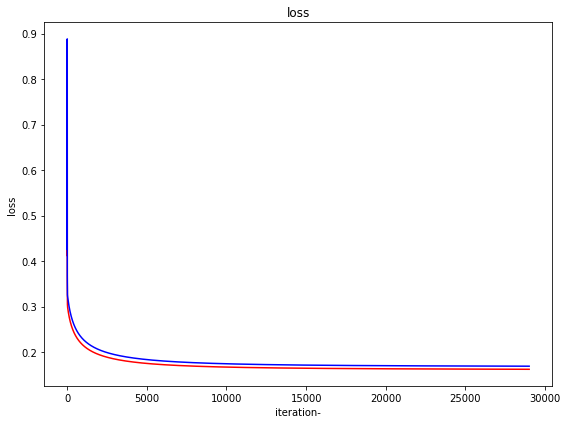

In [322]:
plot_loss_curve(loss_iteration_train, loss_iteration_test)

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  from ipykernel import kernelapp as app


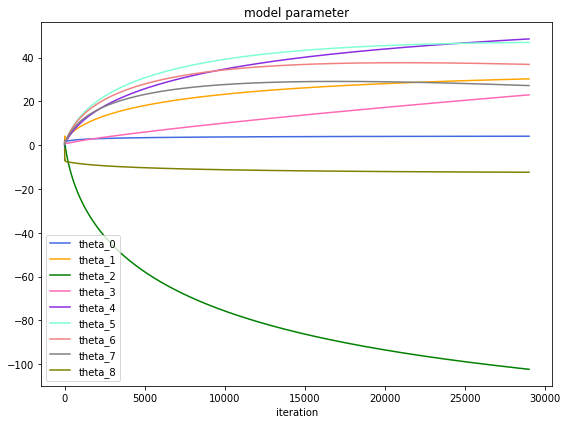

In [323]:
plot_model_parameter(theta_iteration)

In [338]:
def plot_classifier(data, theta):

    plt.figure(figsize=(8,8)) # USE THIS VALUE for the size of the figure
    
    point_x = data[:,0]/data[:,0].max()
    point_y = data[:,1]/data[:,1].max()
    label   = data[:,2]
    
    x = np.linspace(-1, 1) 
    y = np.linspace(-1, 1)
    X,Y = np.meshgrid(x,y)
    #Z = theta[0] + theta[1]*X + theta[2]*X**2 + theta[3]*X**3 + theta[4]*X**4 + theta[5]*X**5 + theta[6]*X**6 + theta[7]*X**7 + theta[8]*X**8 + theta[9]*X**9 + theta[10]*X**10 + theta[11]*X**11 + theta[12]*X**12 + theta[13]*X**13 + theta[14]*X**14+ theta[15]*Y
    Z = theta[0] + theta[1]*X + theta[2]*X**2 + theta[3]*X**3 + theta[4]*X**4 + theta[5]*X**5 + theta[6]*X**6 + theta[7]*X**7+ theta[8]*Y

    plt.pcolormesh(X, Y, Z, cmap=plt.cm.get_cmap('RdBu_r'), vmin=-100, vmax=100)
    plt.colorbar()
    
    red_x = []
    red_y = []
    blue_x = []
    blue_y = []
    for i in range(point_x.shape[0]):
        if(label[i] == 0):
            blue_x.append(point_x[i])
            blue_y.append(point_y[i])
        else:
            red_x.append(point_x[i])
            red_y.append(point_y[i])
    
    plt.plot(blue_x, blue_y, '.', color = 'blue', label = "class = 0")
    plt.plot(red_x, red_y, '.', color = 'red', label = "class = 1")
    

    plt.contour(X,Y,Z,[0])    
    
    
    plt.axis('equal')
    plt.legend()
    plt.tight_layout()
    plt.show()

In [339]:
print(theta_optimal)

[   4.13314044   30.31333556 -102.28370323   23.01516321   48.55273962
   46.96028654   36.91483144   27.24097367  -12.32191201]


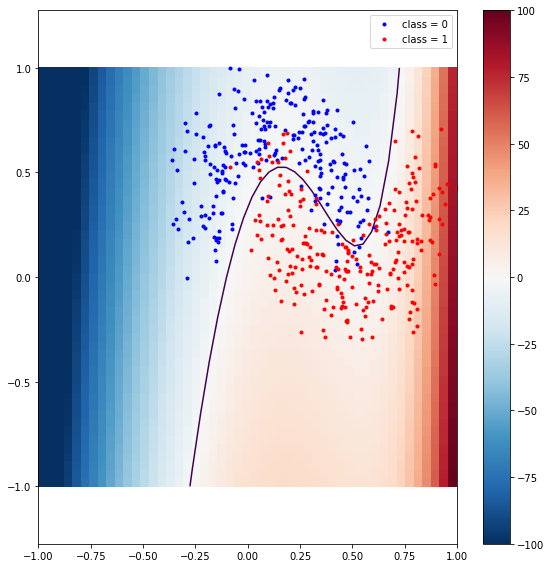

In [340]:
plot_classifier(data_test, theta_optimal)

***

# results

***

1. plot the input data (training on the left sub-figure and testing on the right sub-figure) in blue for class 0 and in red for class 1 from the file [assignment_10_data_train.csv] and [assignment_10_data_test.csv], respectively,

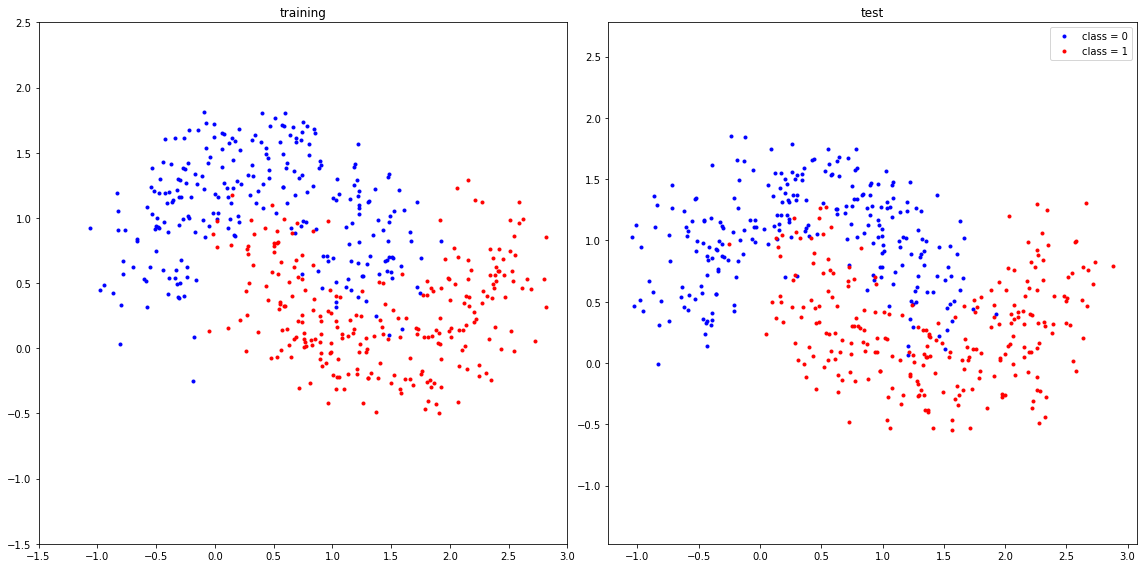

In [341]:
plot_data(data_train, data_test)

***

2. plot the values of the model parameters $\theta$ as curves over the gradient descent iterations using different colors

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  from ipykernel import kernelapp as app


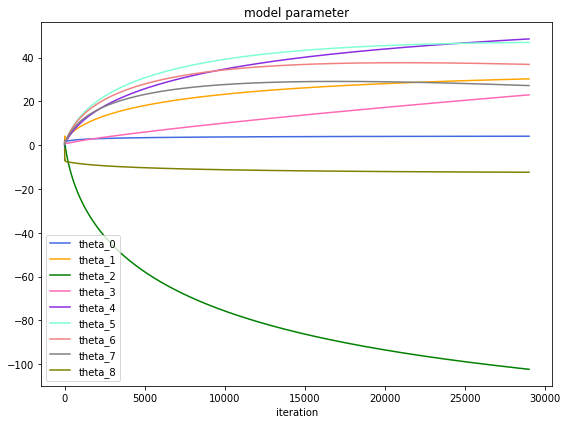

In [342]:
plot_model_parameter(theta_iteration)

***

3. plot the training loss in red curve and the testing loss in blue curve over the gradient descent iterations

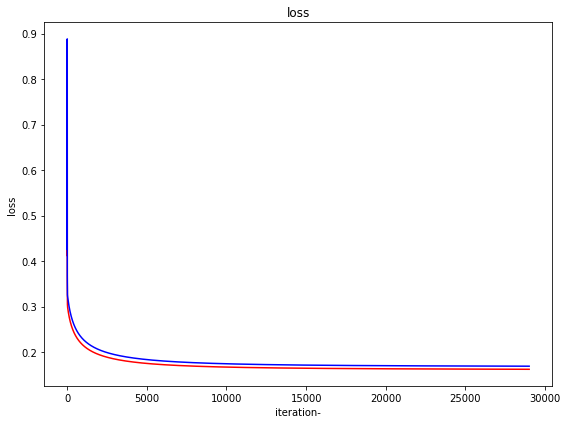

In [343]:
plot_loss_curve(loss_iteration_train, loss_iteration_test)

***

4. plot the training accuracy in red curve and the testing accuracy in blue curve over the gradient descent iterations

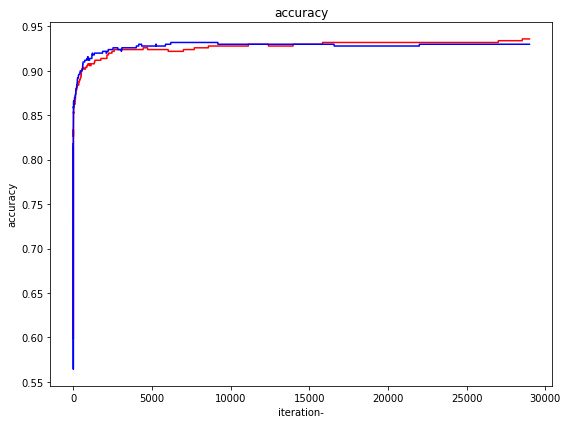

In [344]:
plot_accuracy_curve(accuracy_iteration_train, accuracy_iteration_test)

***

5. plot the classifier using the prediction values in the color coding scheme ranges from blue (class 0) to red (class 1) with the training data

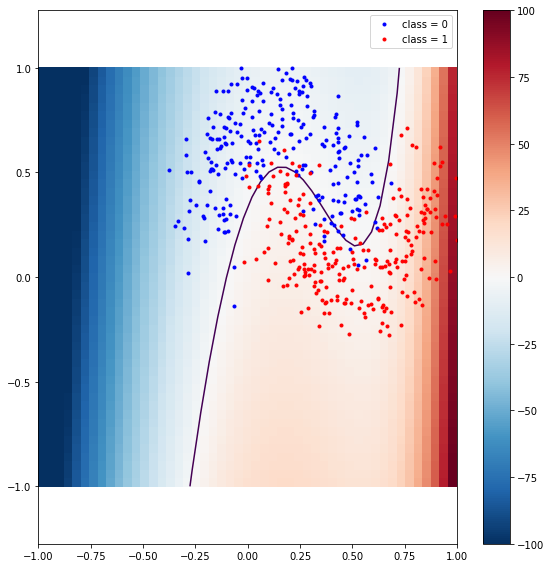

In [345]:
plot_classifier(data_train, theta_optimal)

***

6. plot the classifier using the prediction values in the color coding scheme ranges from blue (class 0) to red (class 1) with the testing data

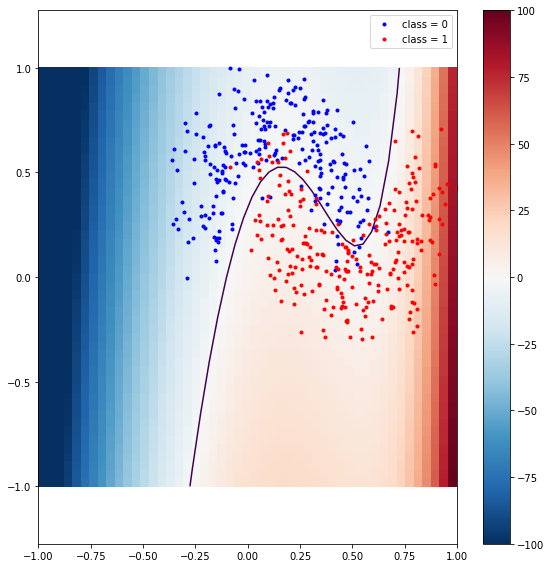

In [346]:
plot_classifier(data_test, theta_optimal)

***

7. print out the final training accuracy and the final testing accuracy in number with 5 decimal places (e.g. 0.98765)

In [355]:
print('accuract(train): {:.5f}'.format(accuracy_train))
print('accuracy(test) : {:.5f}'.format(accuracy_test))

accuract(train): 0.93600
accuracy(test) : 0.93000
